## HOUSE PRICES PREDICTION PROJECT

### IGNORING THE WARNINGS

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### IMPORTING & CHECKING DATASET

In [2]:
import pandas as pd
df=pd.read_csv('training_set.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
s = df.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### SEPERATING CAT AND CON FEATURES

In [8]:
df = df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [9]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [10]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### PERFORMING EDA ( EXPLORATORY DATA ANALYSIS )

#### UNIVARIATE ANALYSIS

##### COUNTPLOT FOR CATEGORICAL FEATURES

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

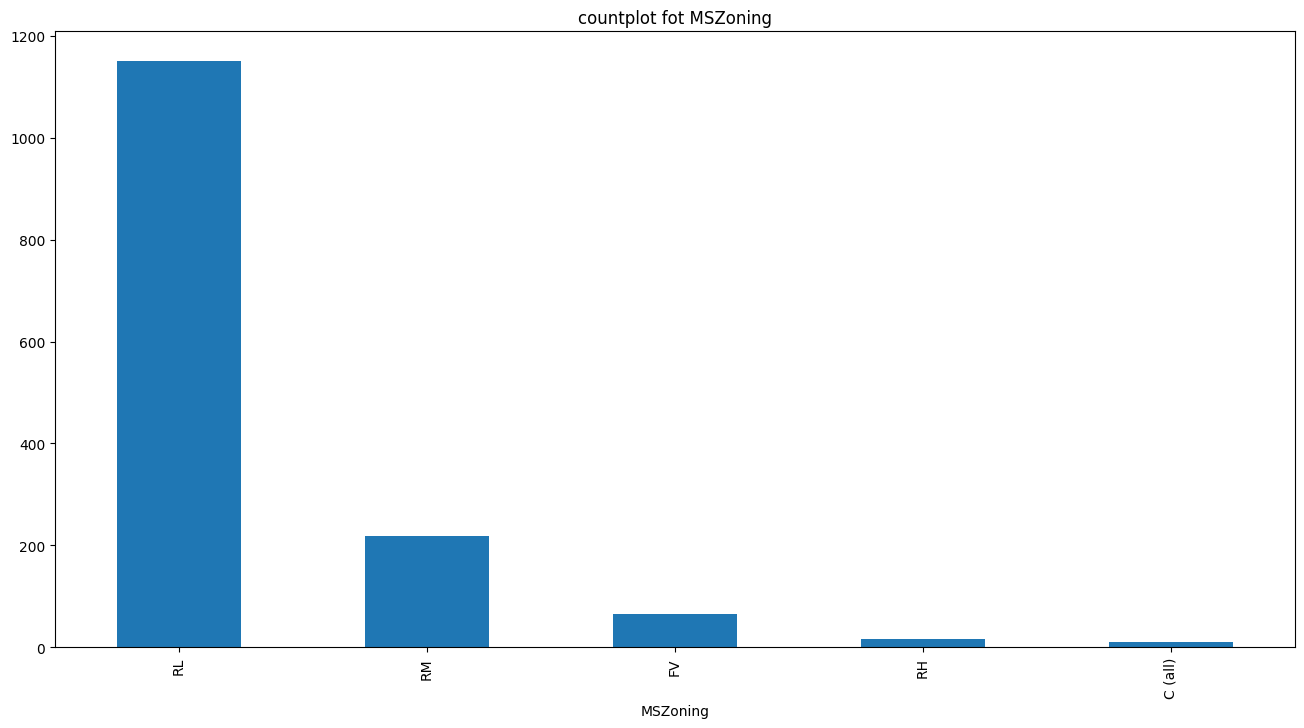

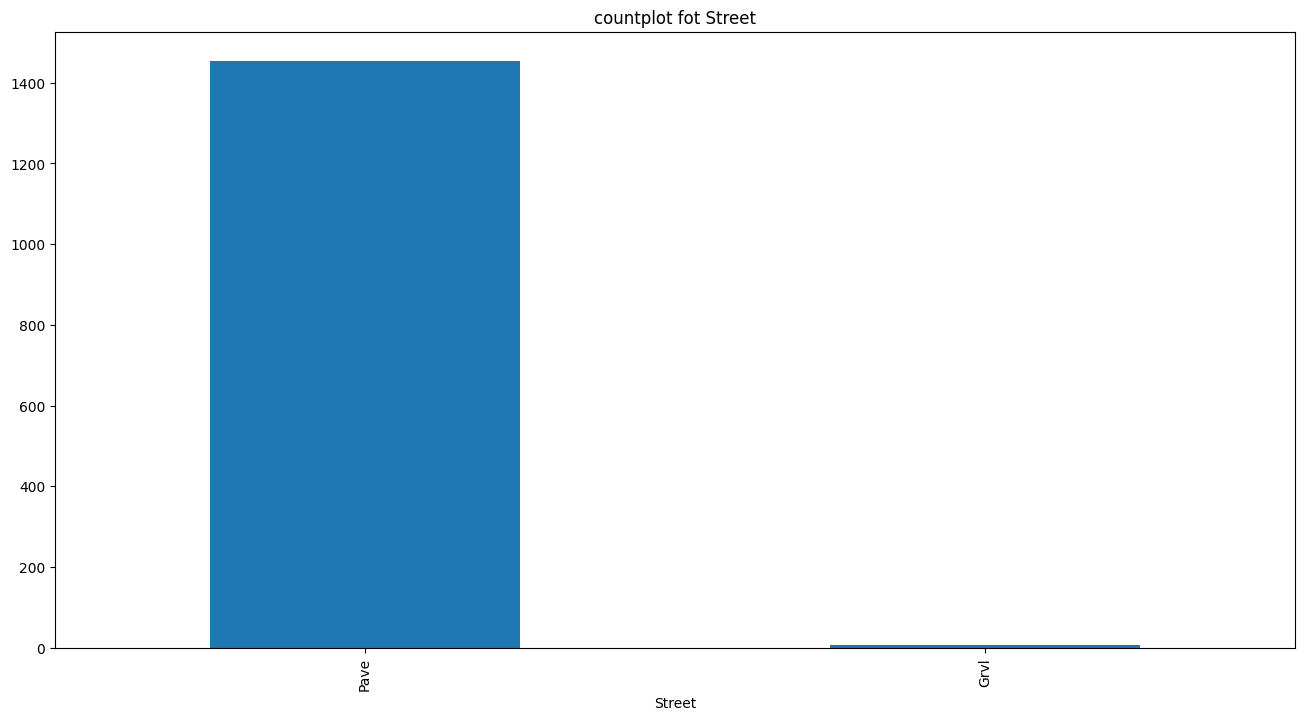

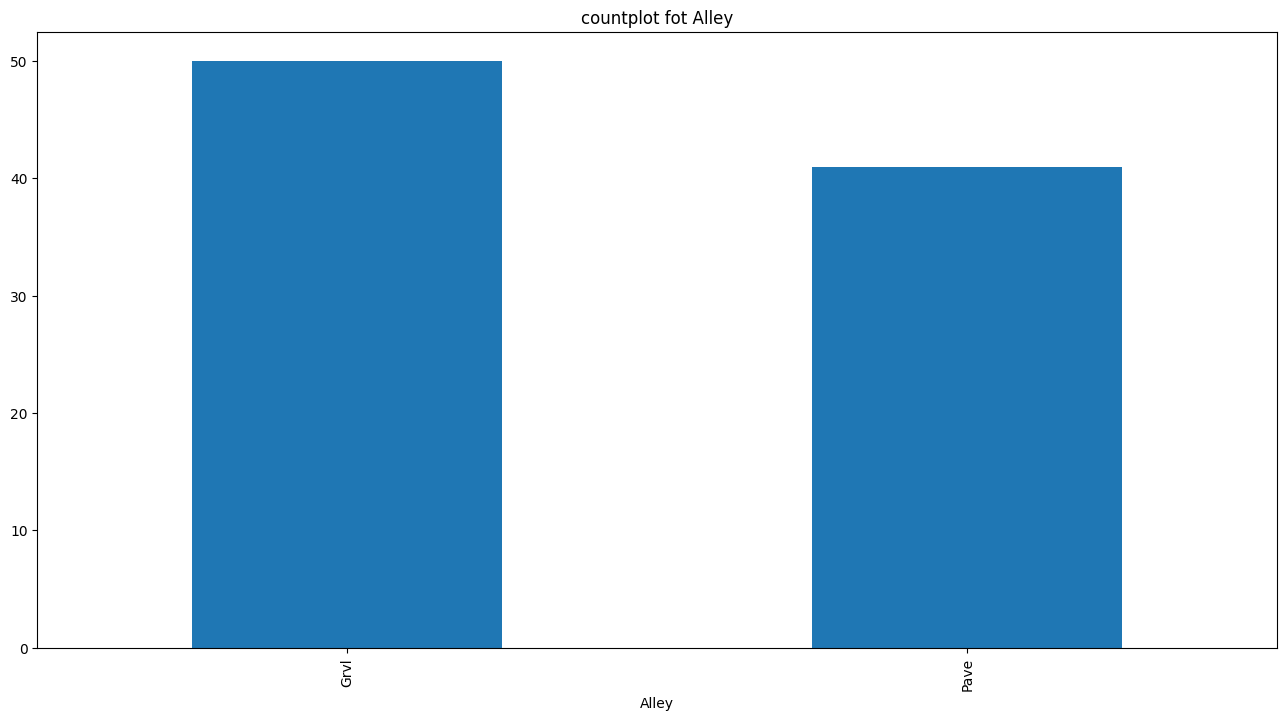

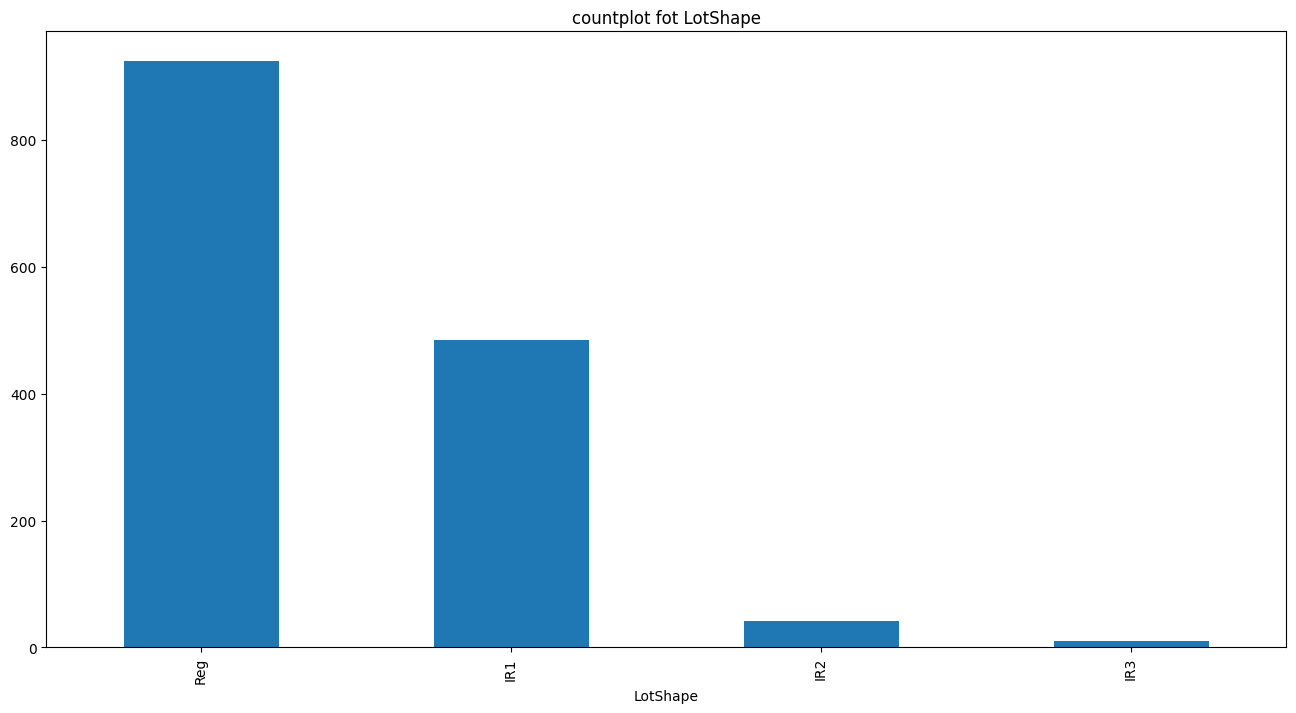

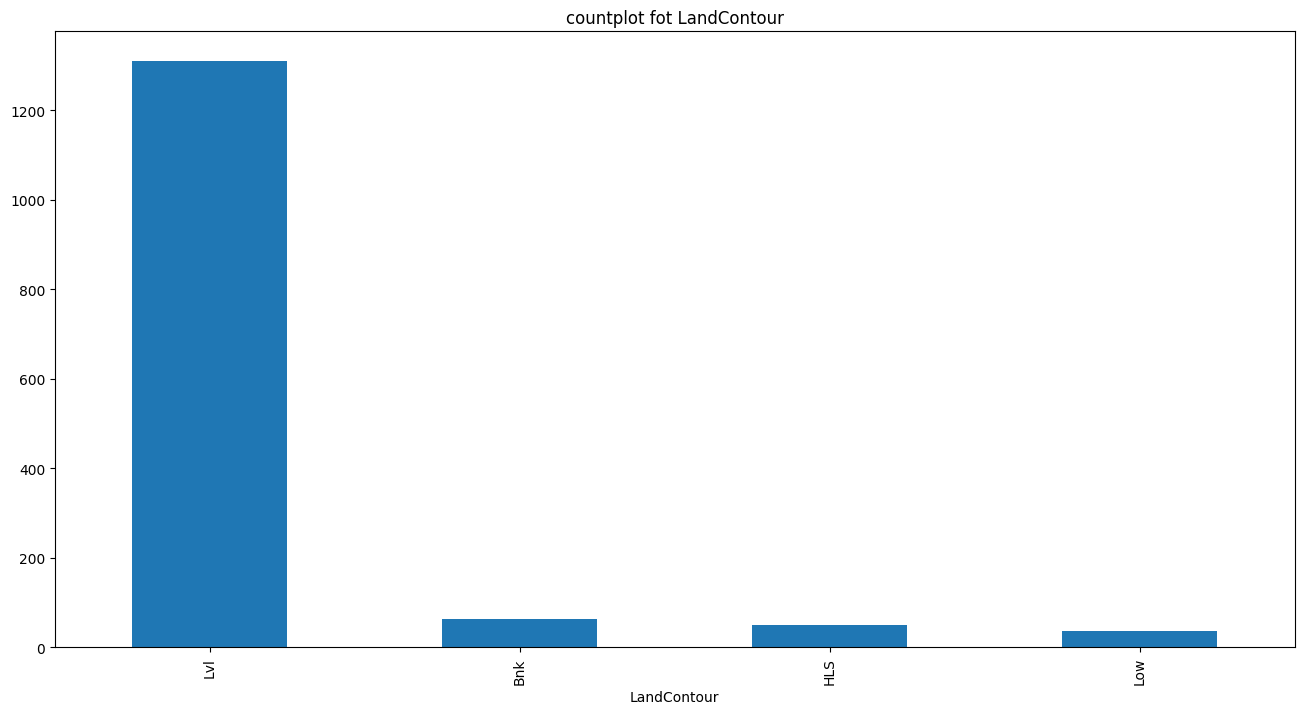

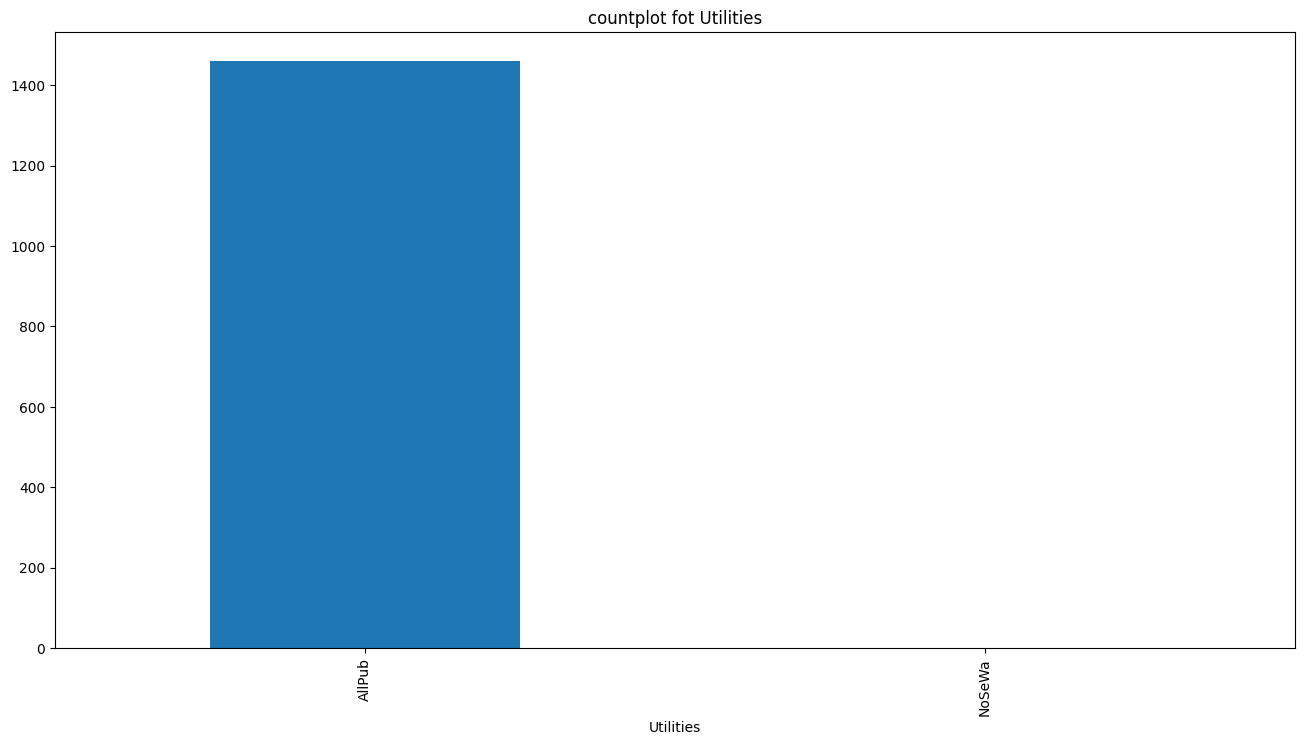

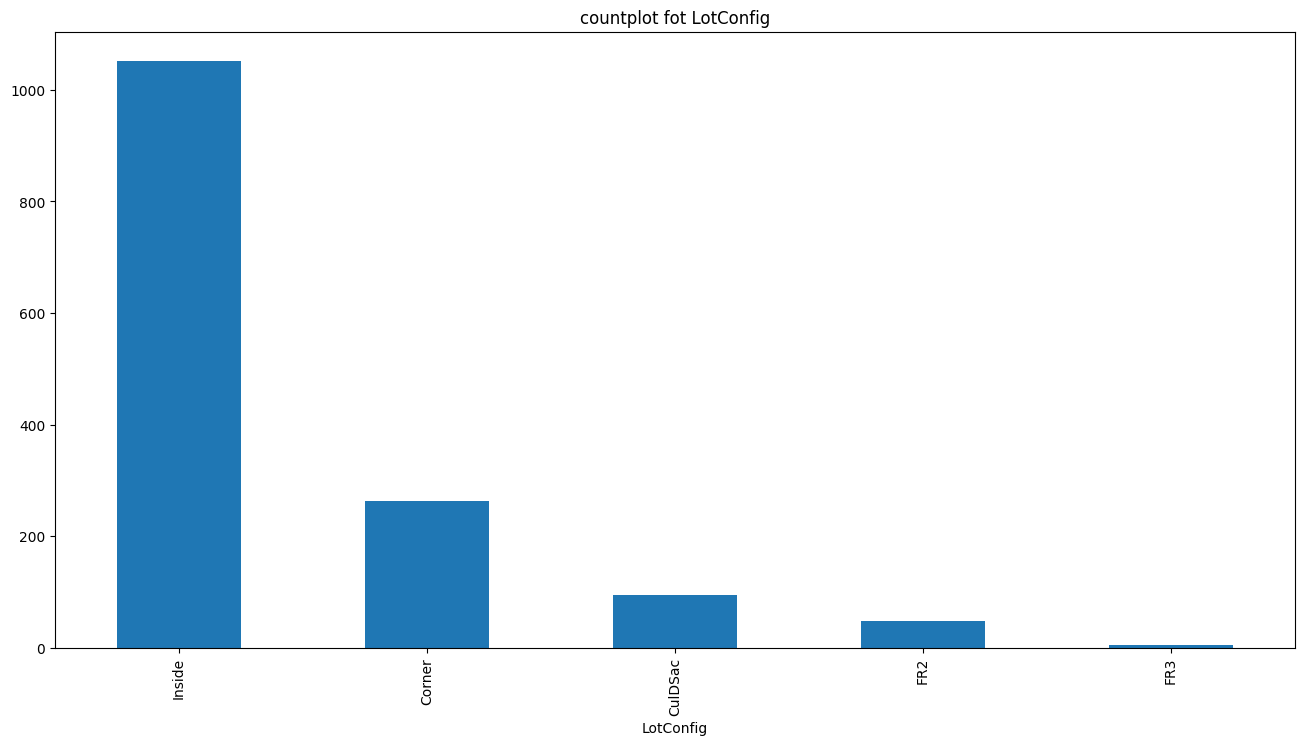

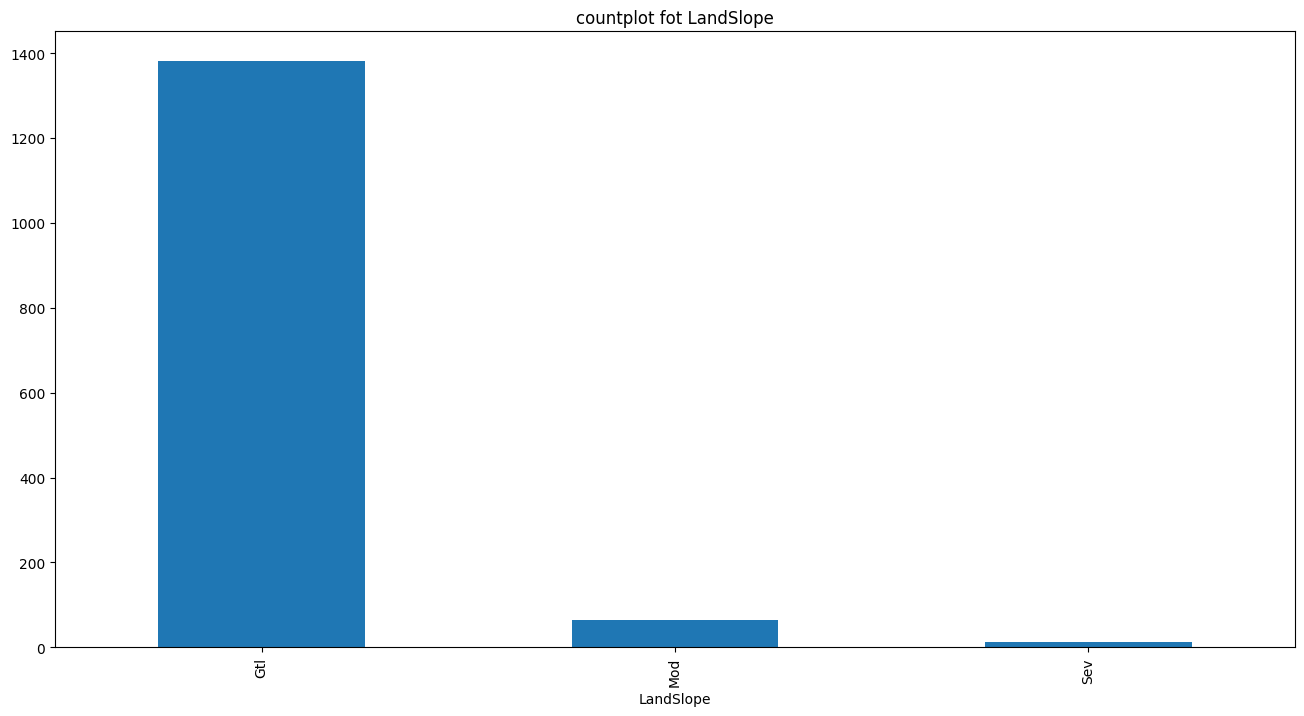

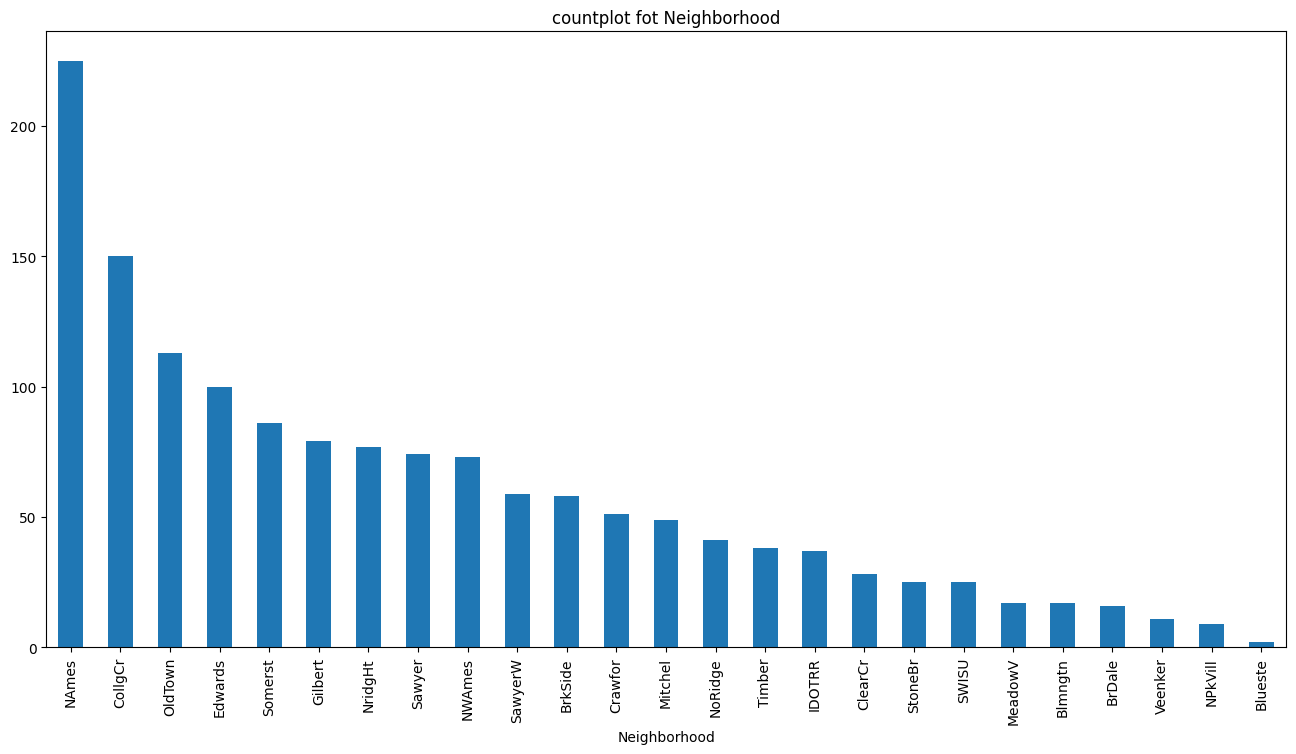

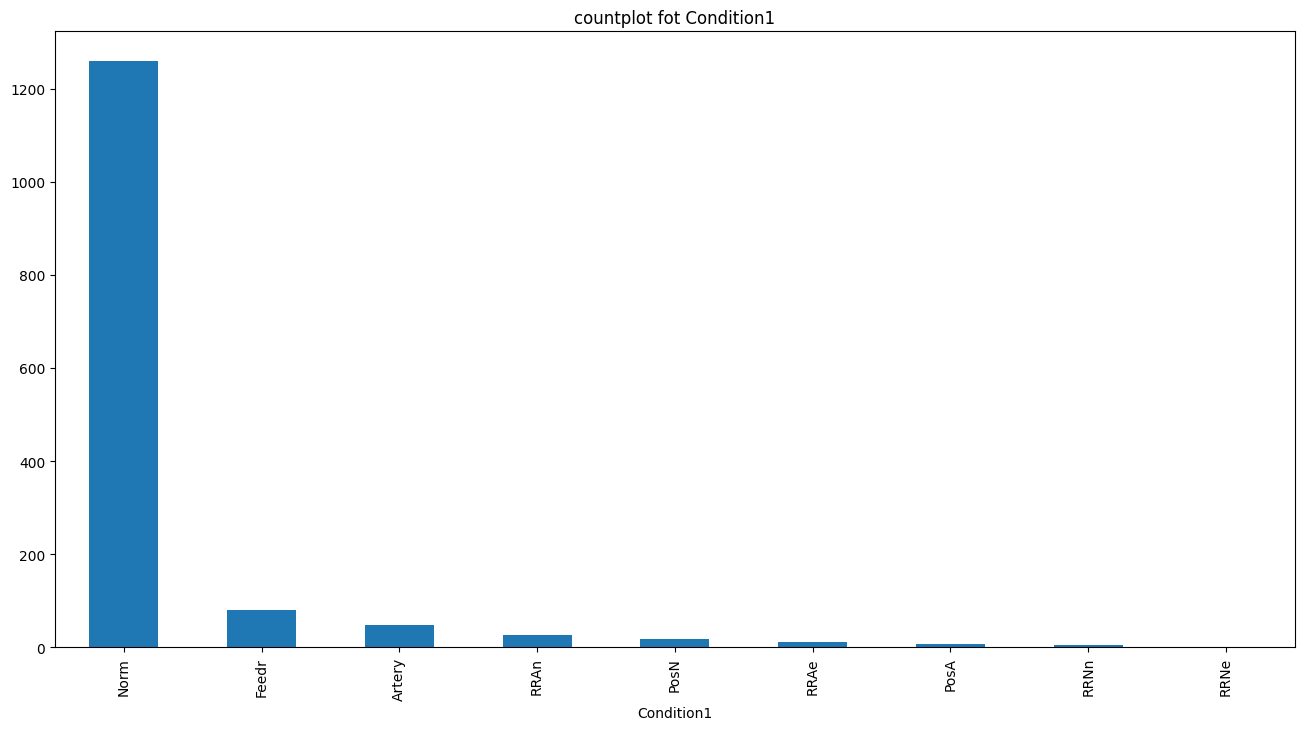

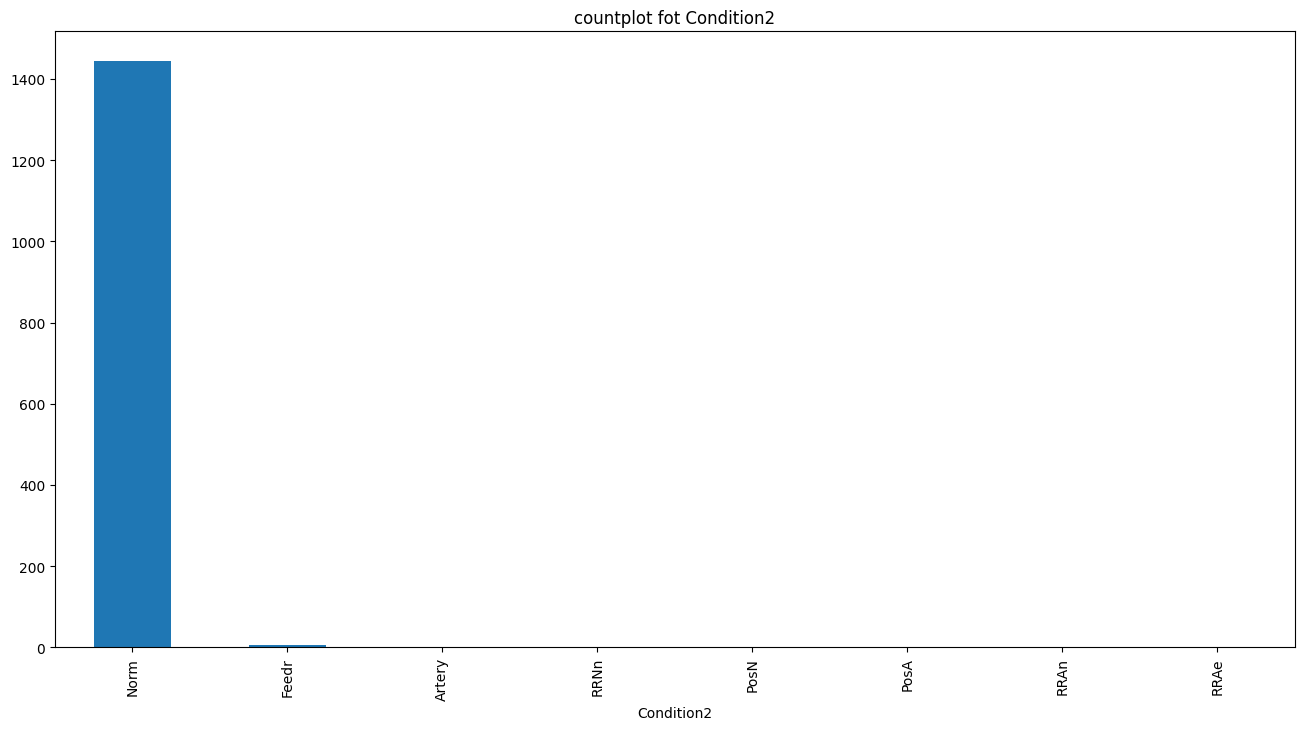

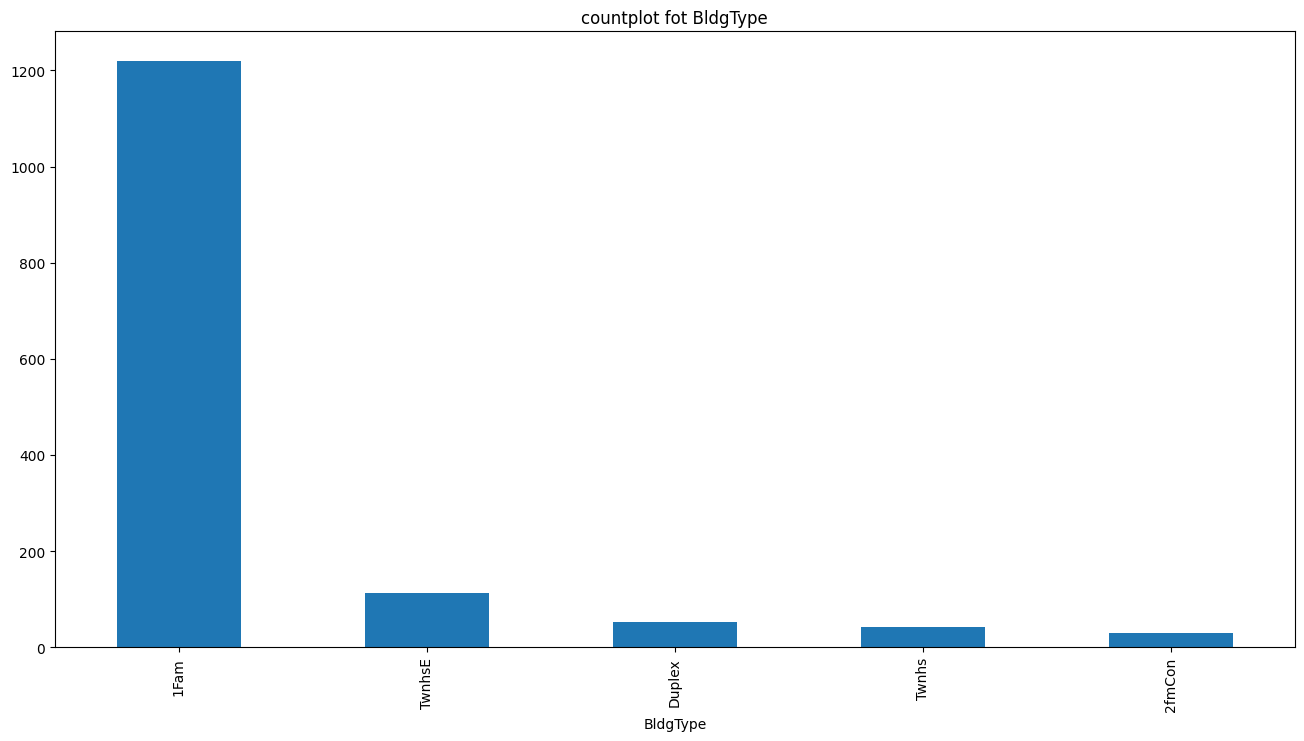

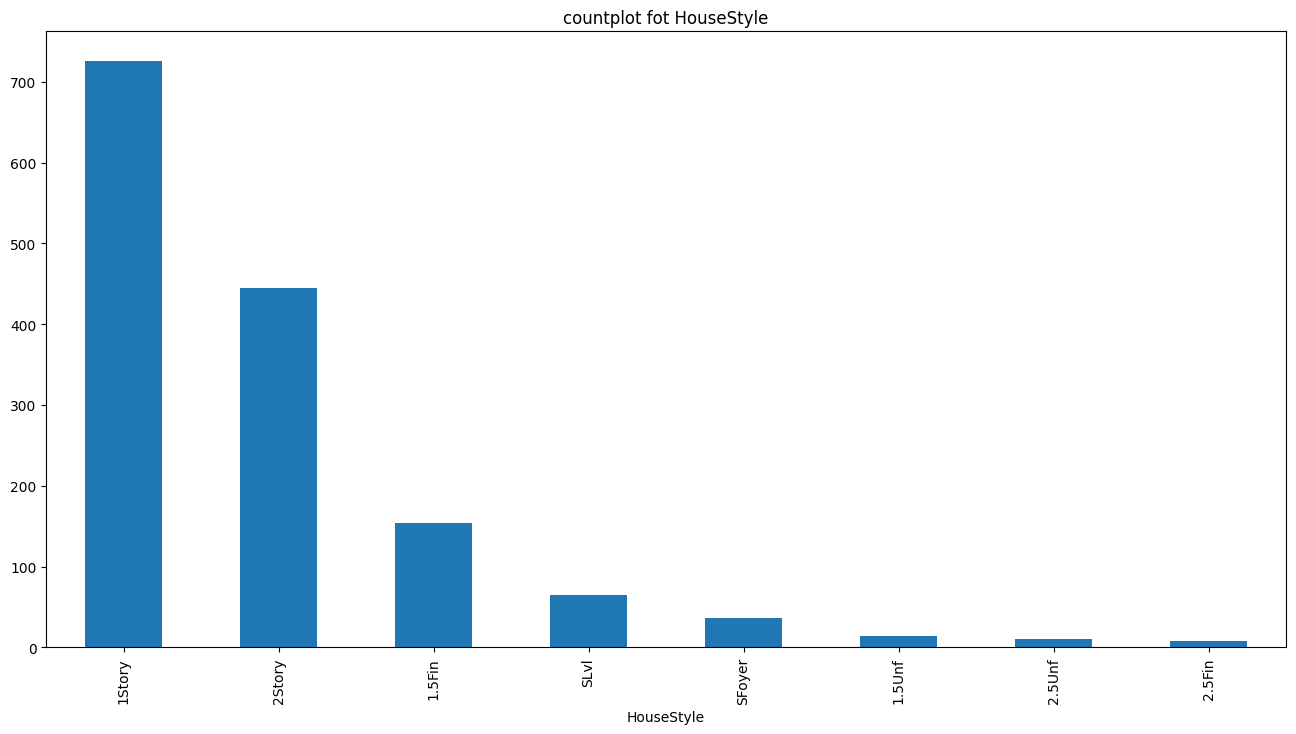

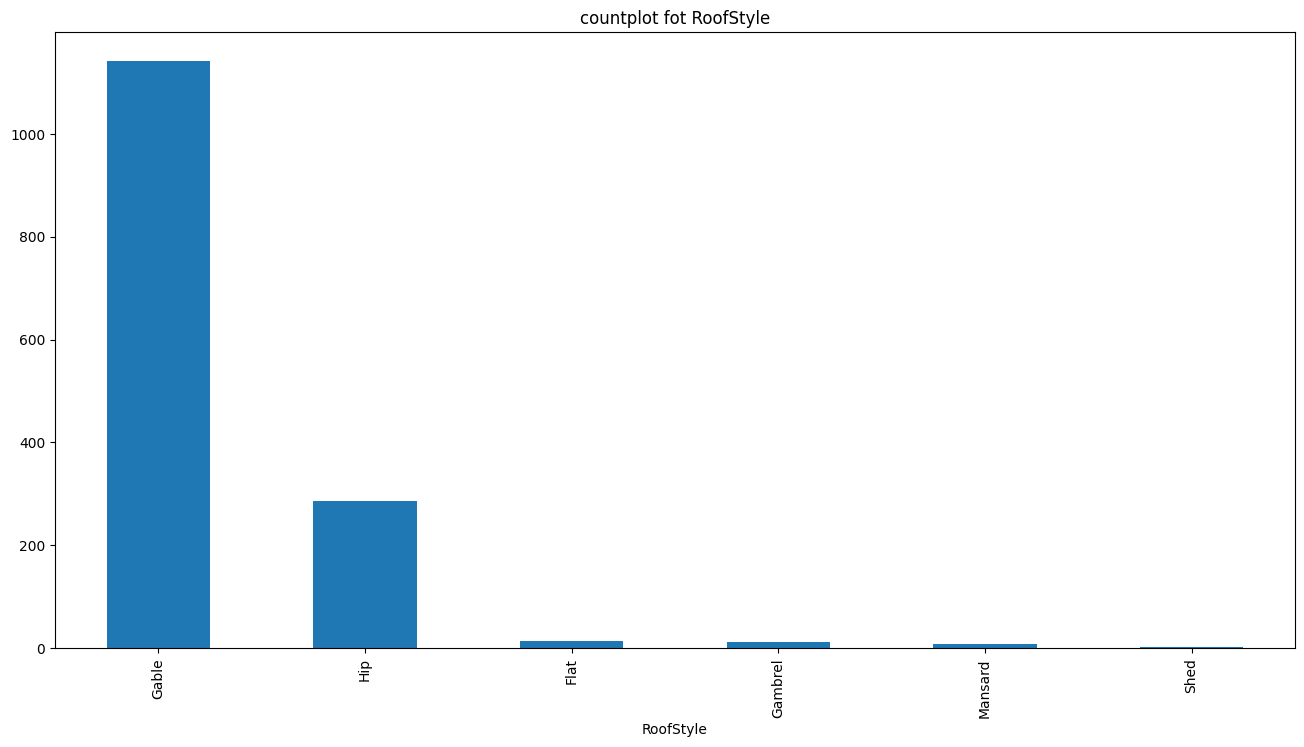

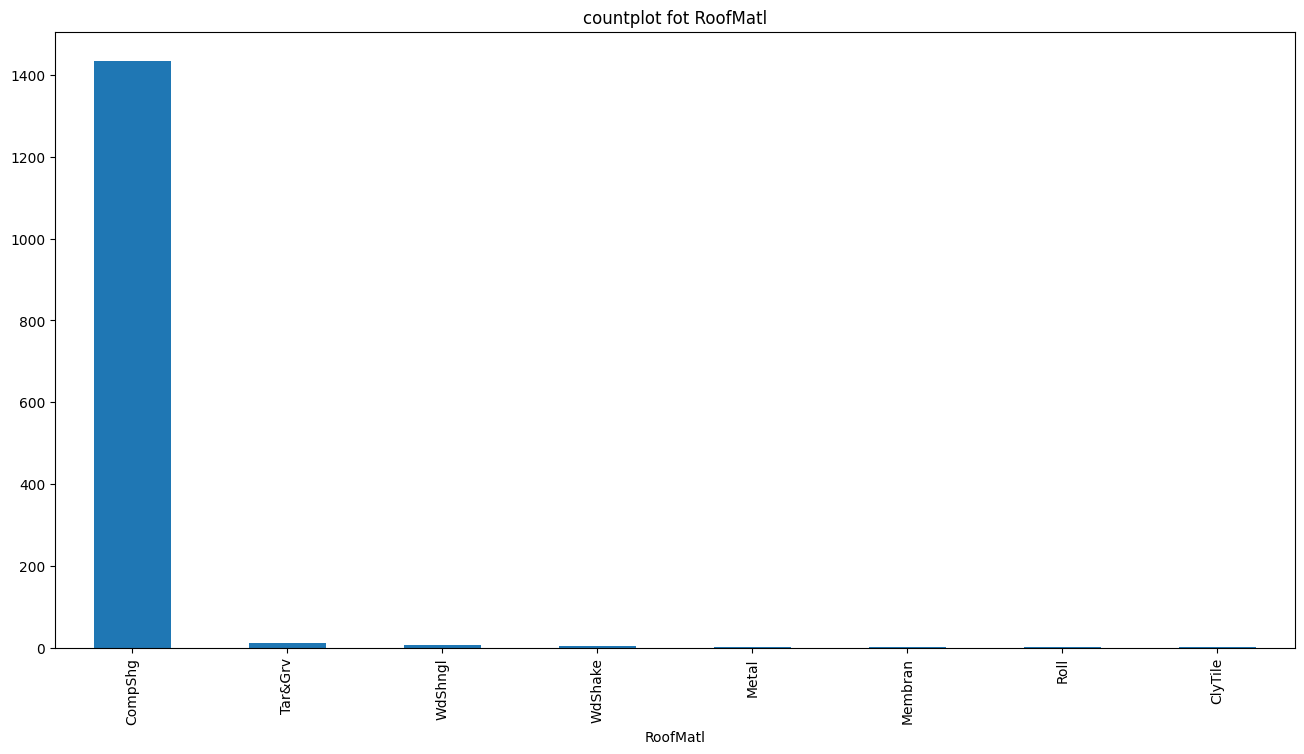

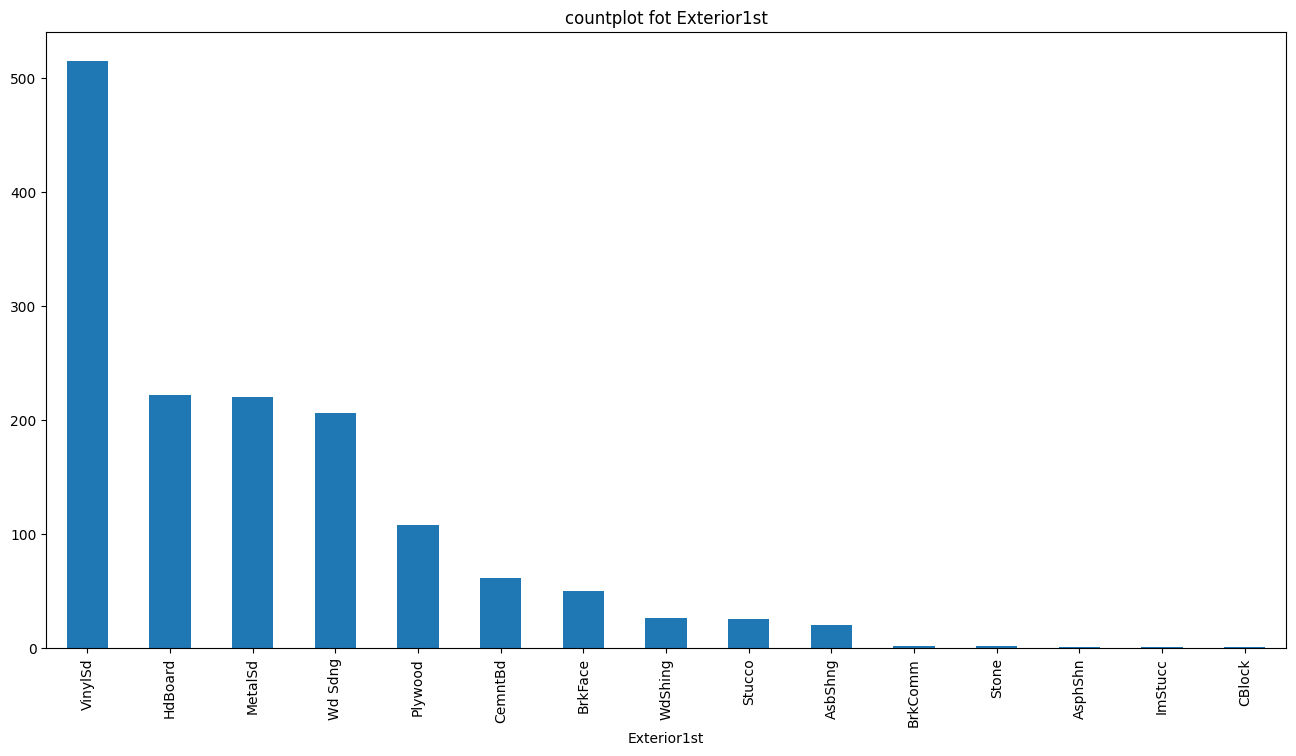

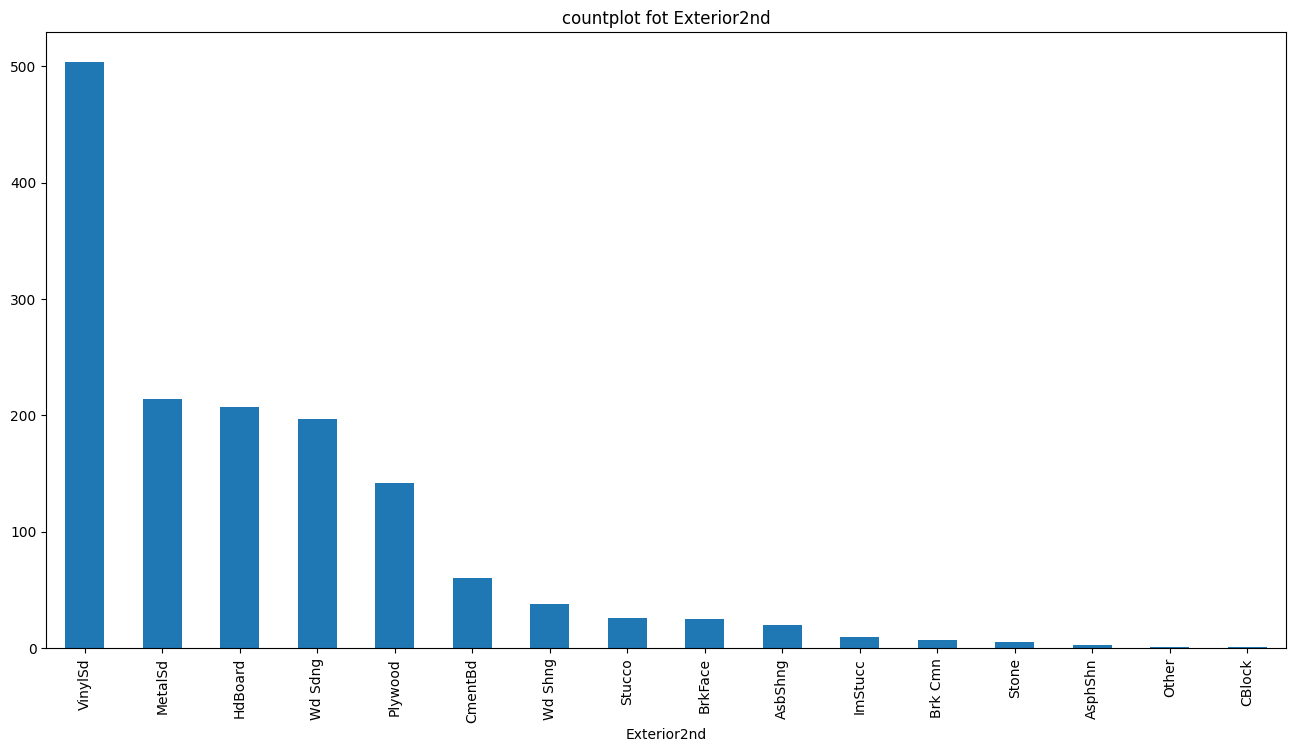

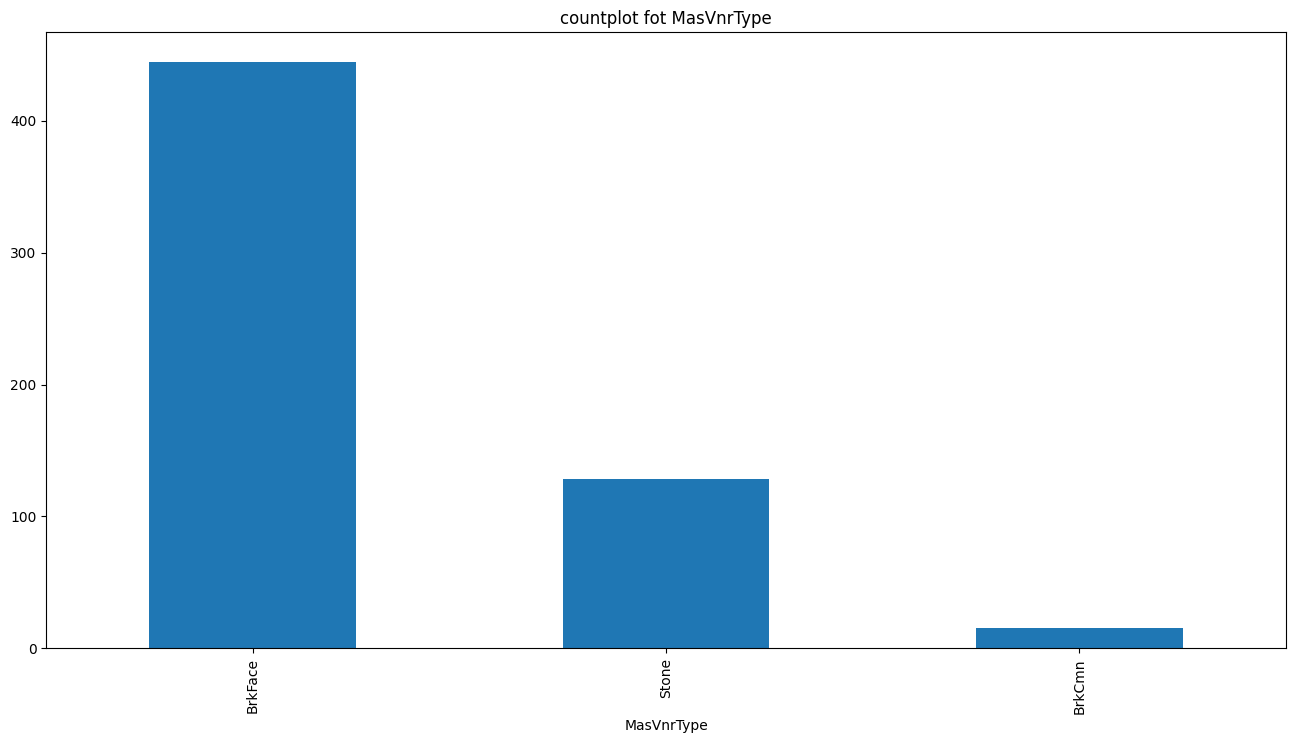

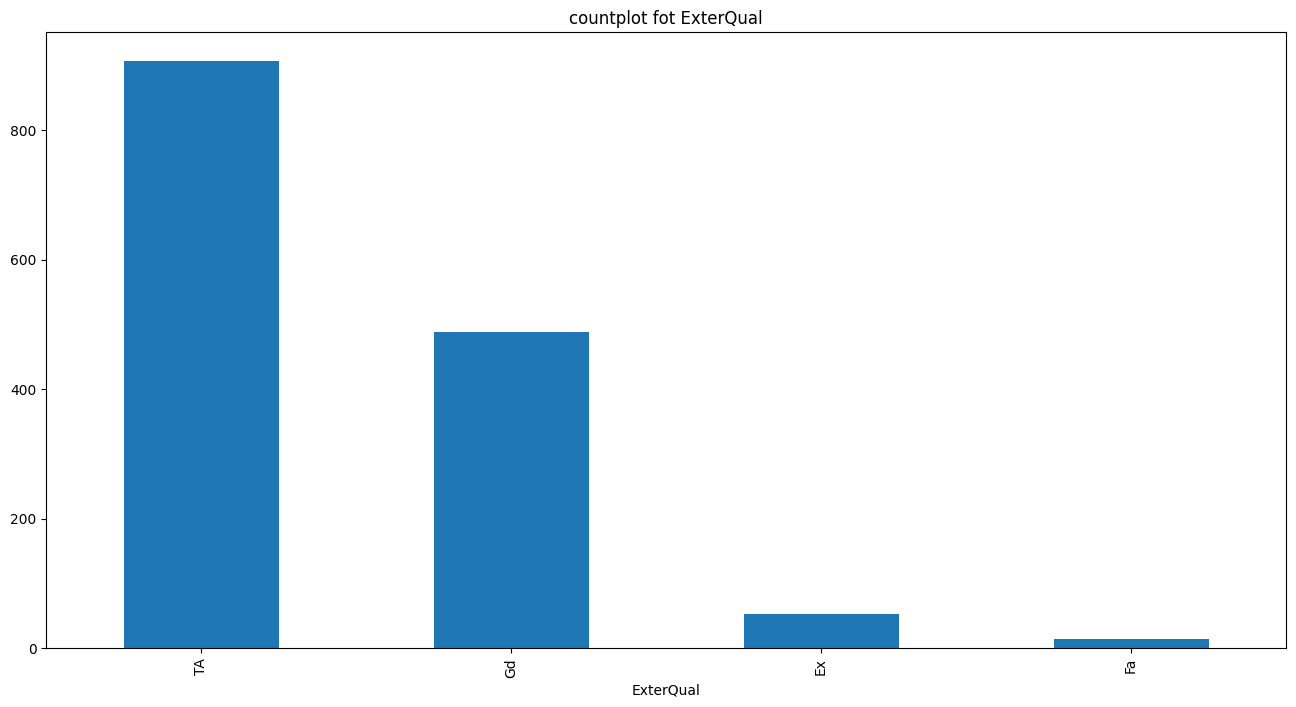

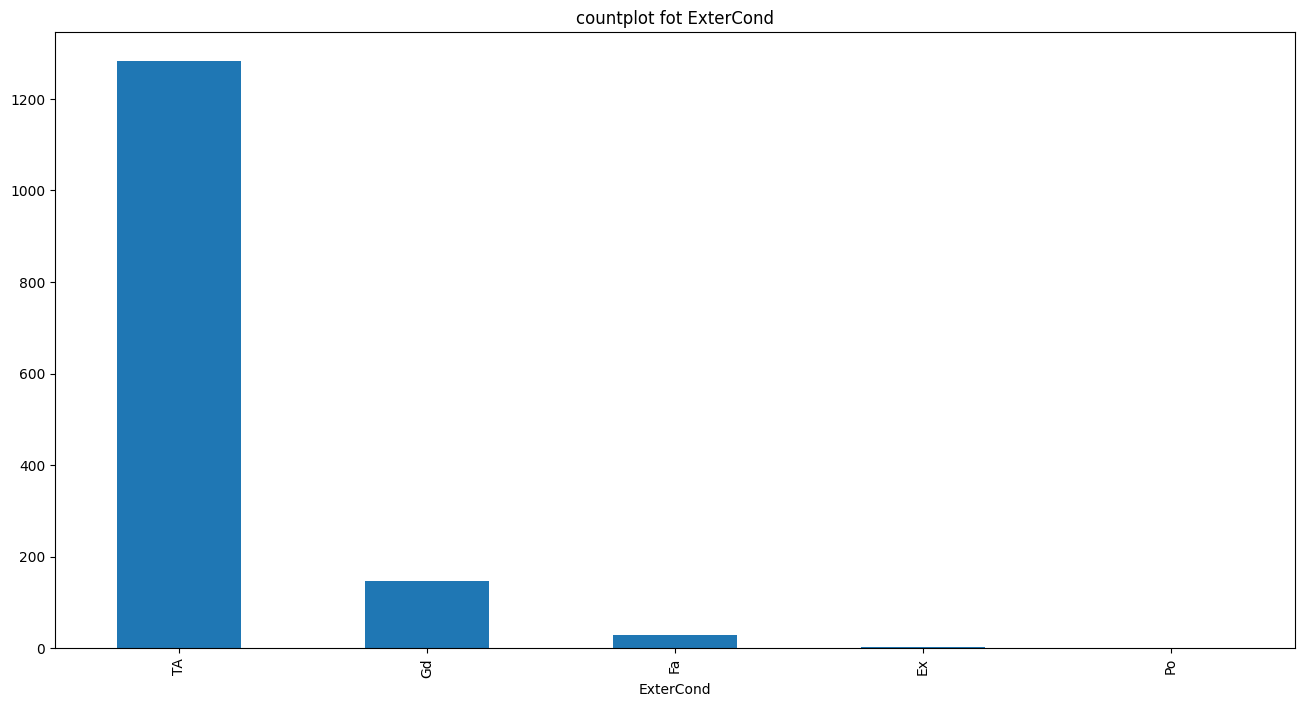

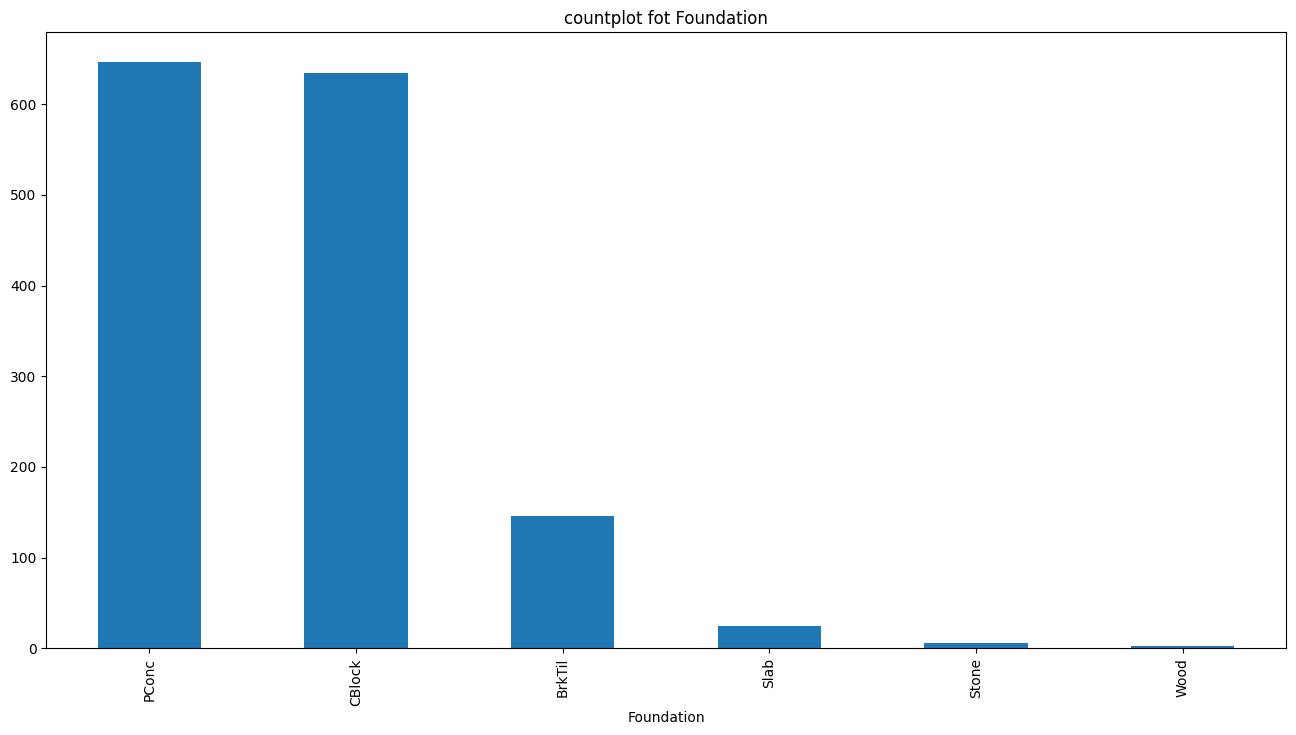

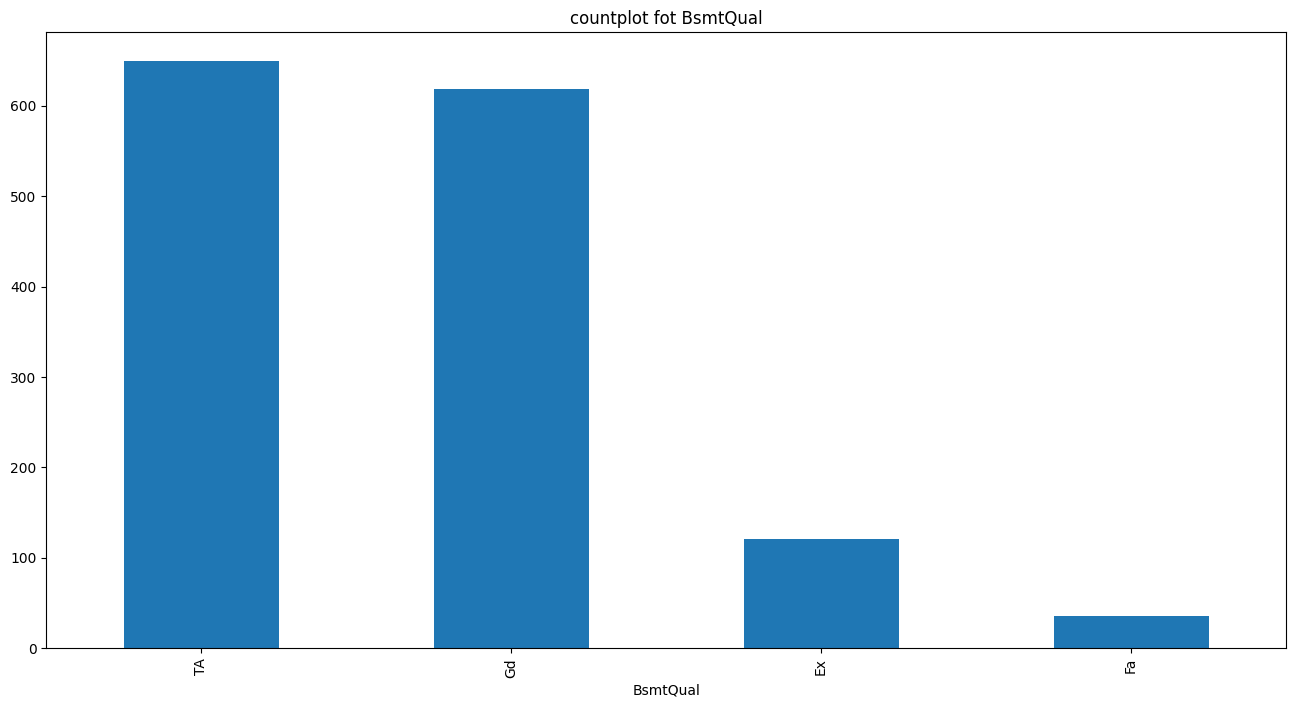

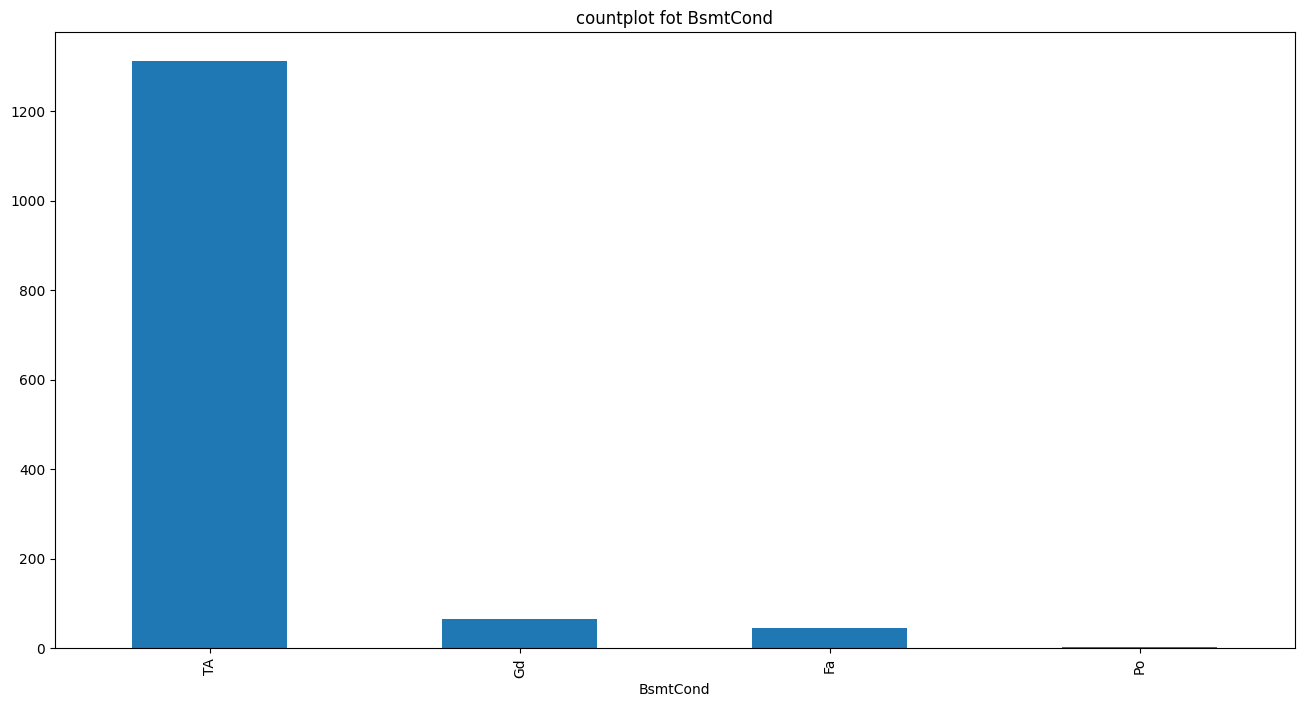

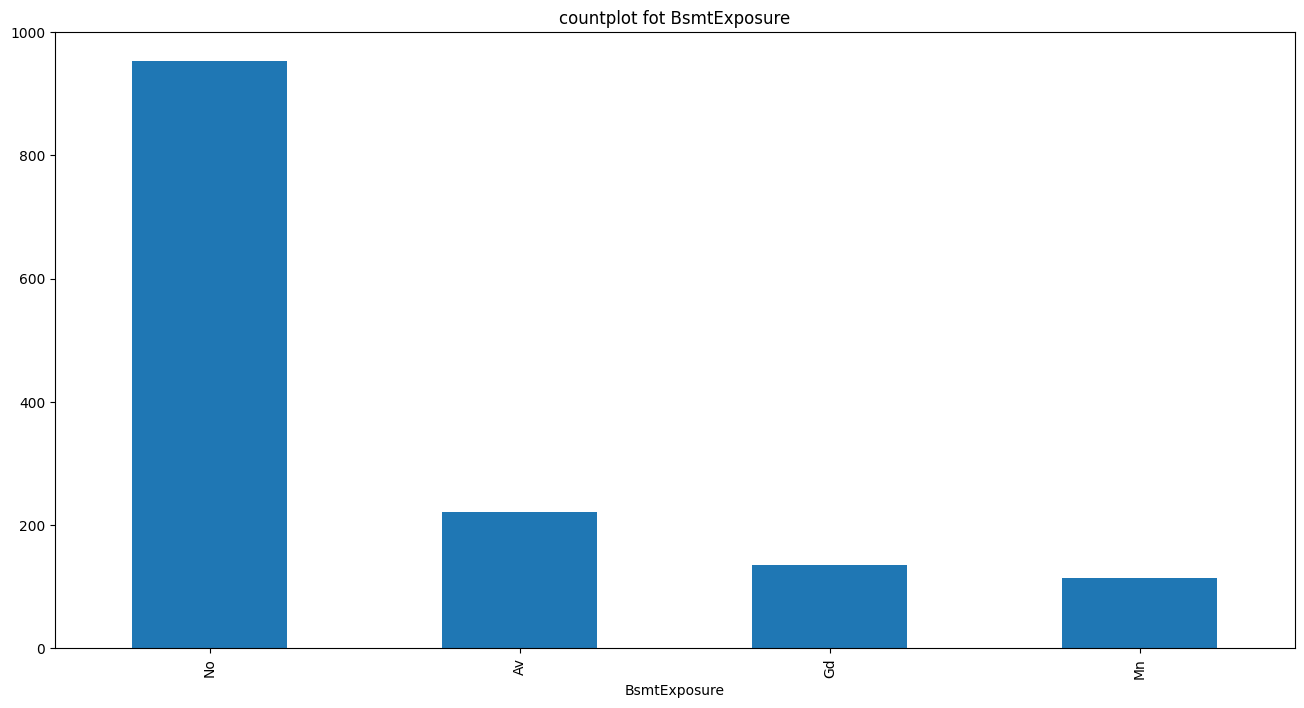

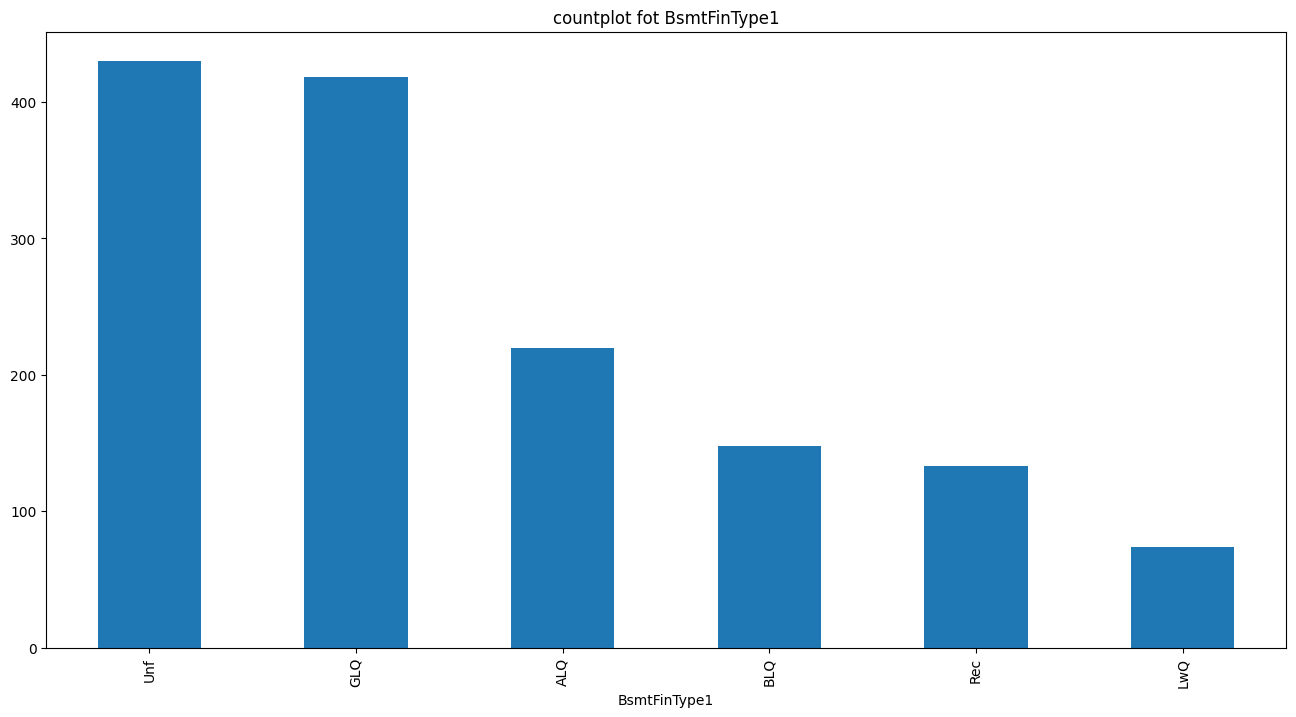

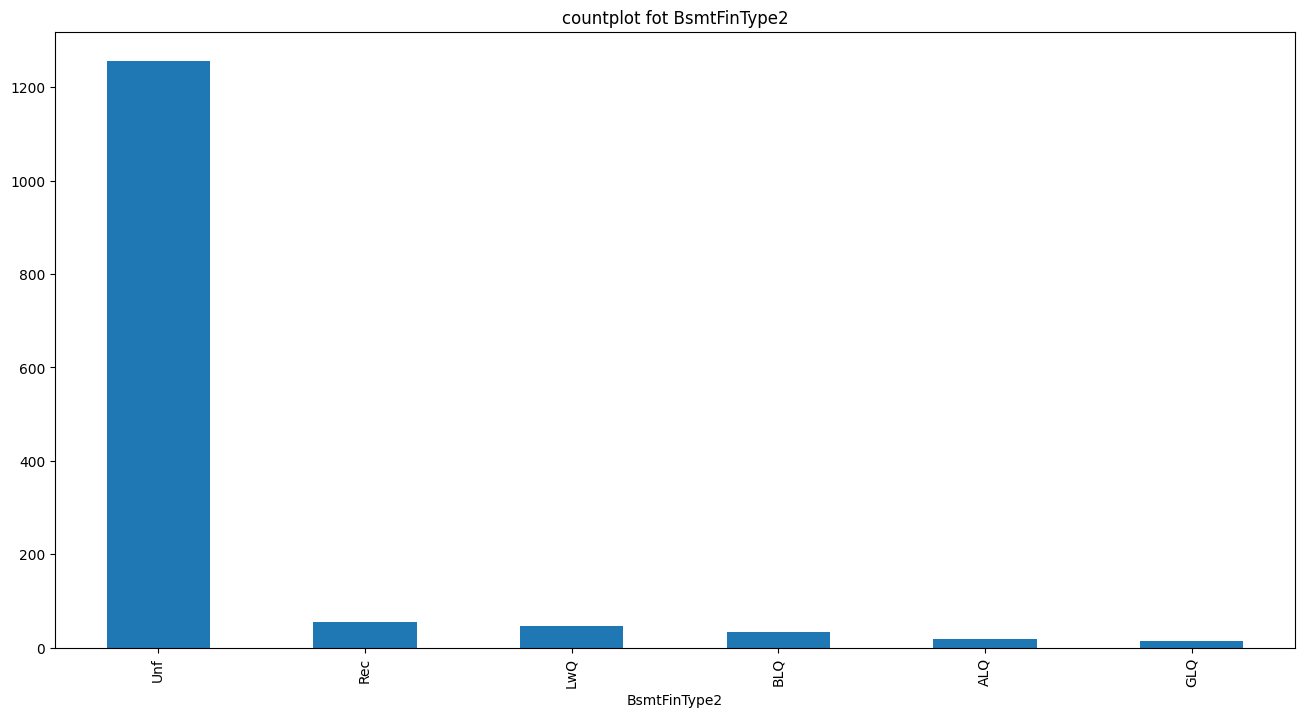

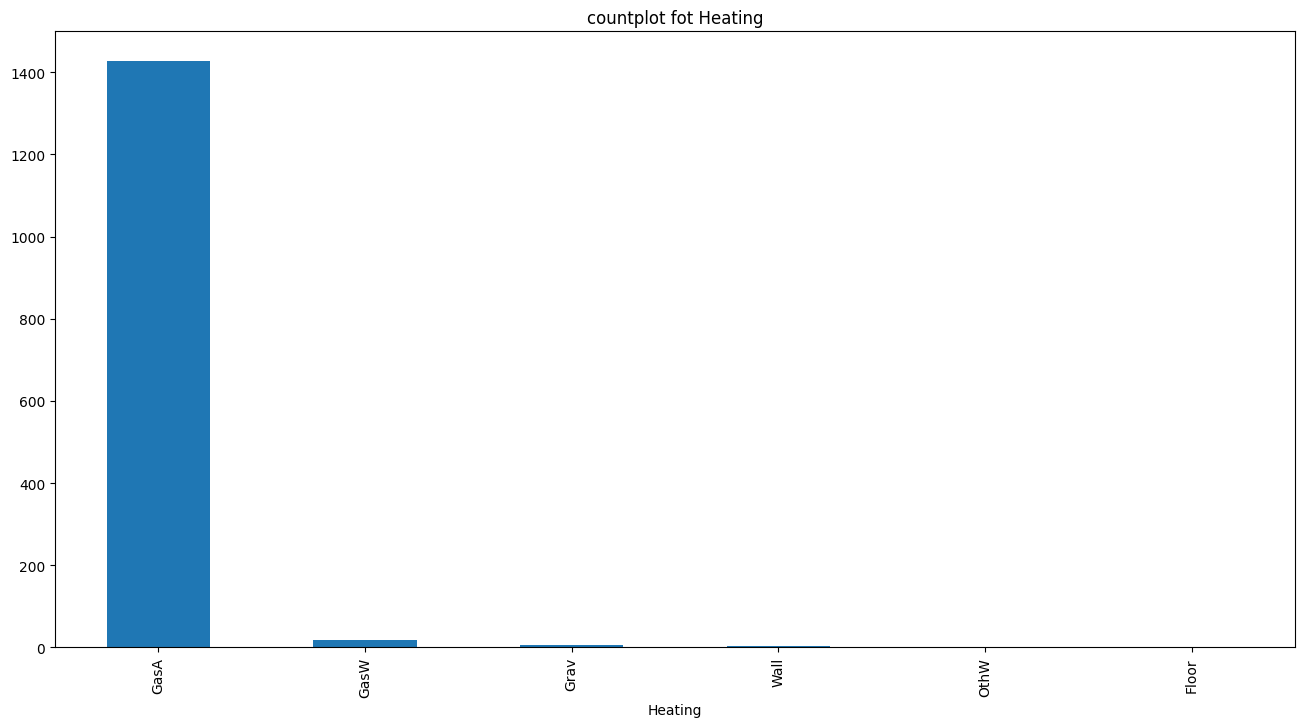

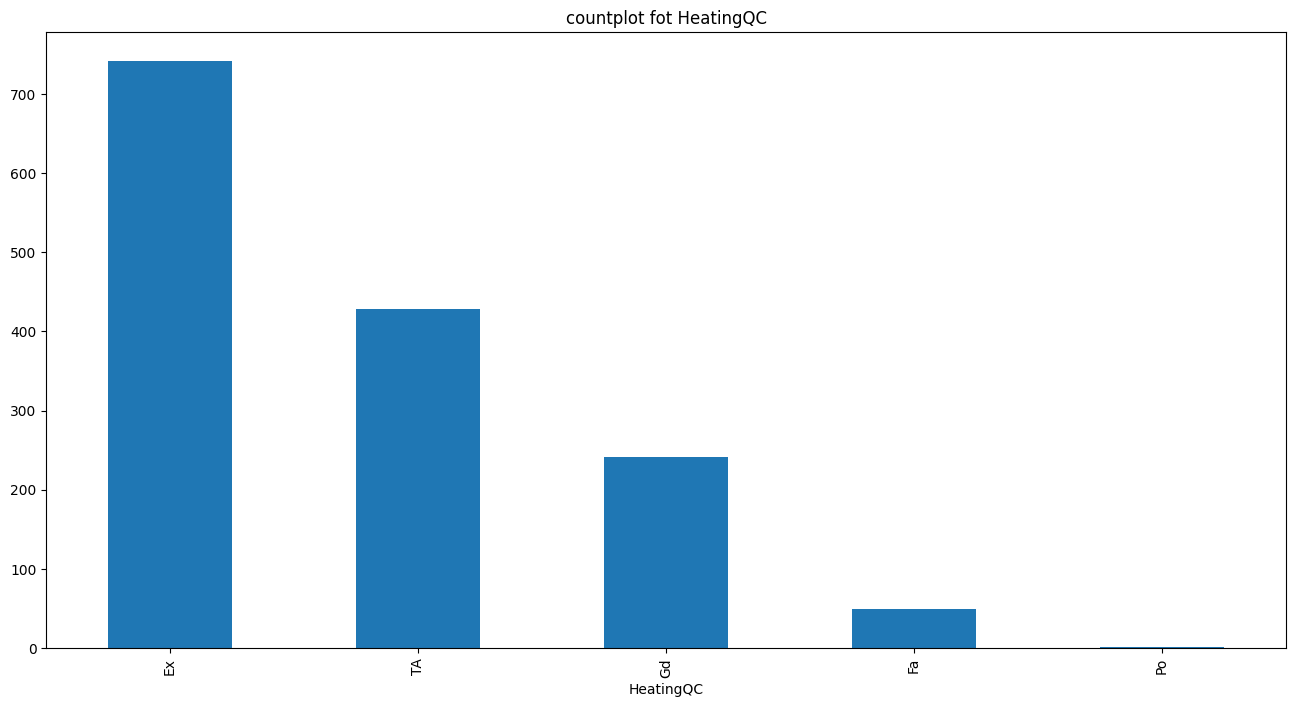

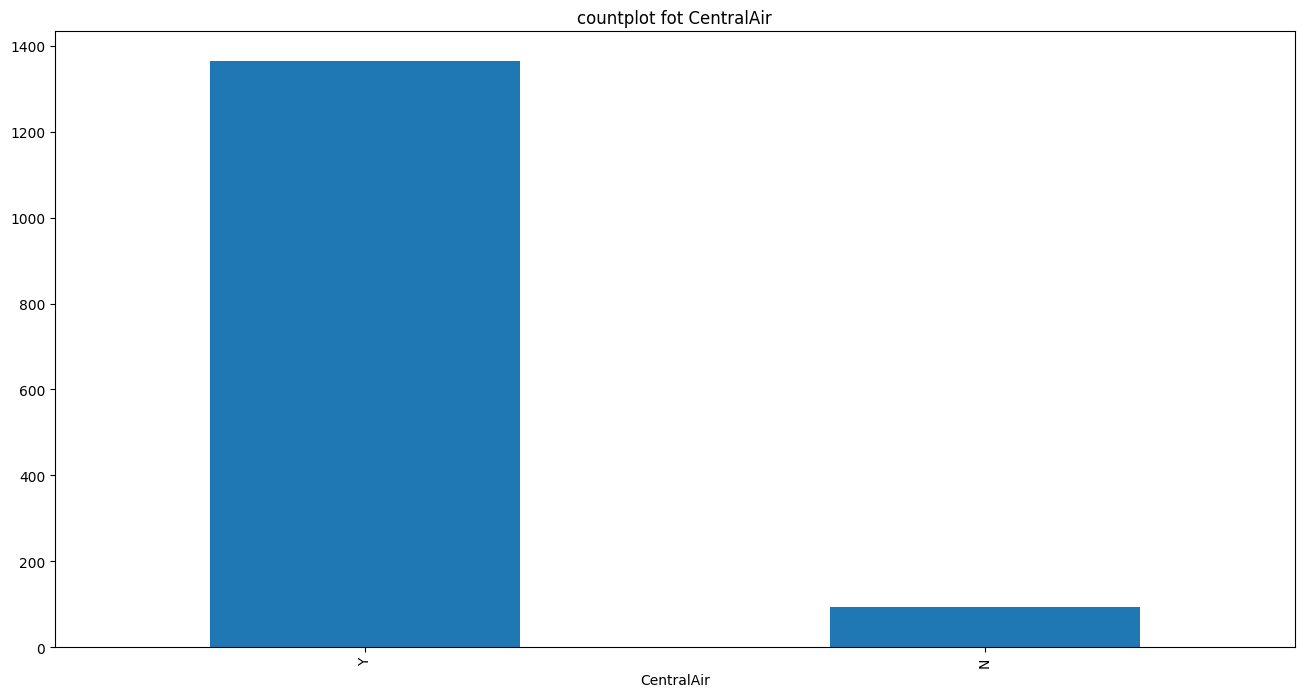

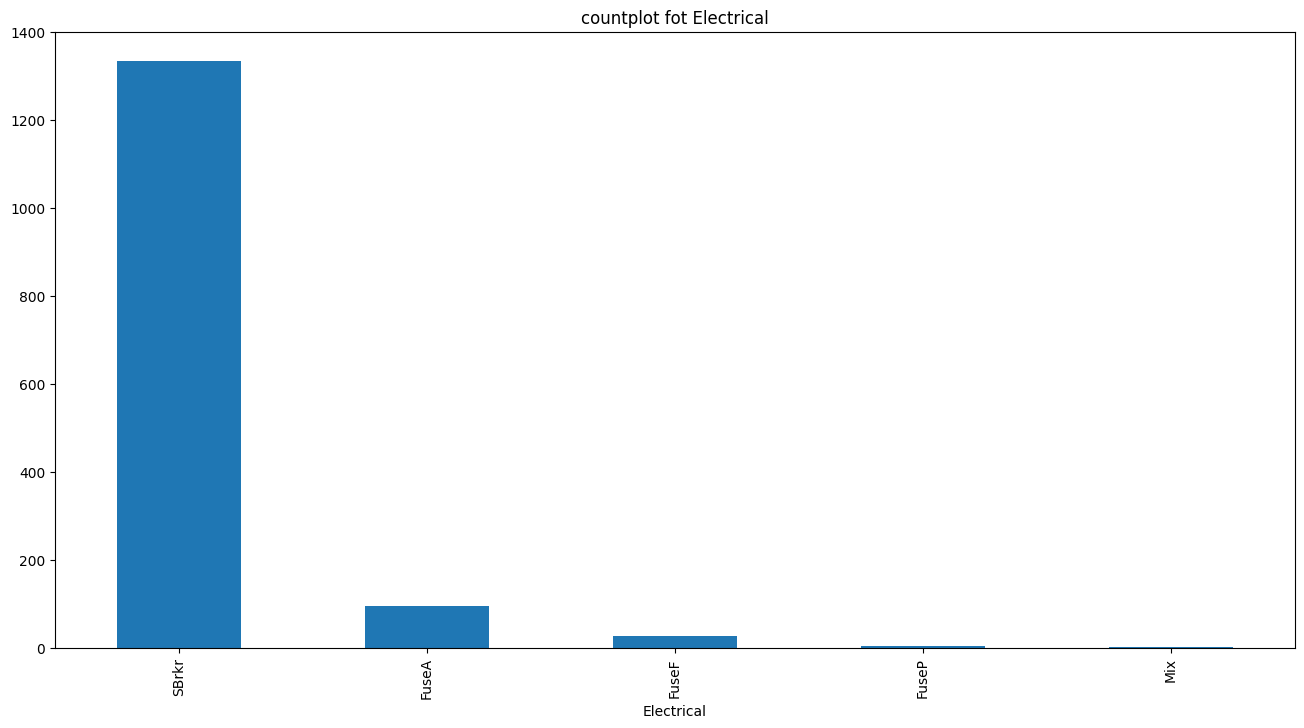

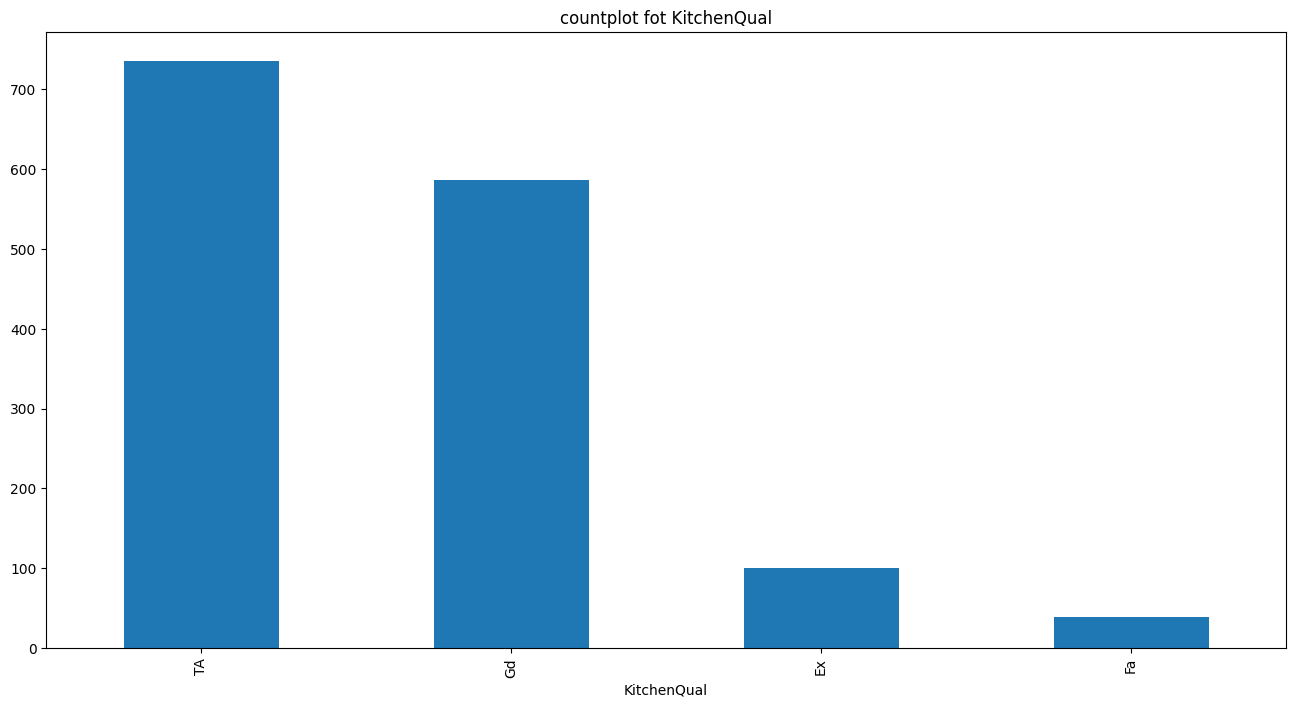

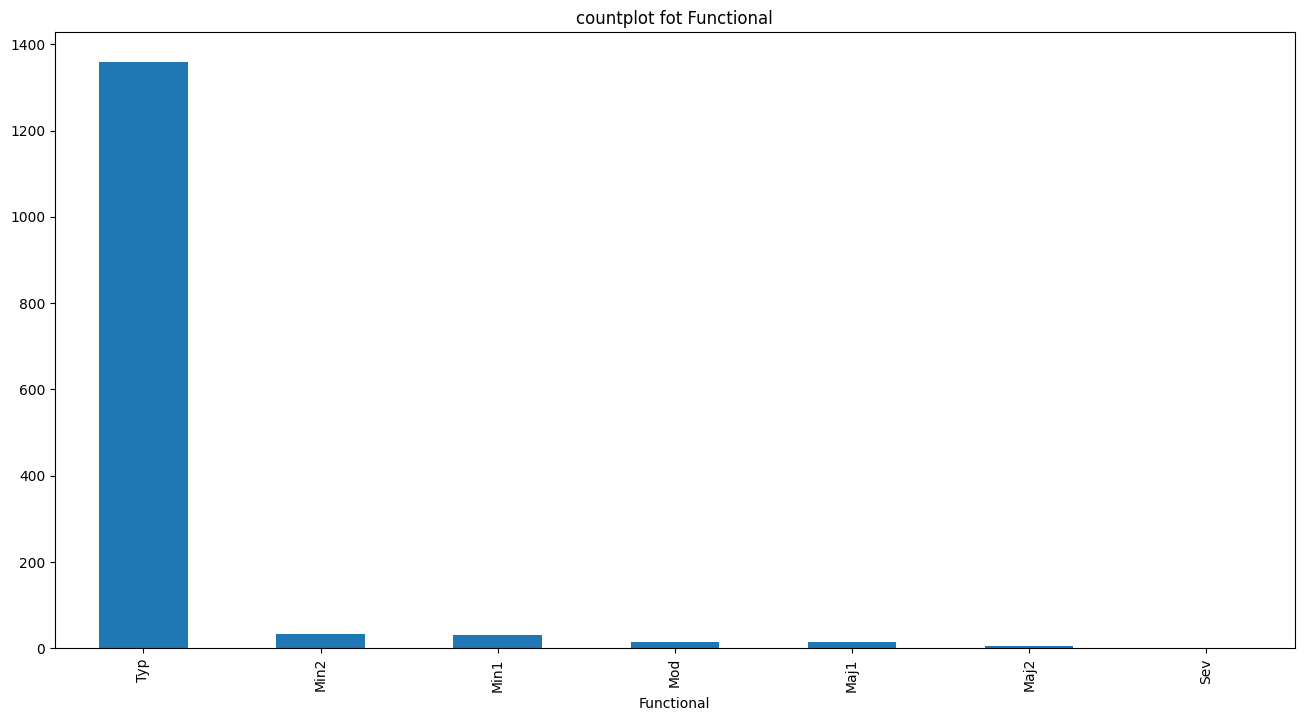

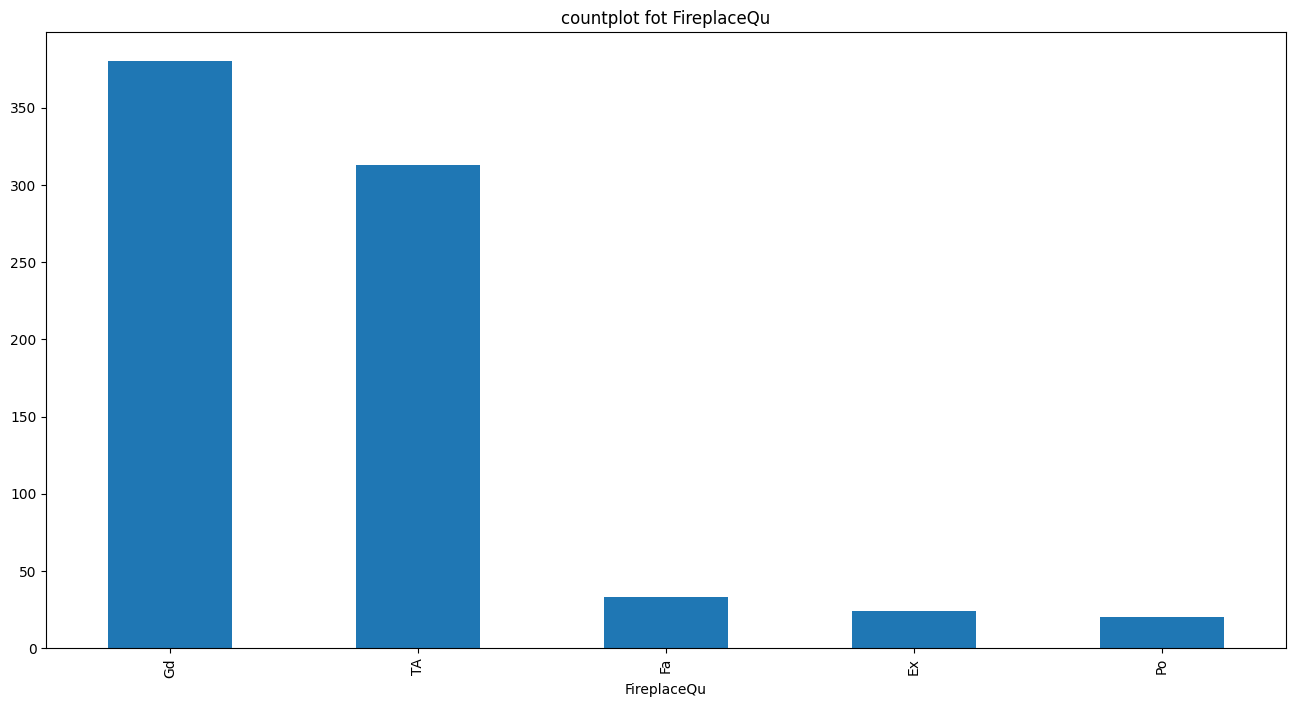

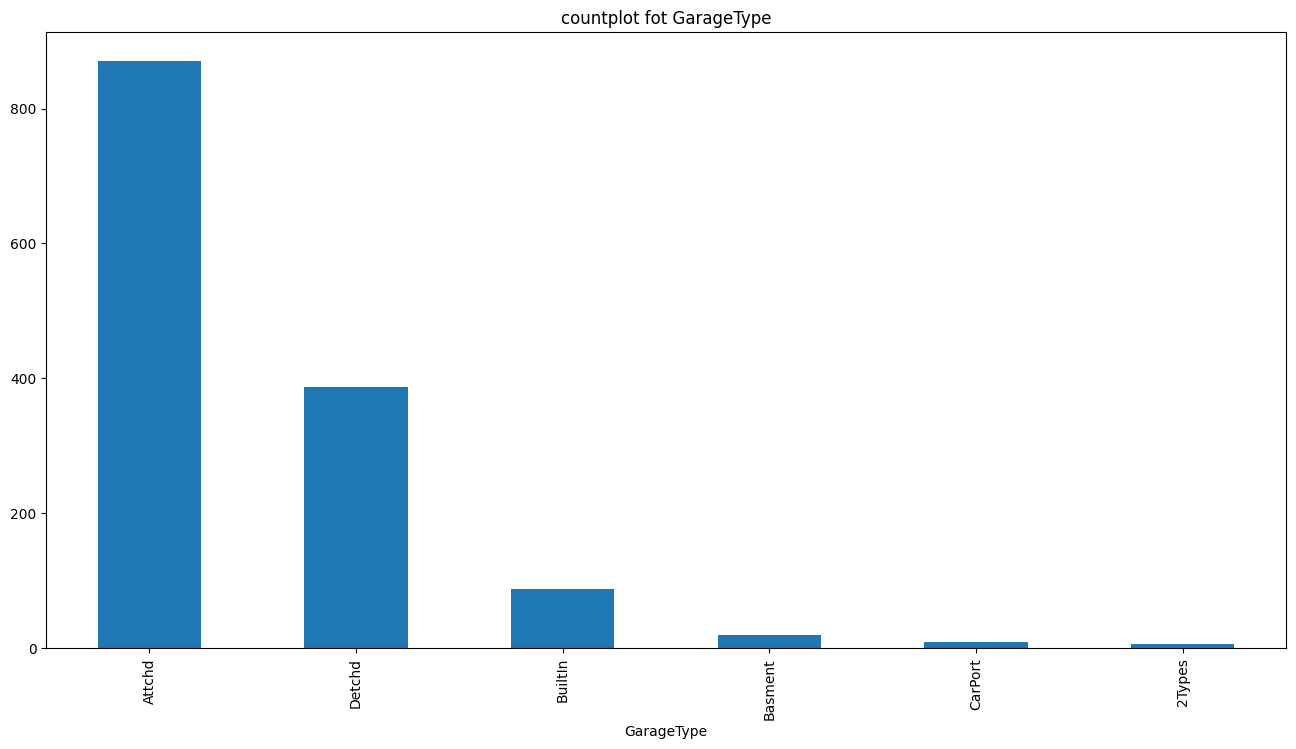

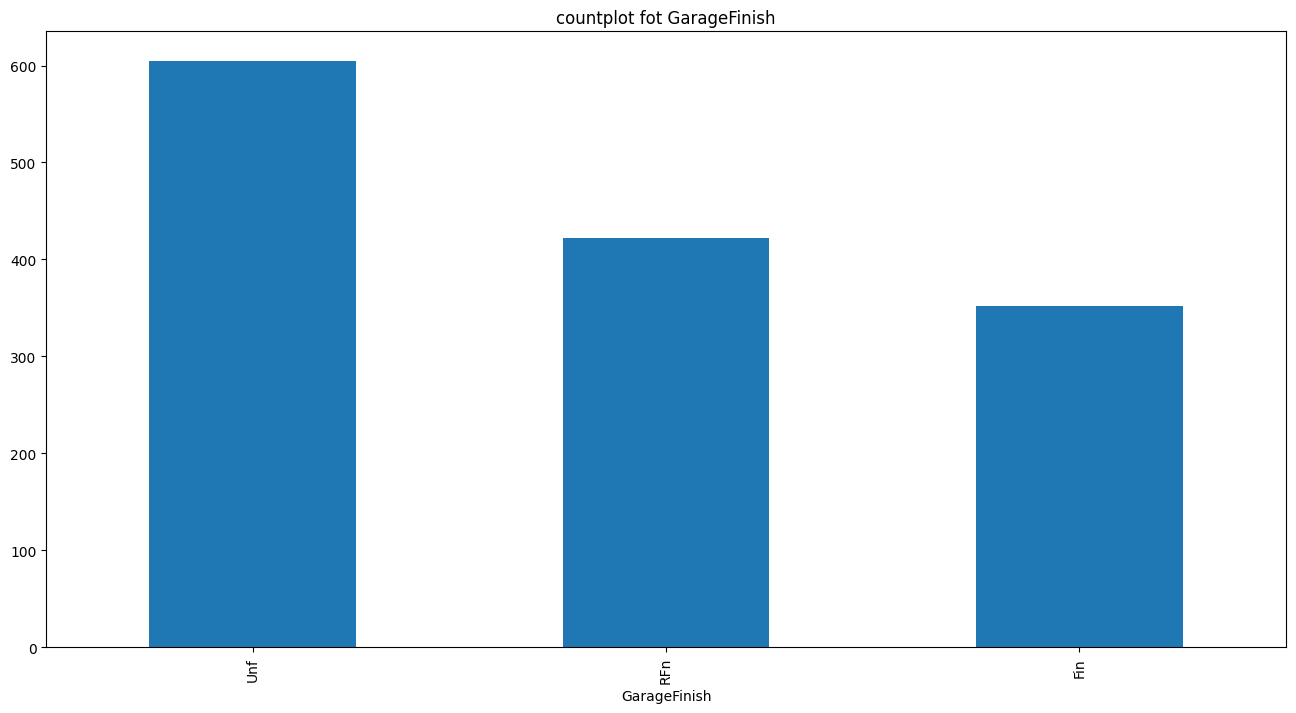

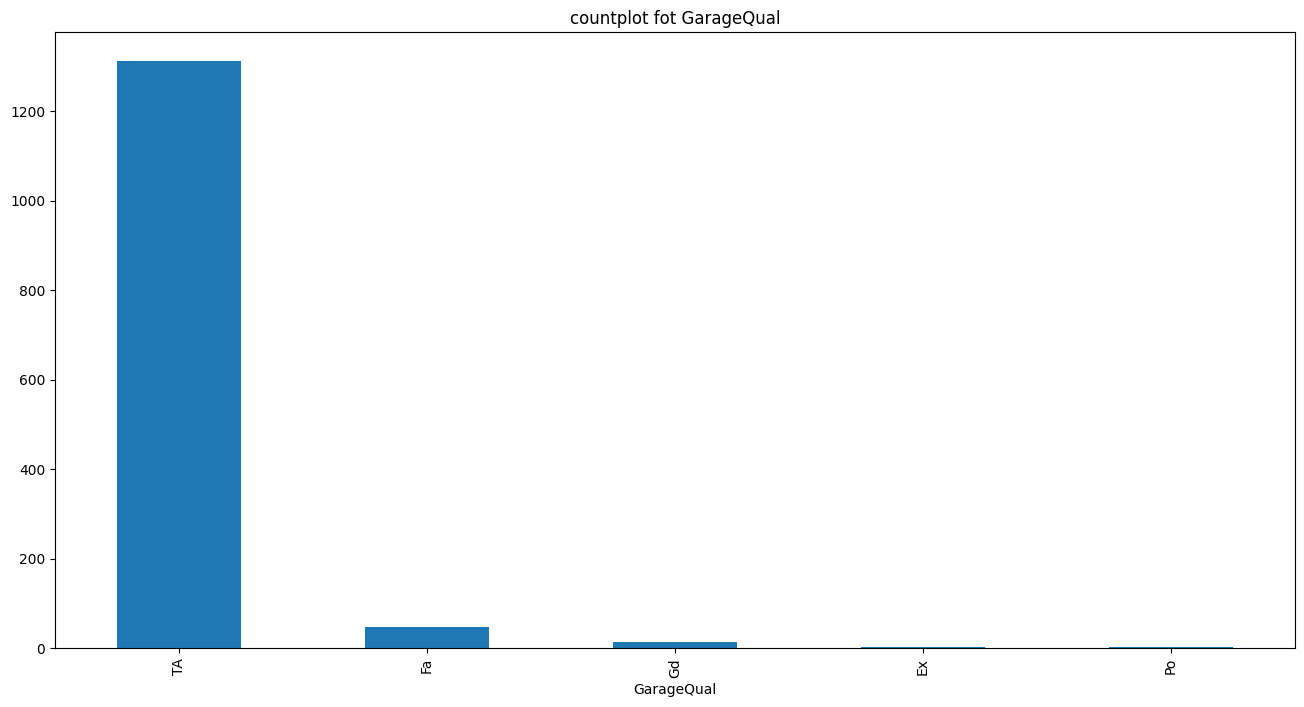

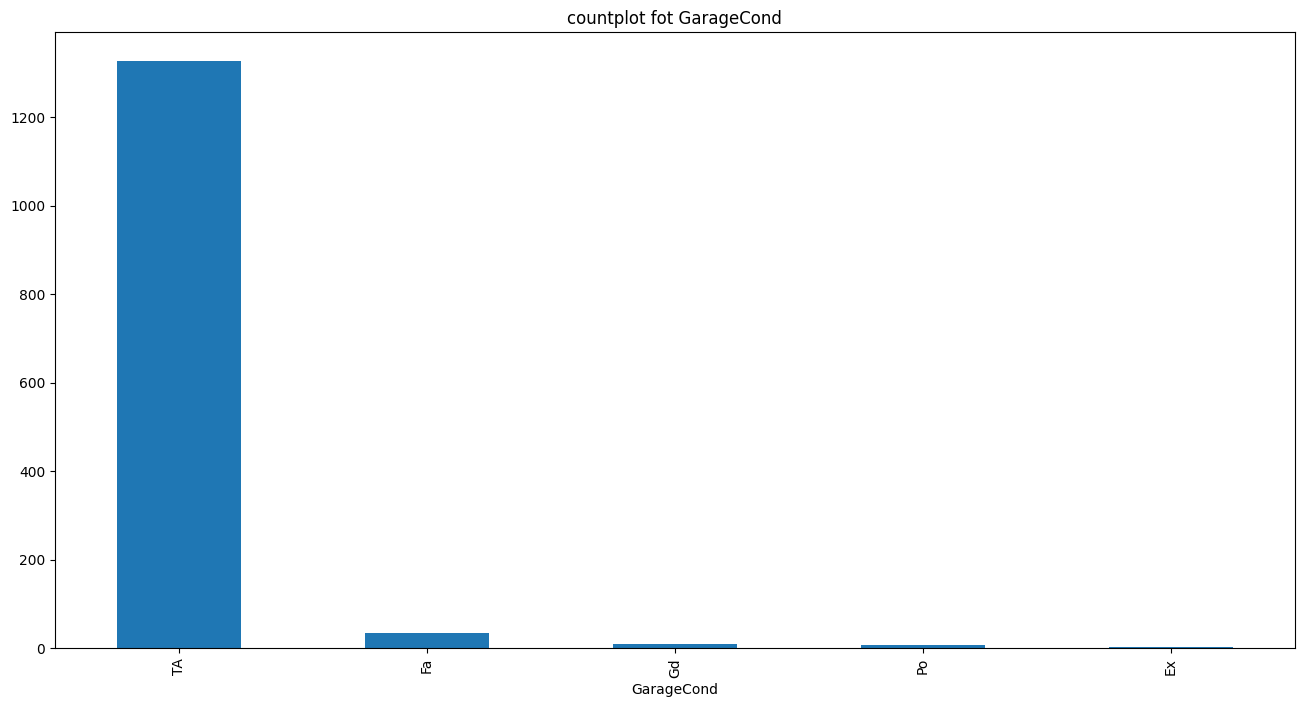

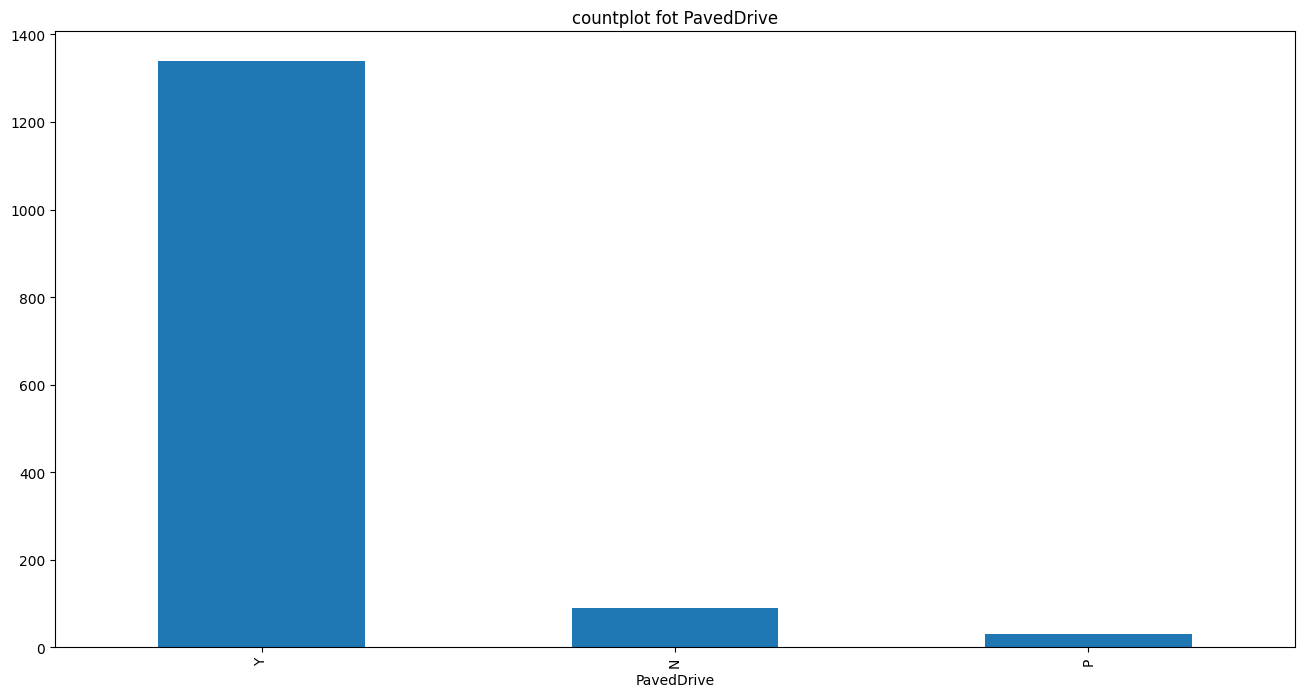

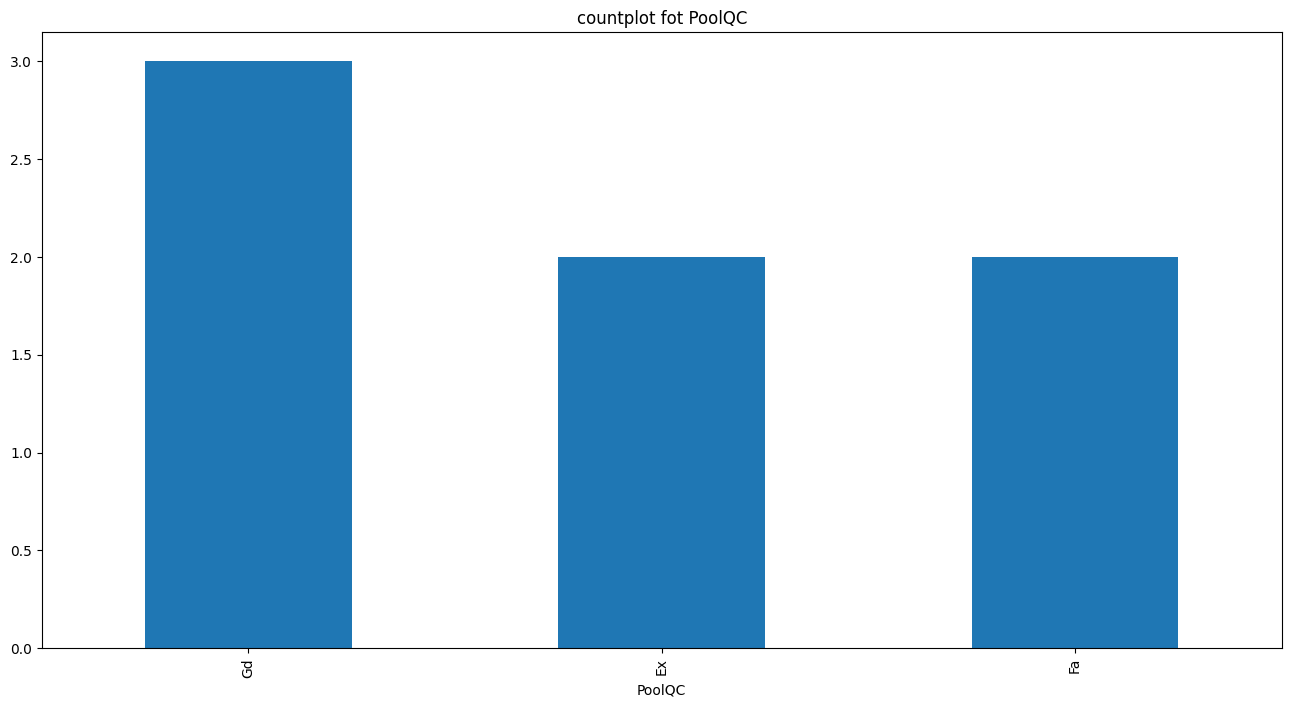

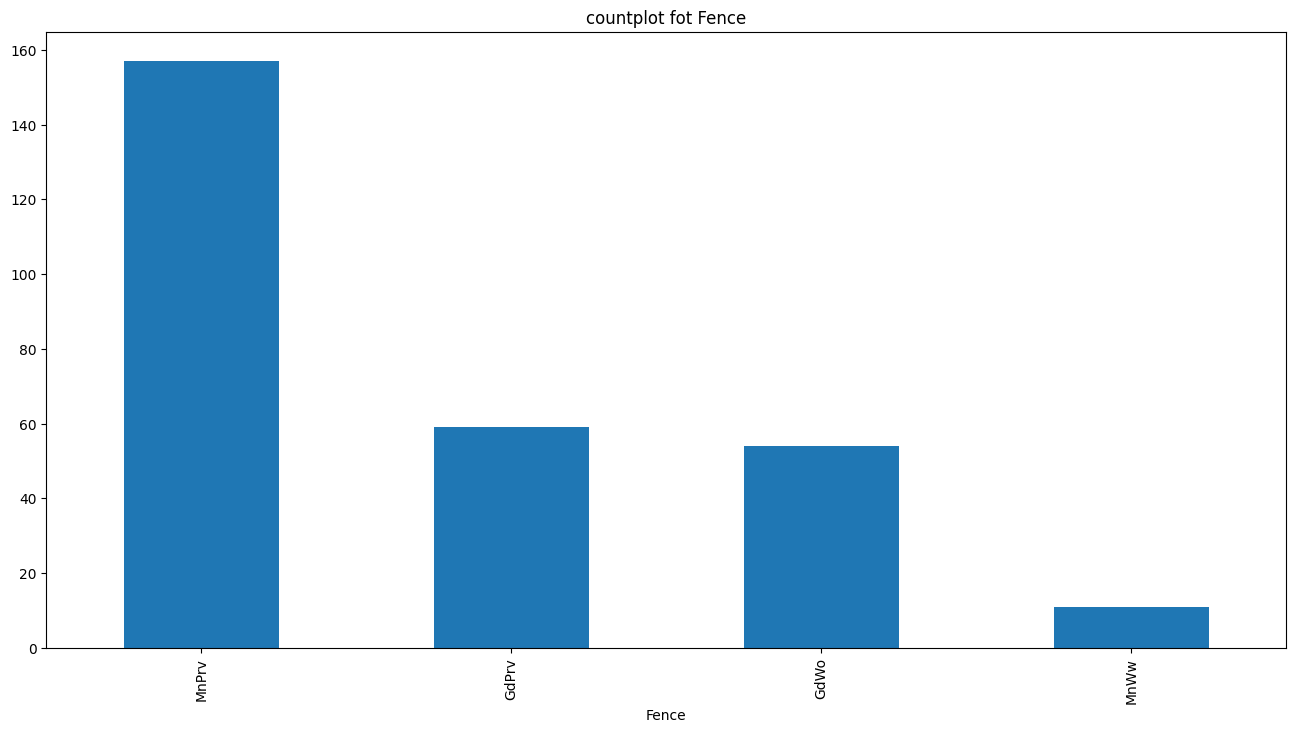

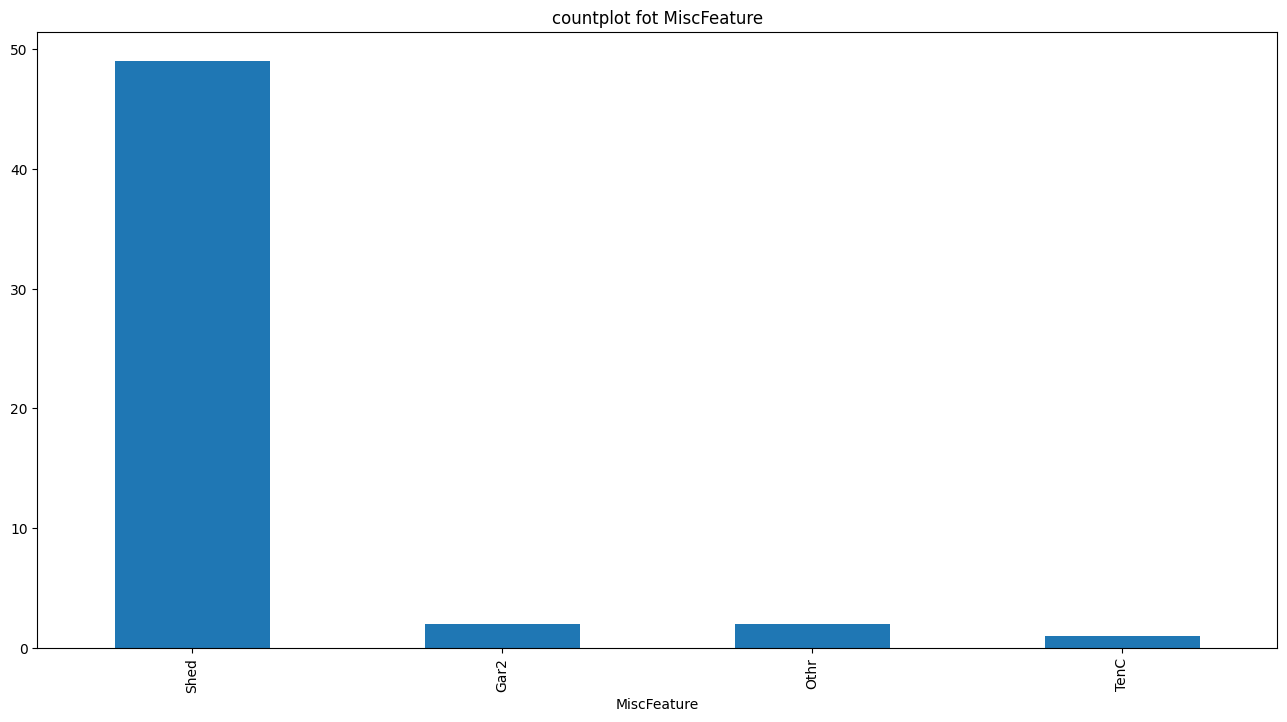

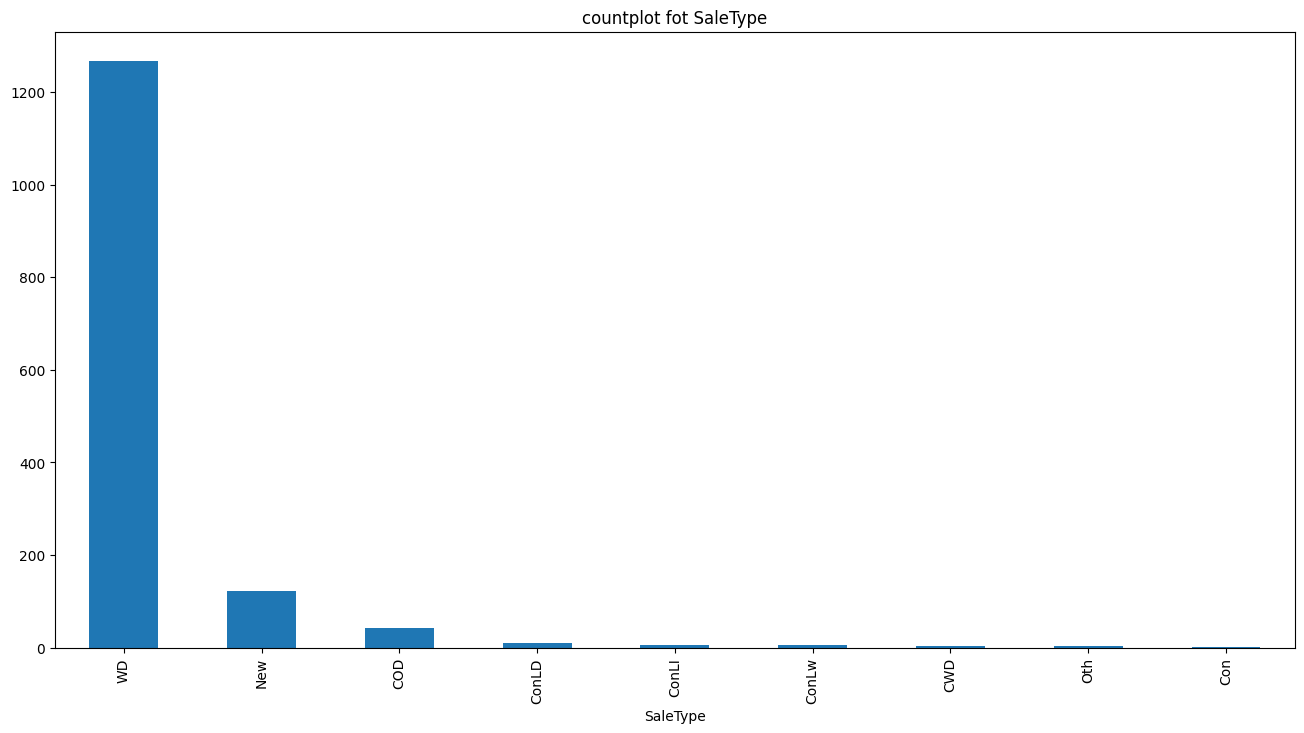

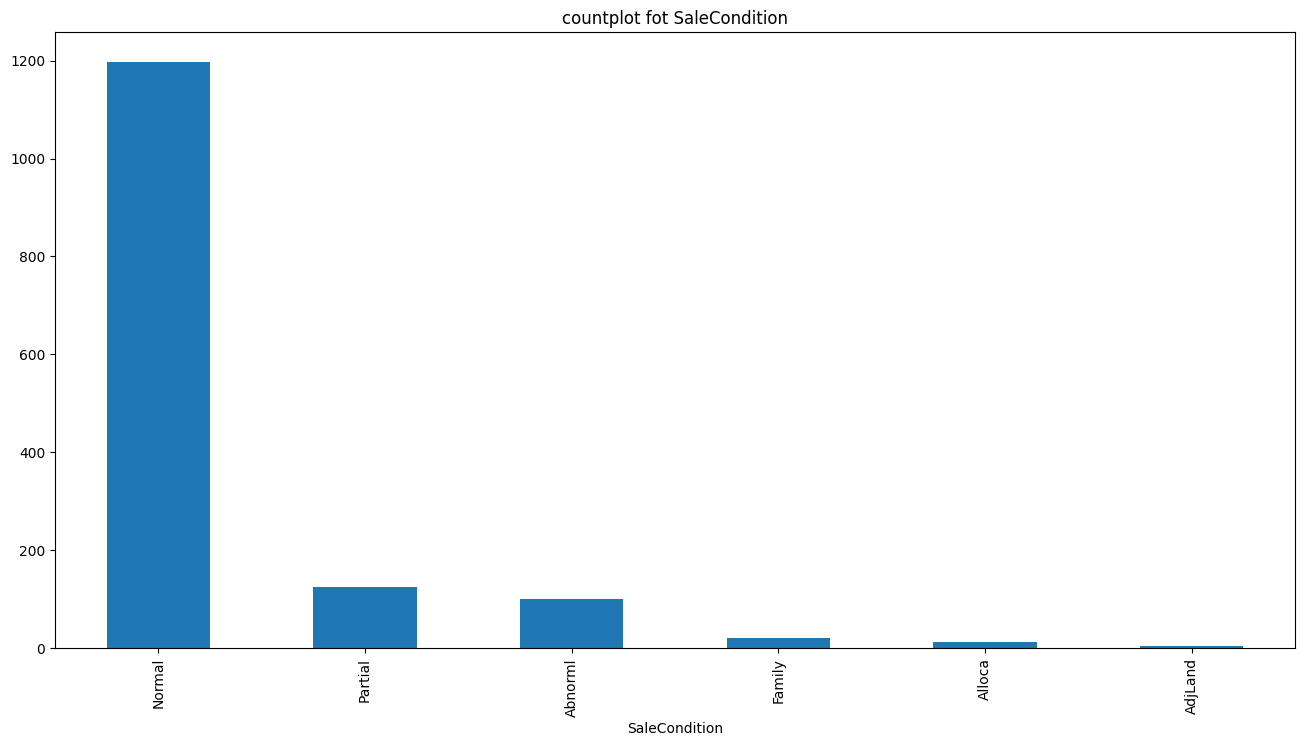

In [13]:
for i in cat:
    df[i].value_counts().plot(kind='bar',
                              title=f'countplot fot {i}',
                              figsize=(16,8))
    plt.show()

##### HISTOGRAM FOR CONTINOUS FEATURES

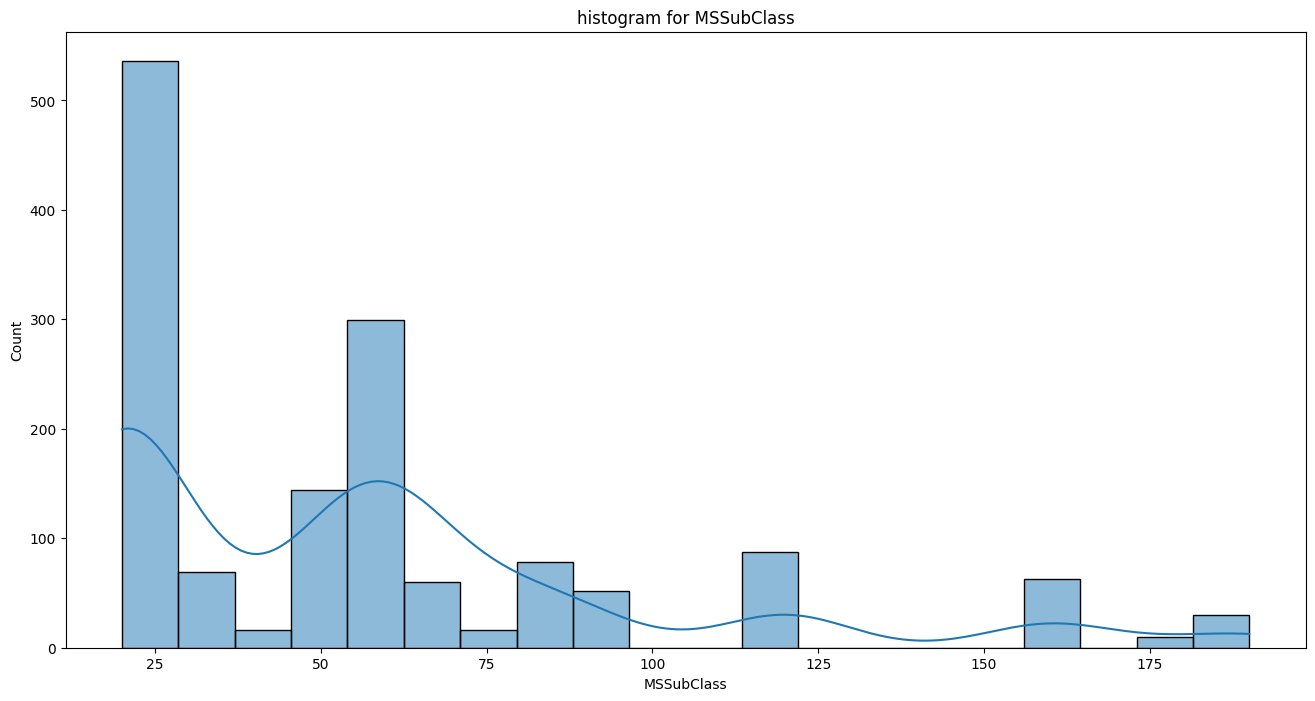

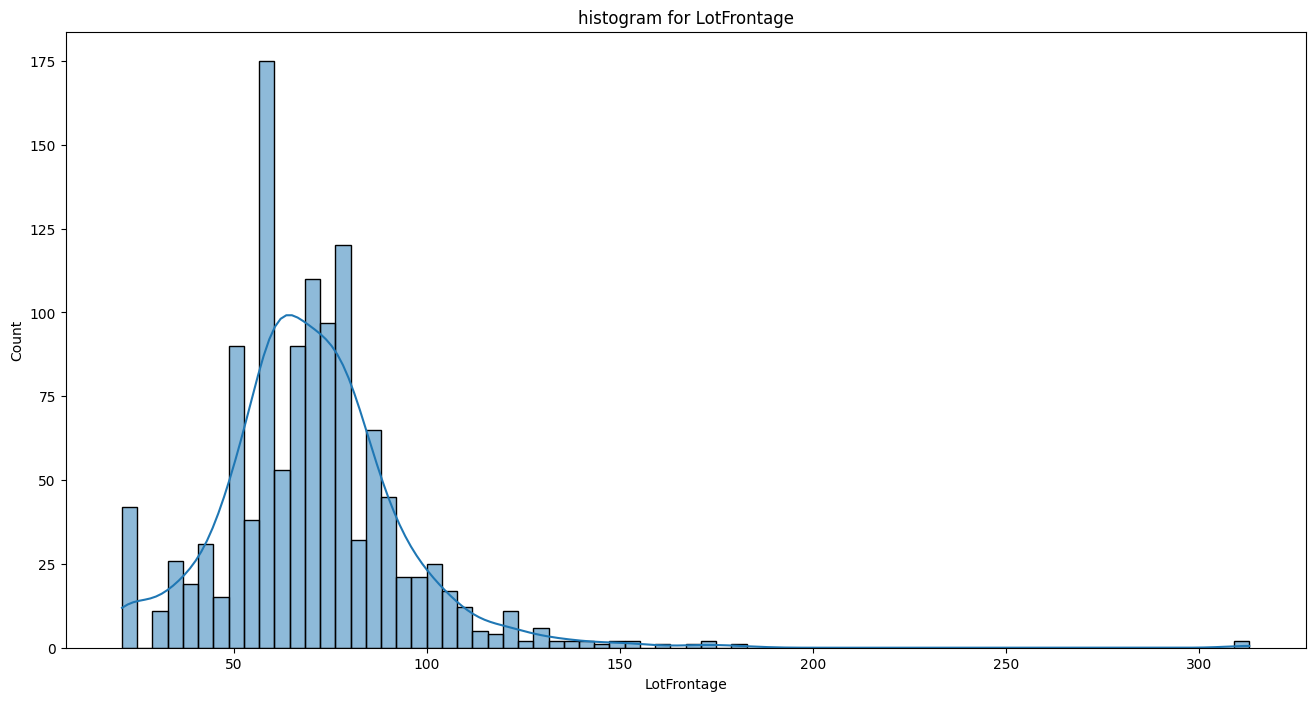

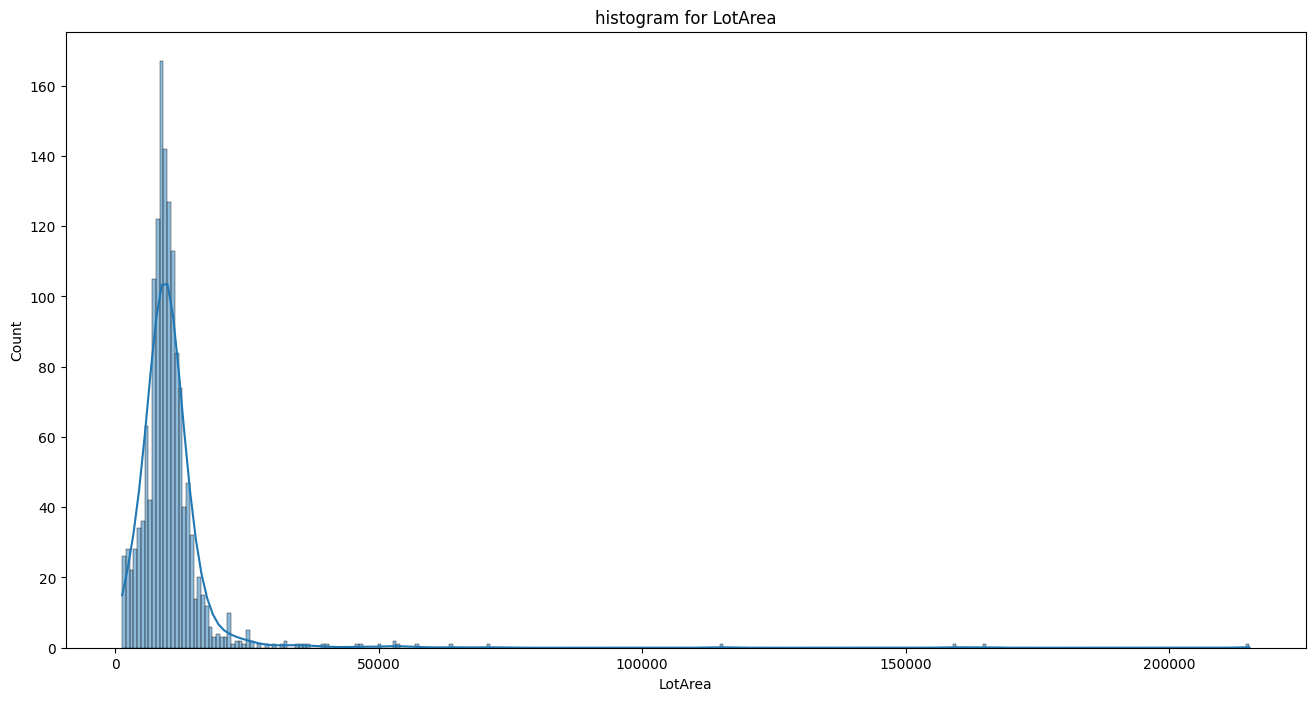

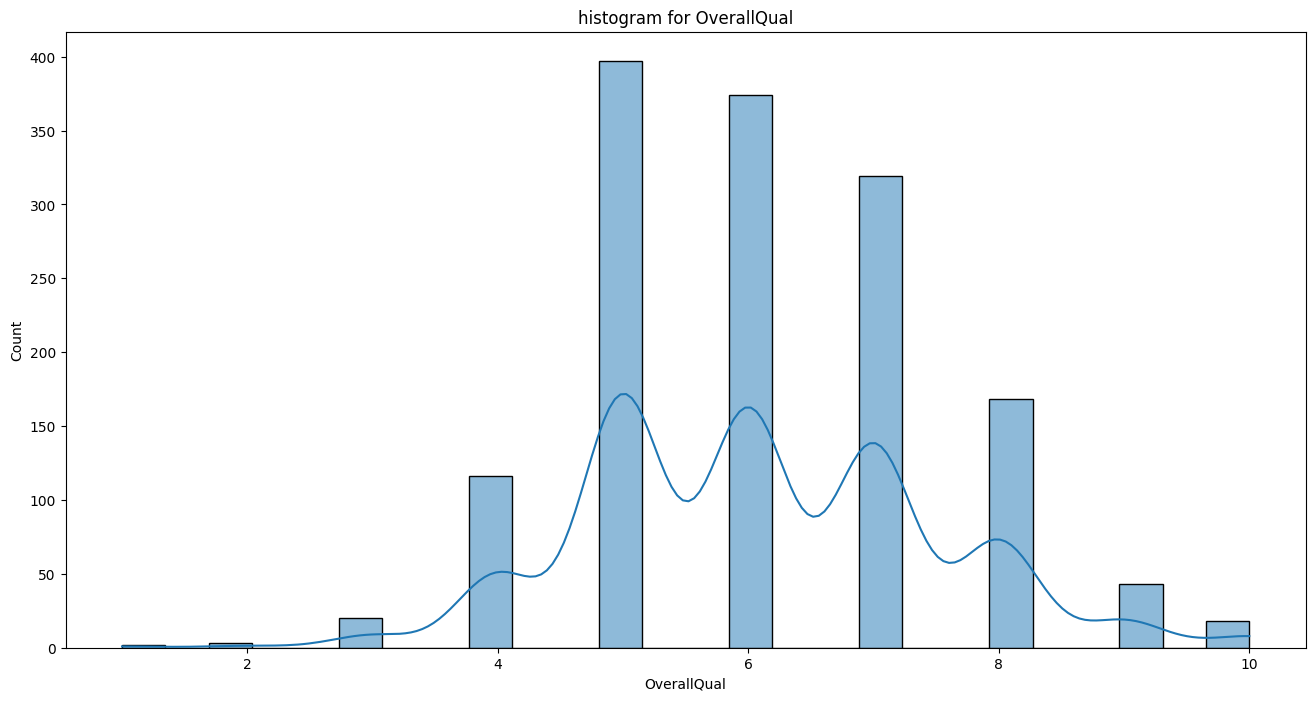

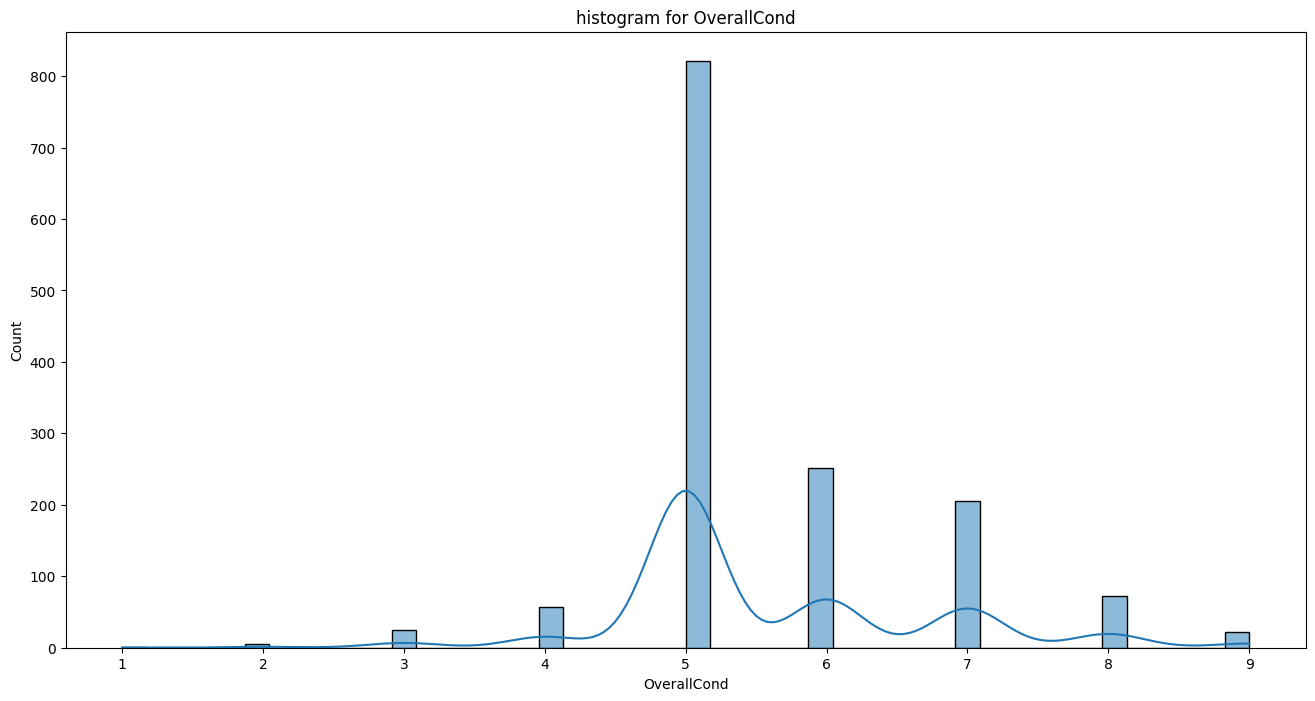

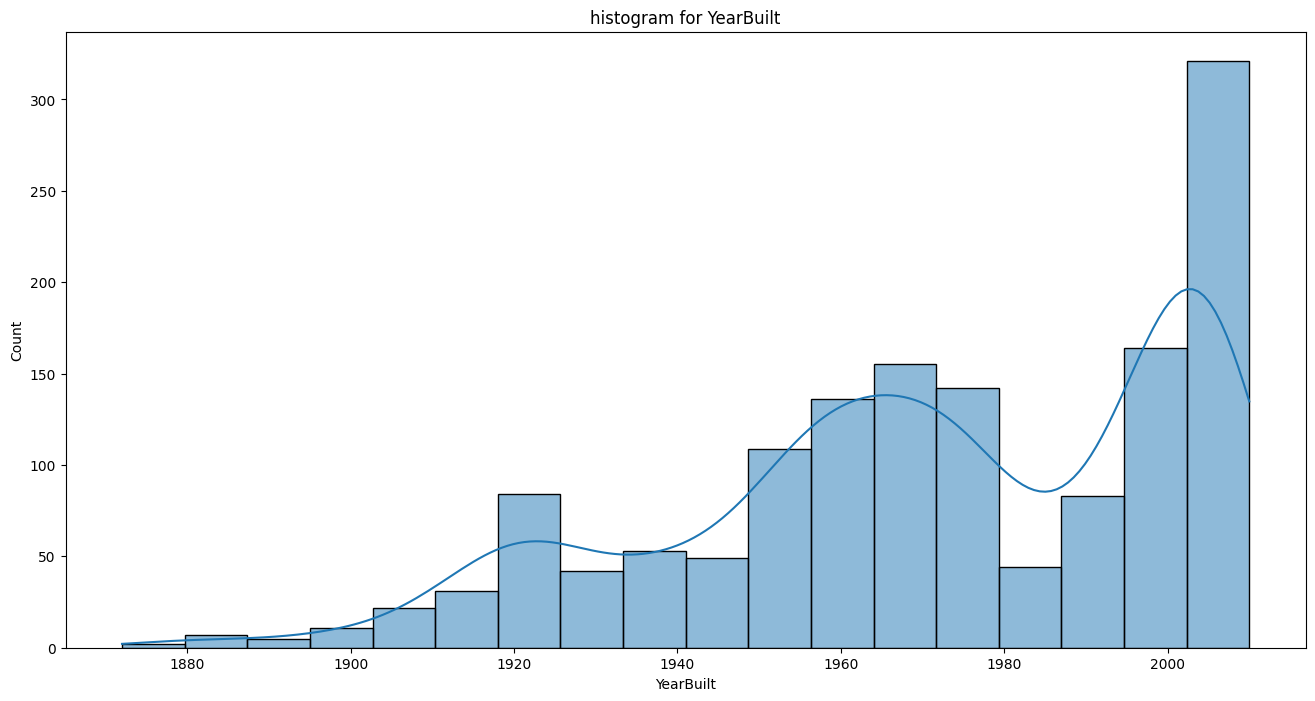

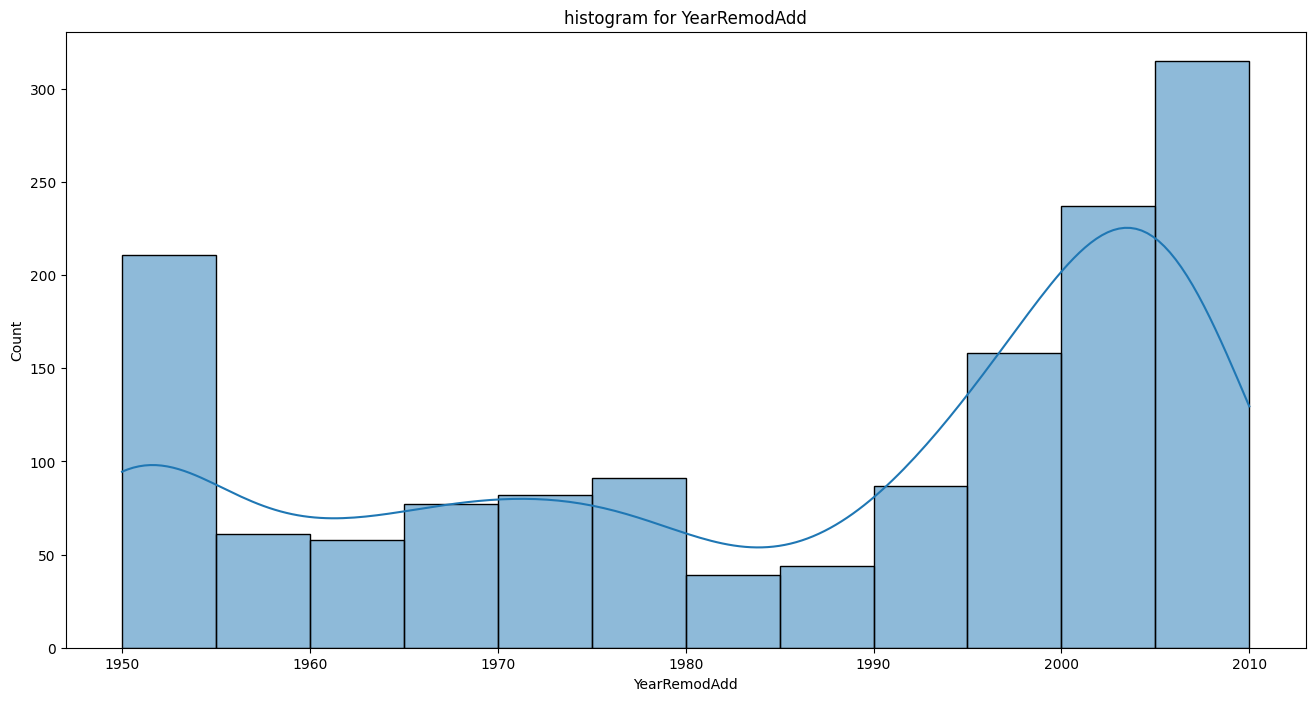

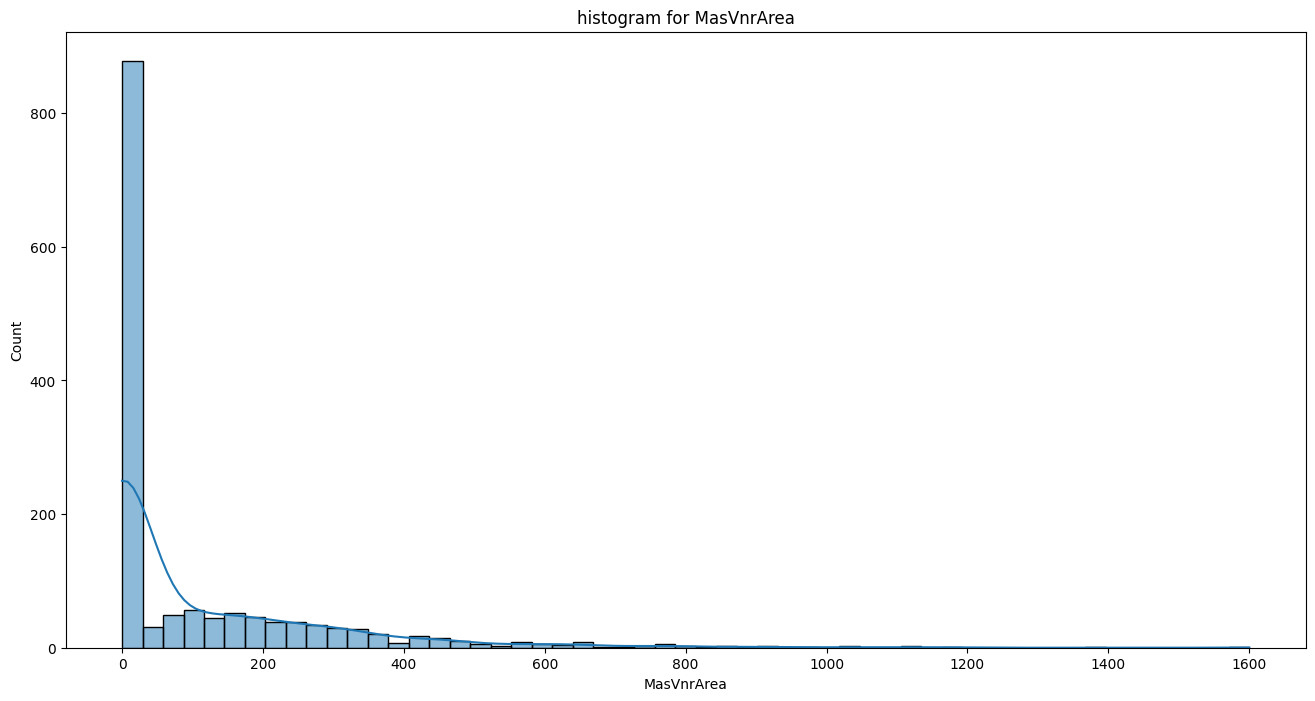

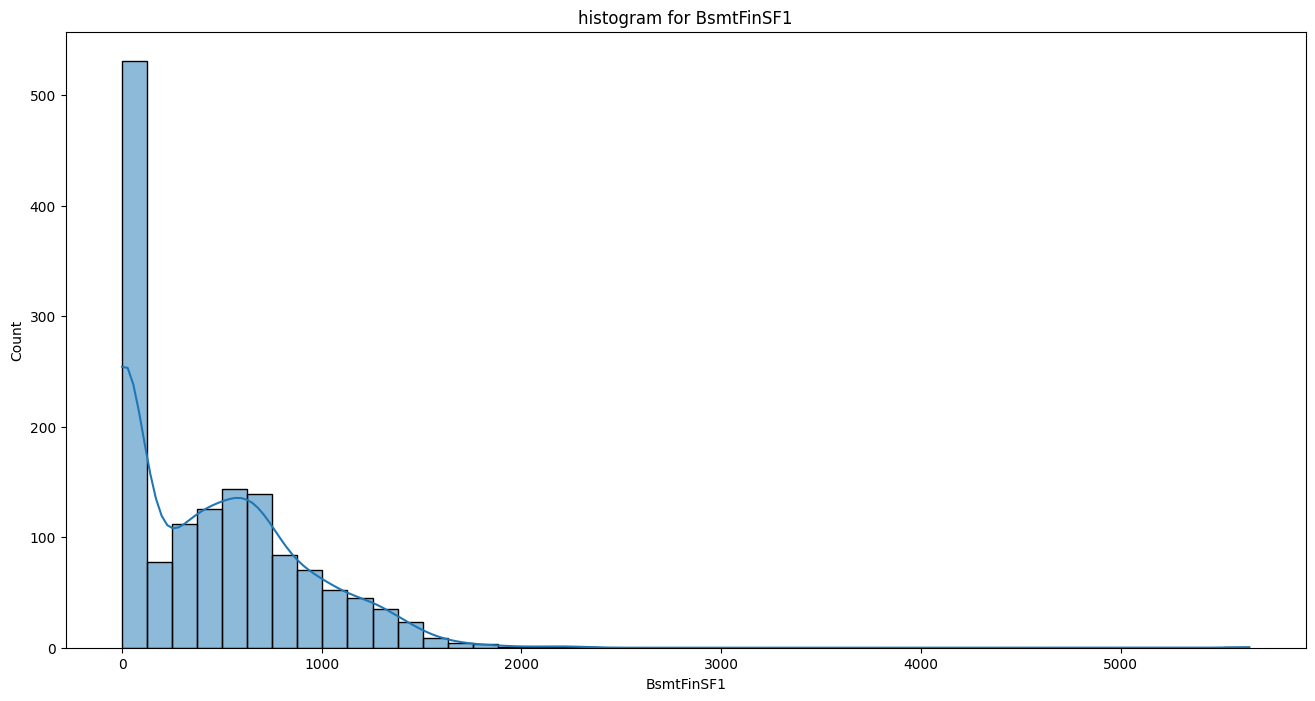

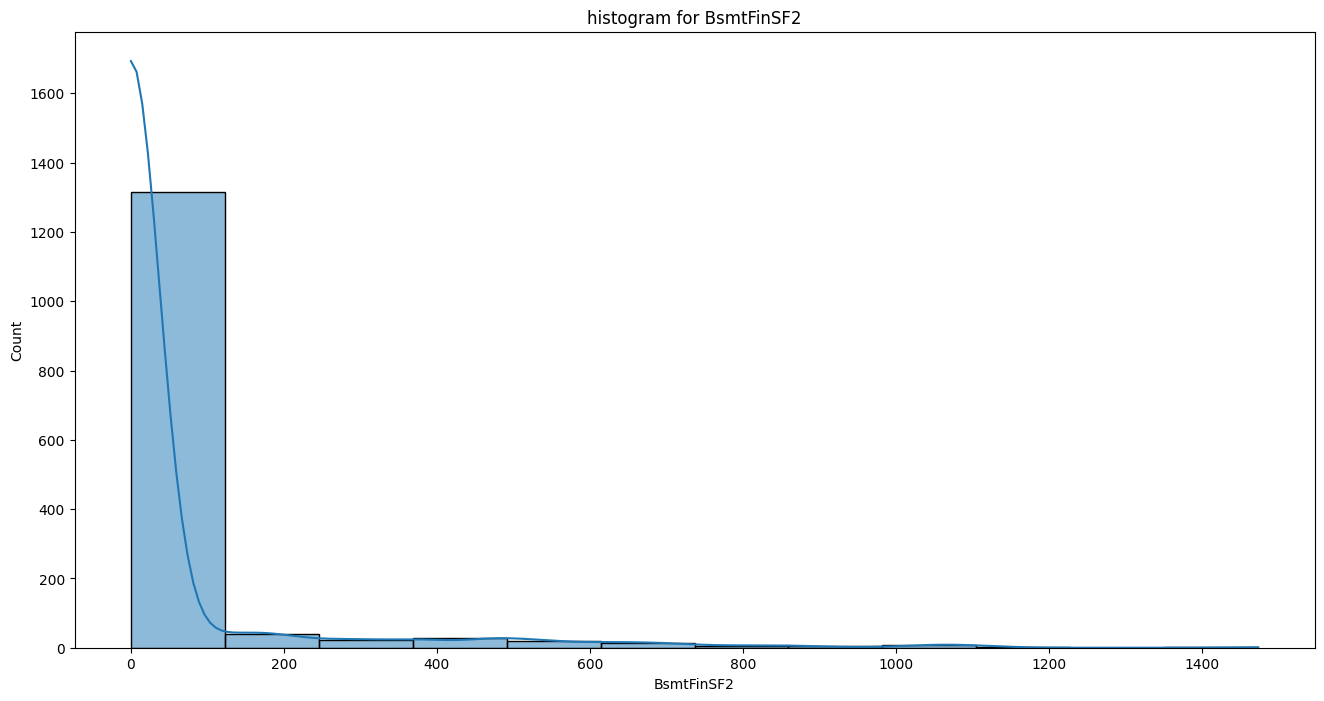

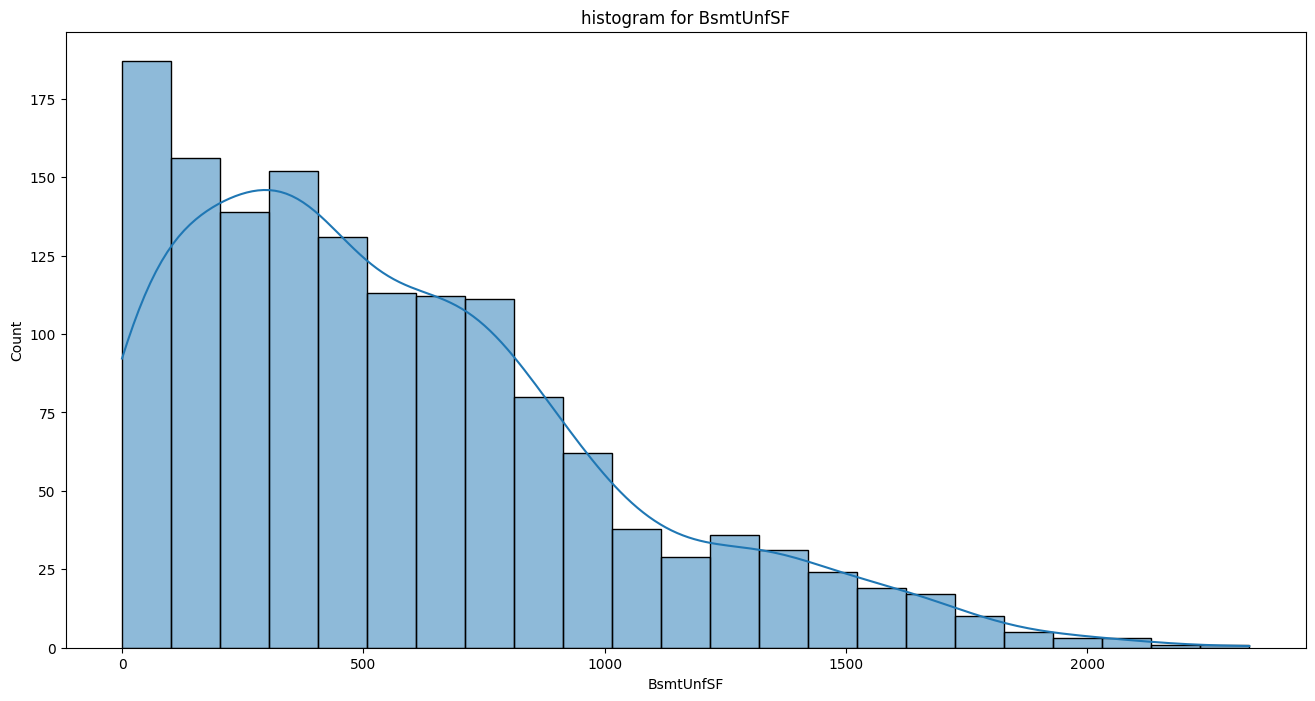

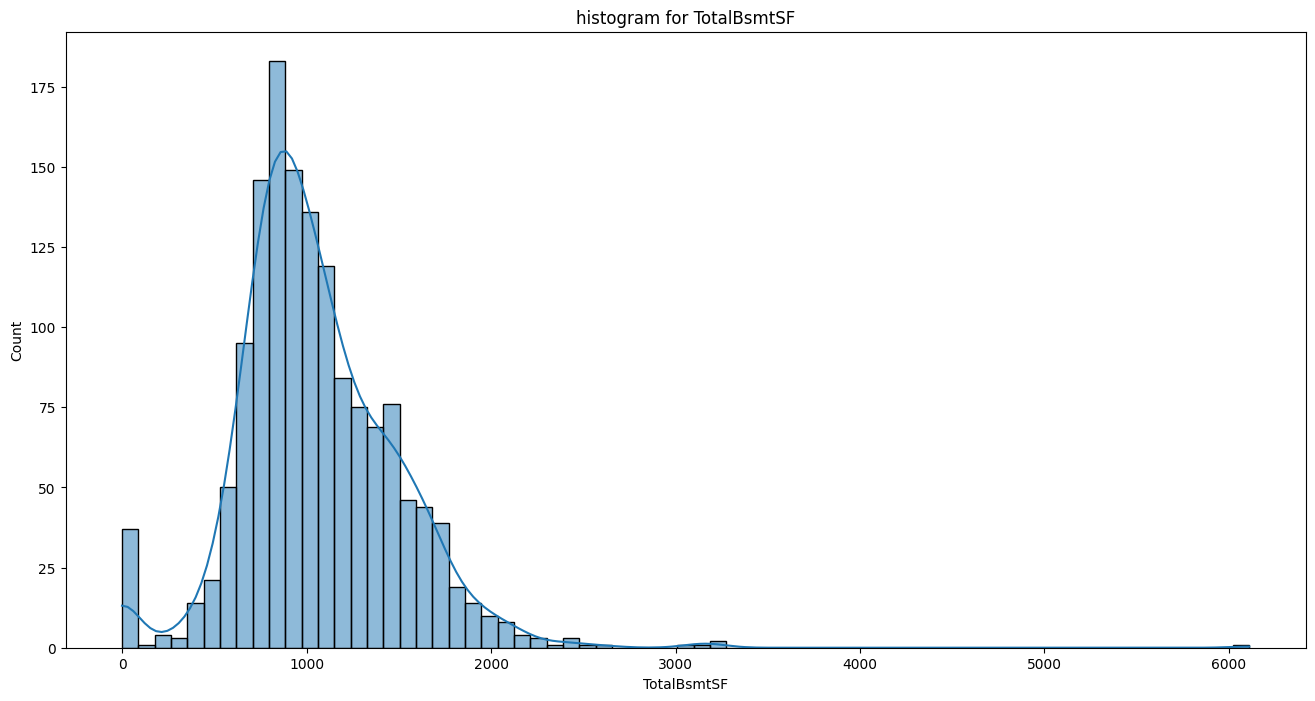

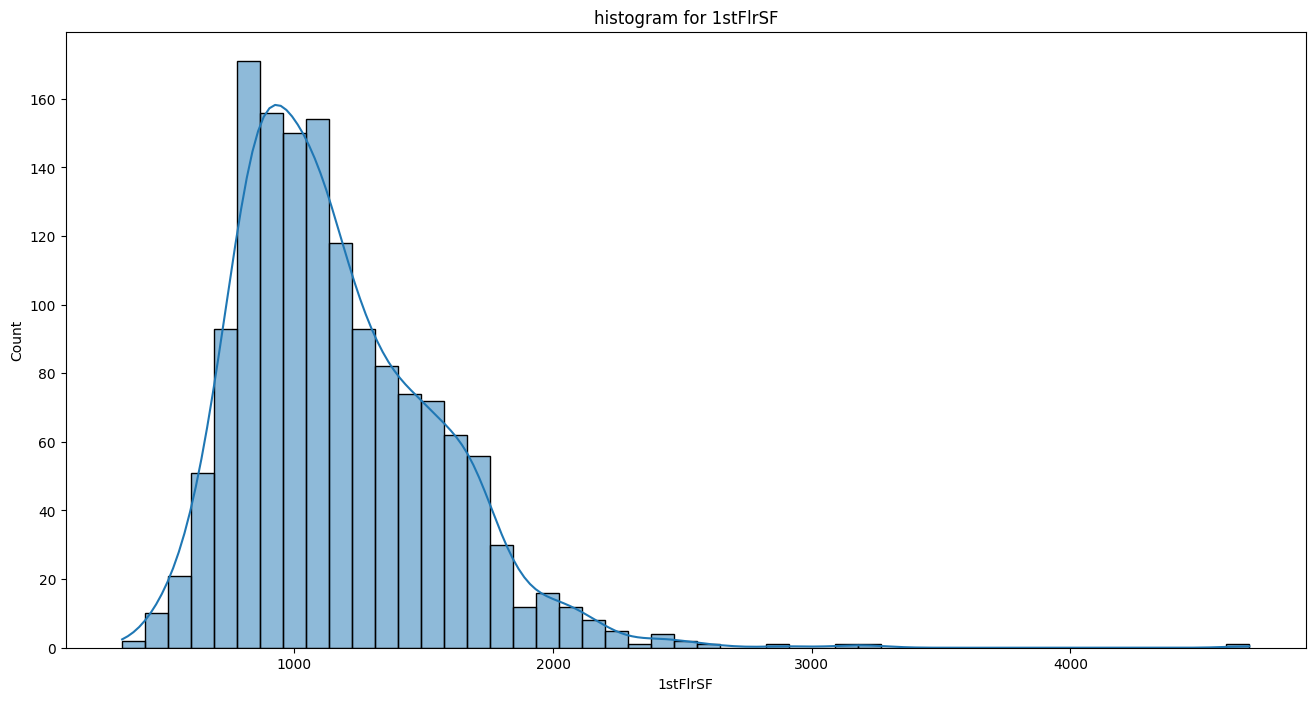

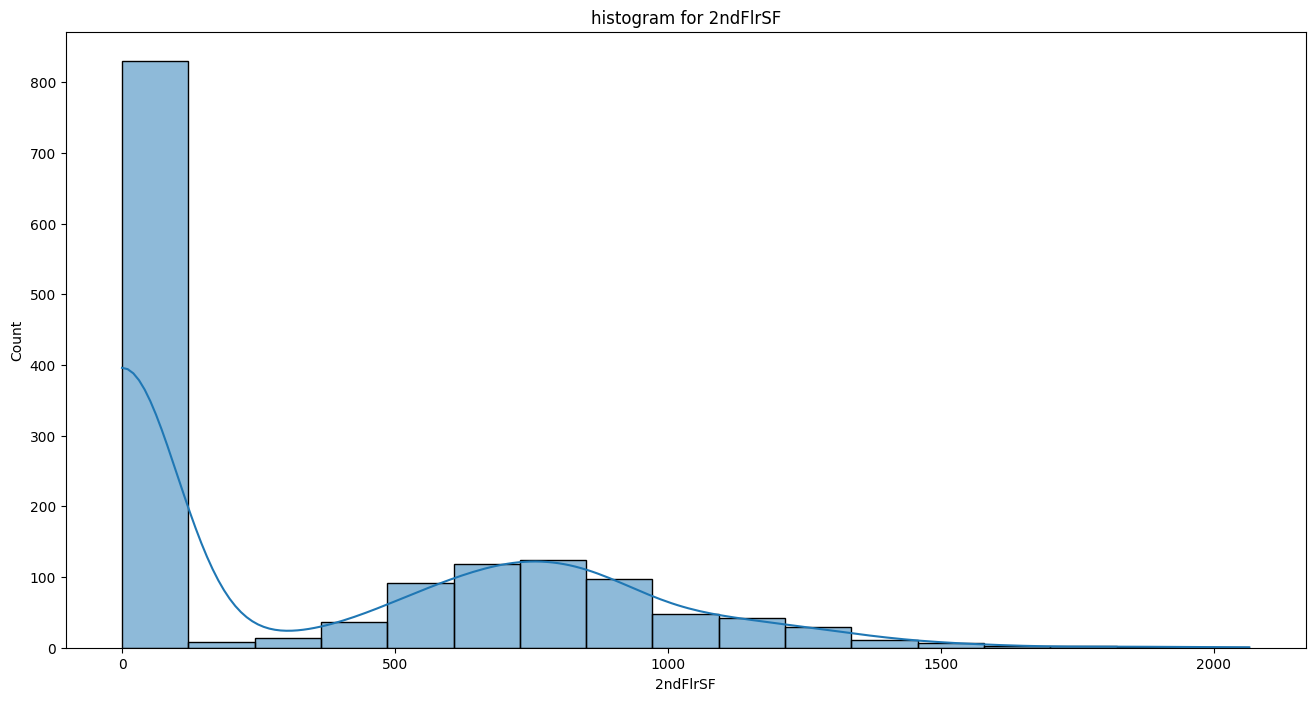

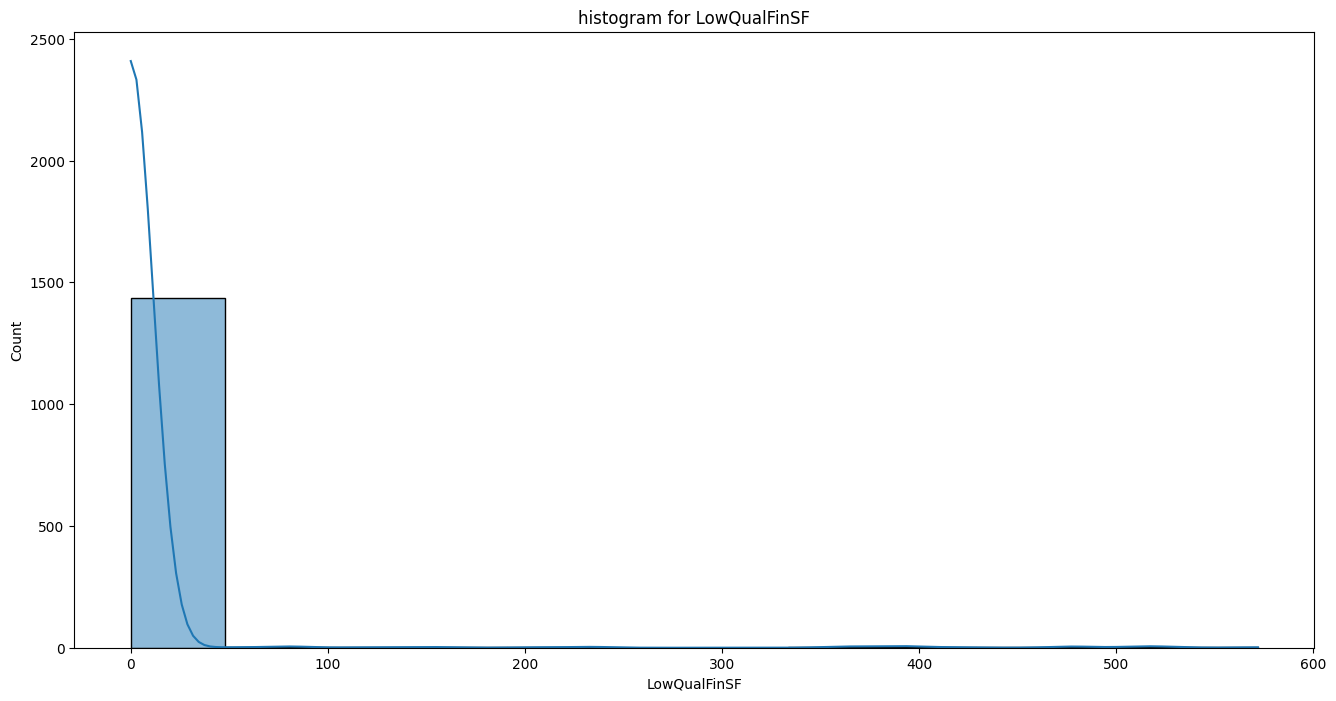

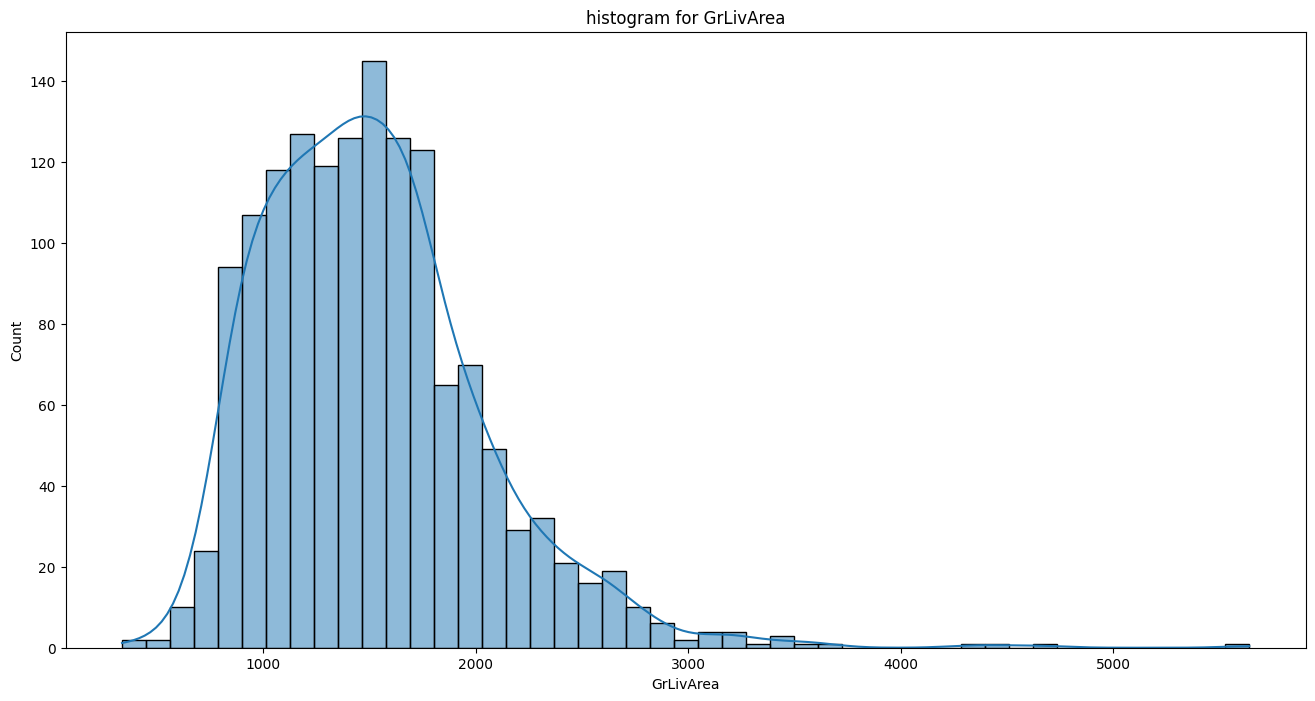

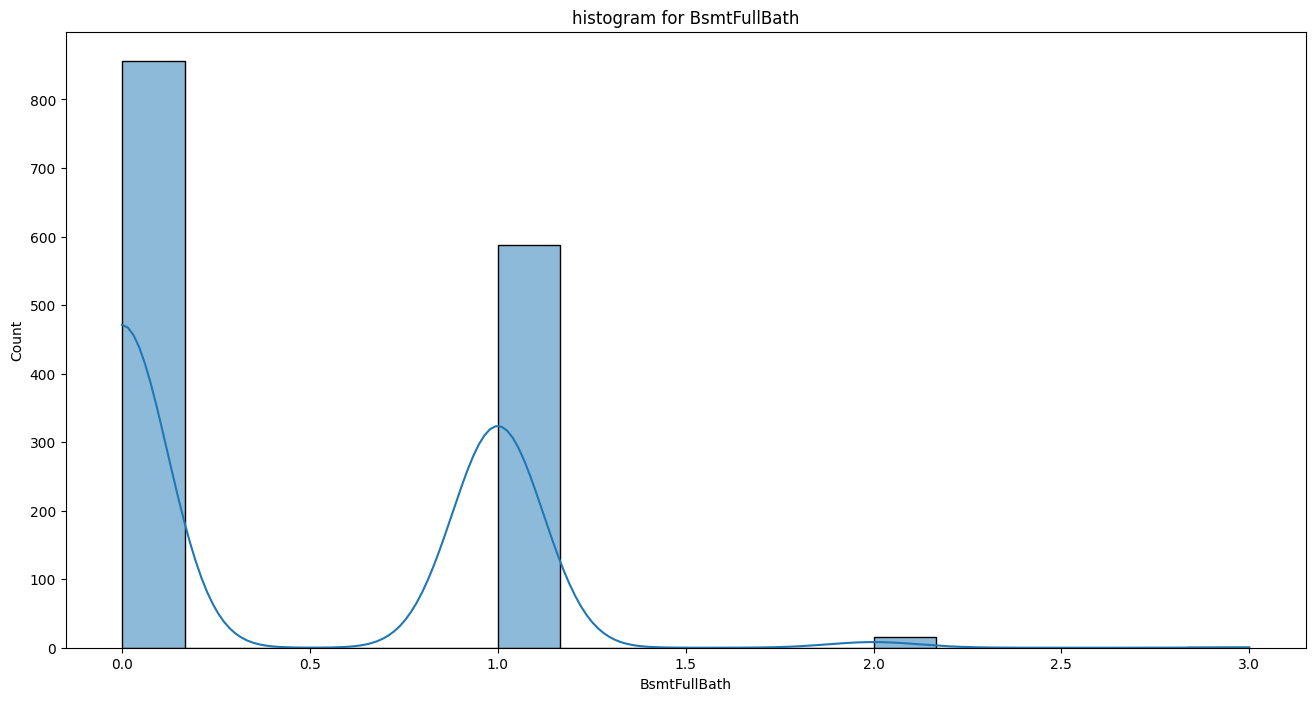

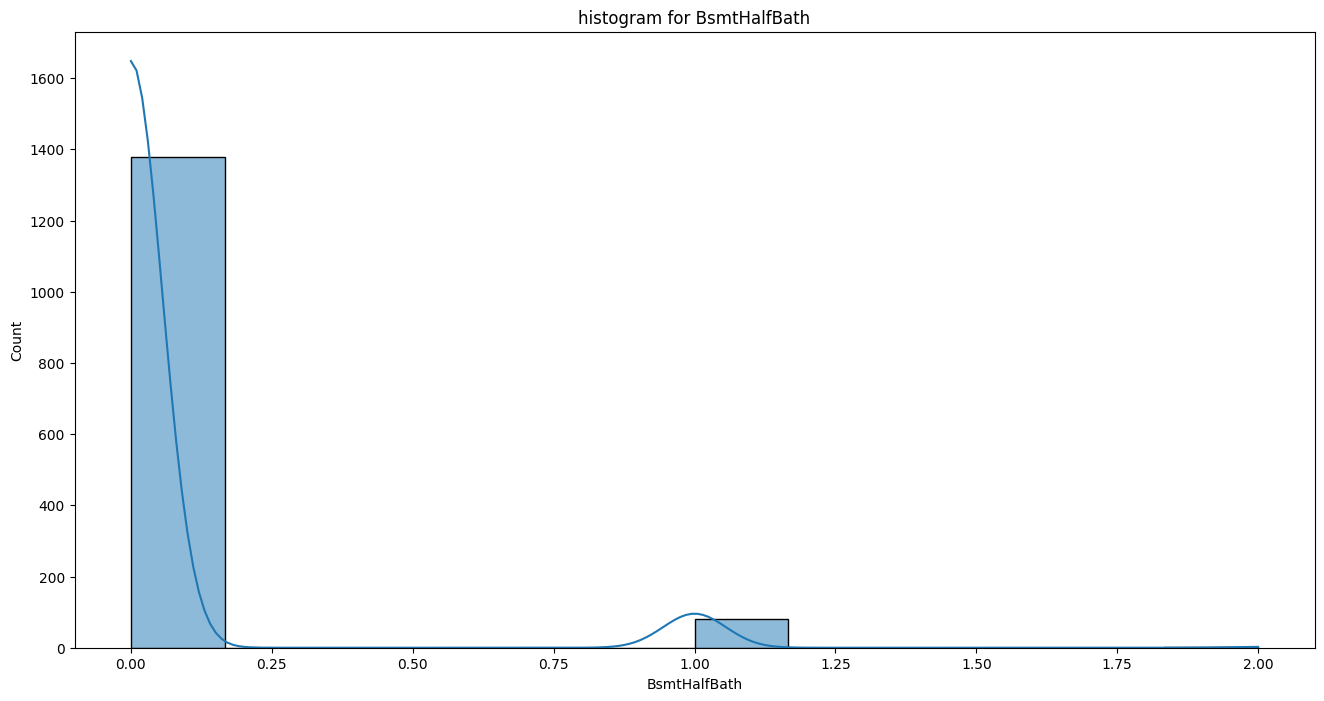

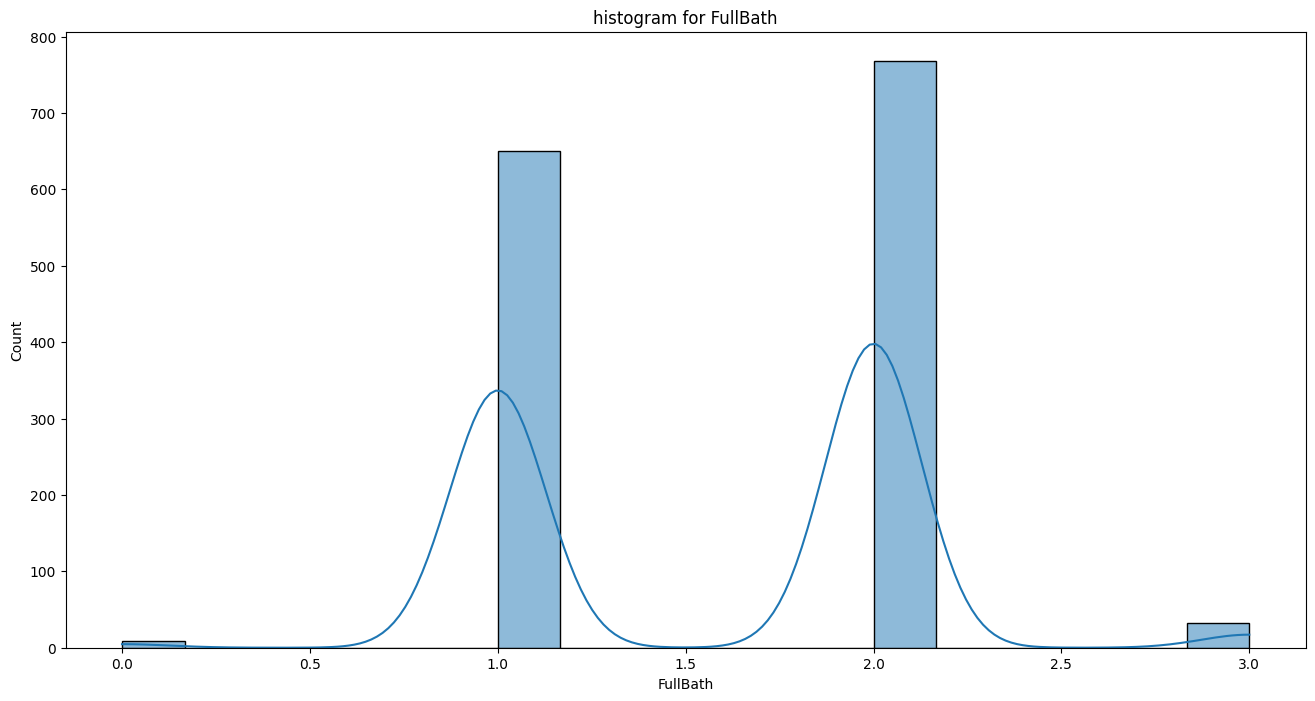

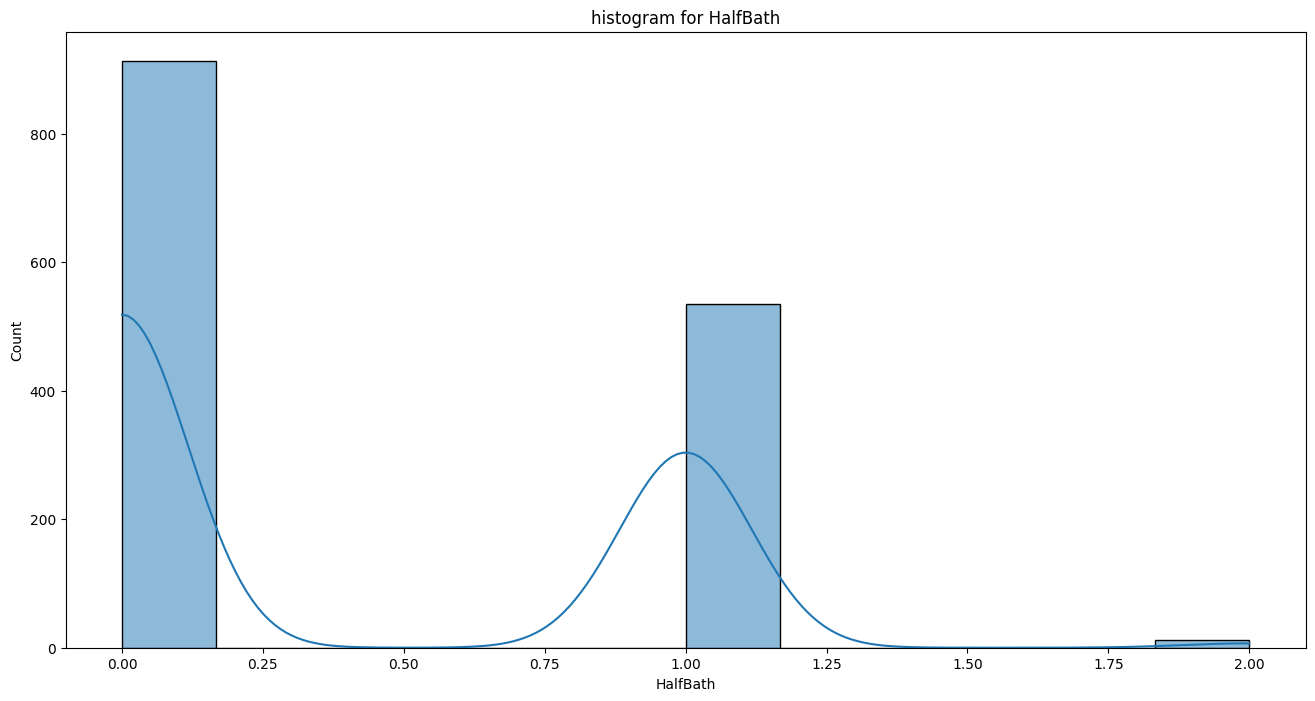

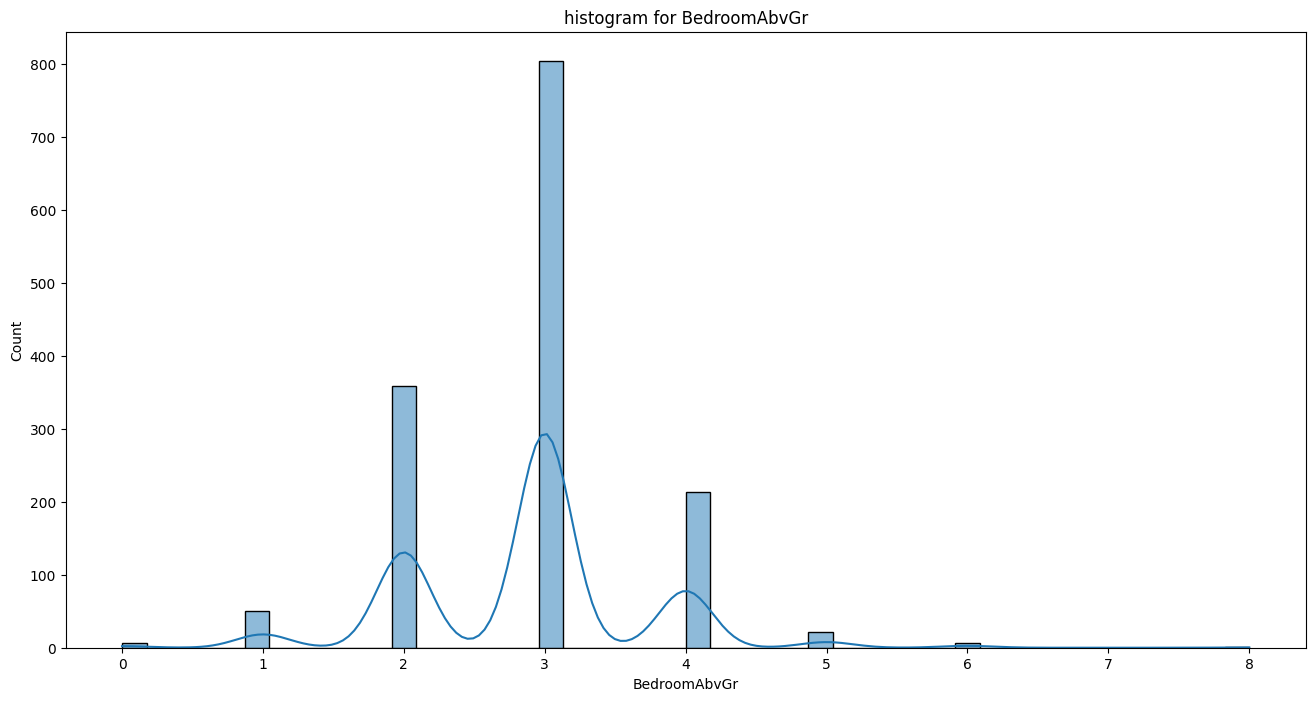

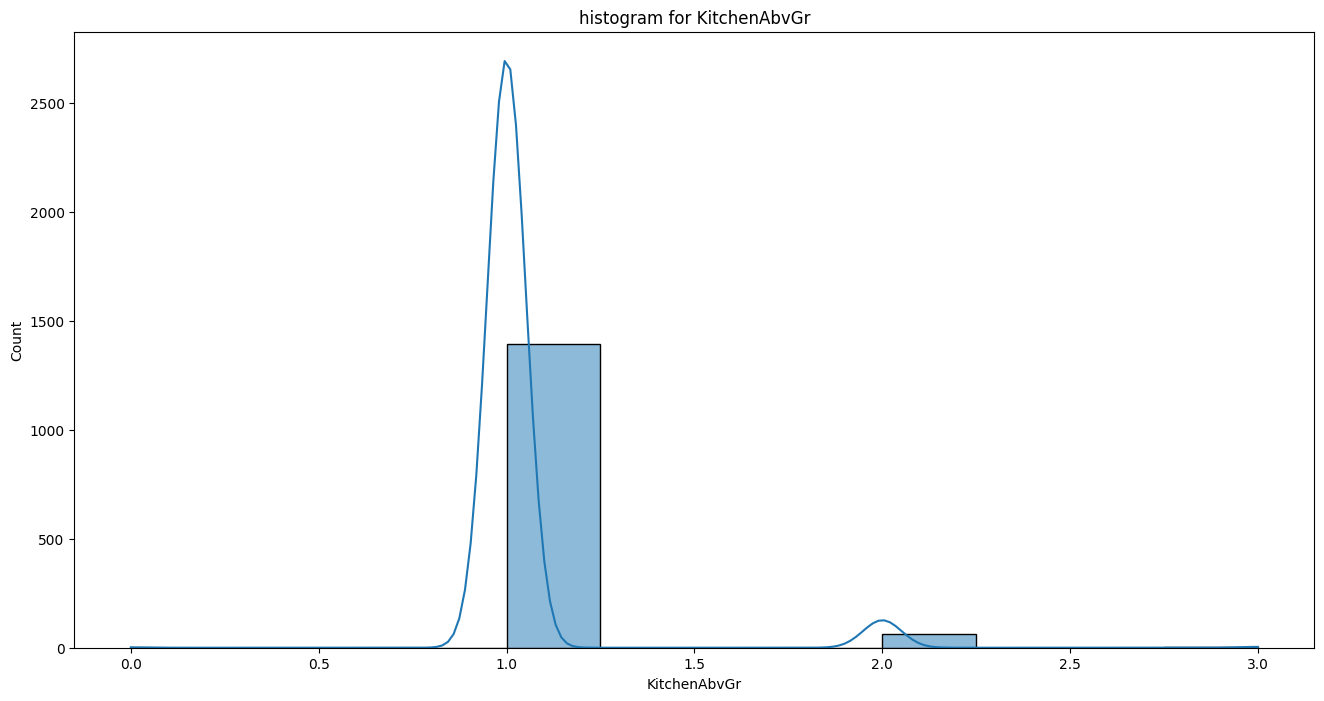

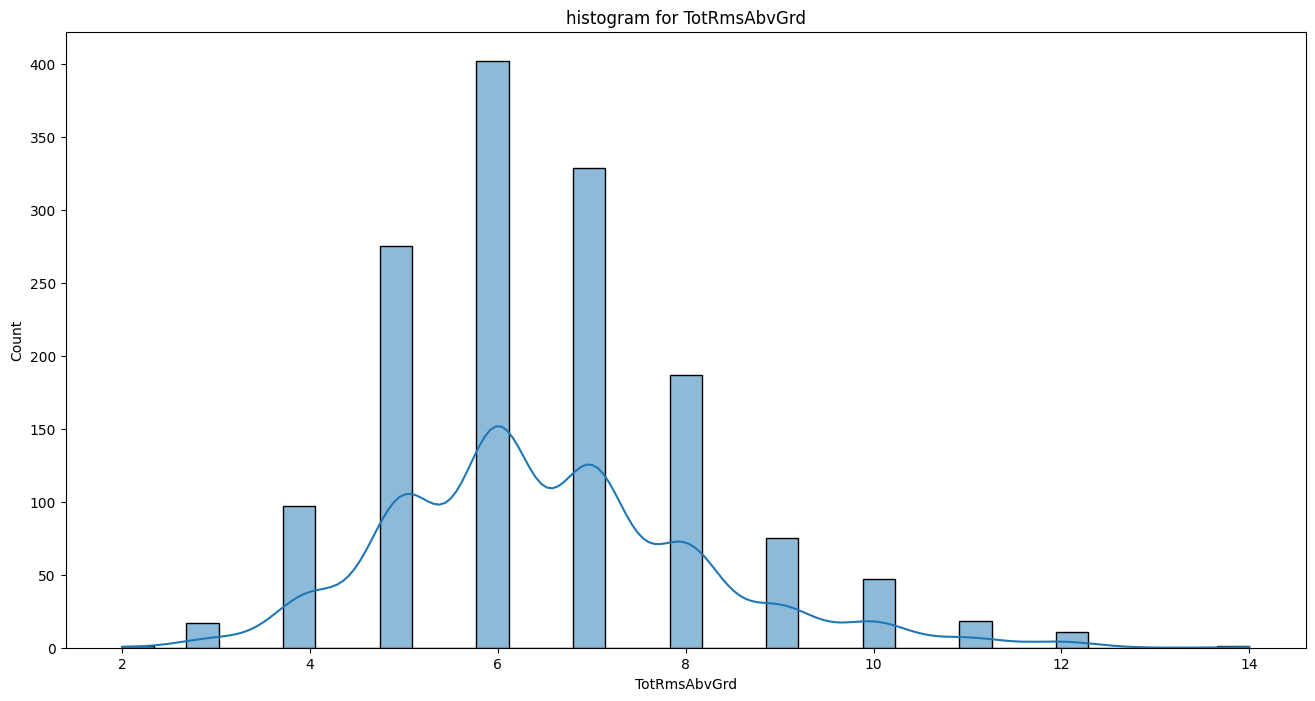

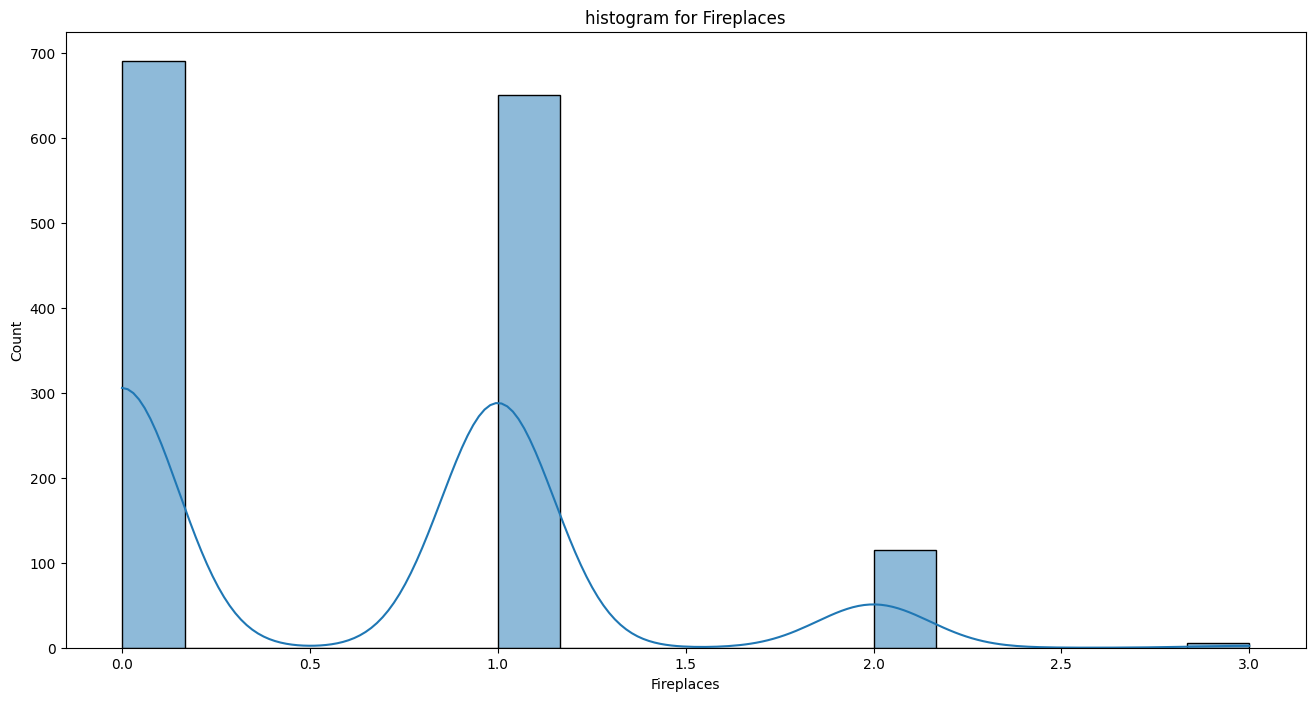

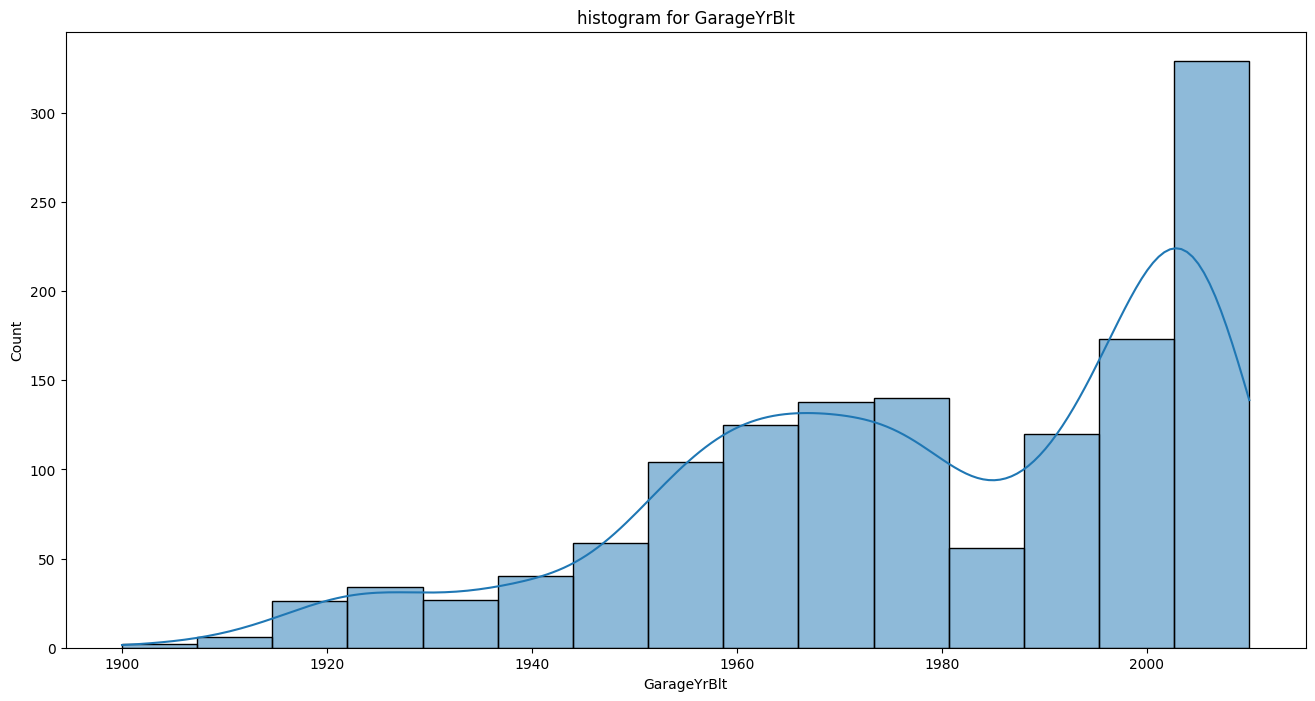

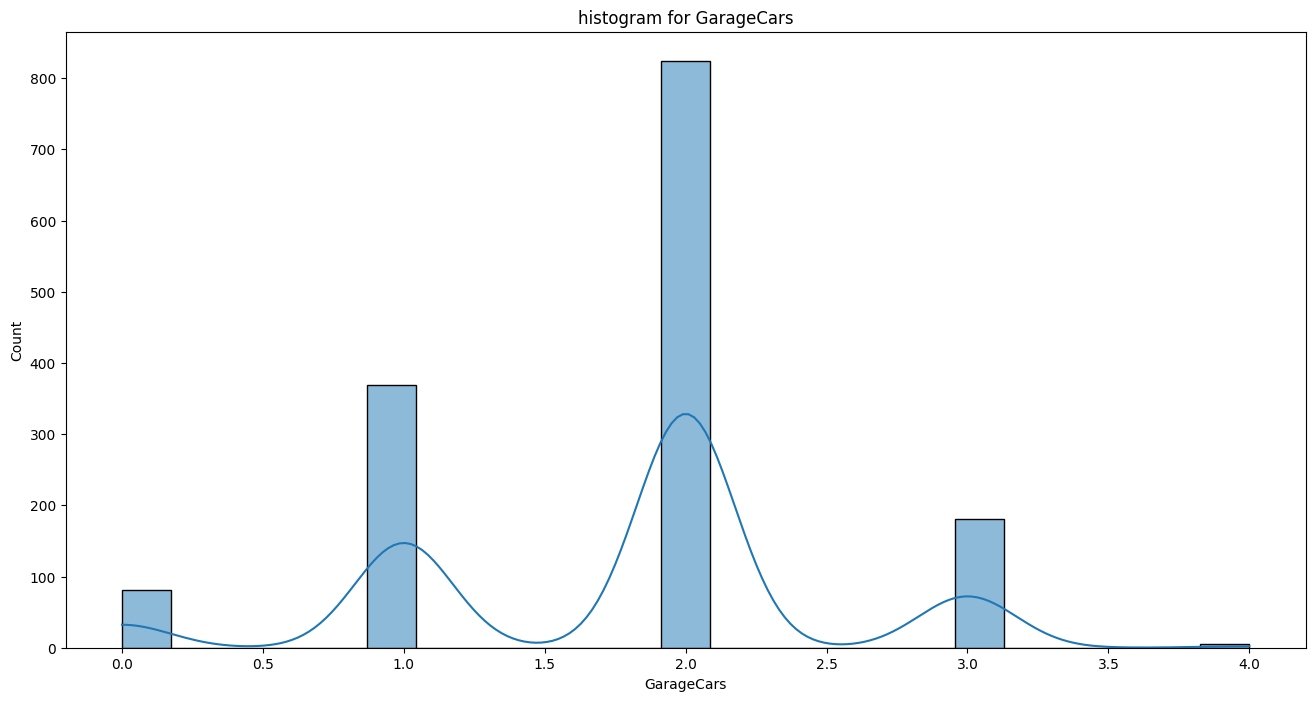

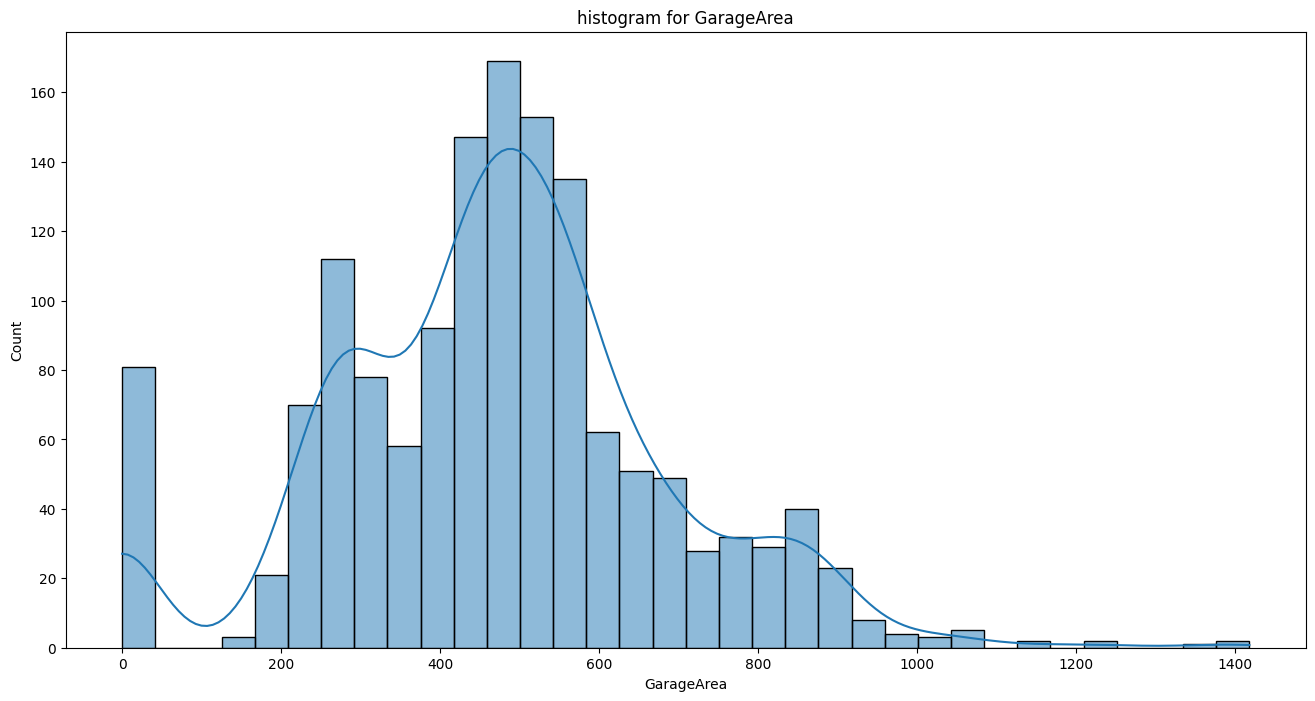

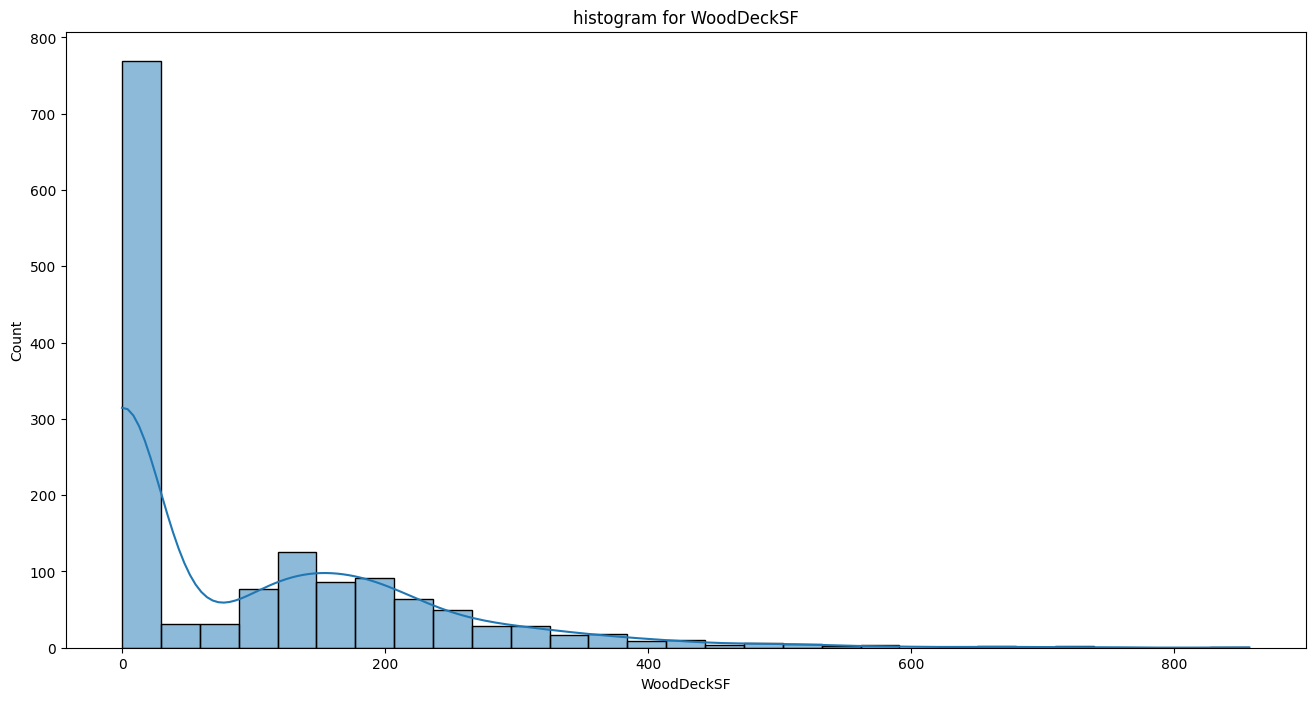

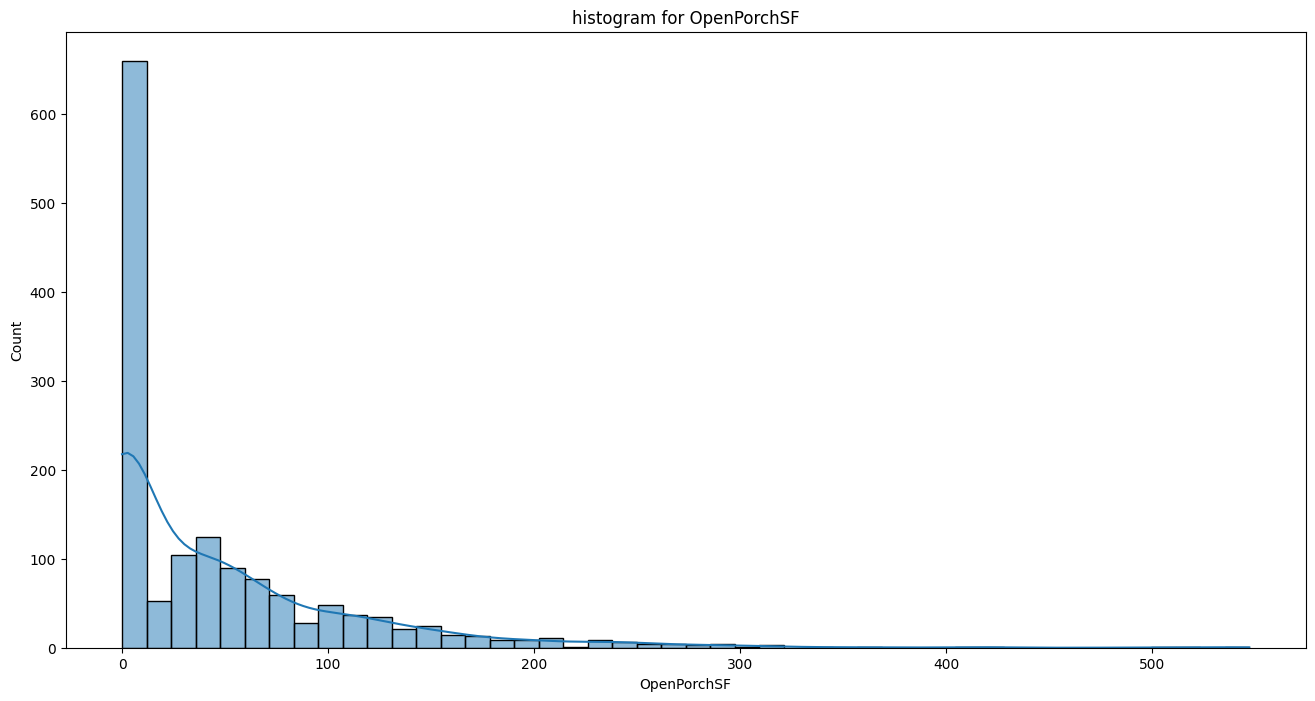

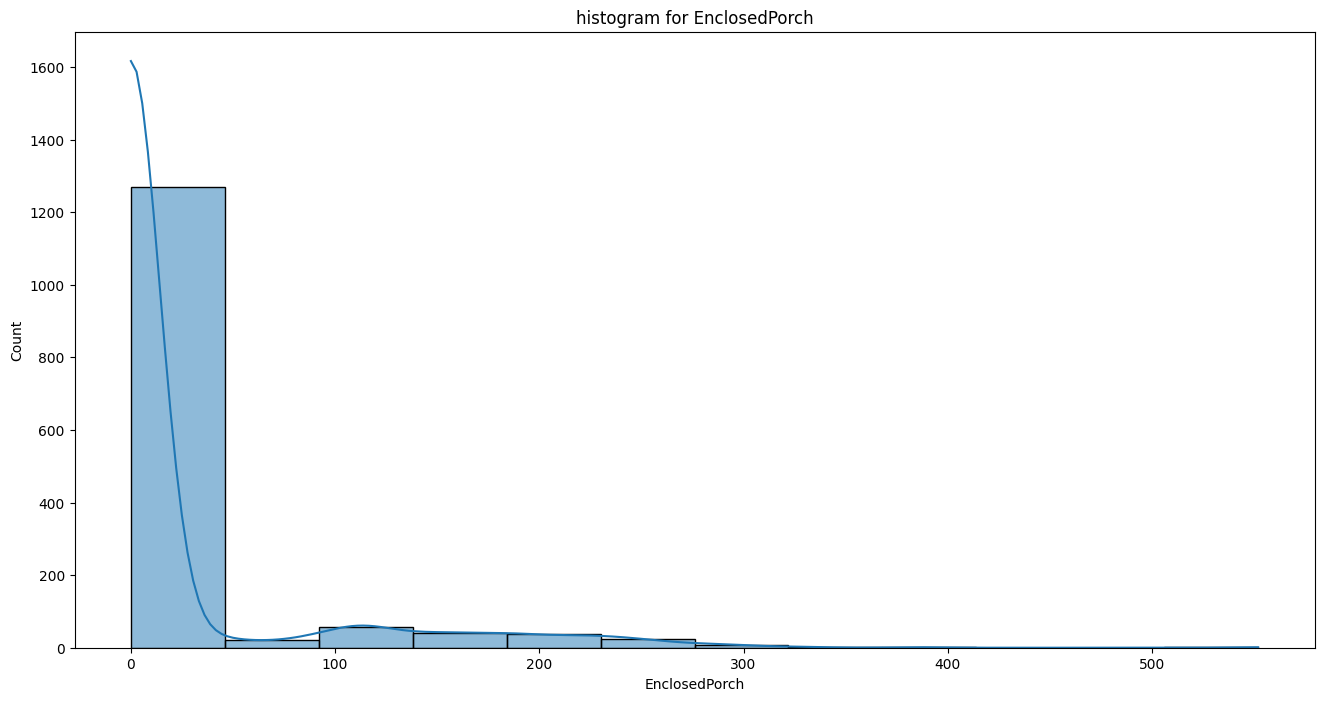

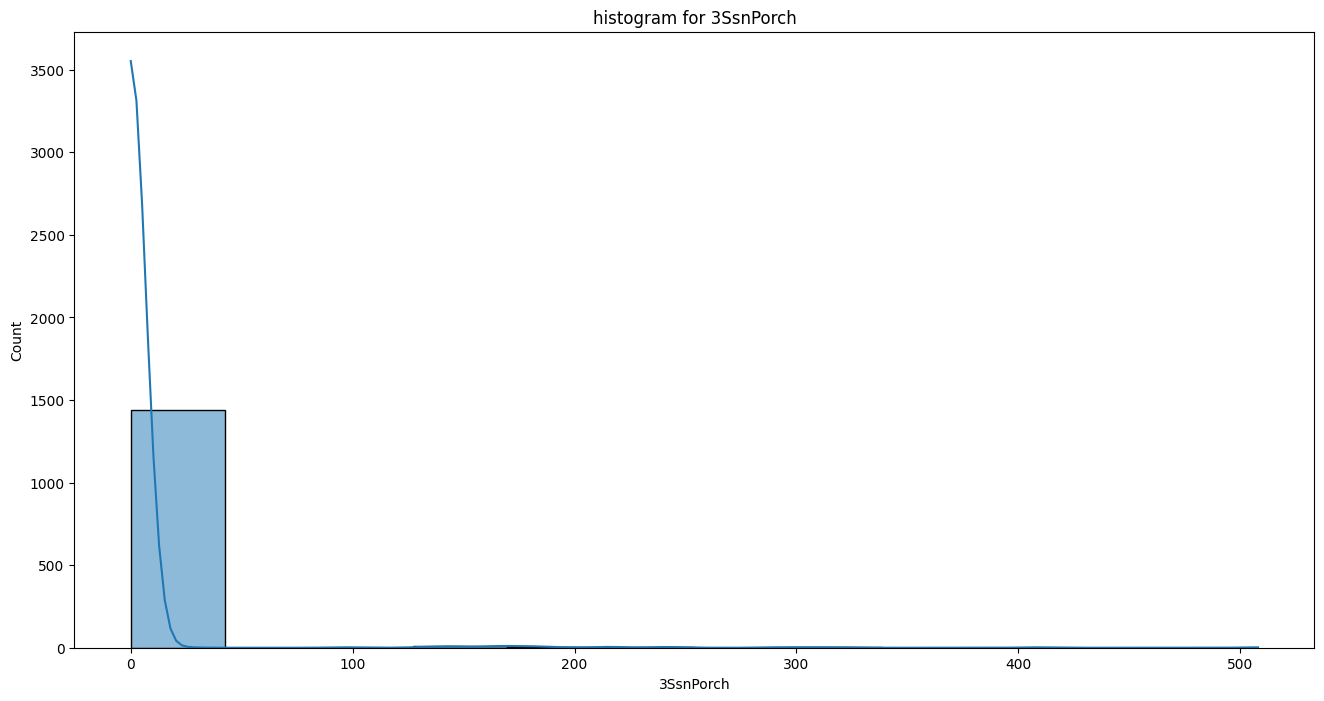

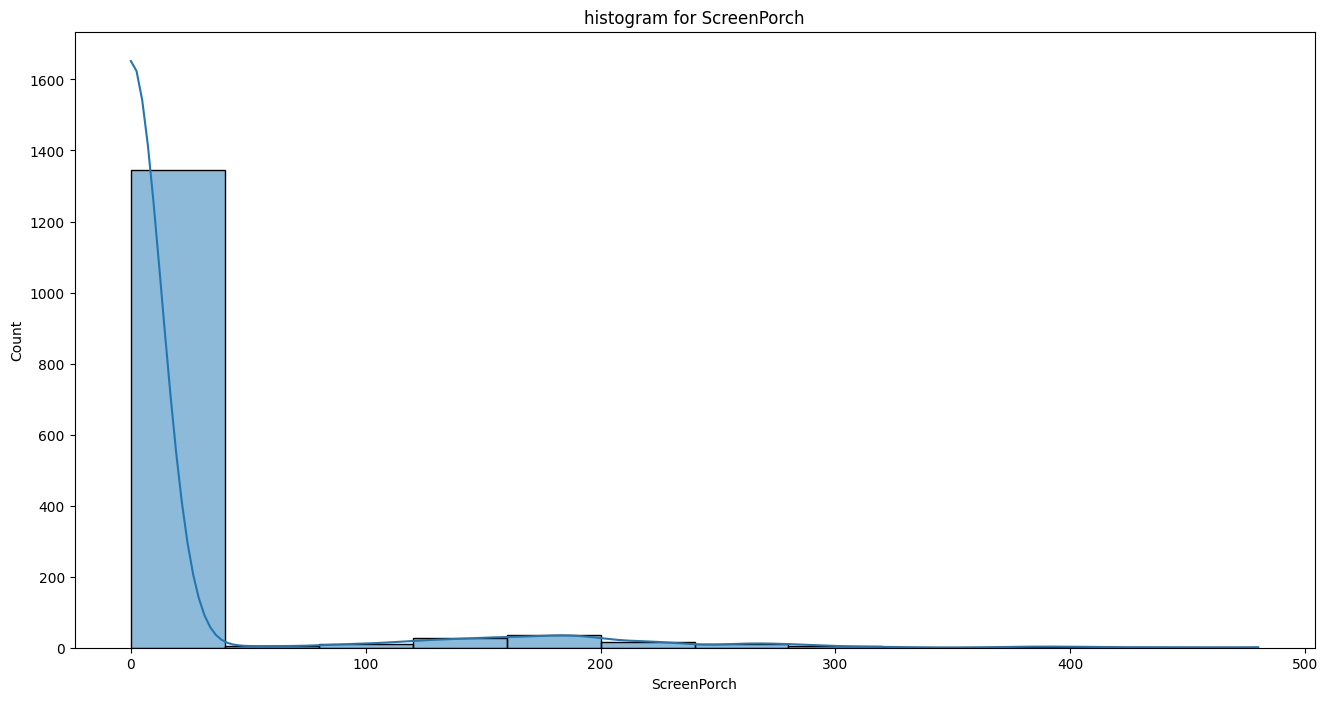

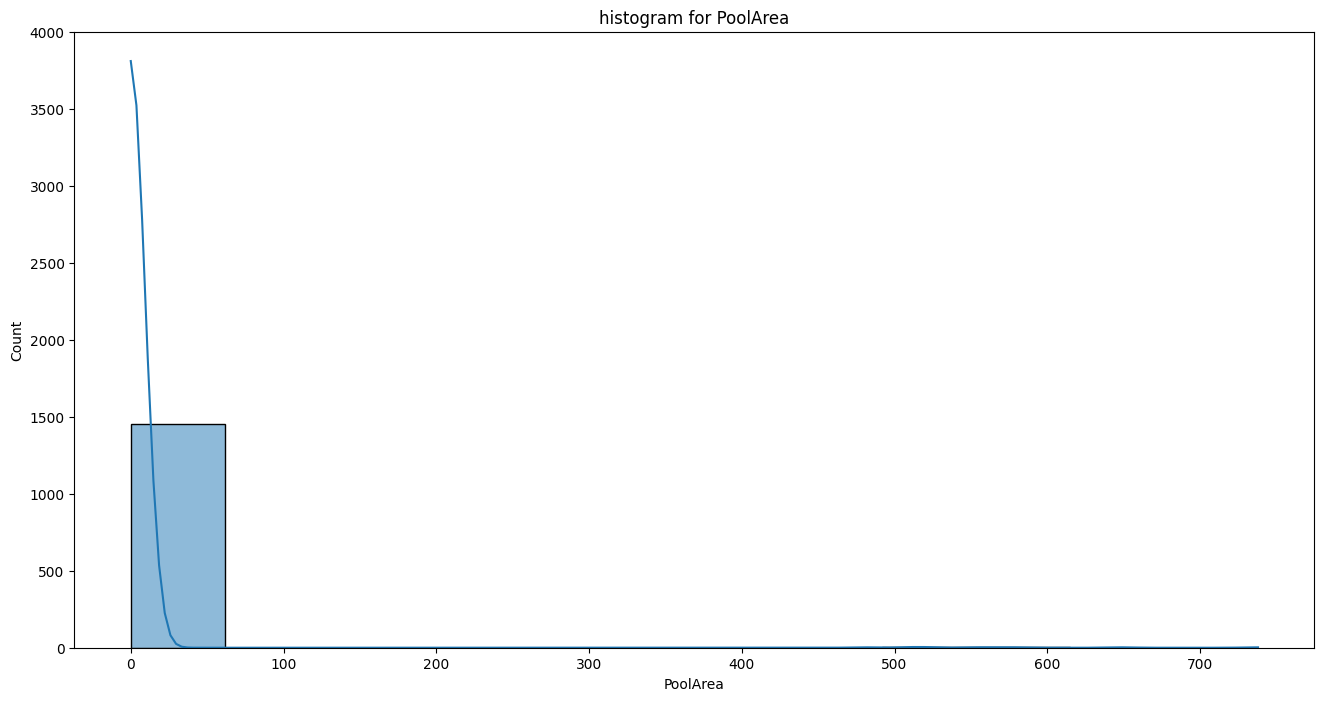

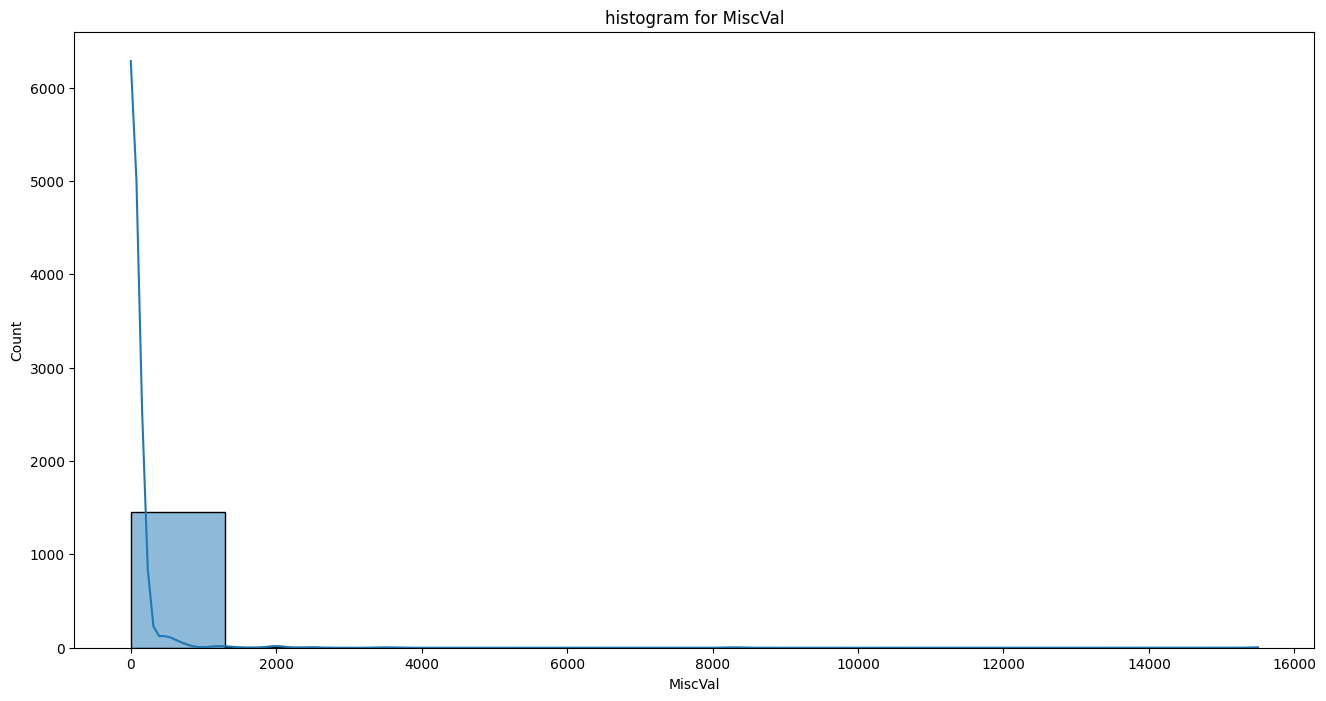

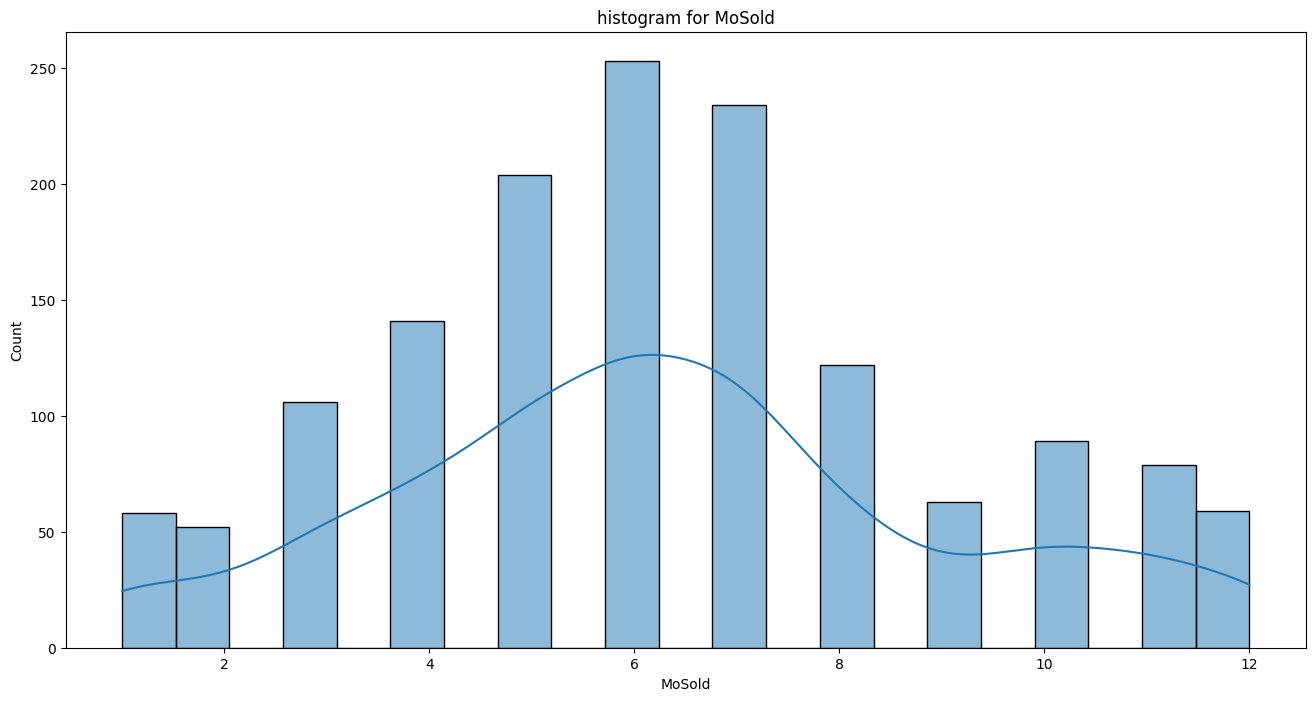

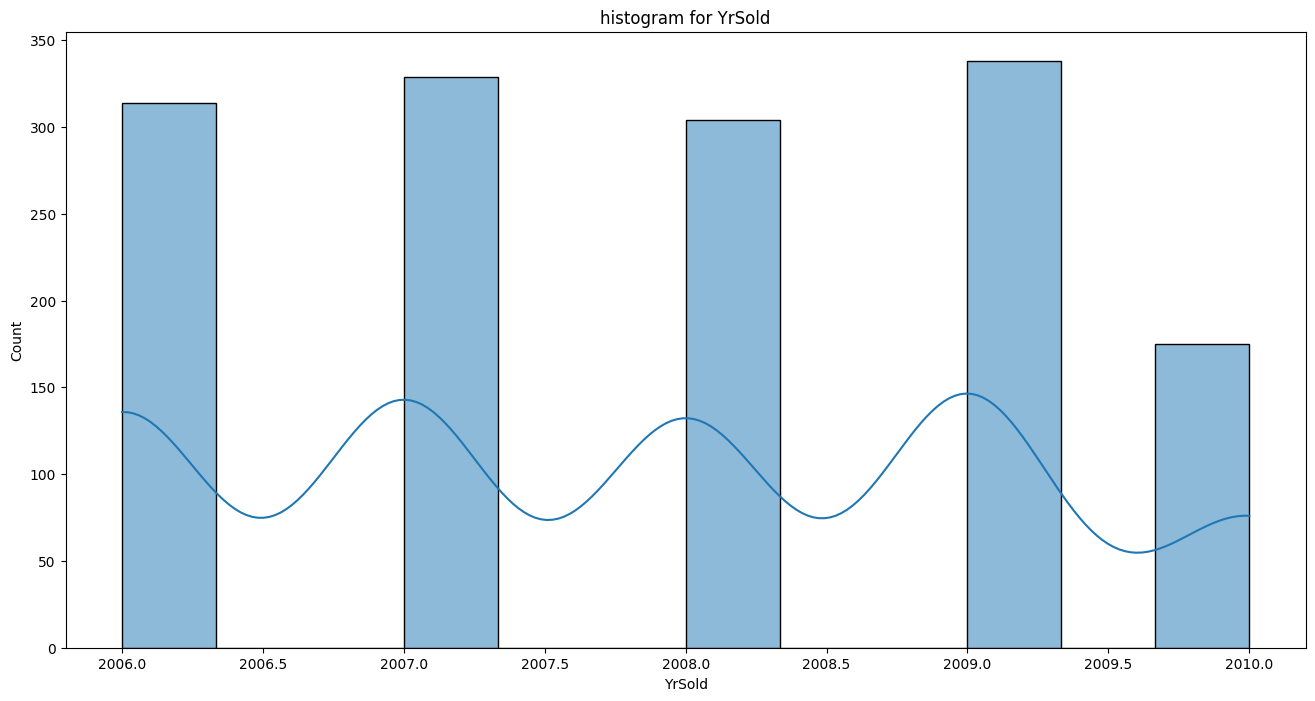

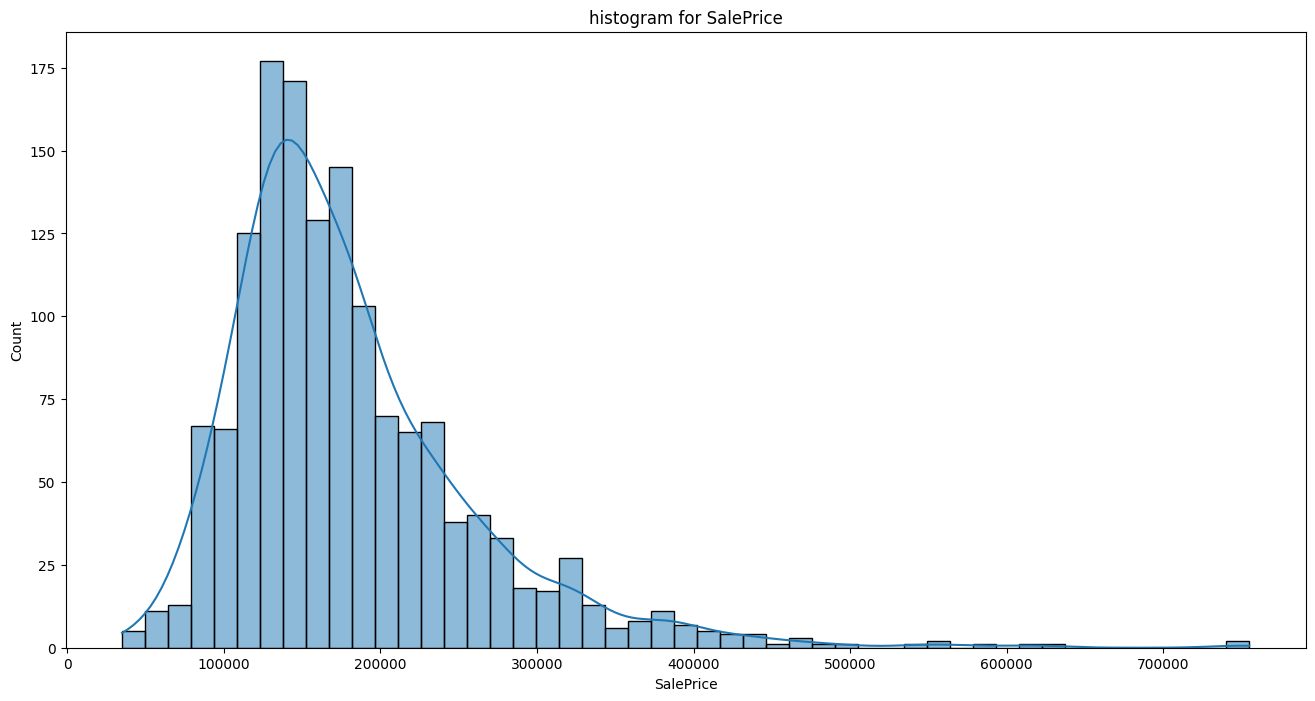

In [14]:
for i in con :
    plt.figure(figsize=(16,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'histogram for {i}')
    plt.show()

#### BIVARIATE ANALYSIS

##### SCATTEPLOT FOR CONTINOUS VS CONTINOUS FEATURES

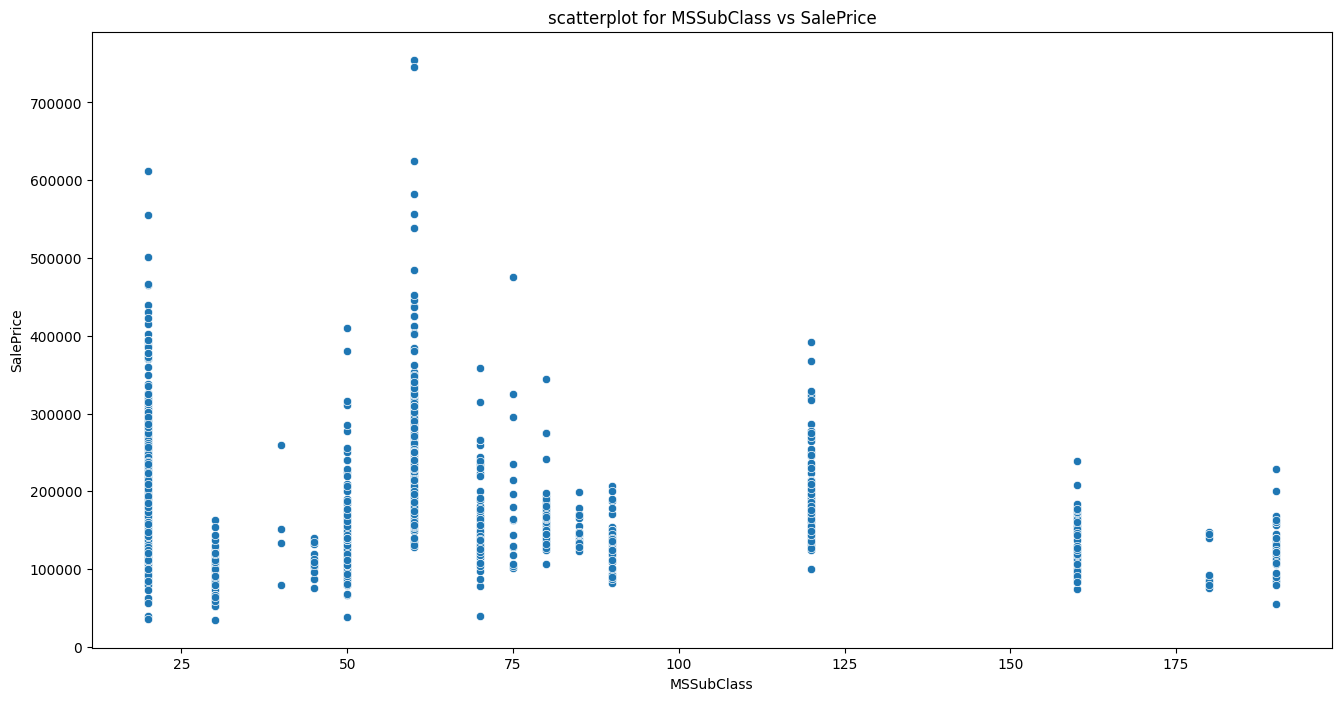

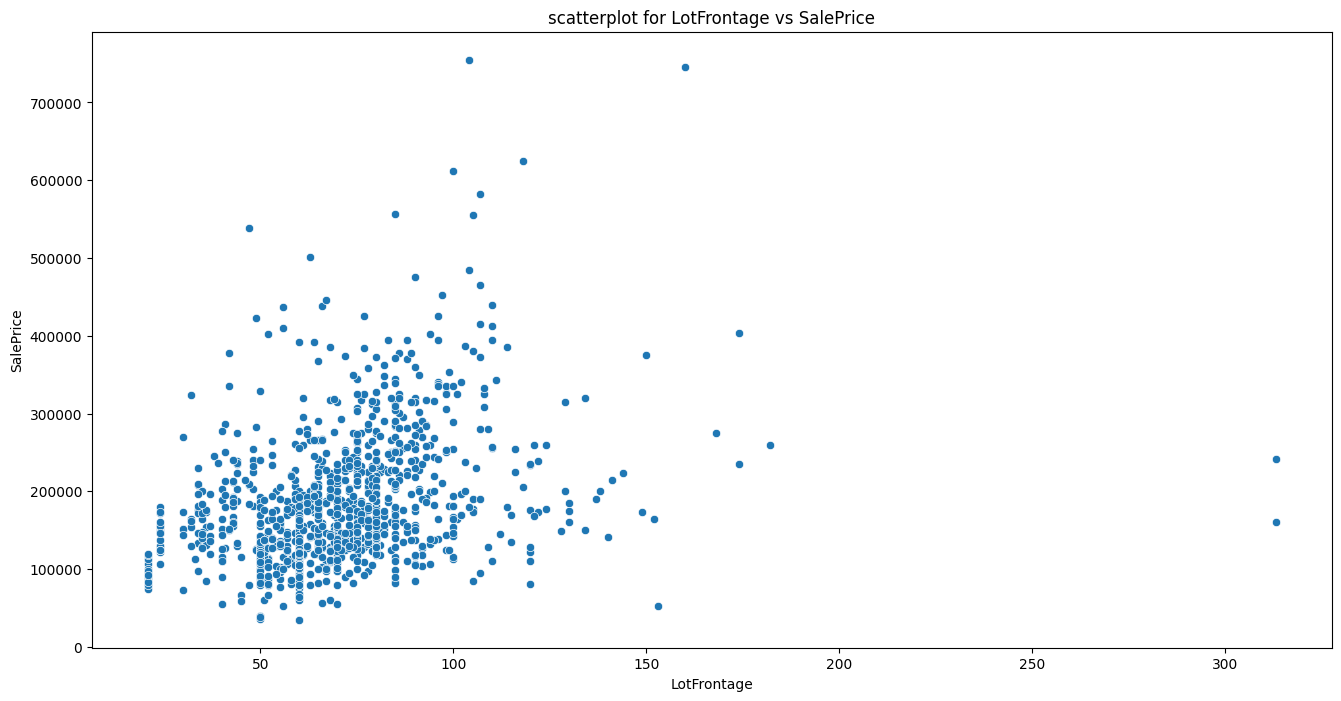

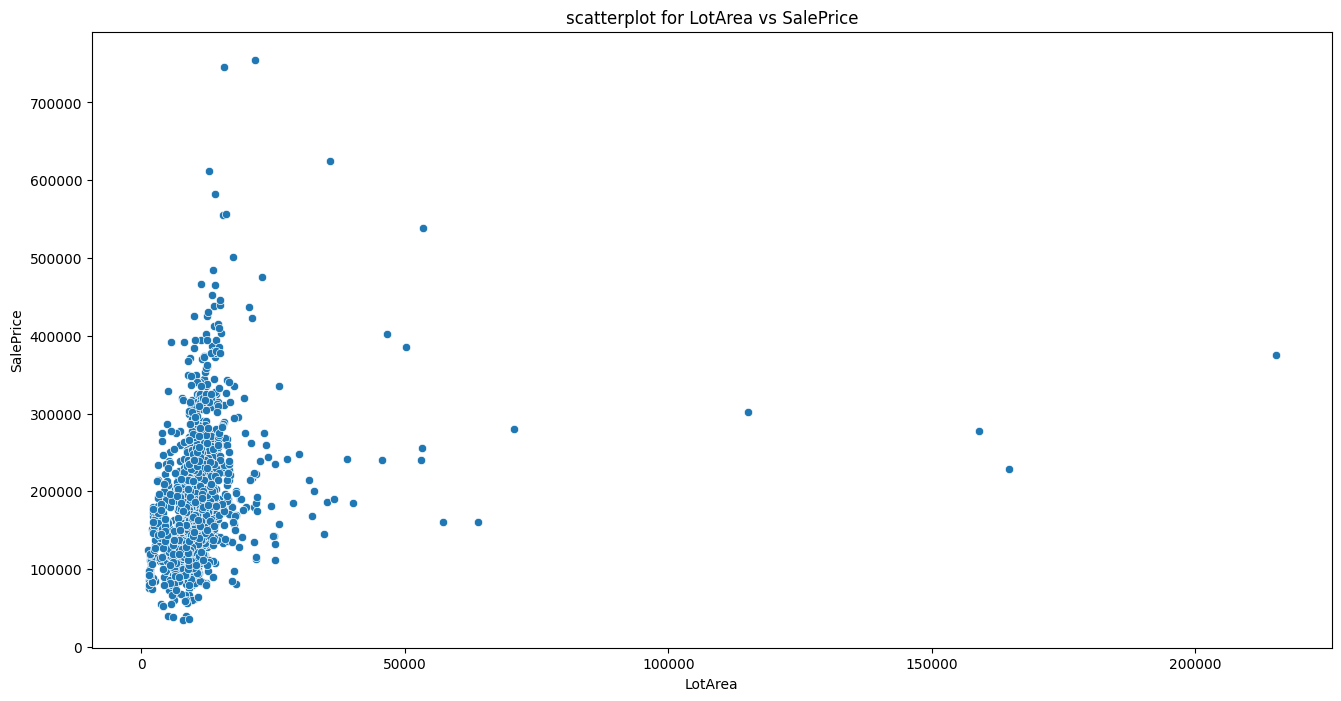

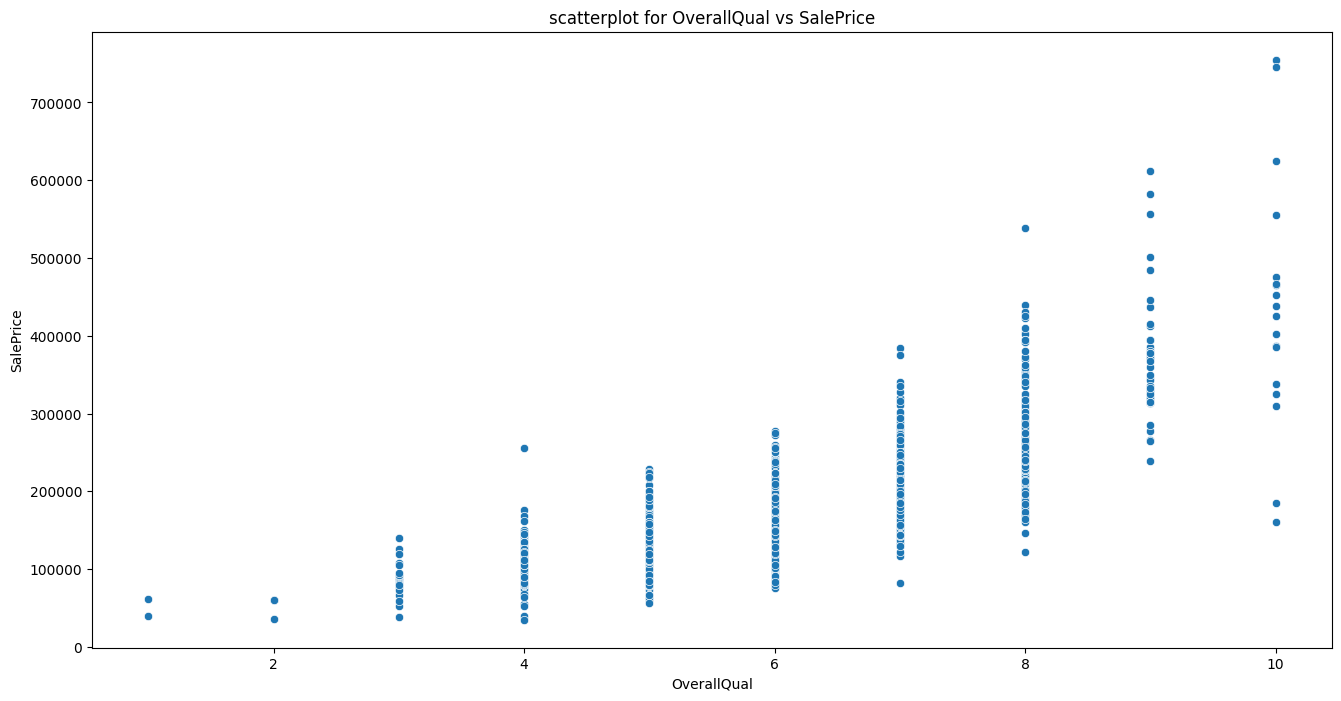

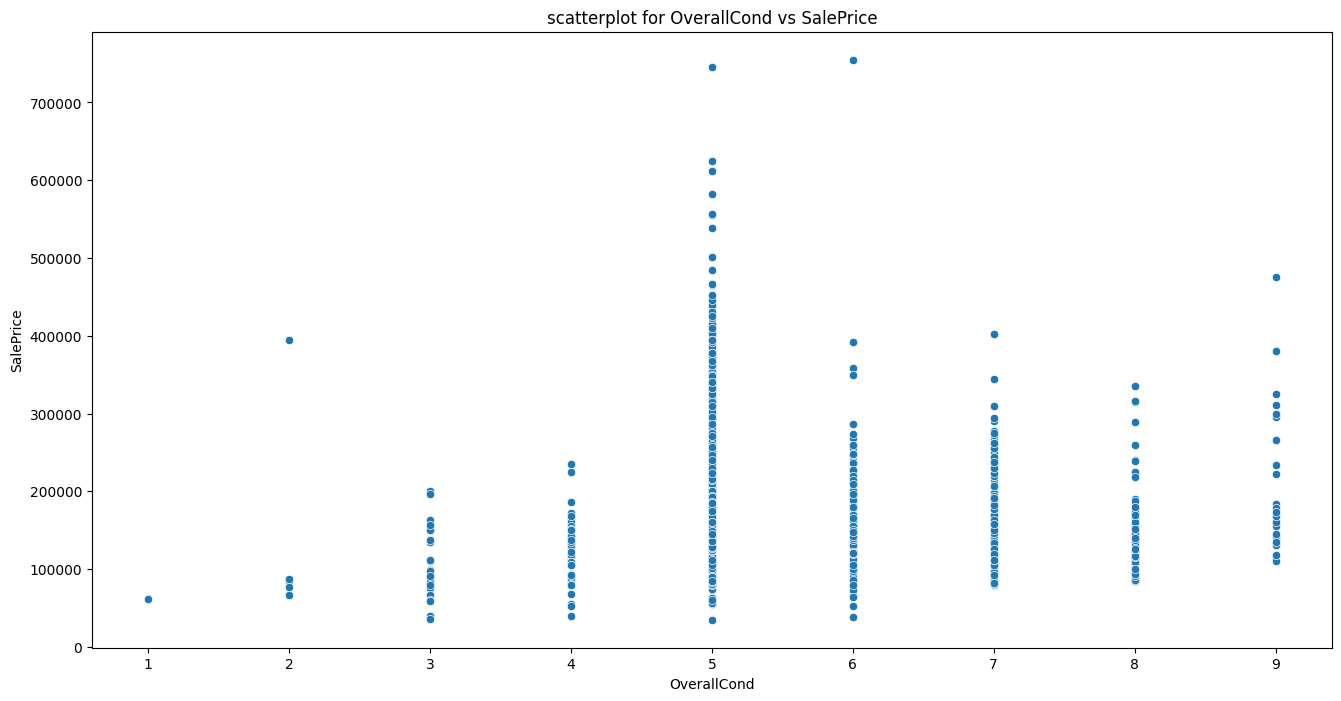

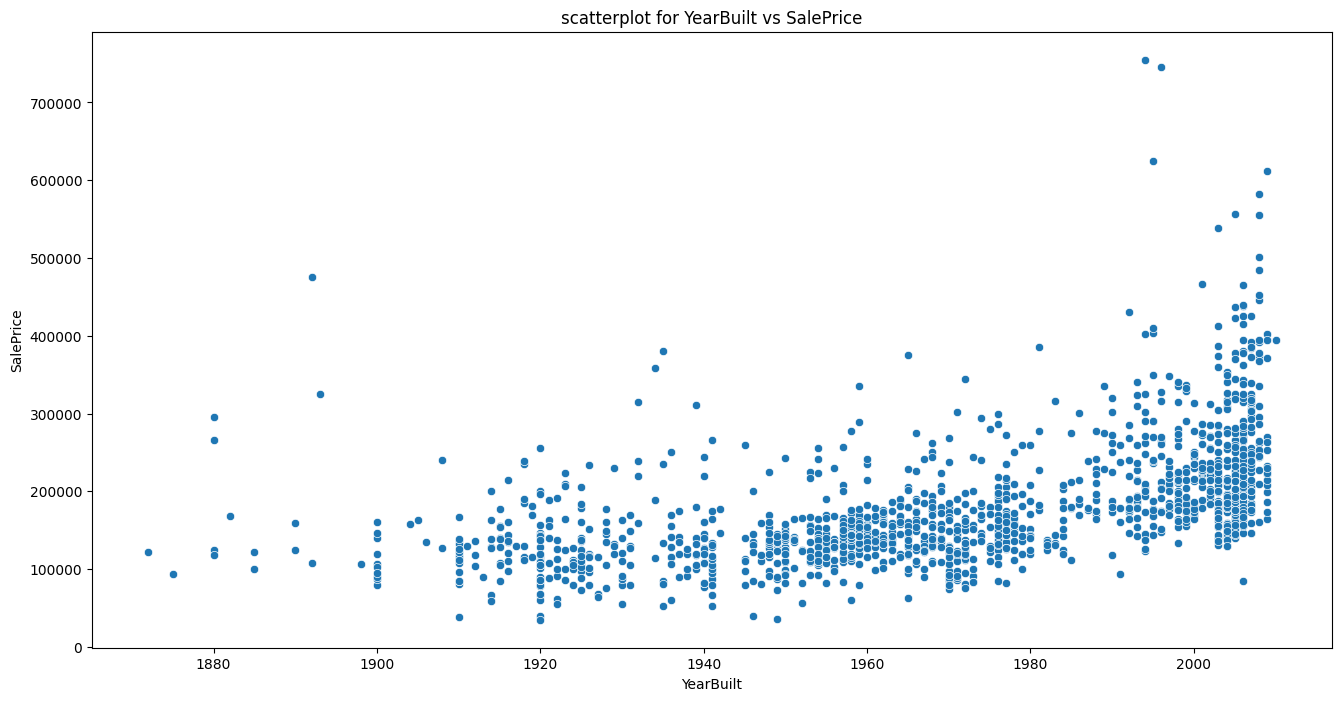

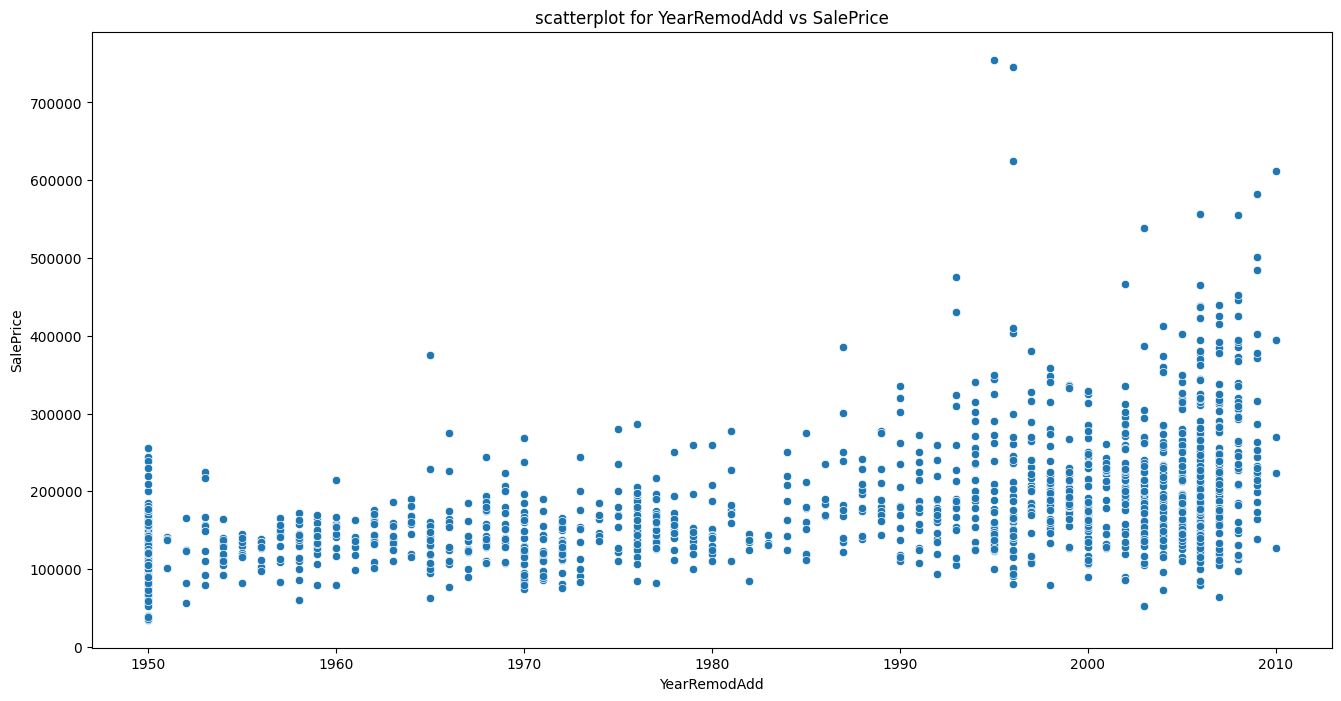

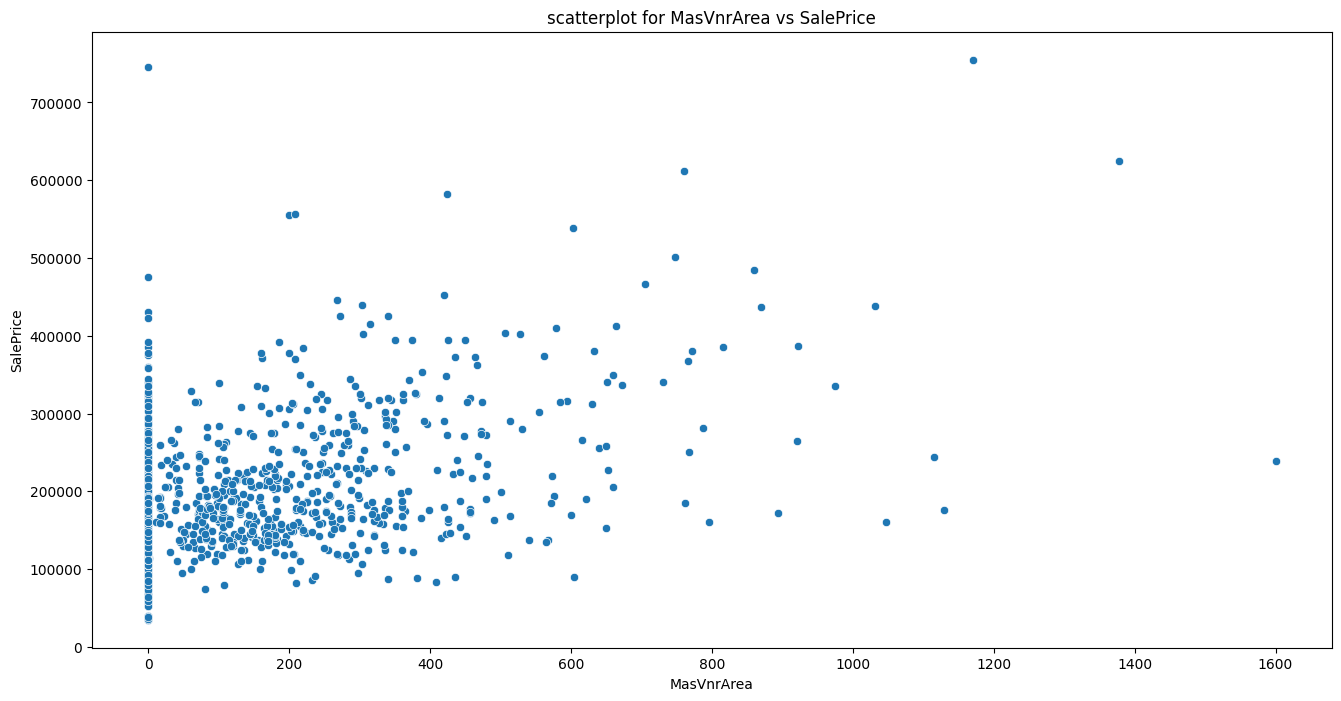

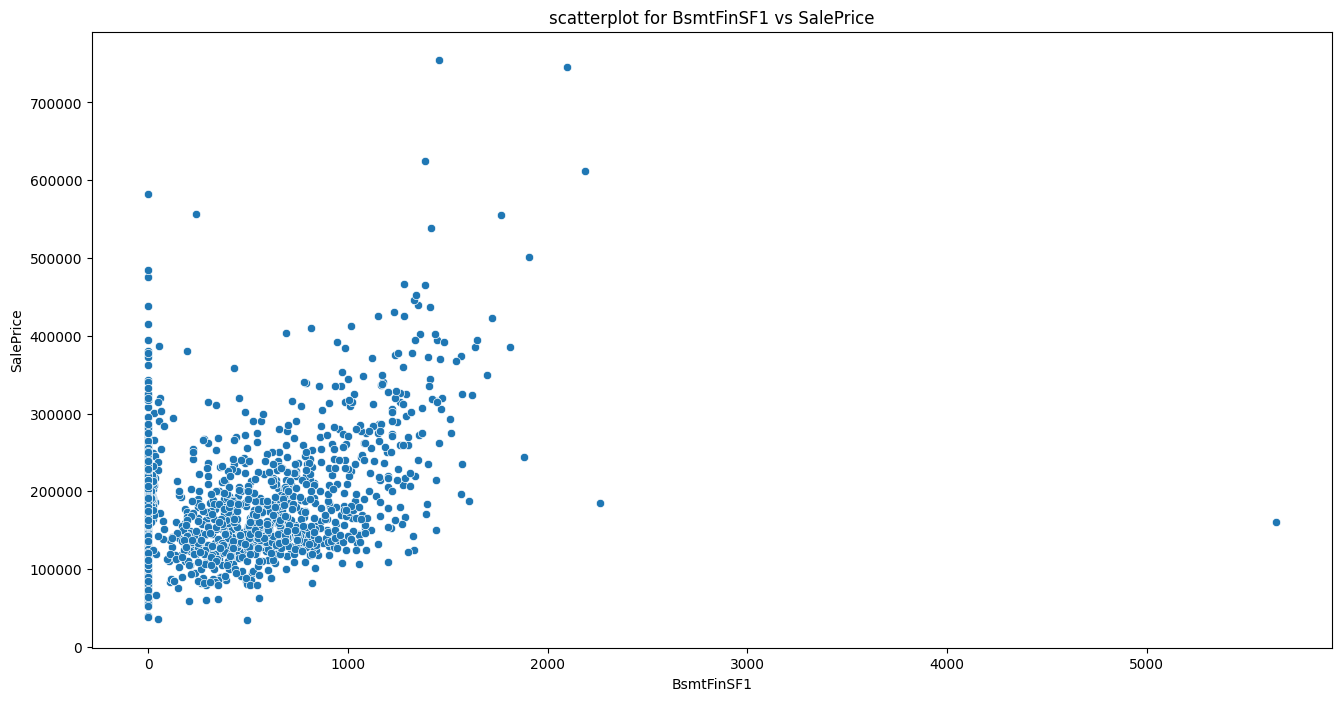

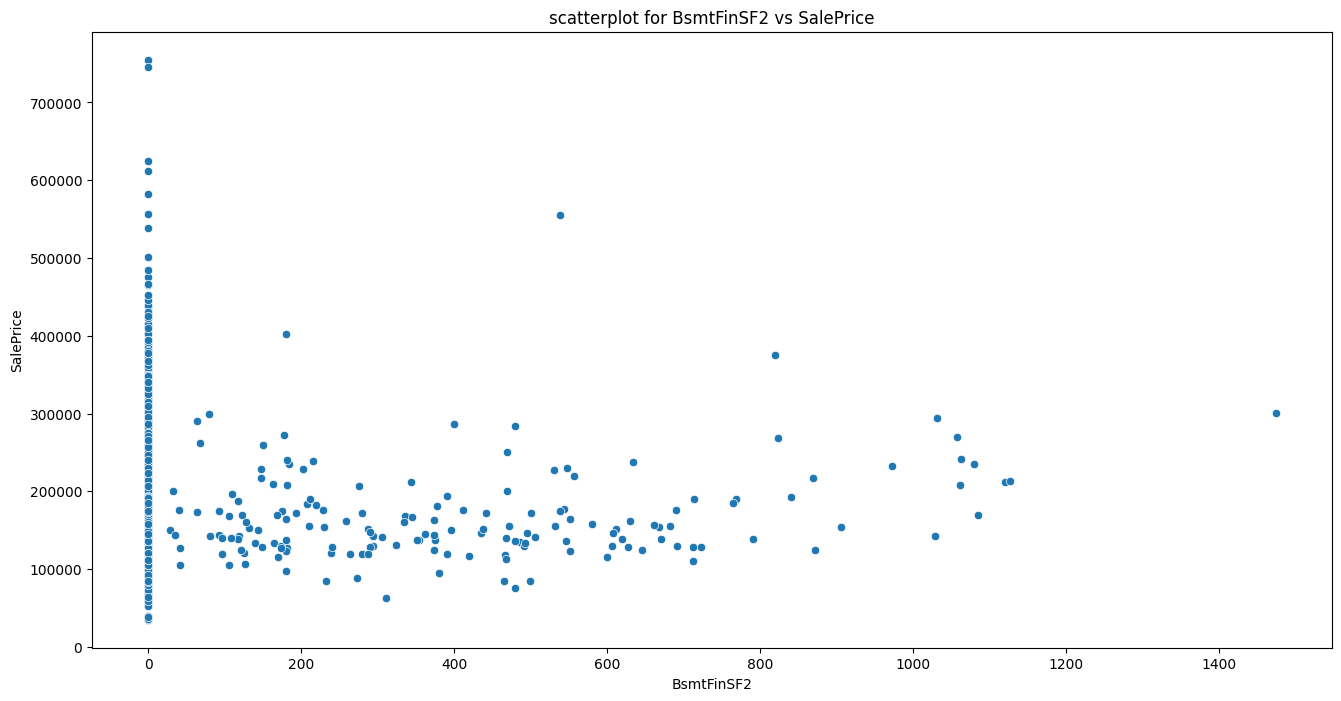

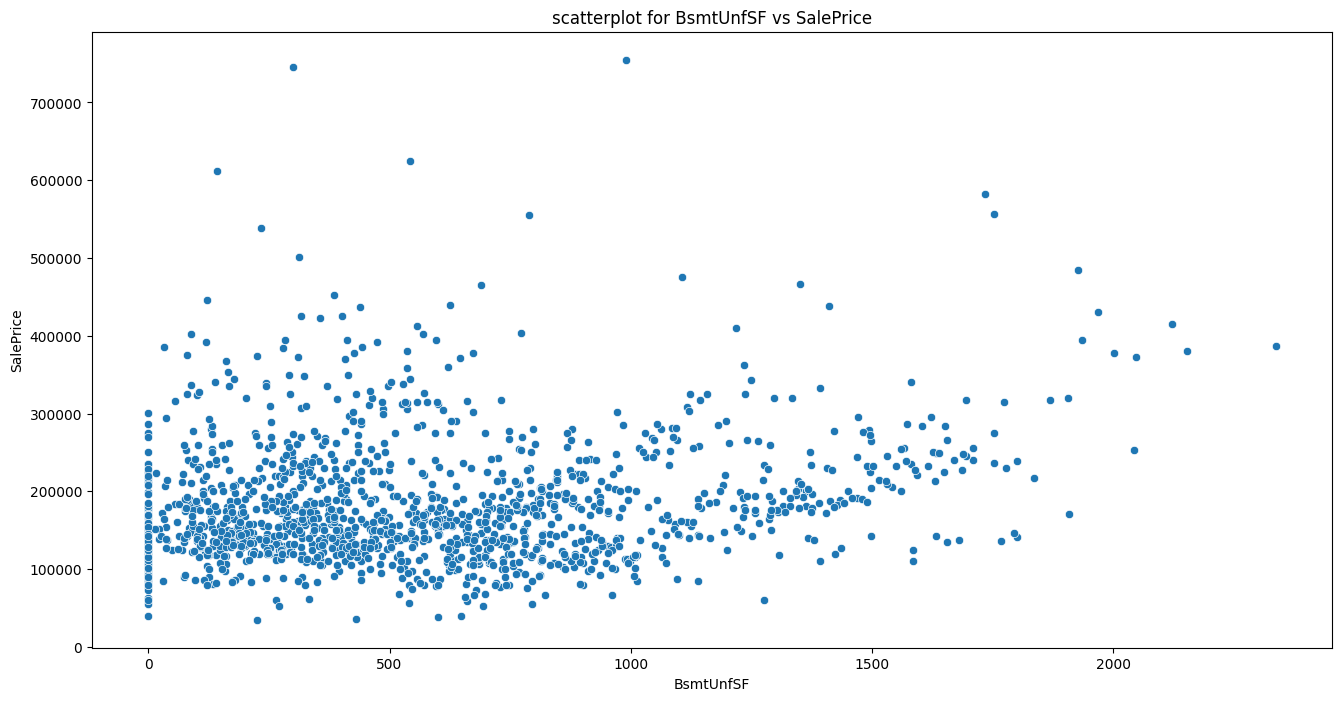

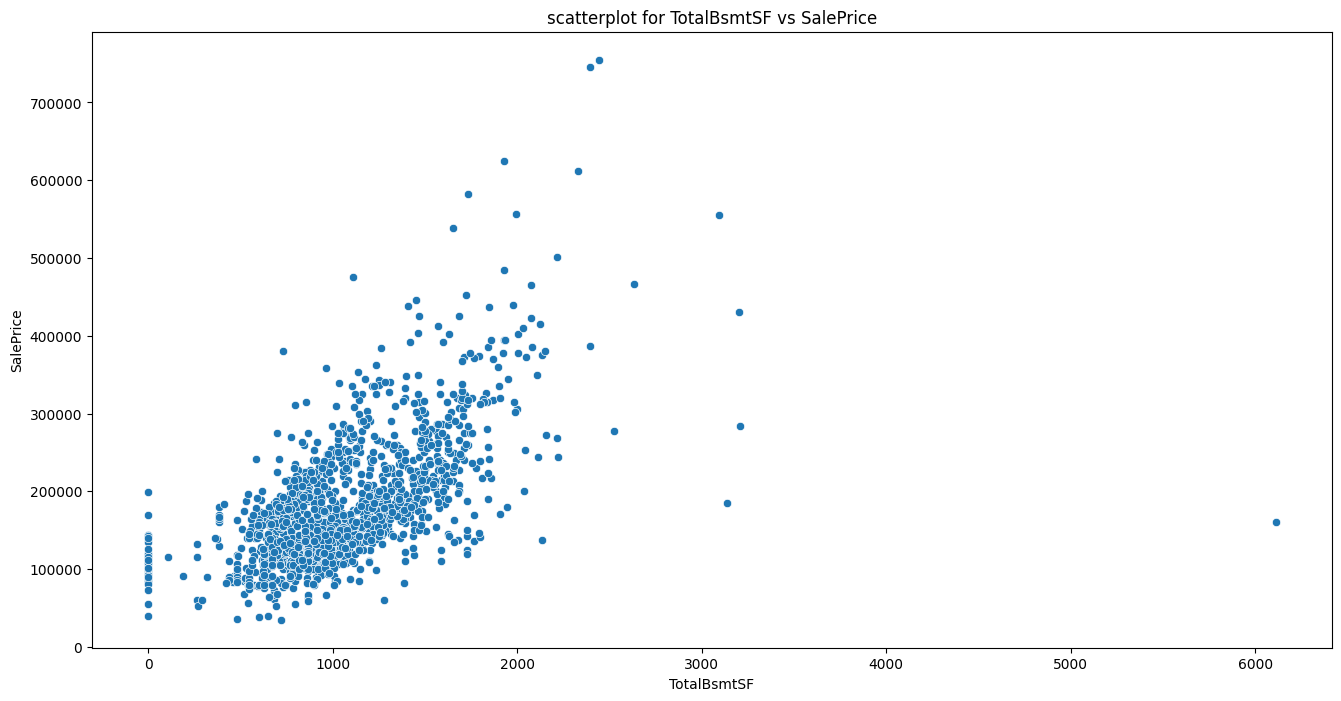

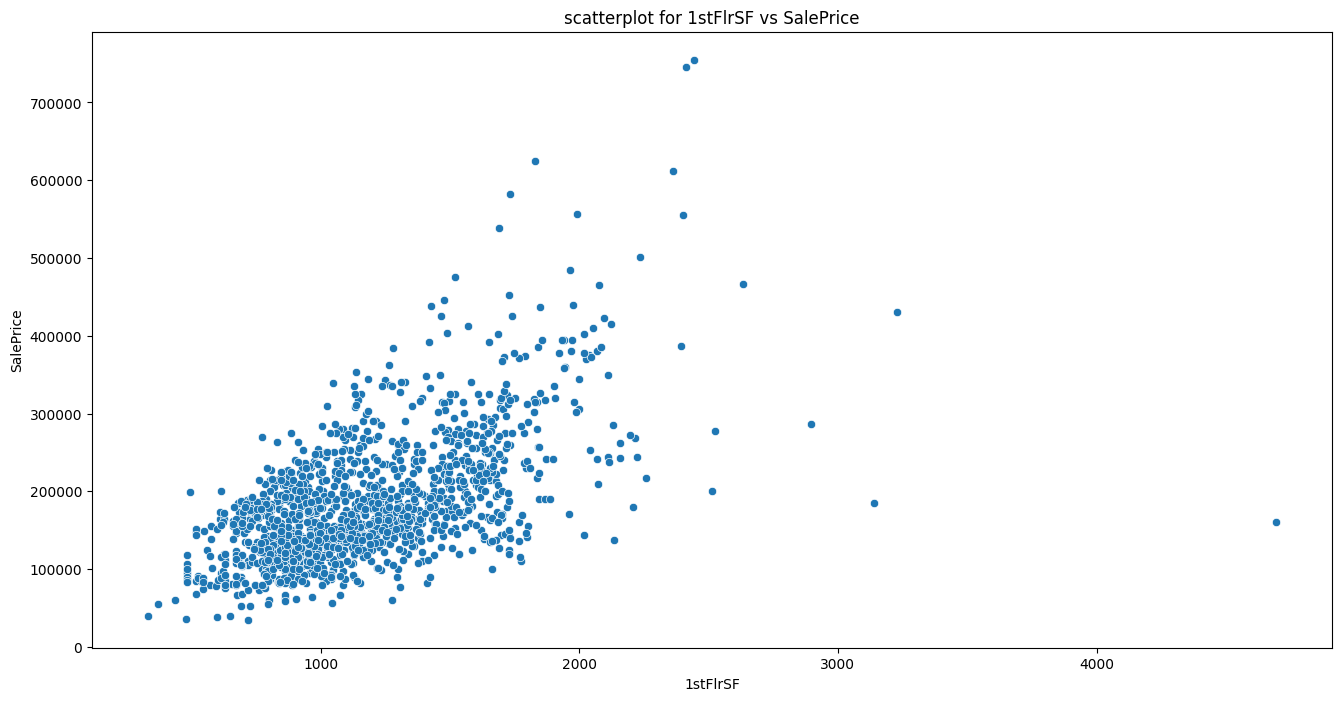

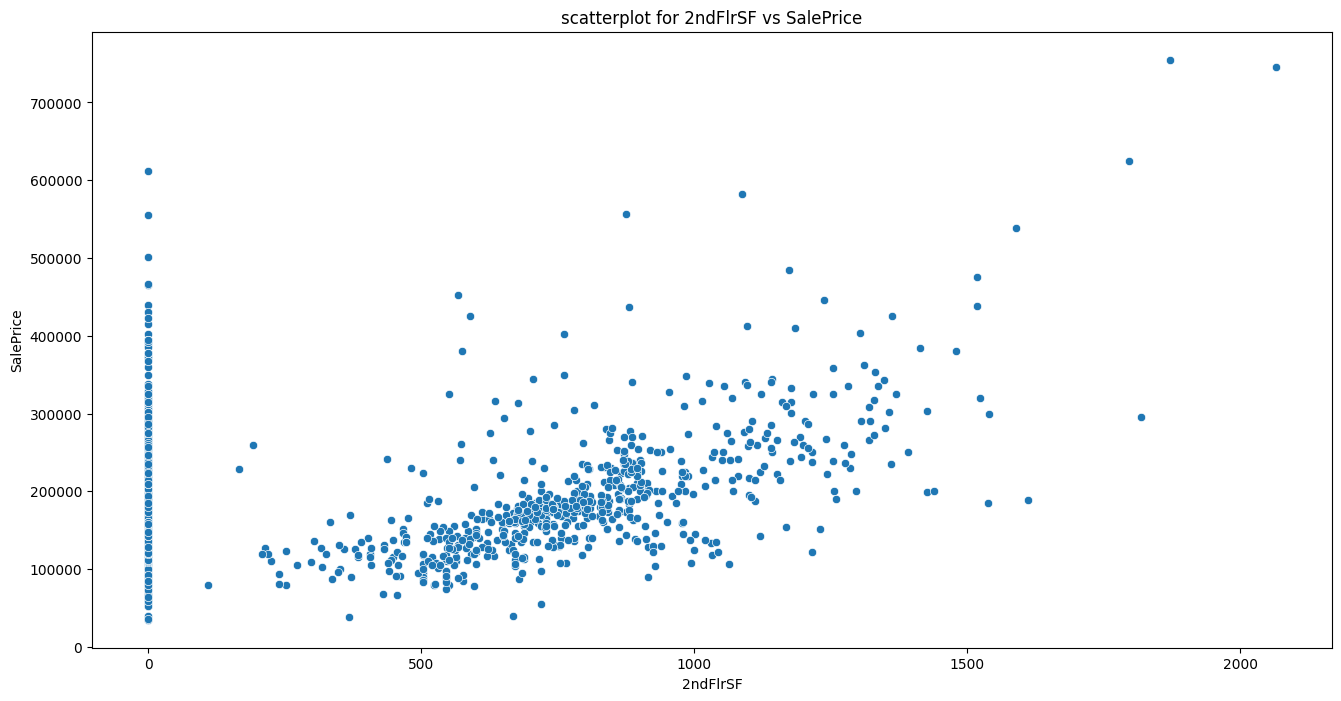

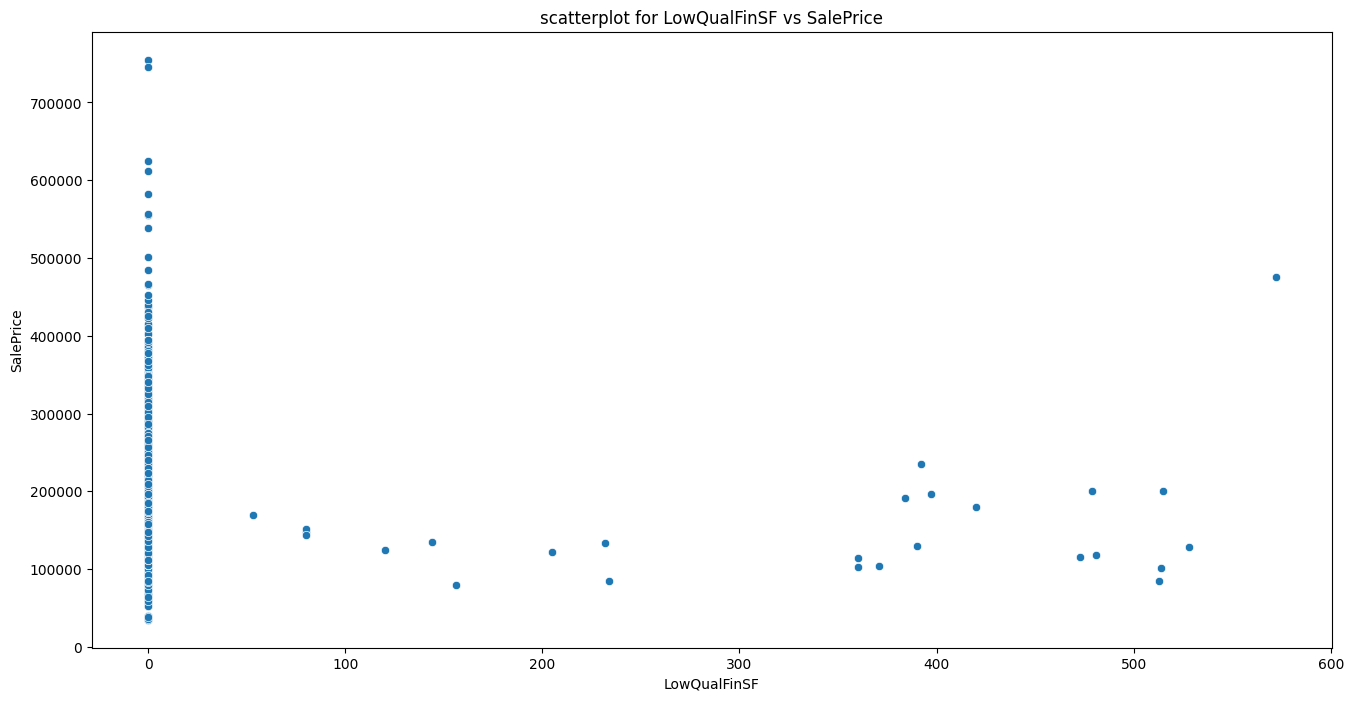

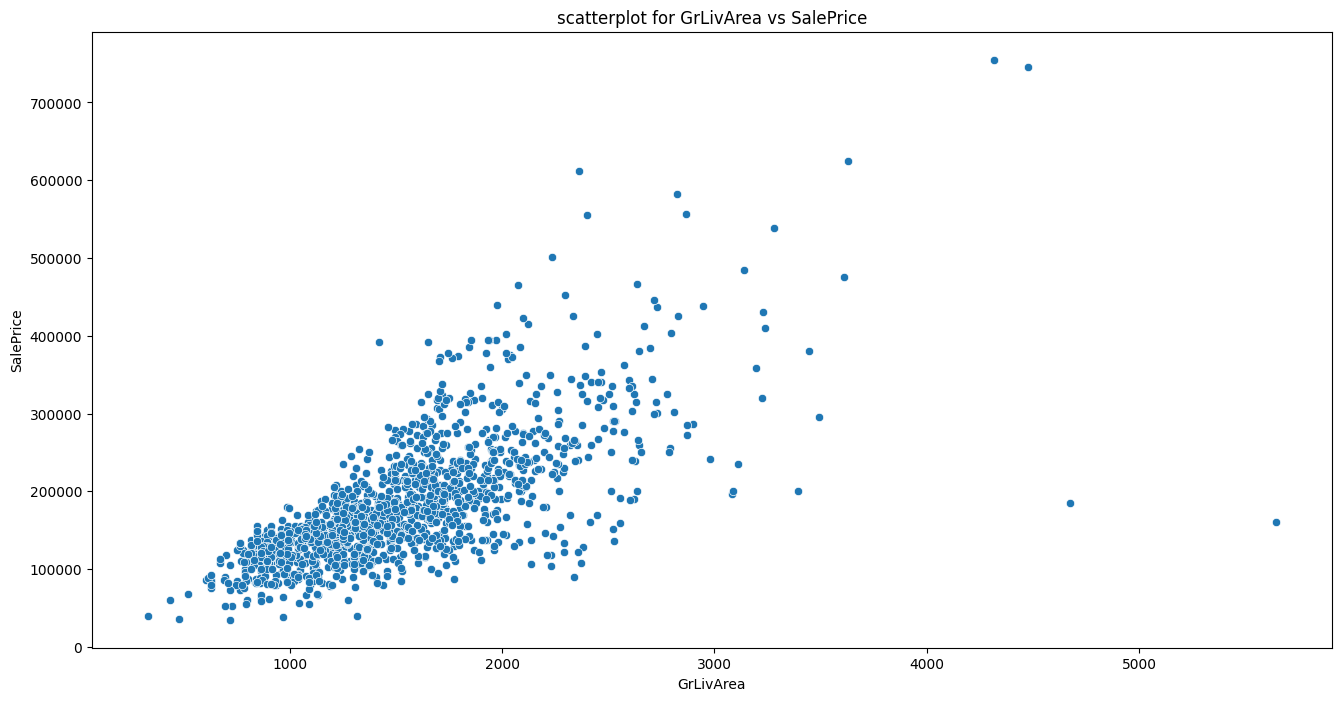

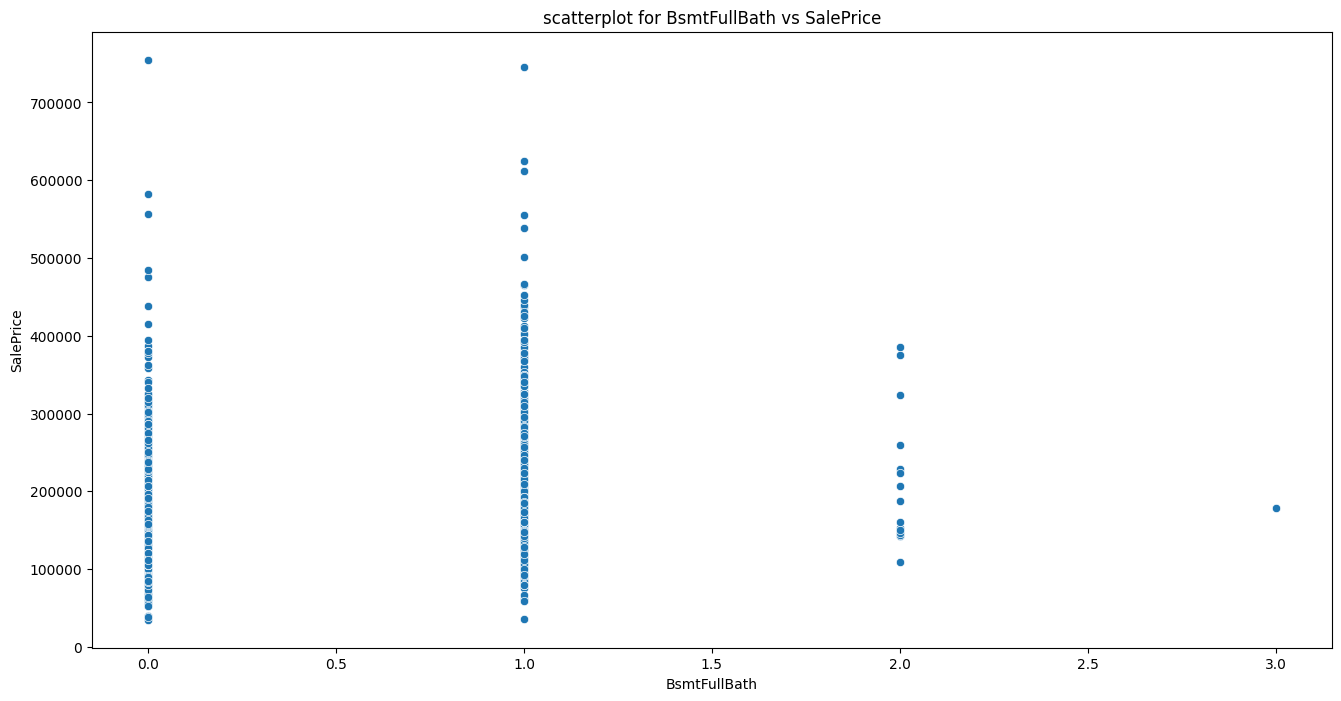

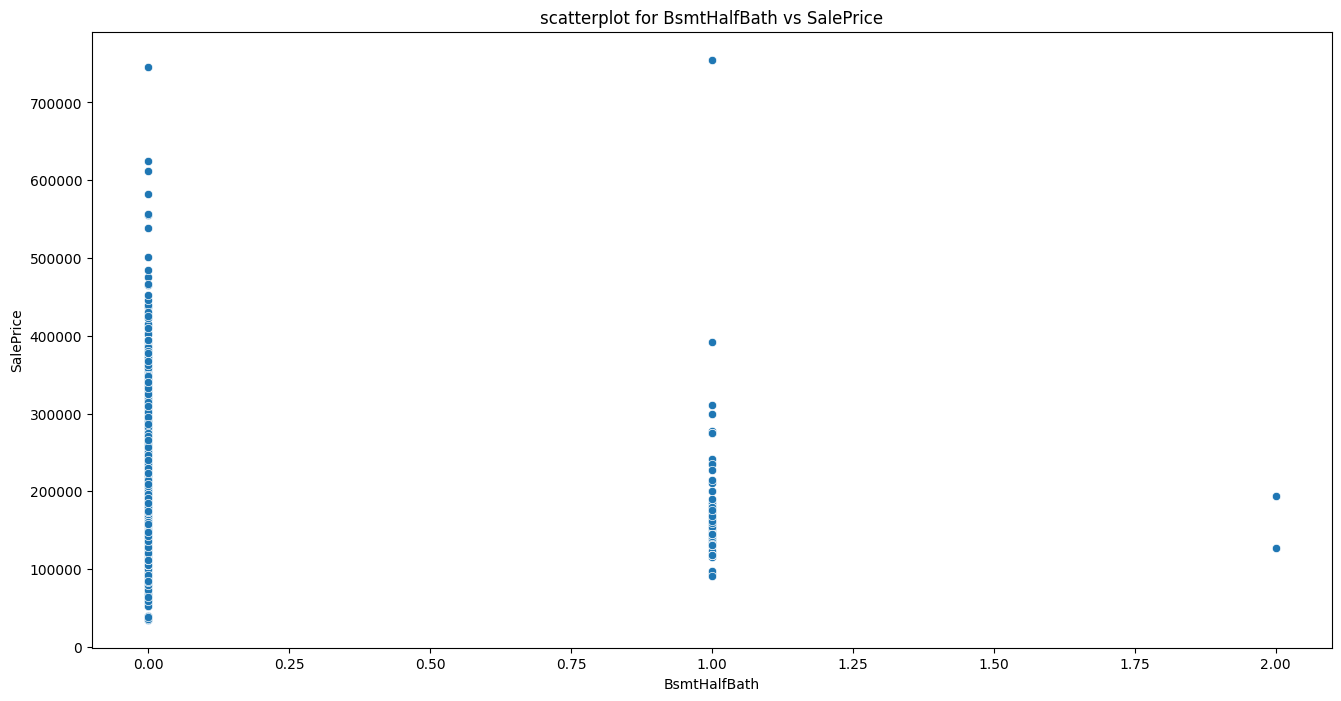

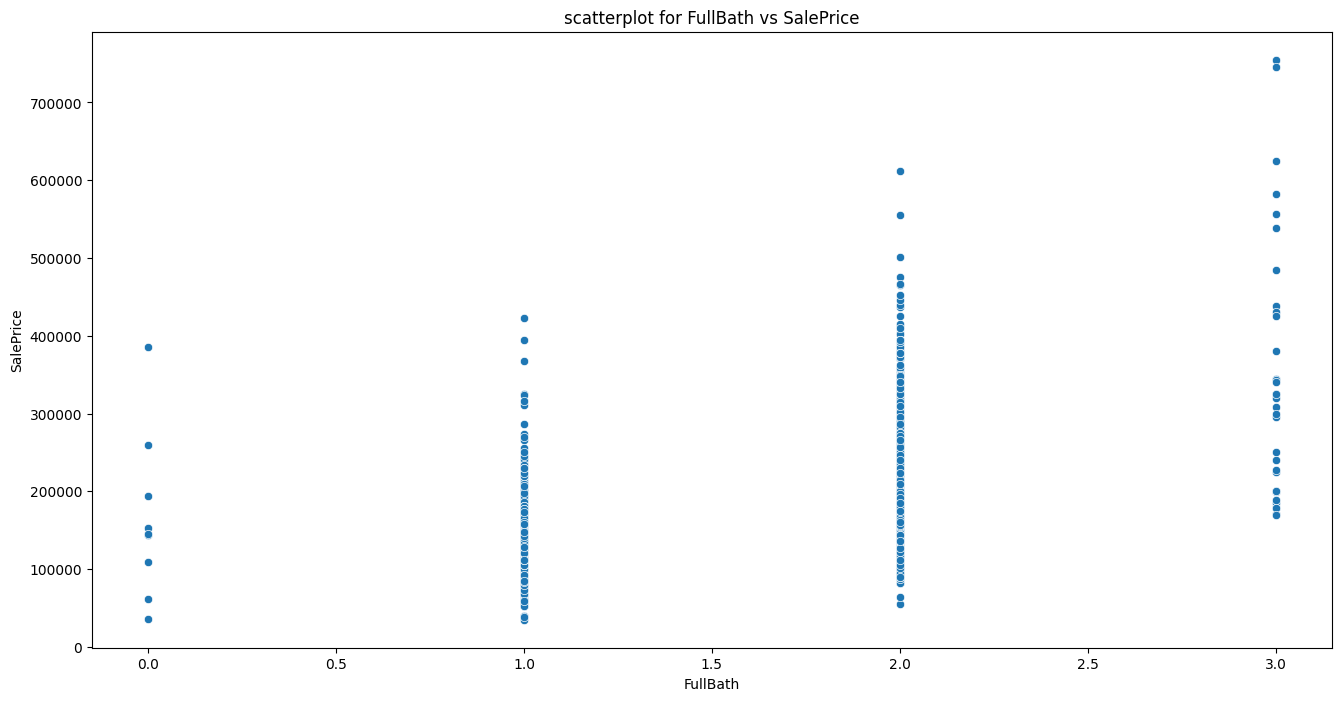

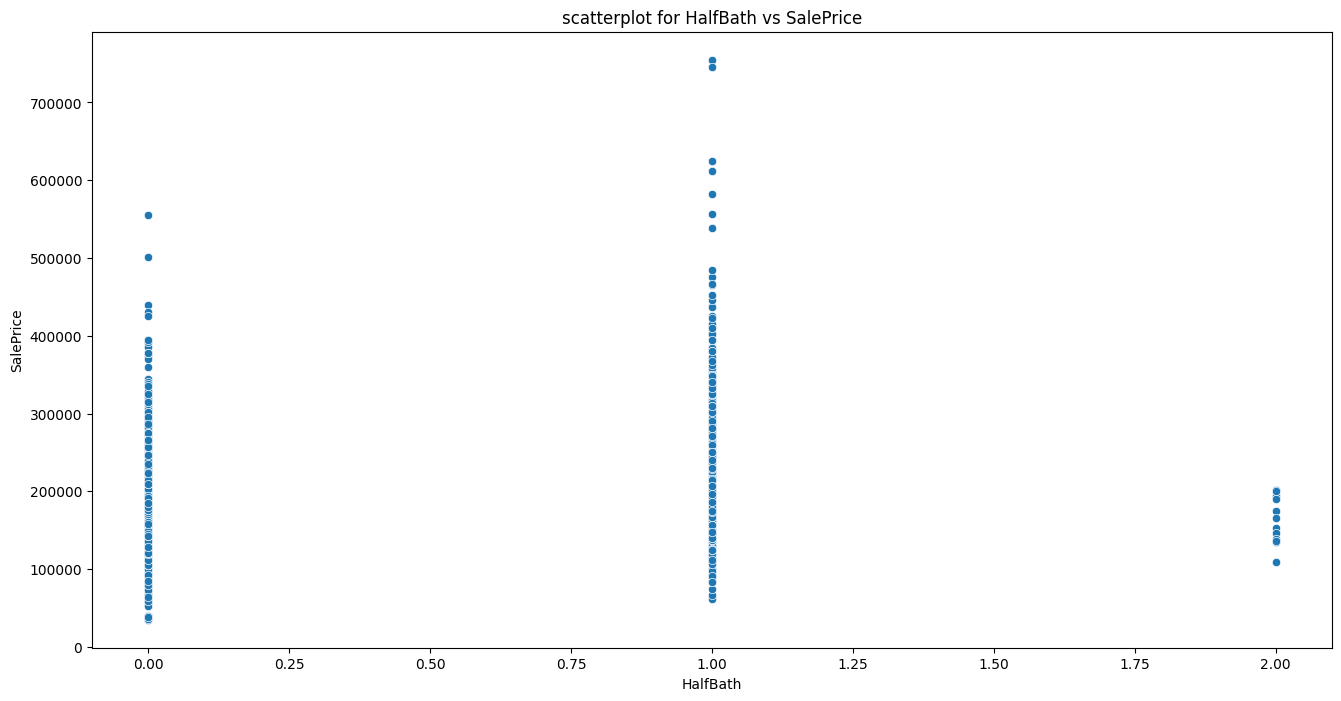

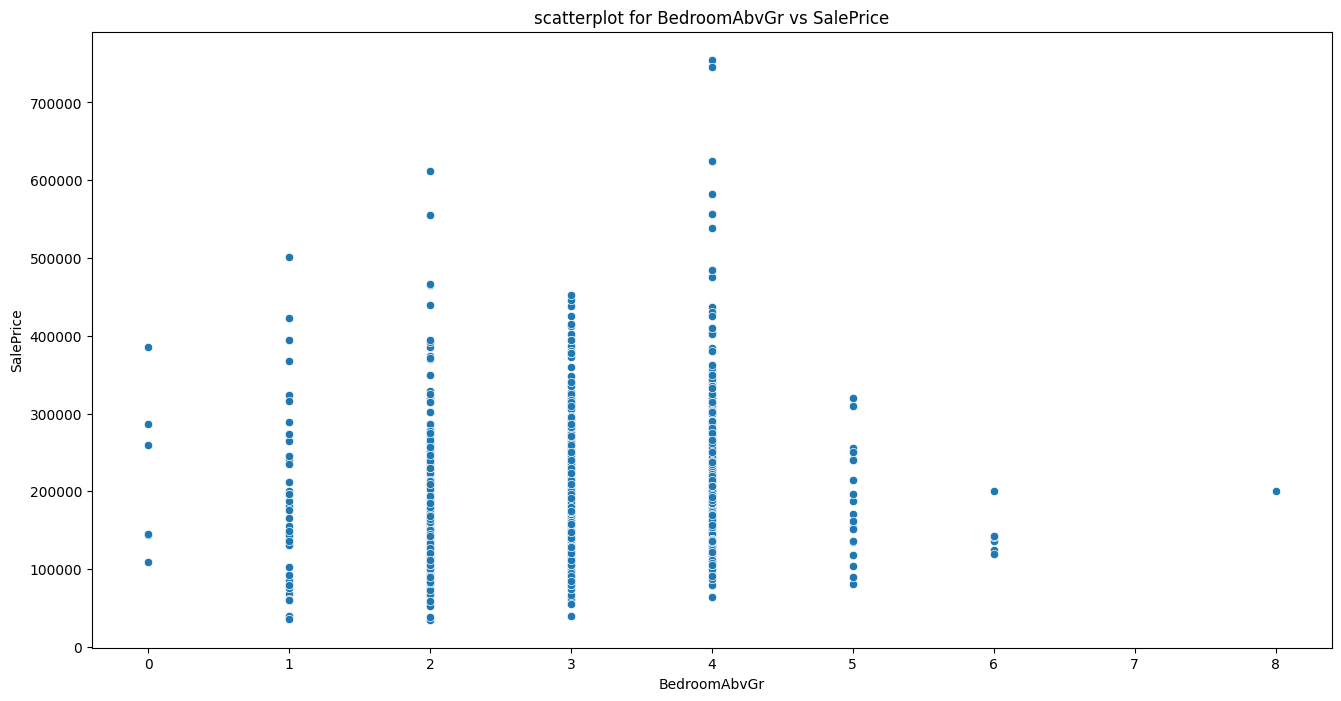

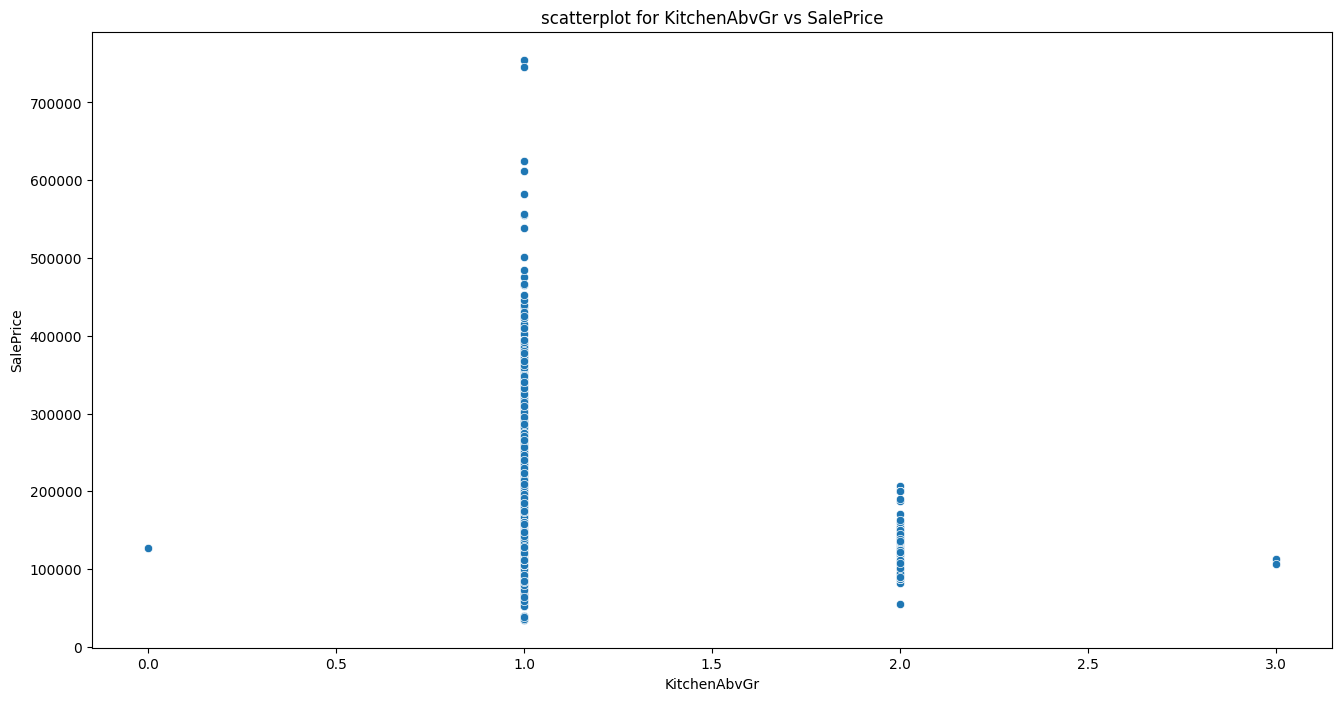

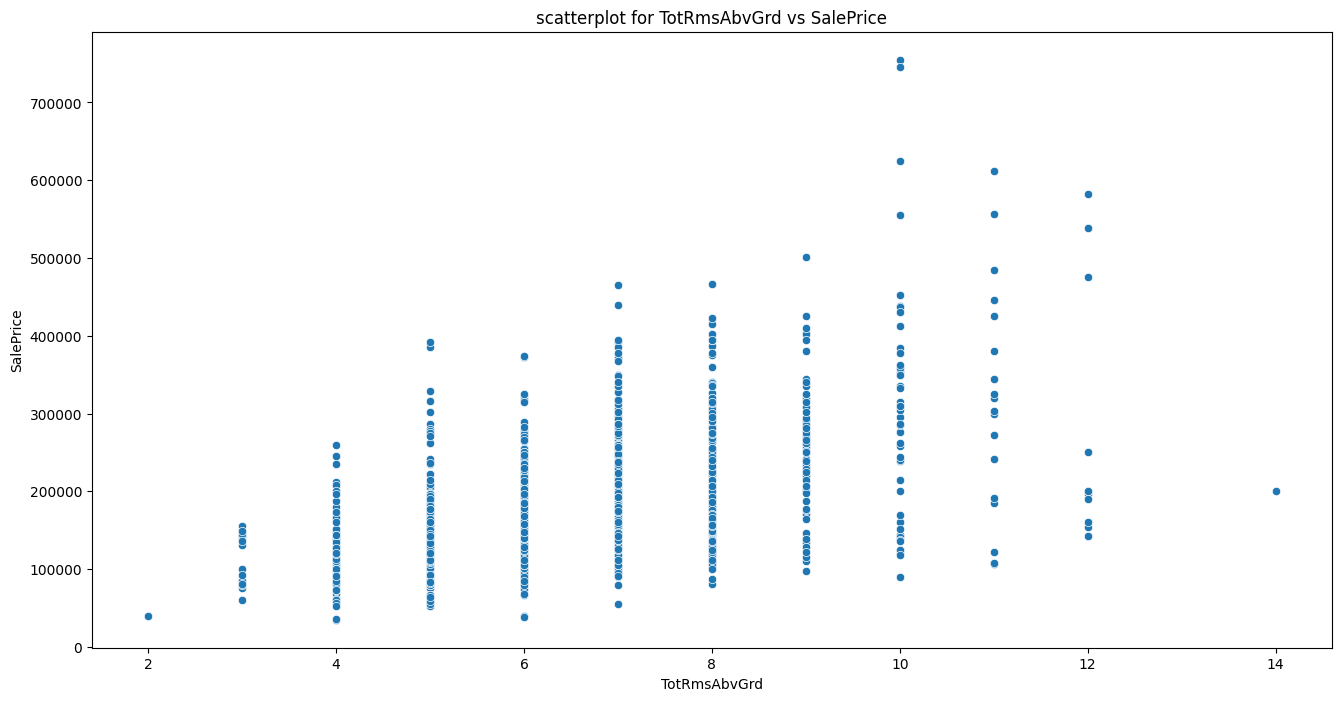

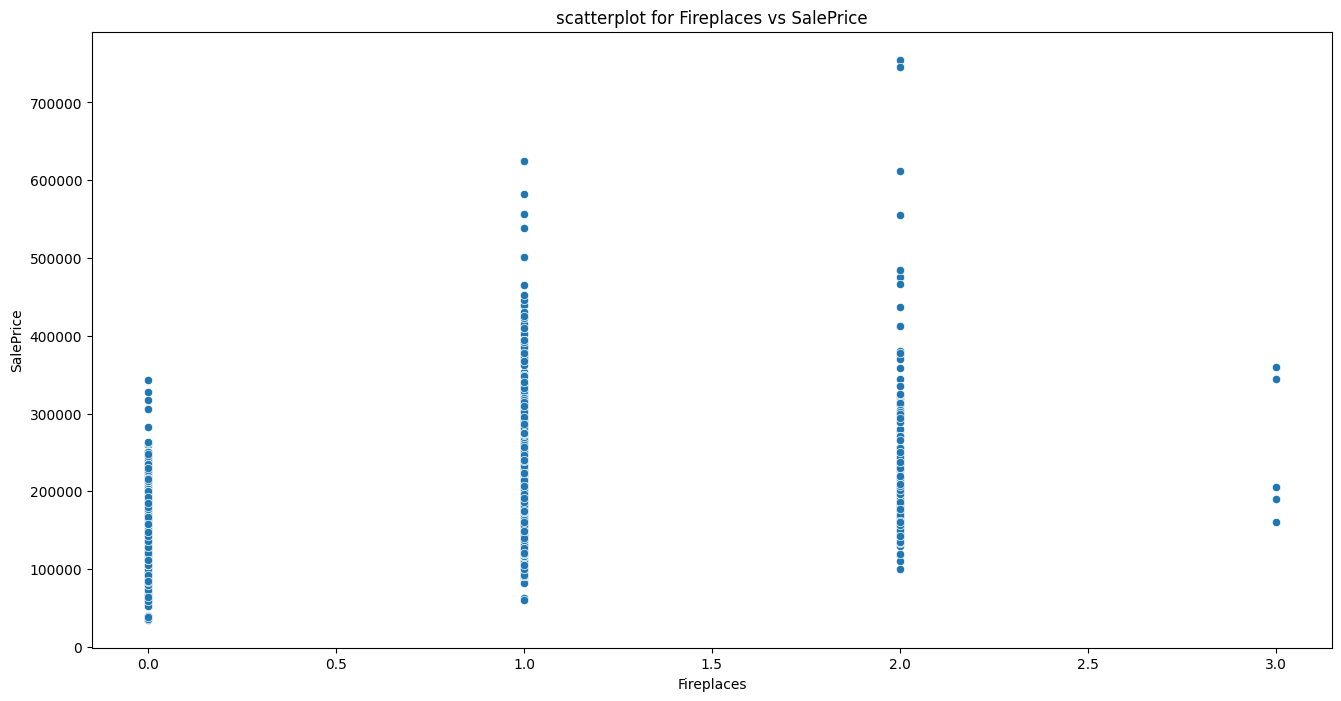

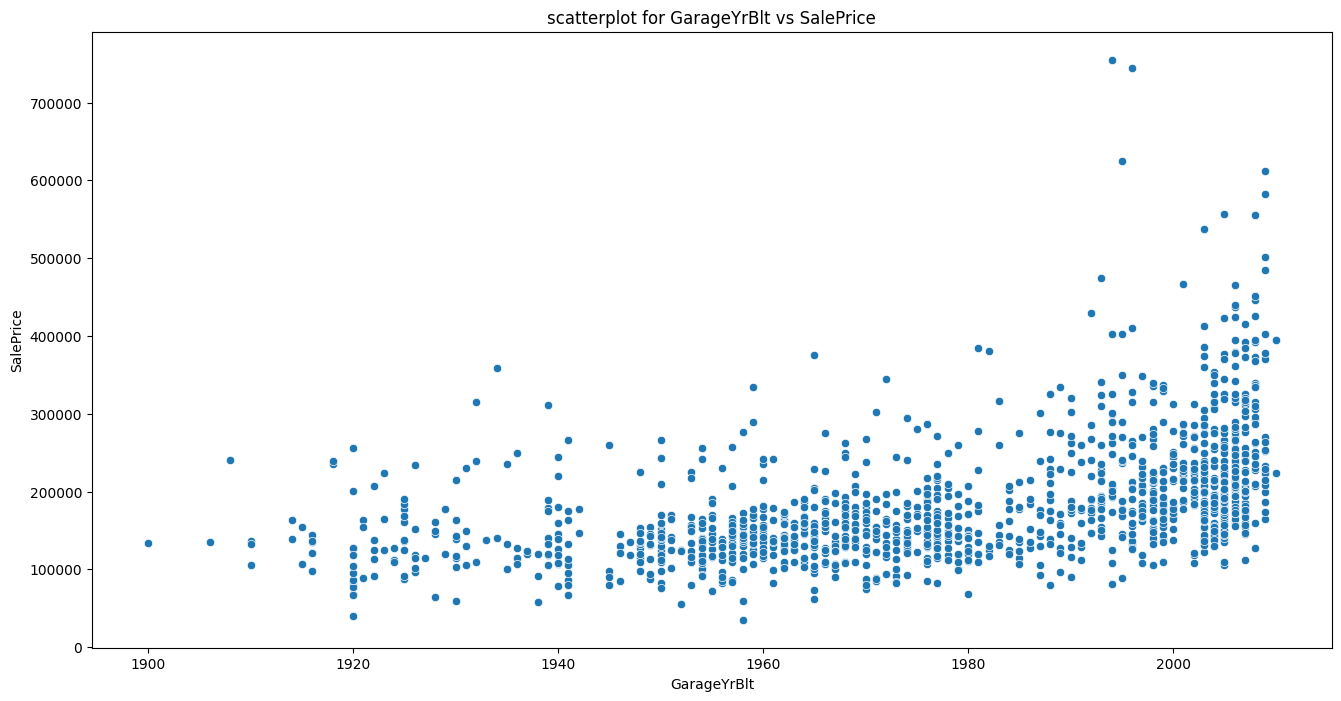

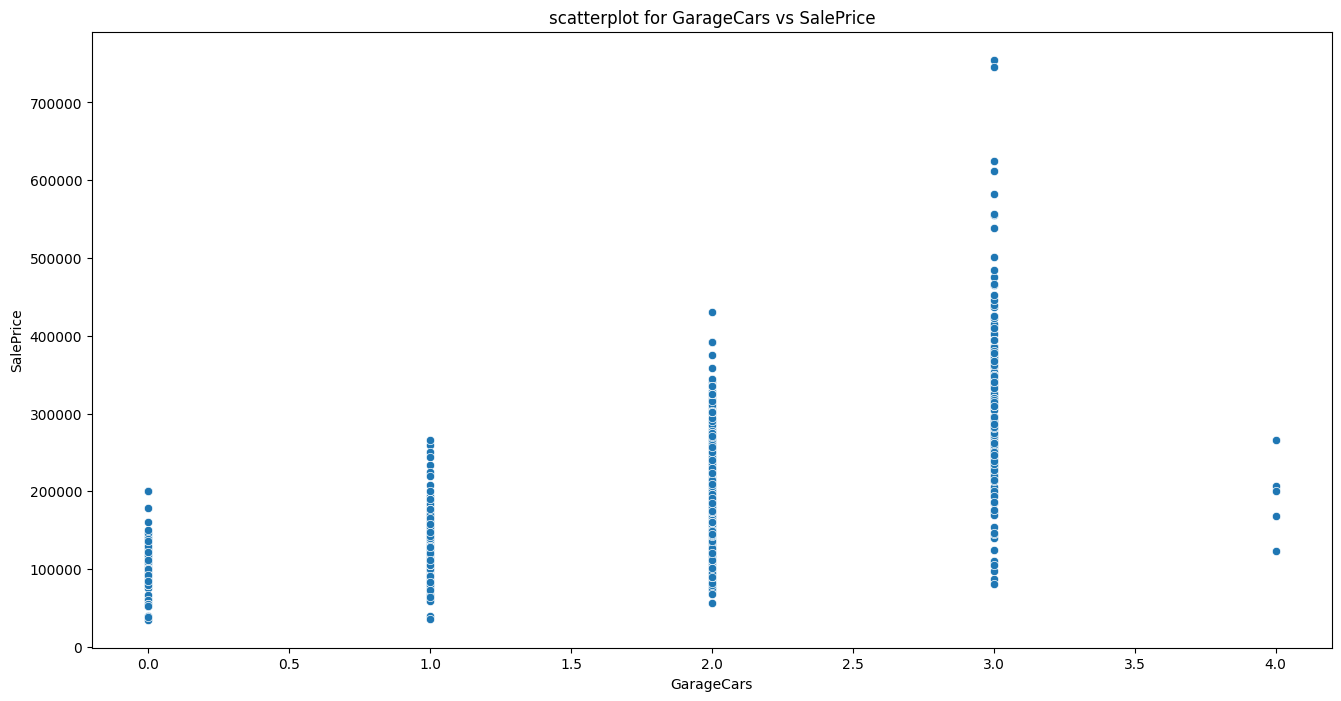

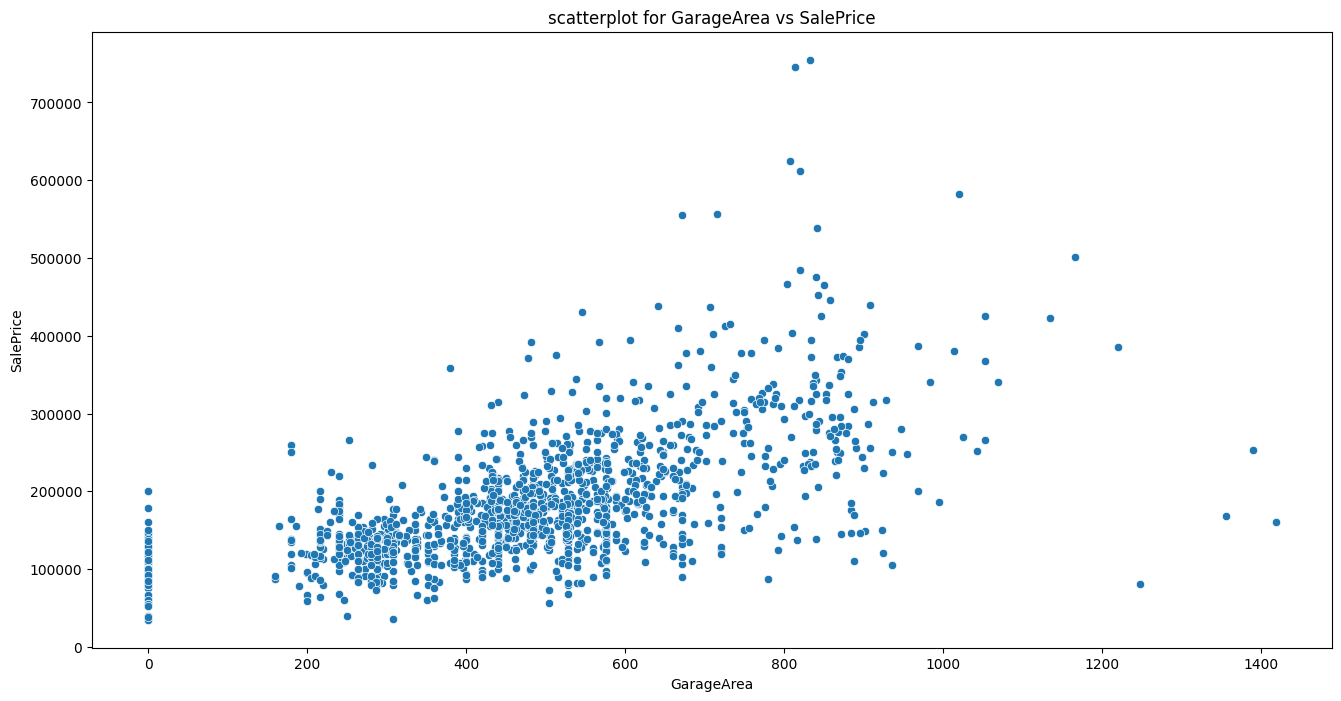

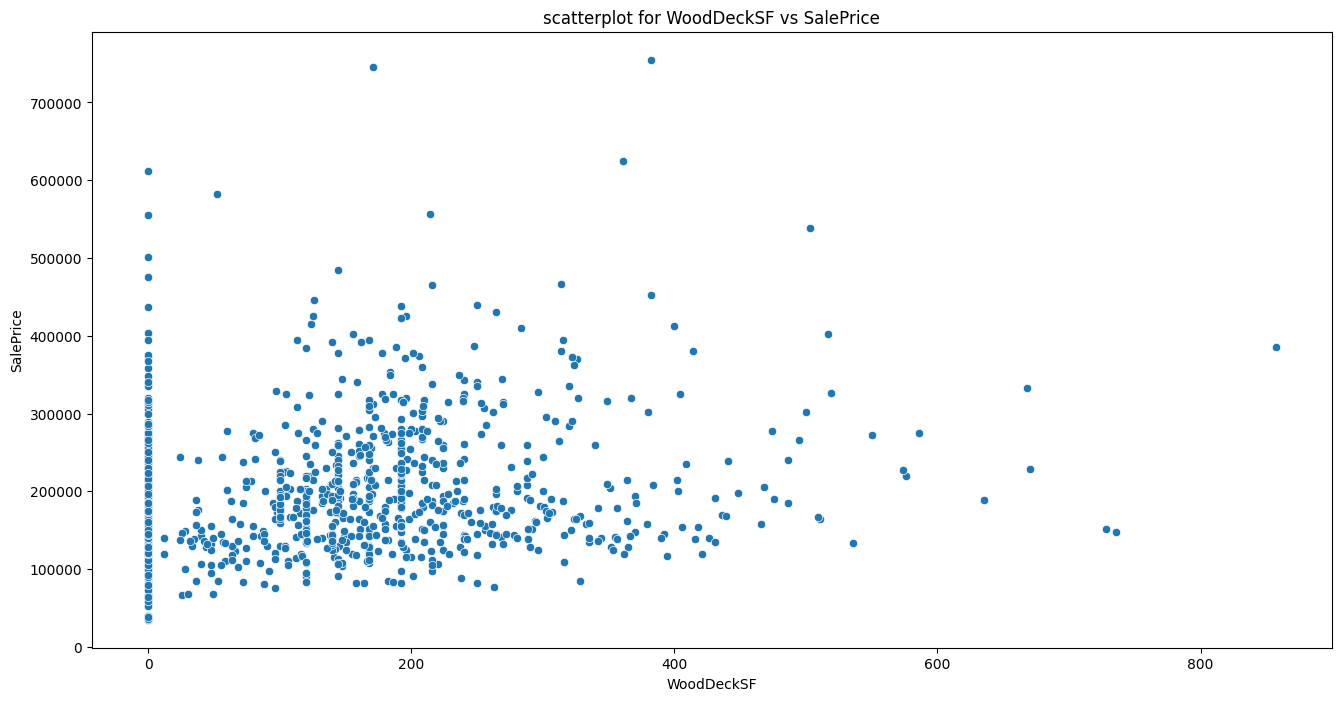

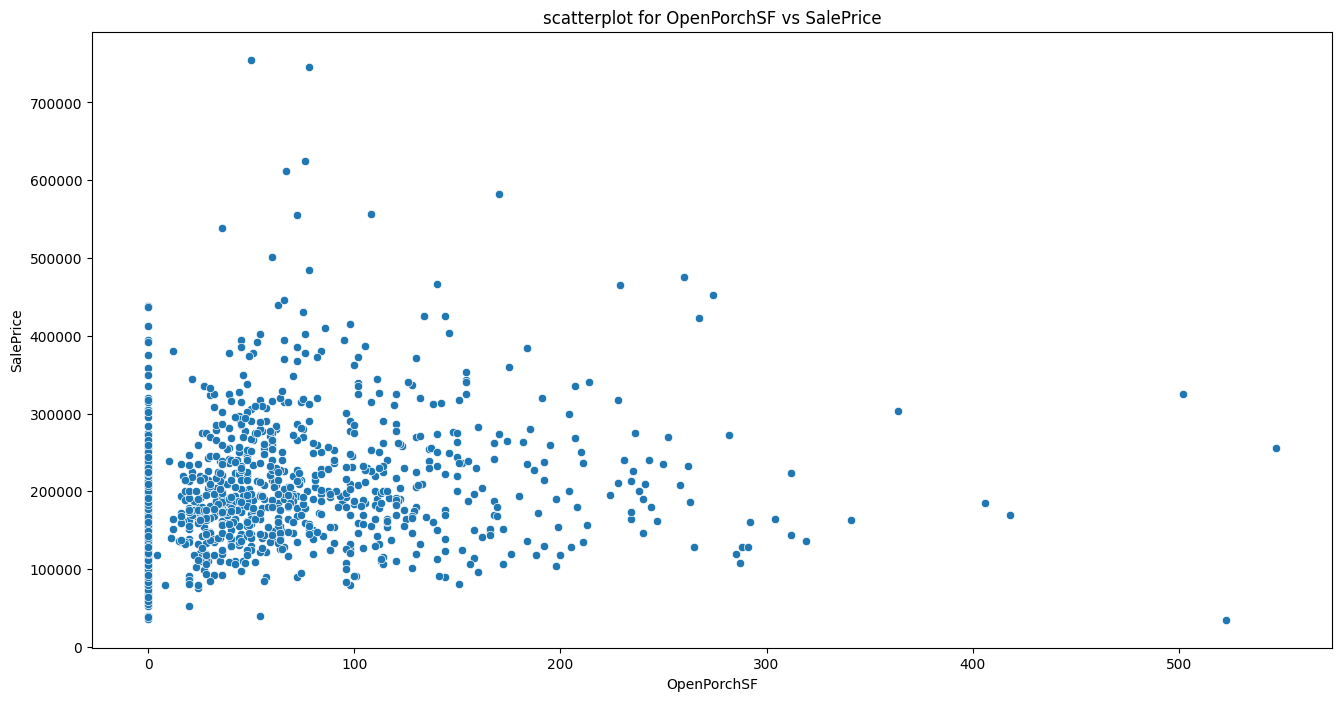

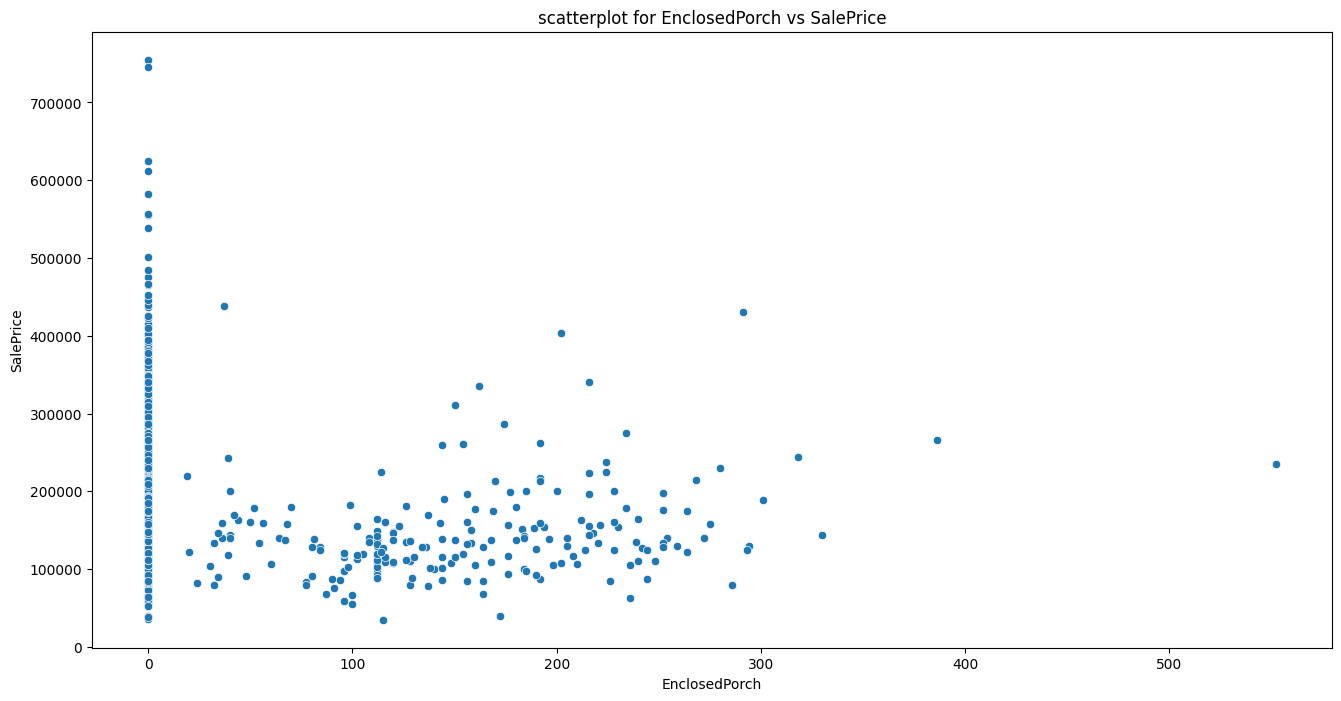

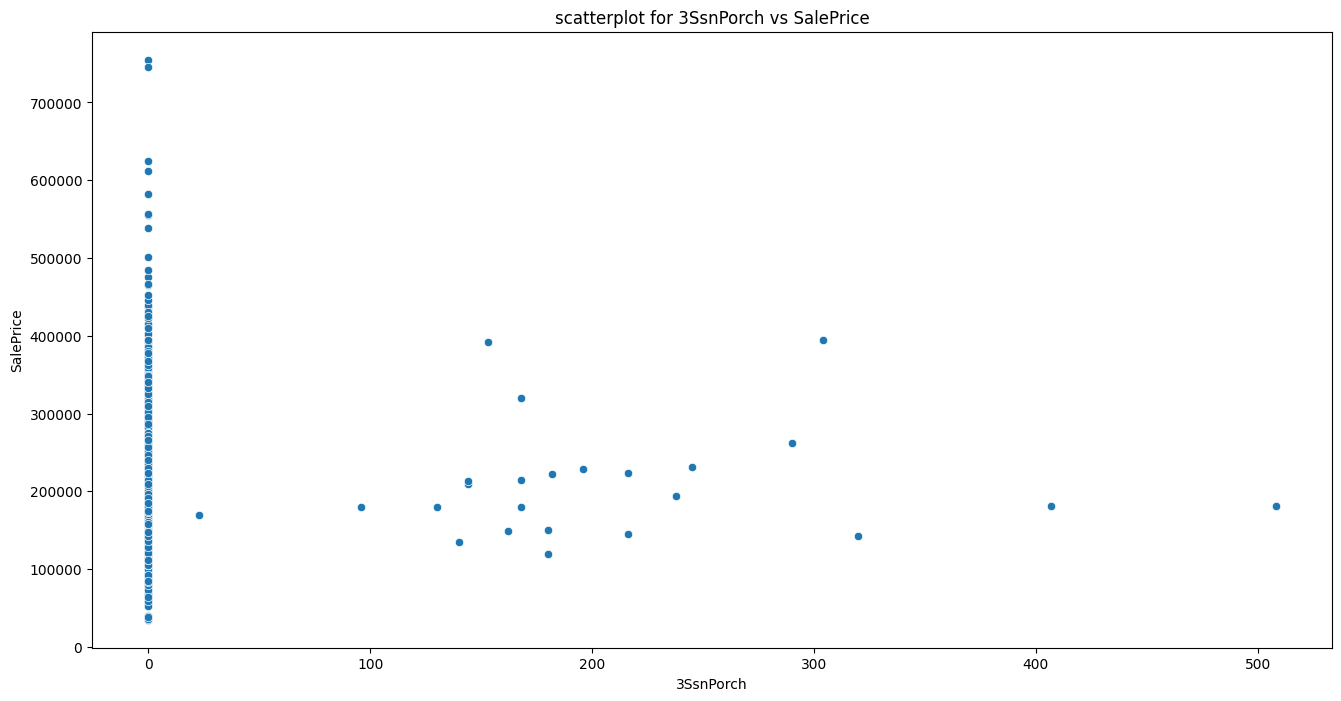

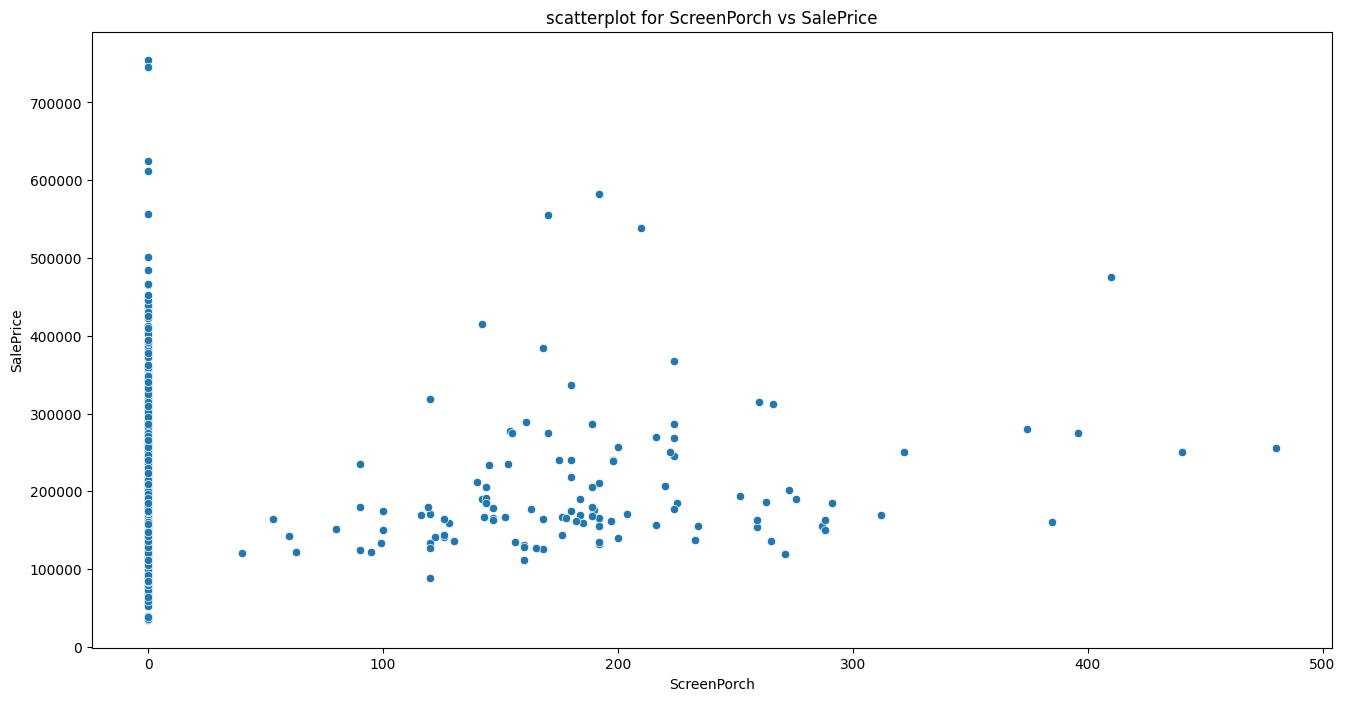

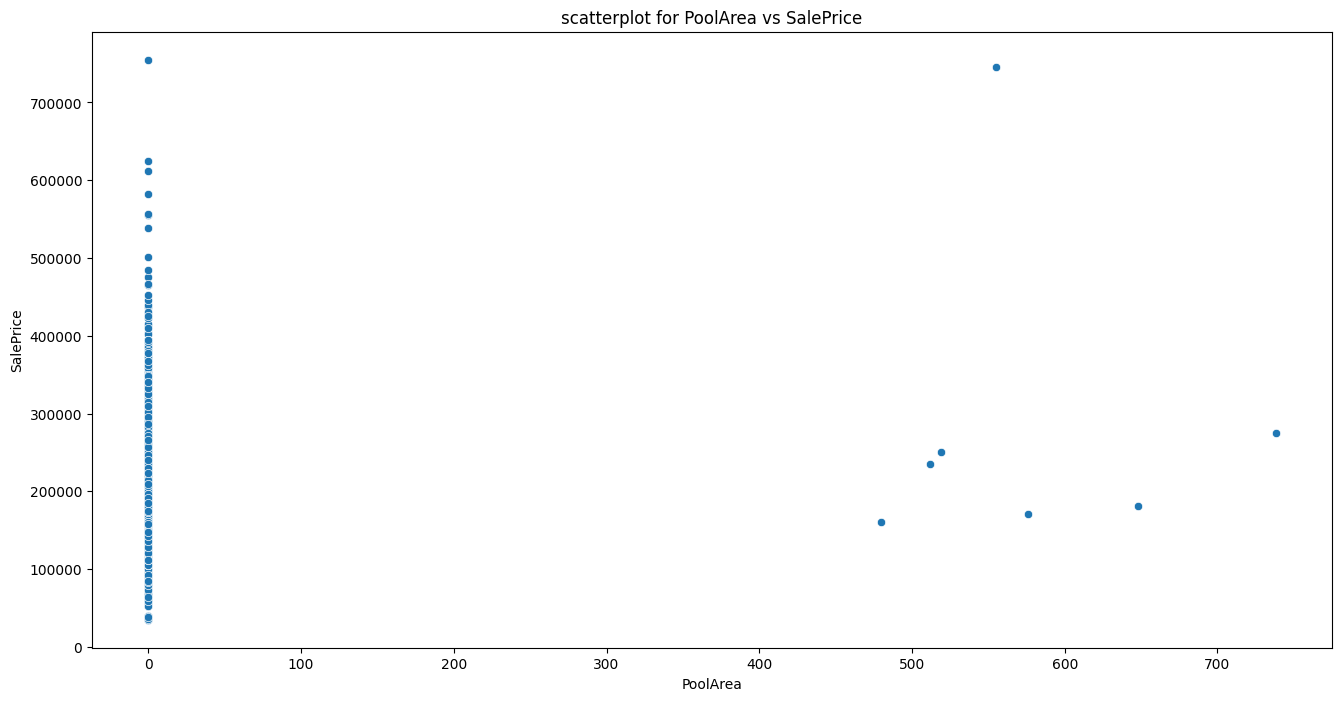

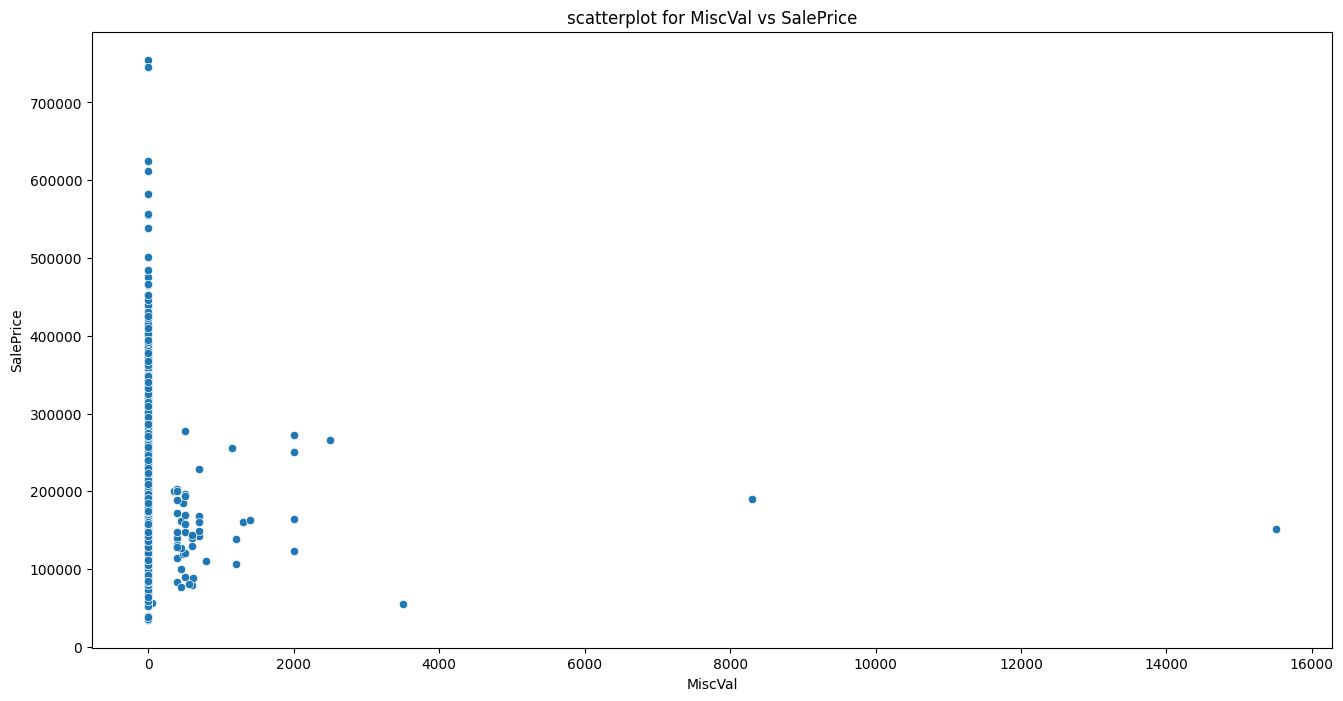

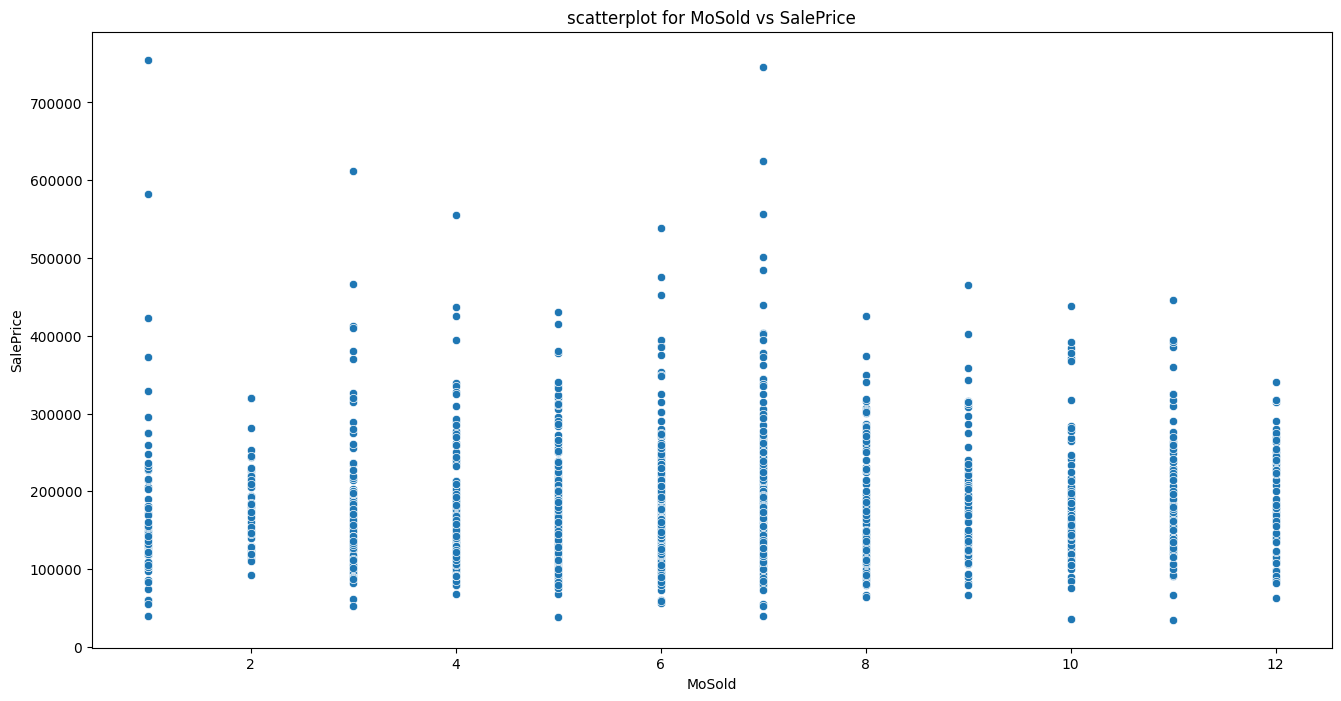

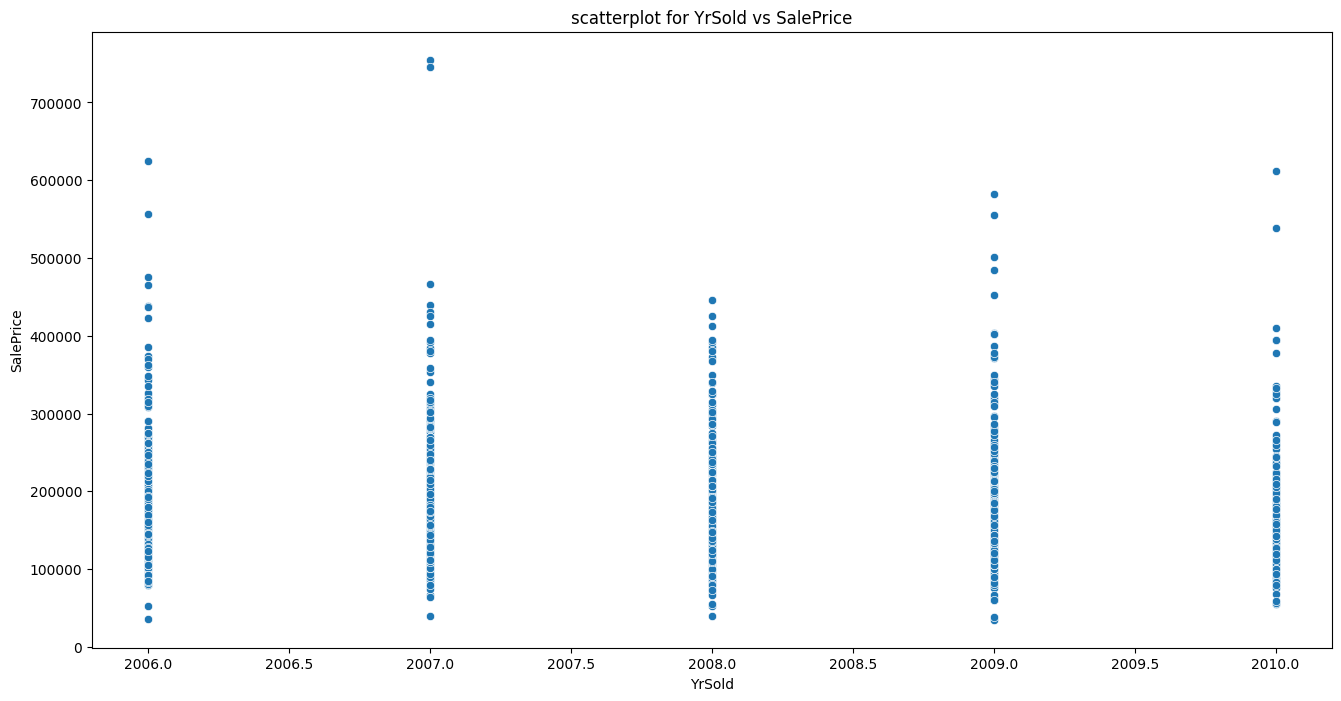

In [15]:
for i in con :
    if i!='SalePrice':
        plt.figure(figsize=(16,8))
        sns.scatterplot(data=df, x=i, y='SalePrice')
        plt.title(f'scatterplot for {i} vs SalePrice')
        plt.show()

##### BOXPLOT FOR CATEGORICAL VS CONTINOUS FEATURES

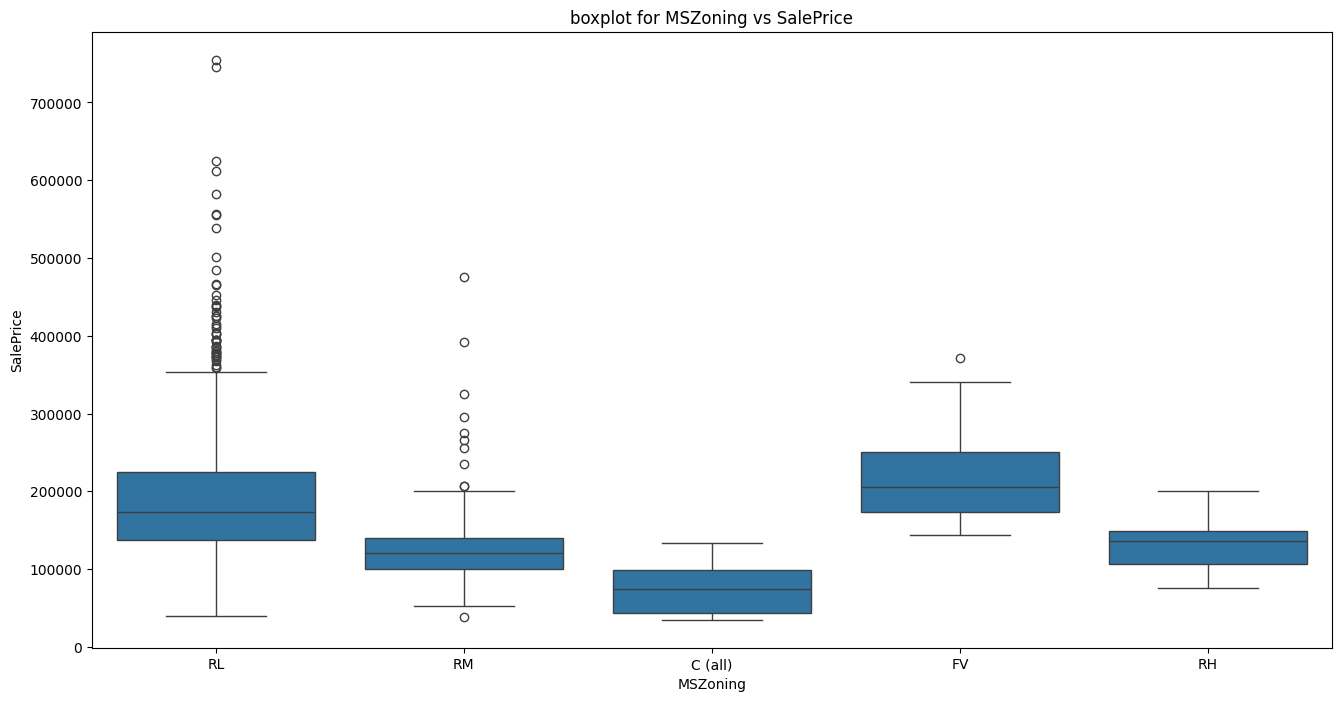

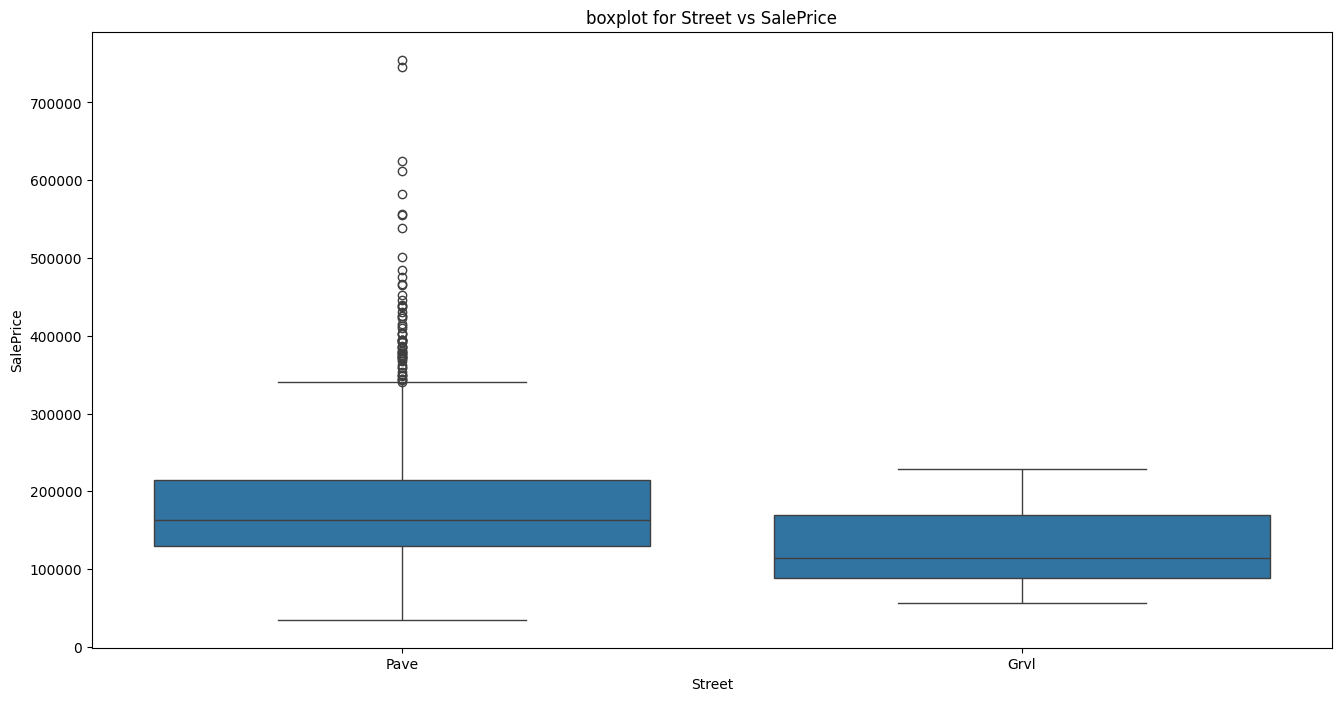

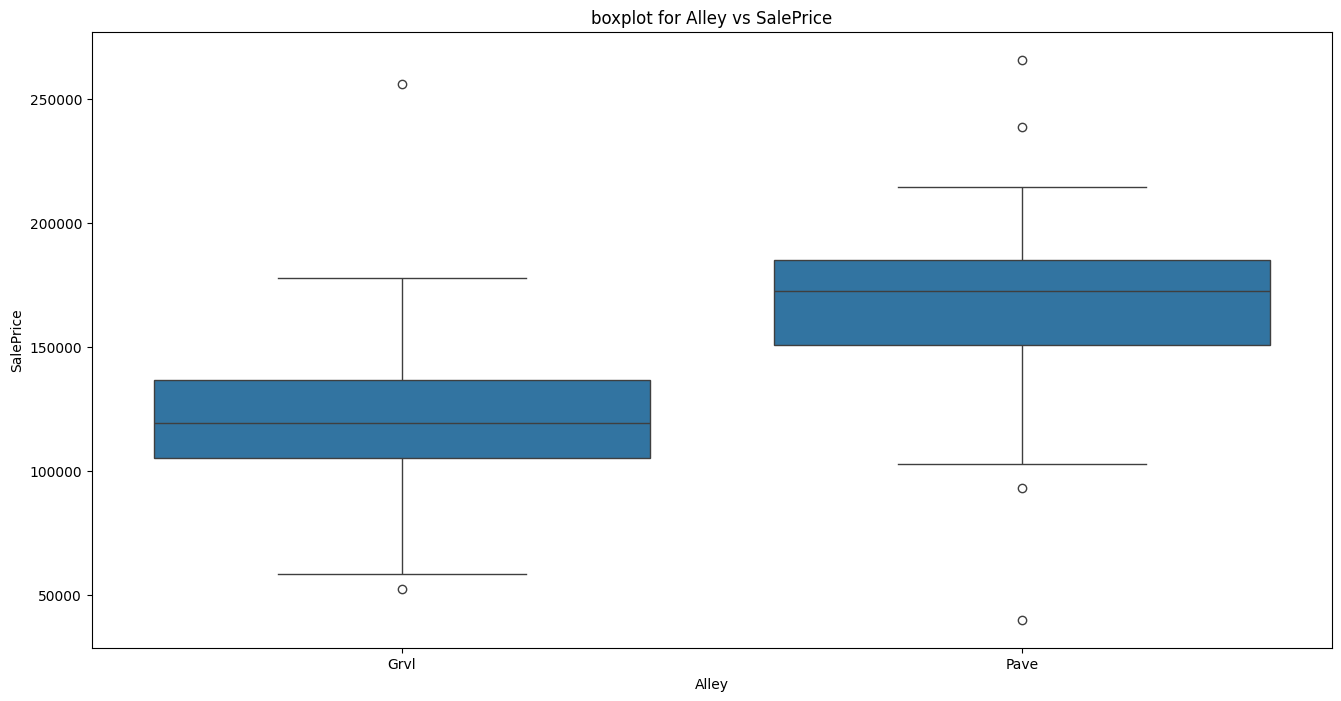

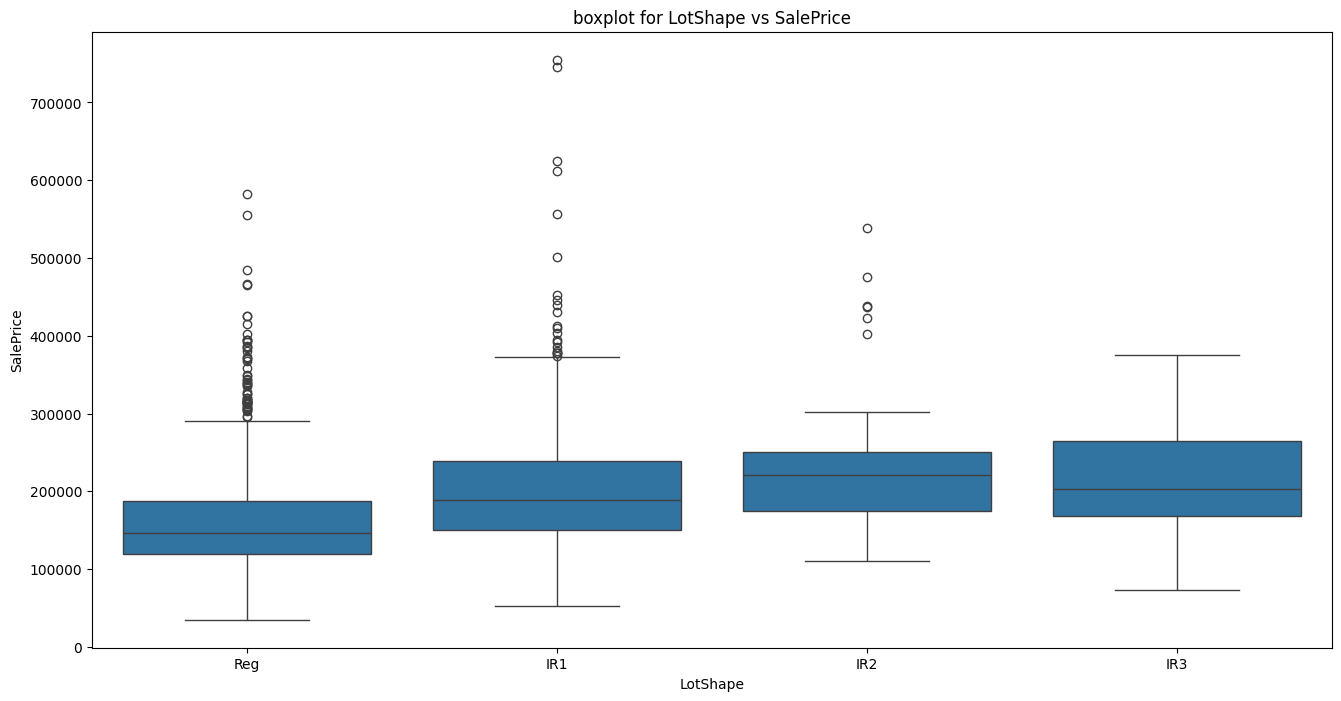

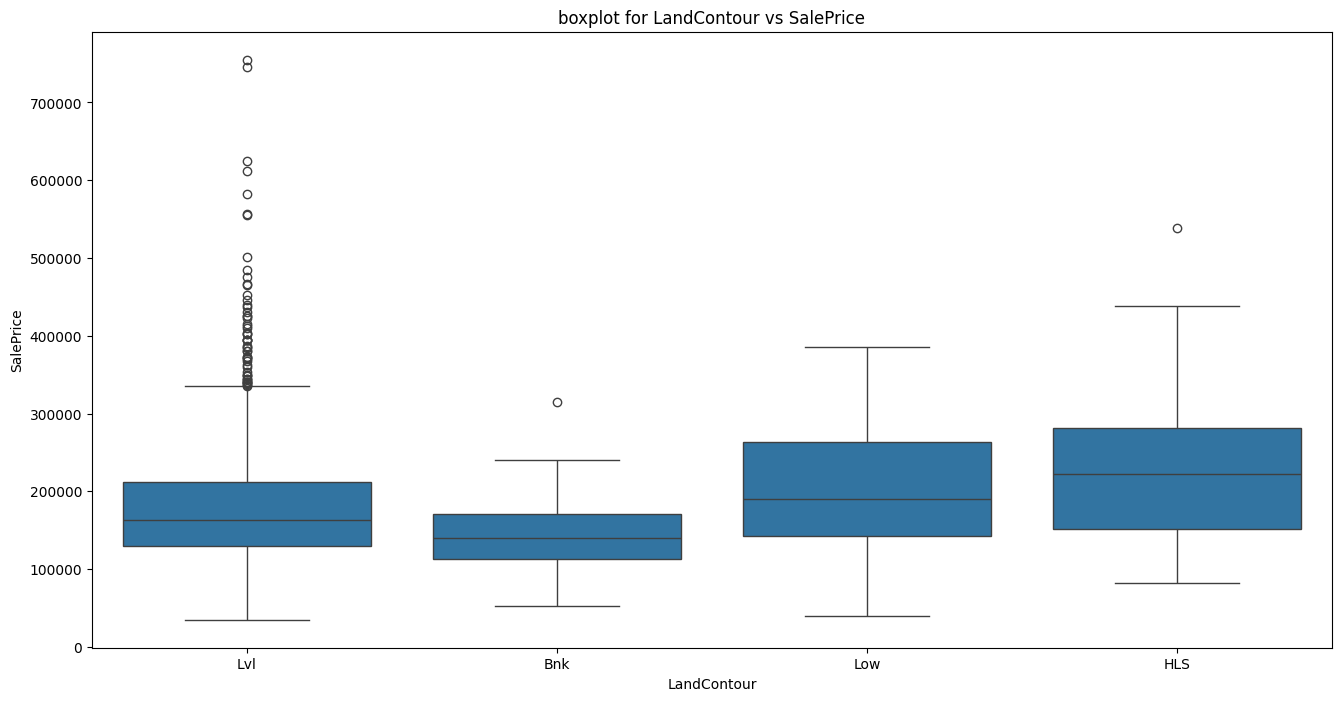

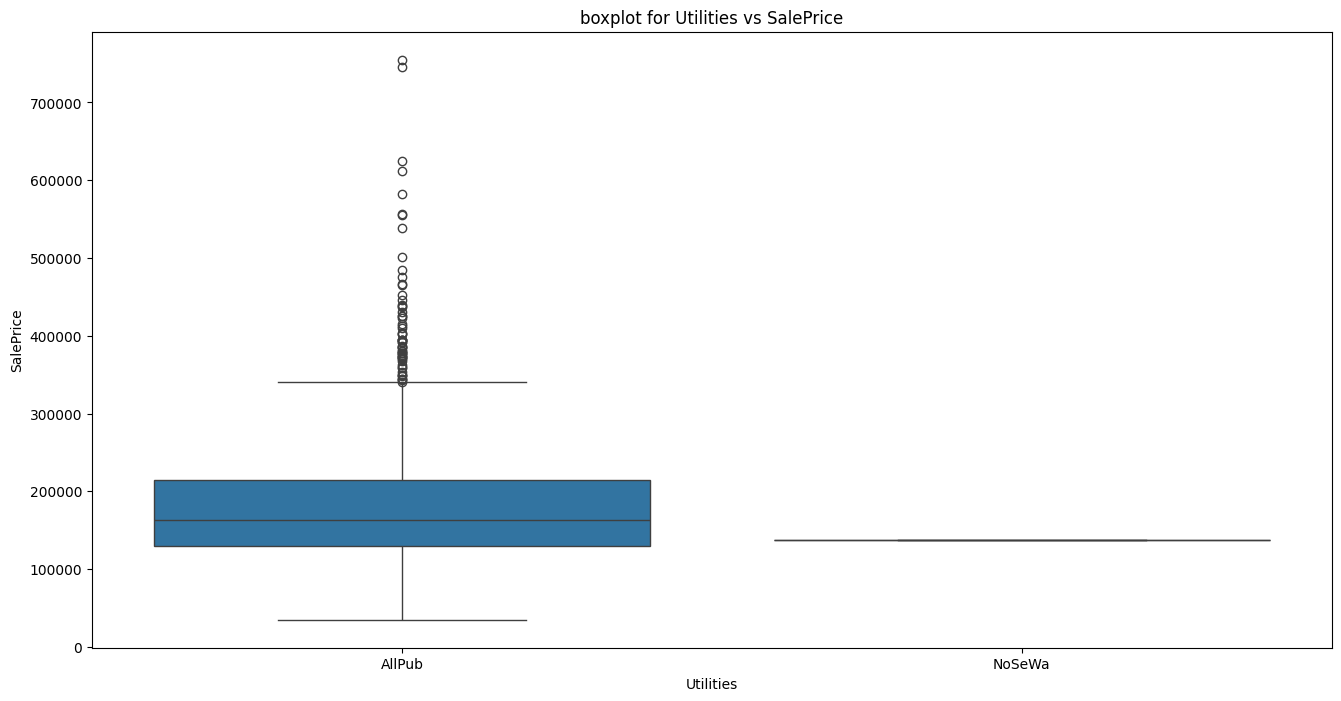

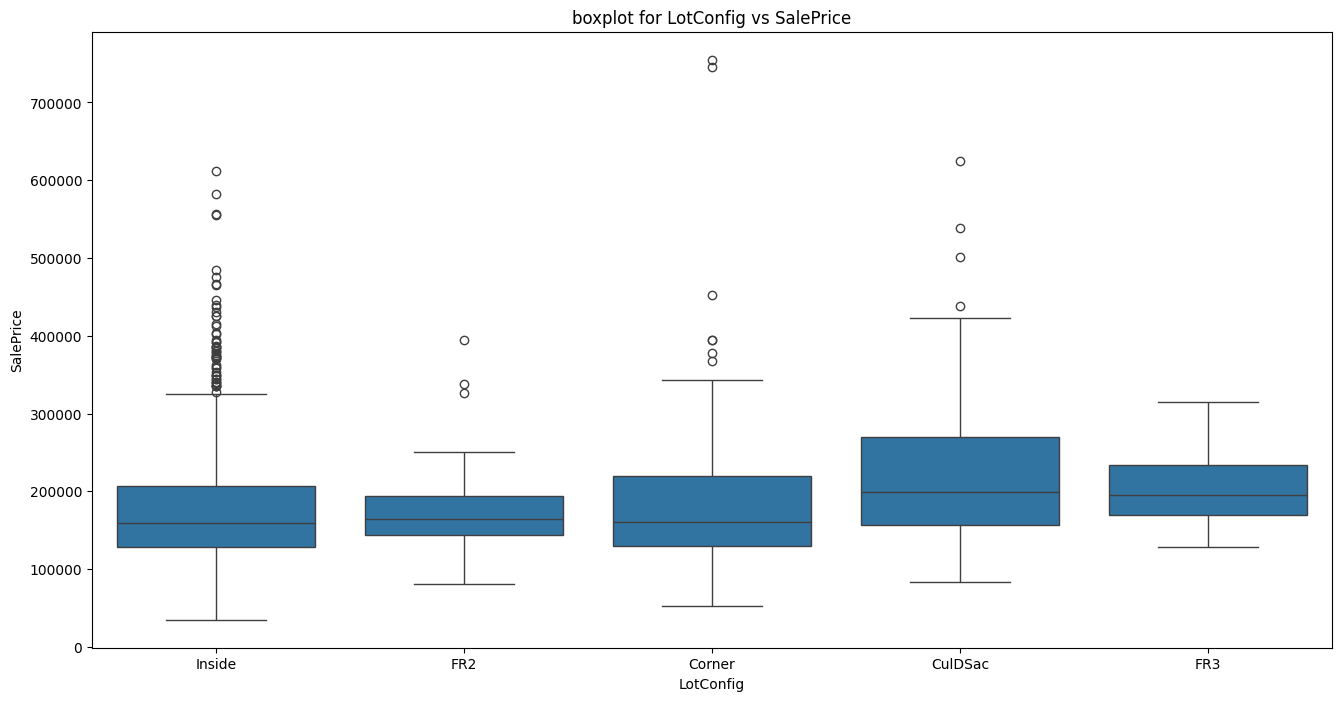

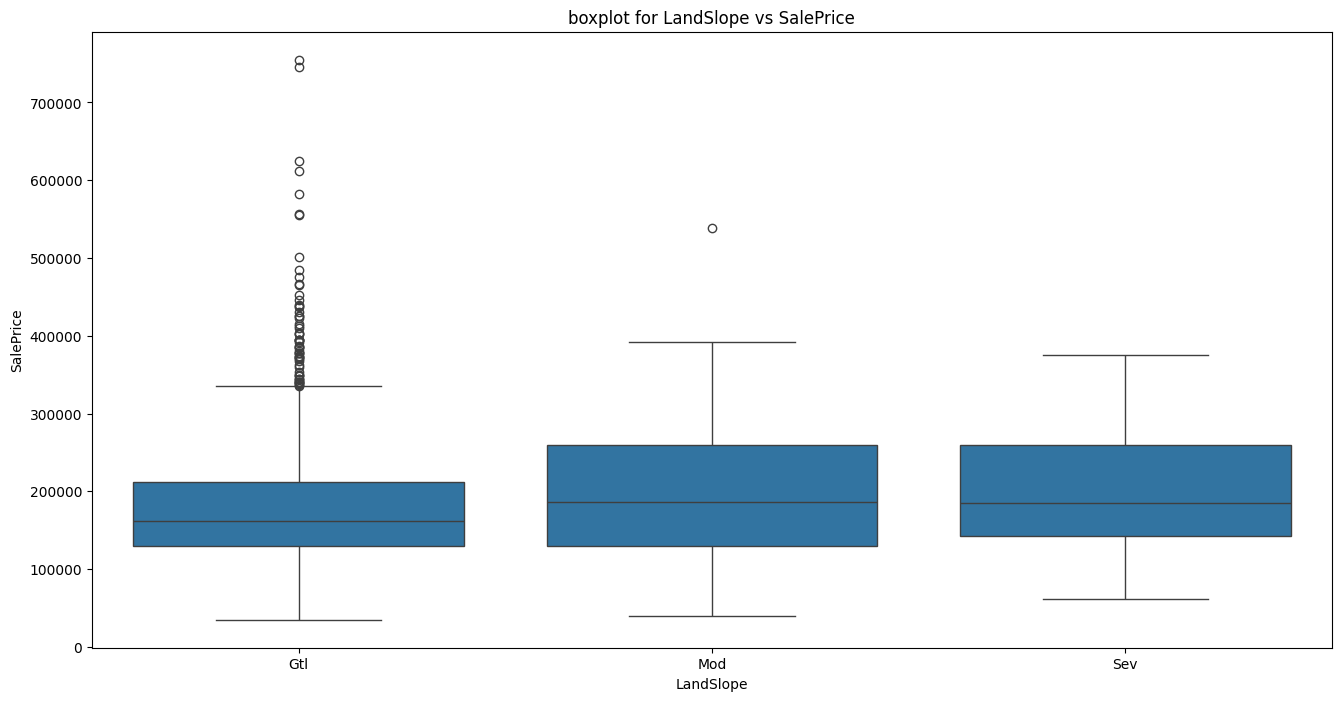

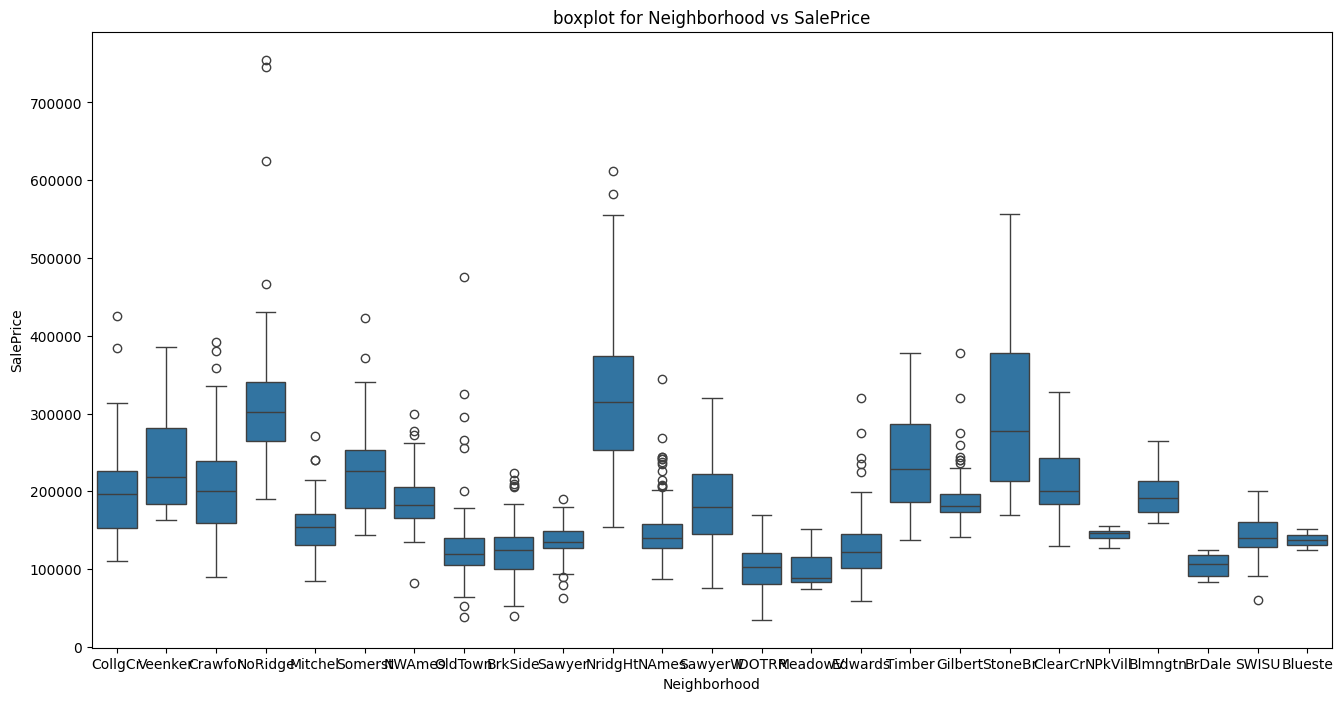

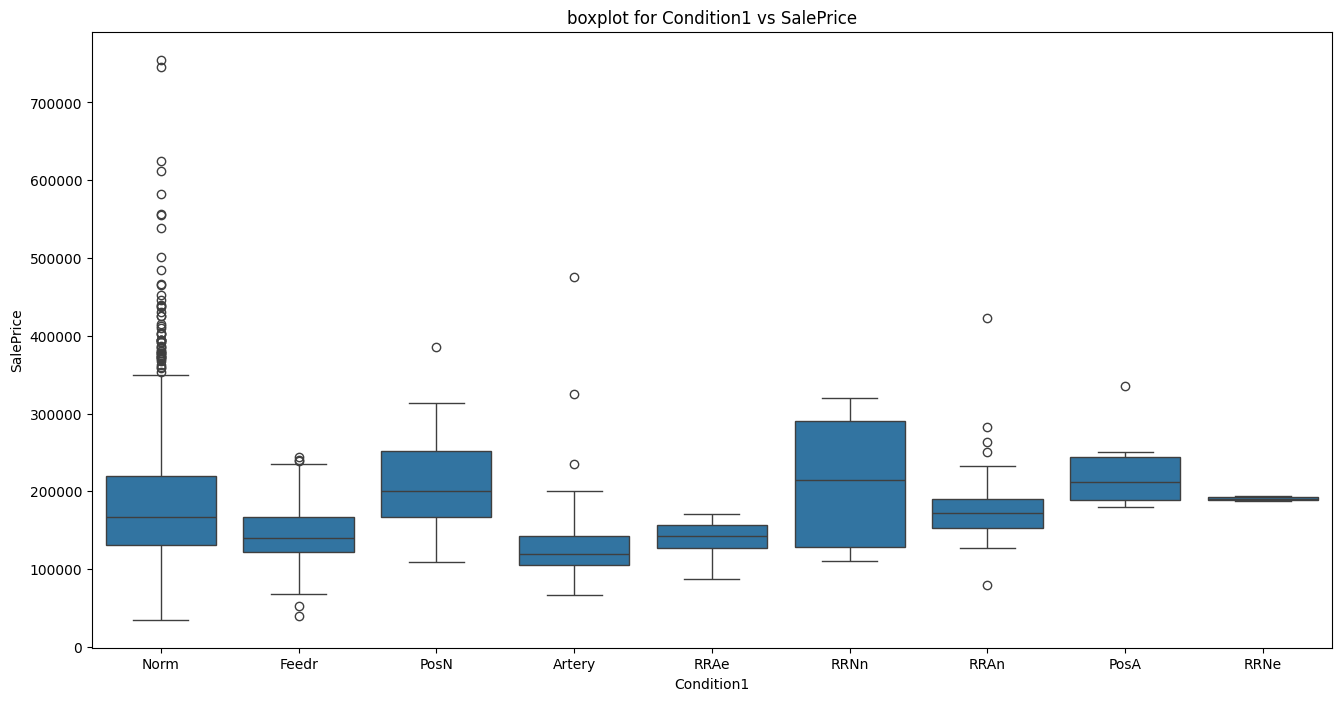

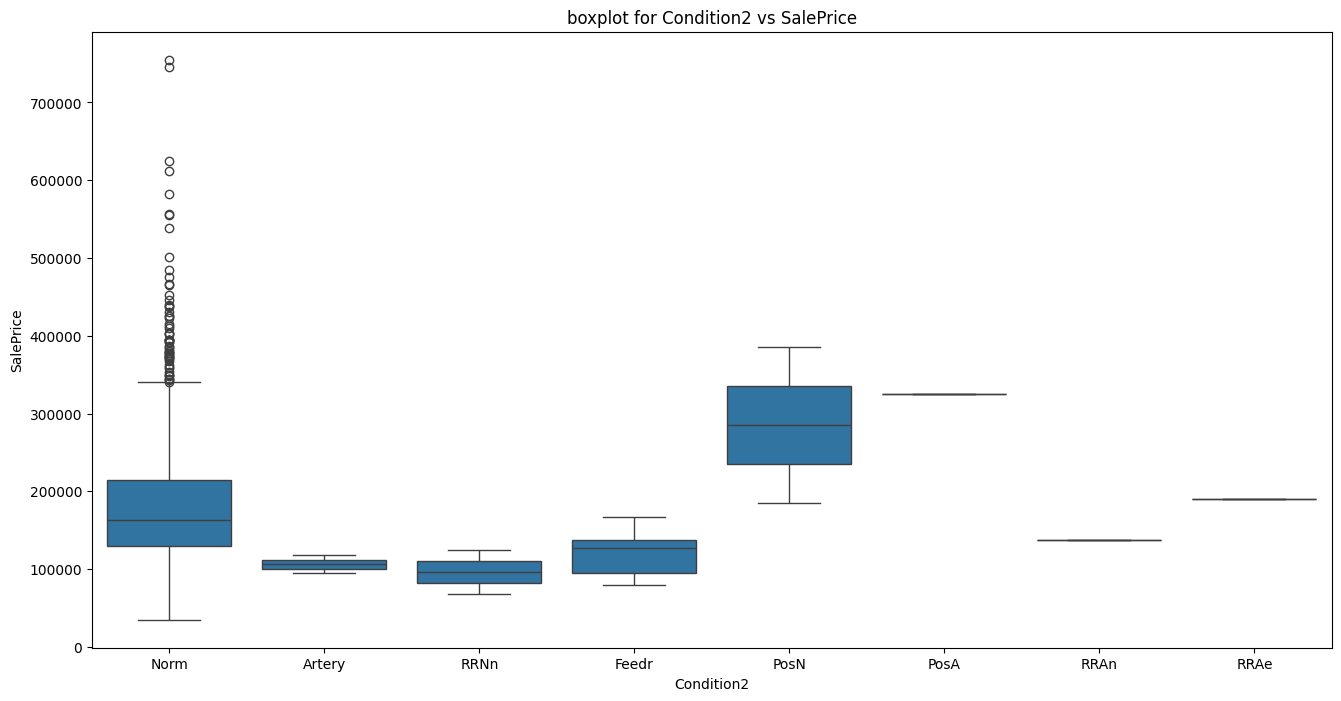

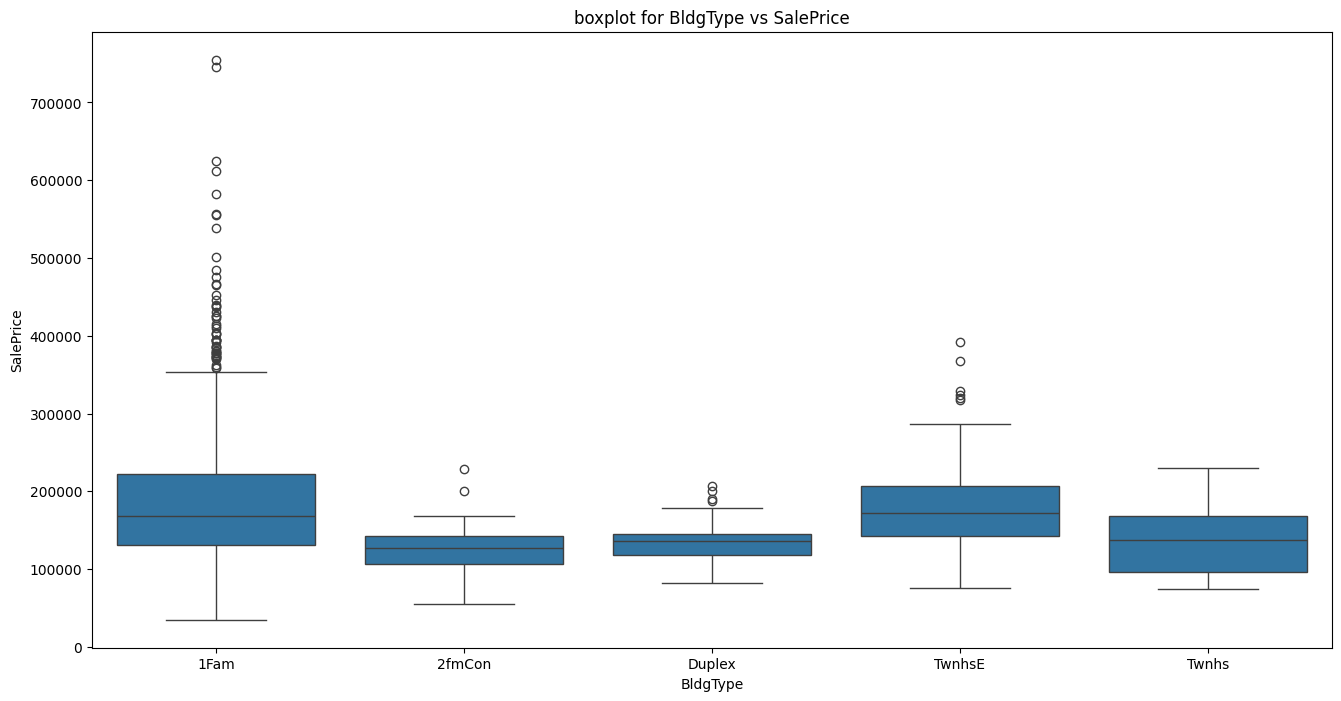

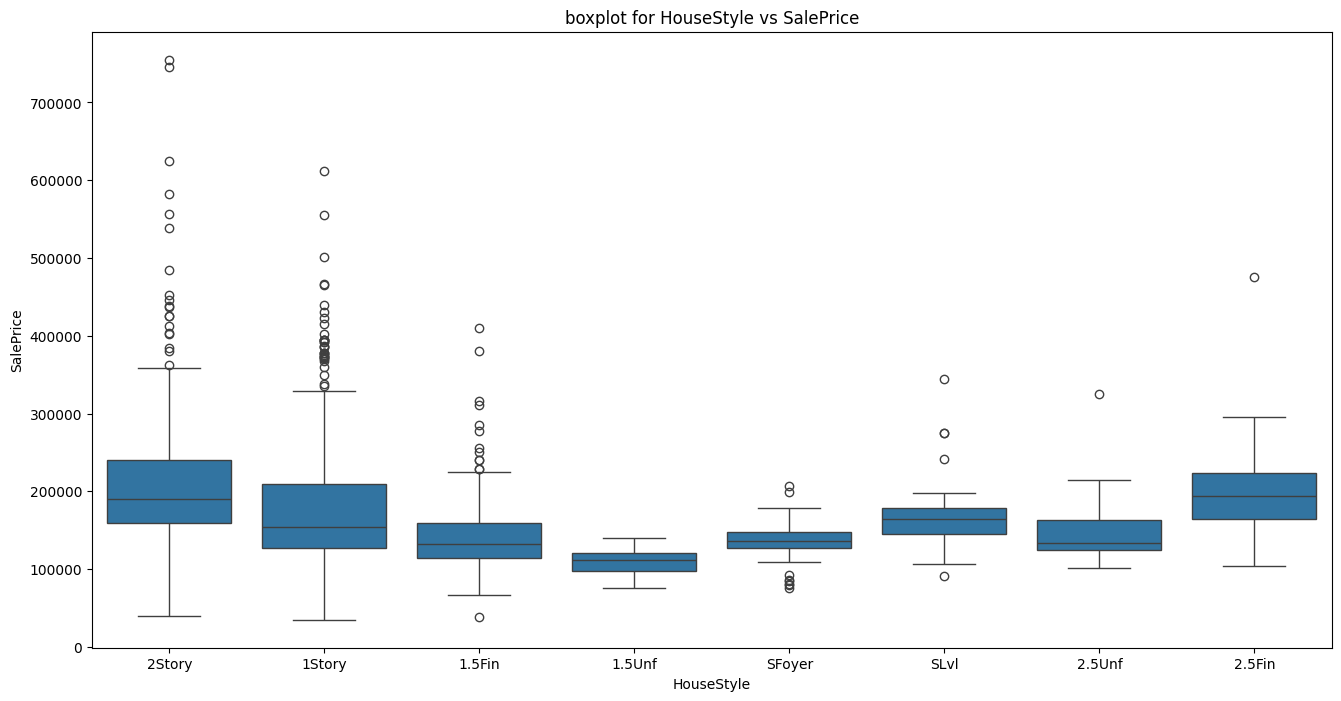

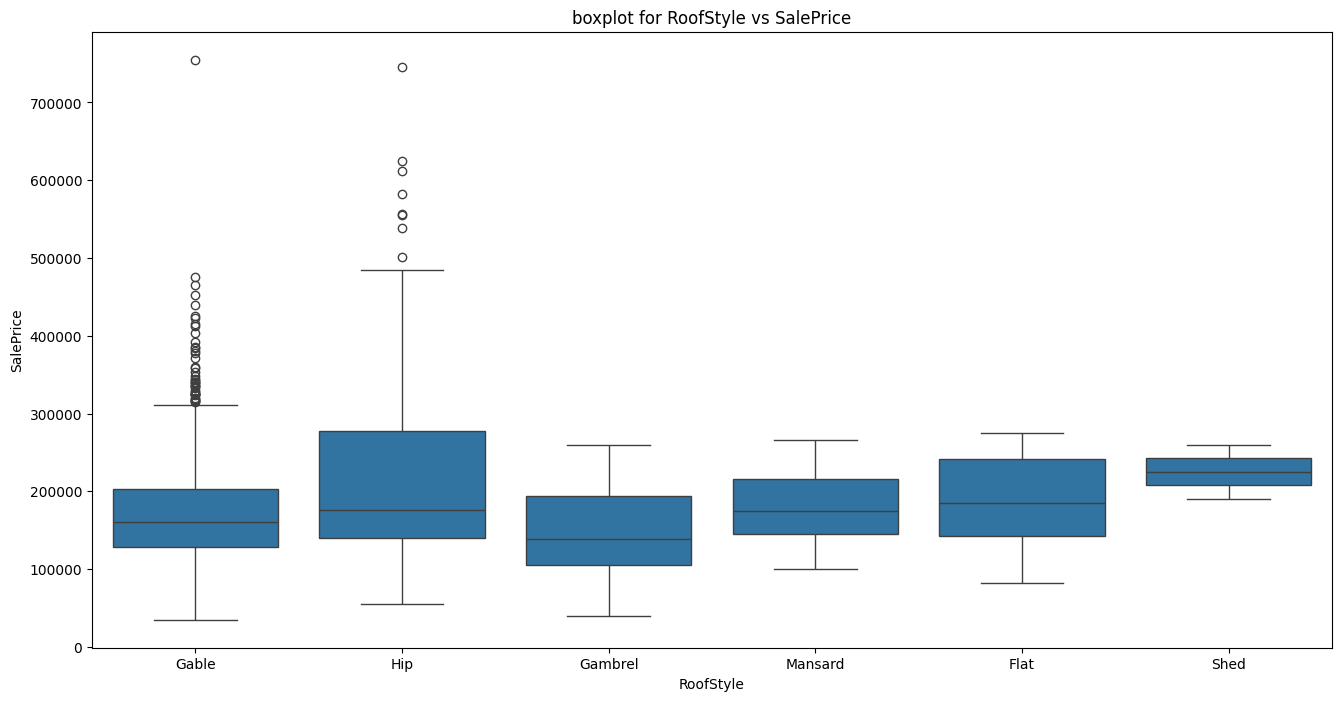

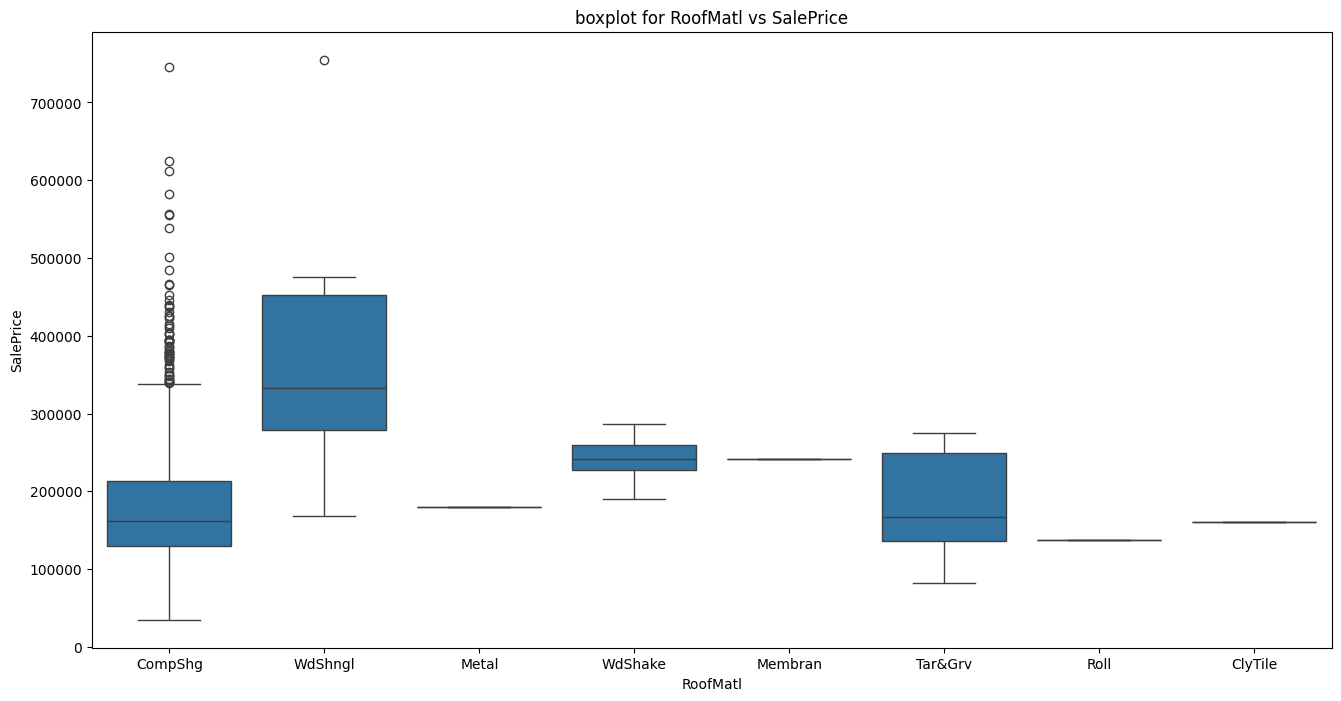

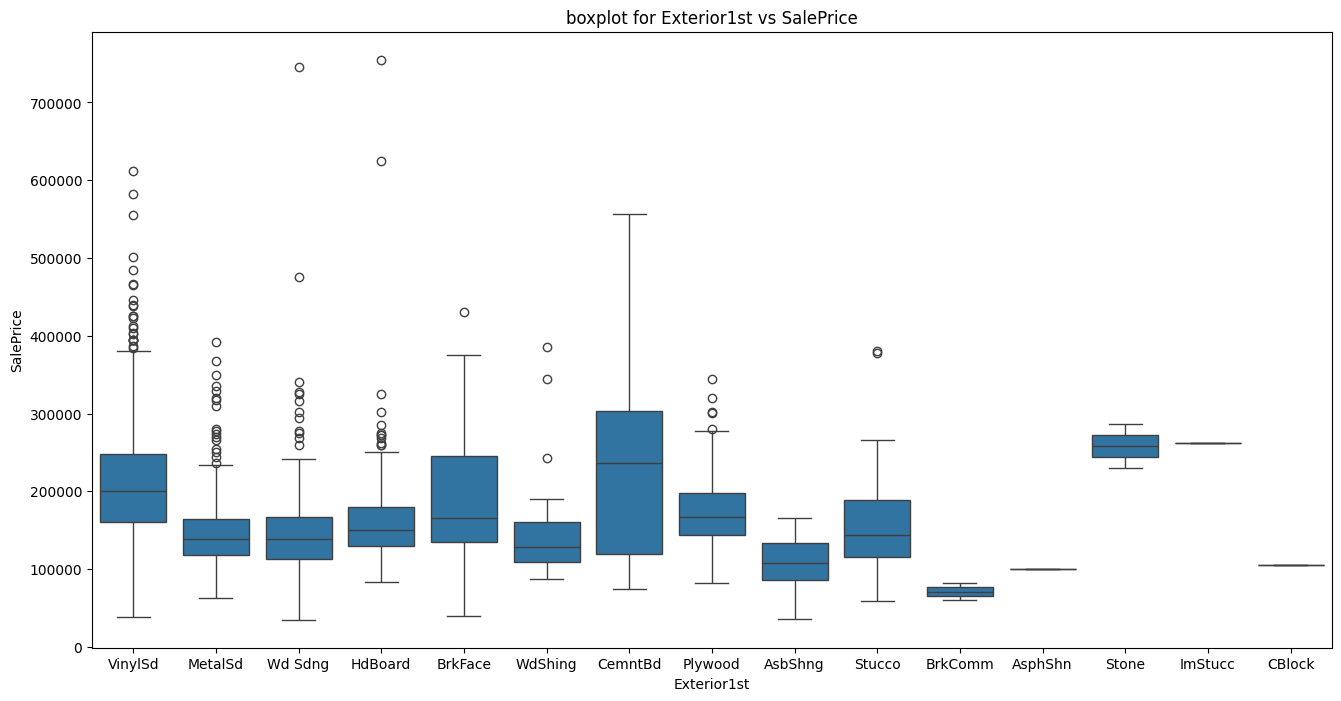

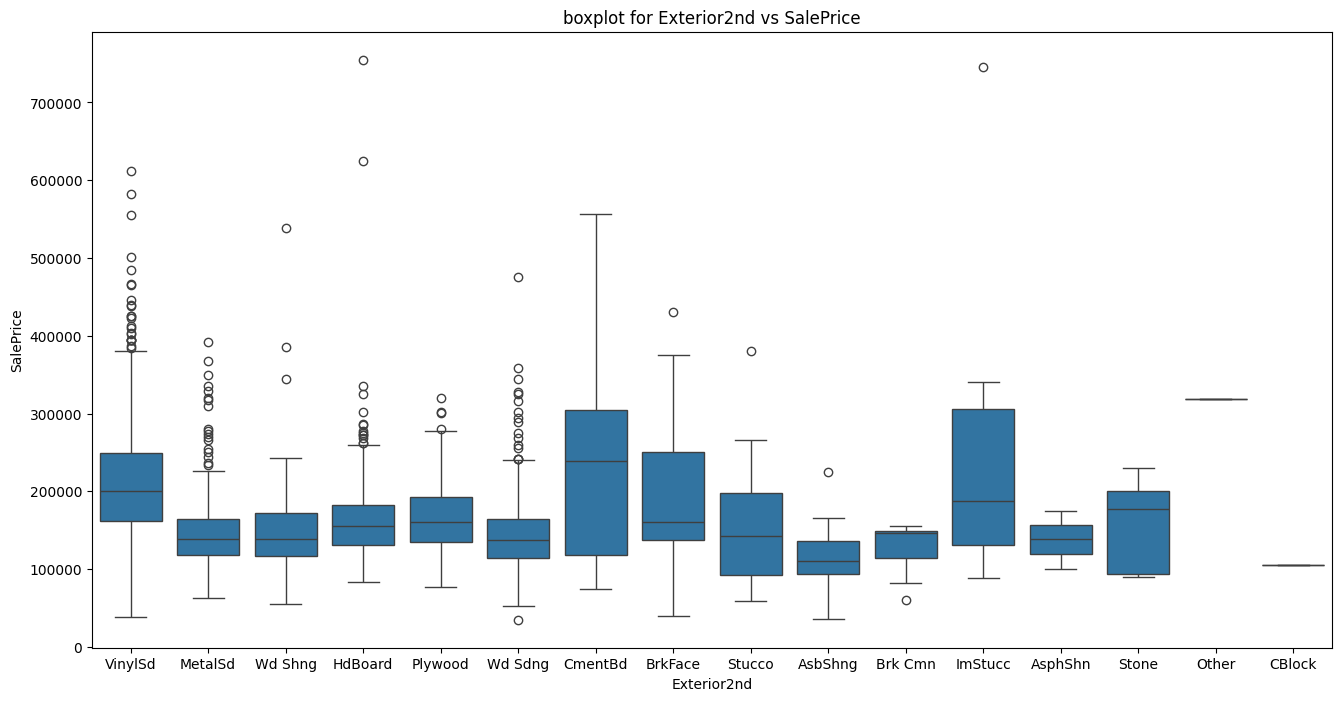

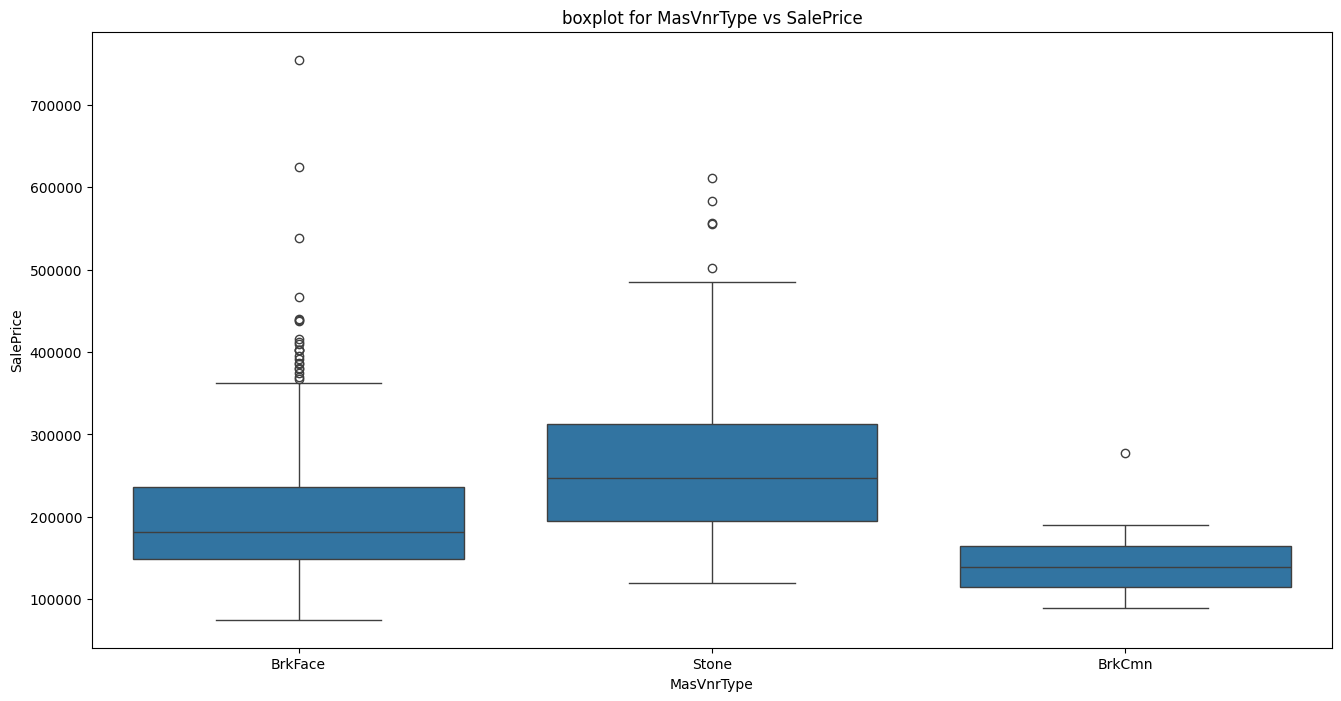

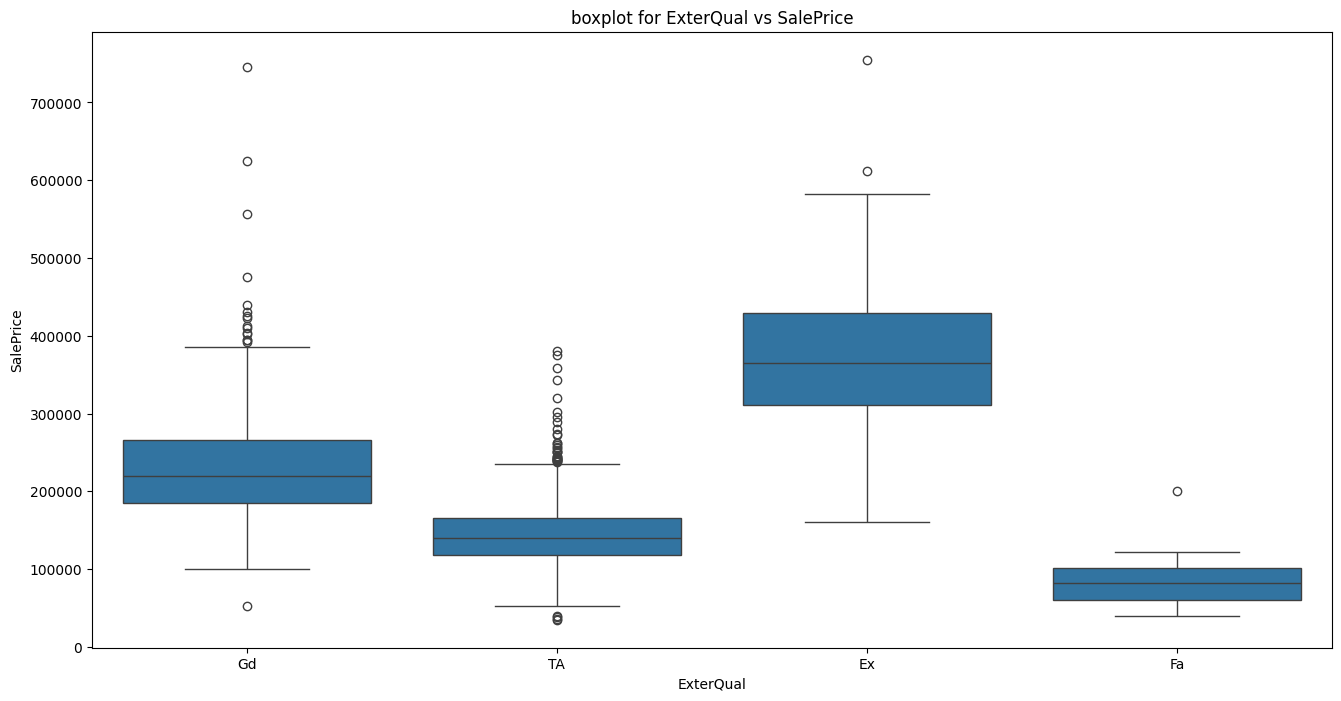

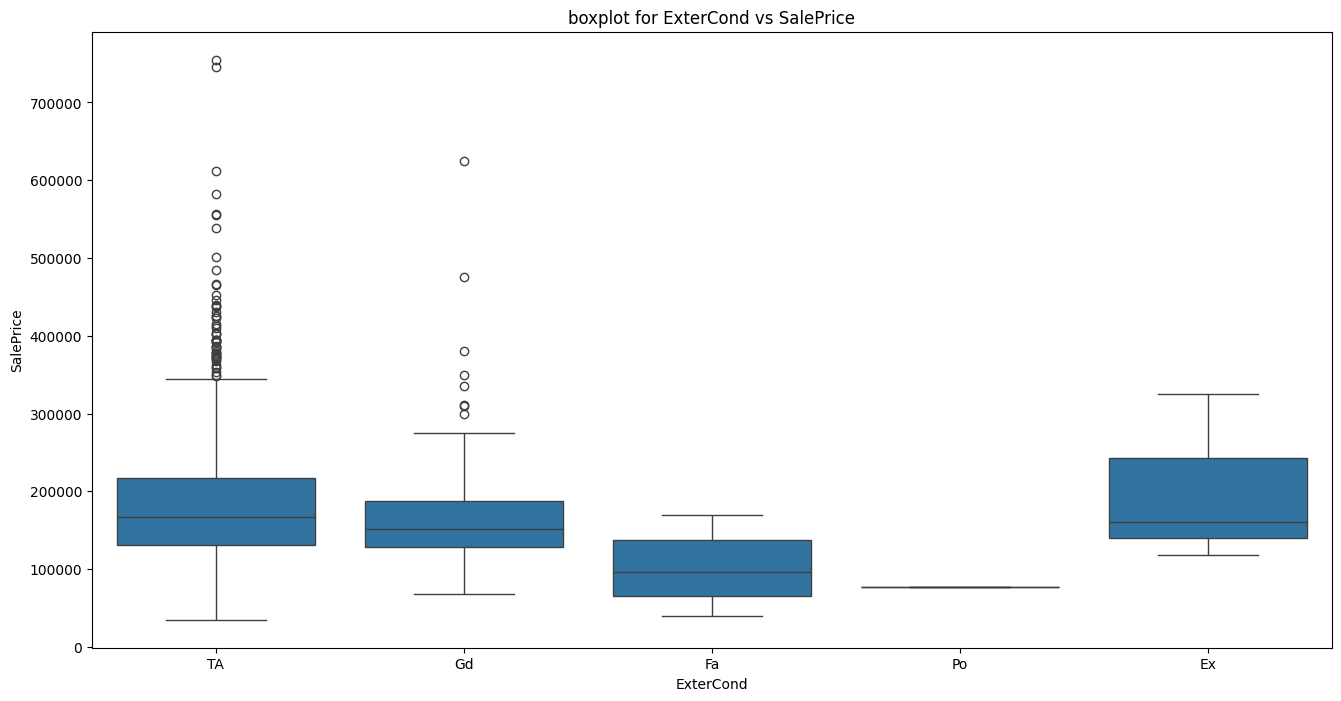

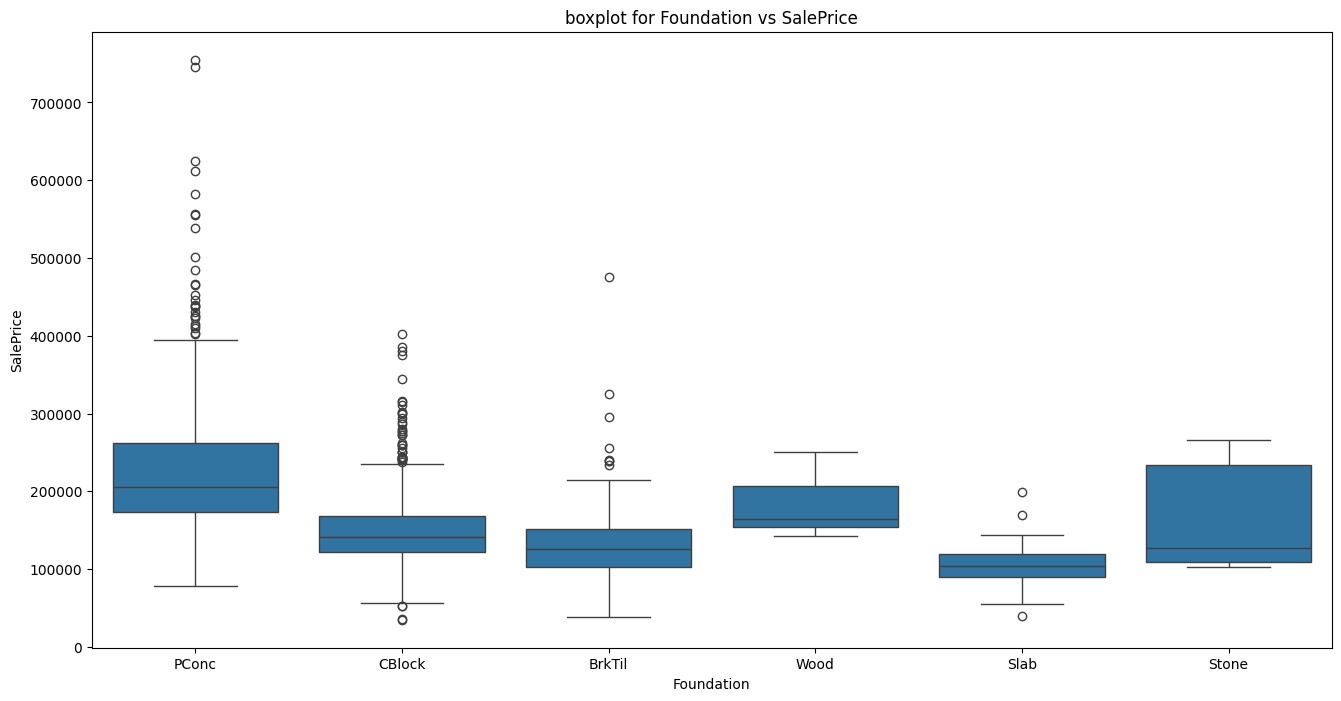

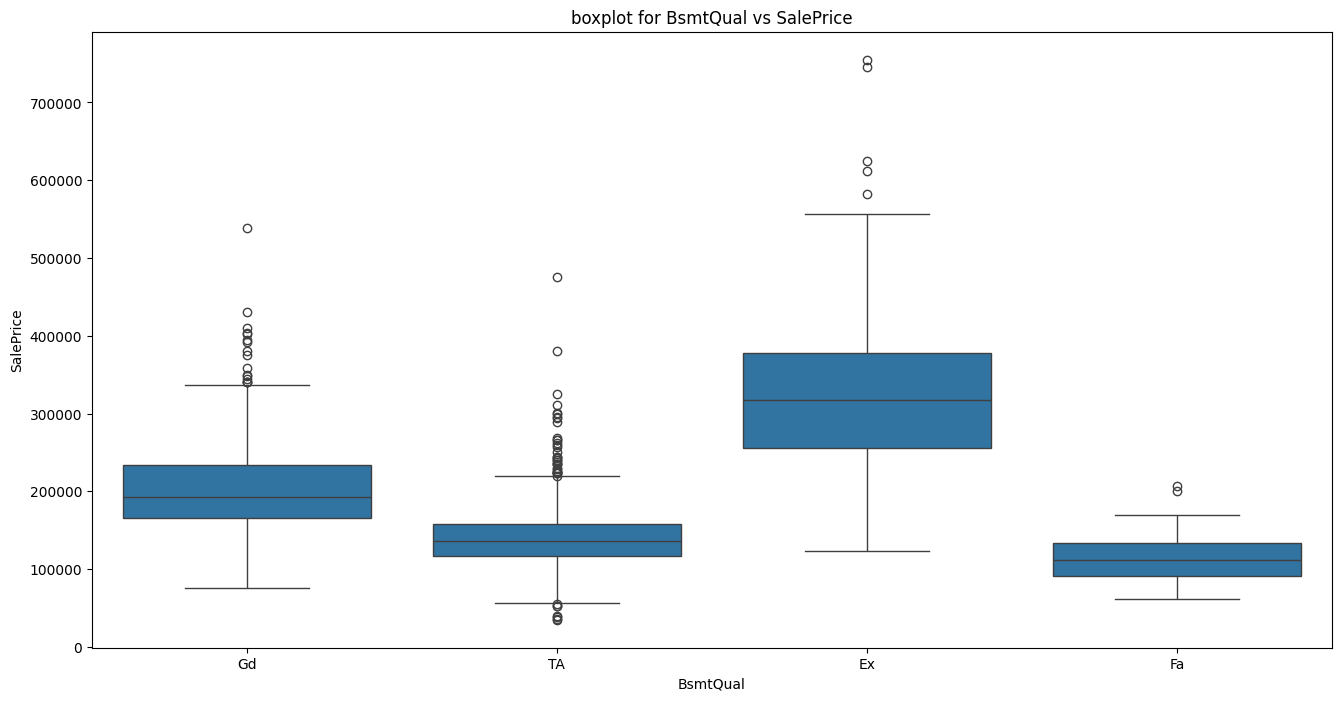

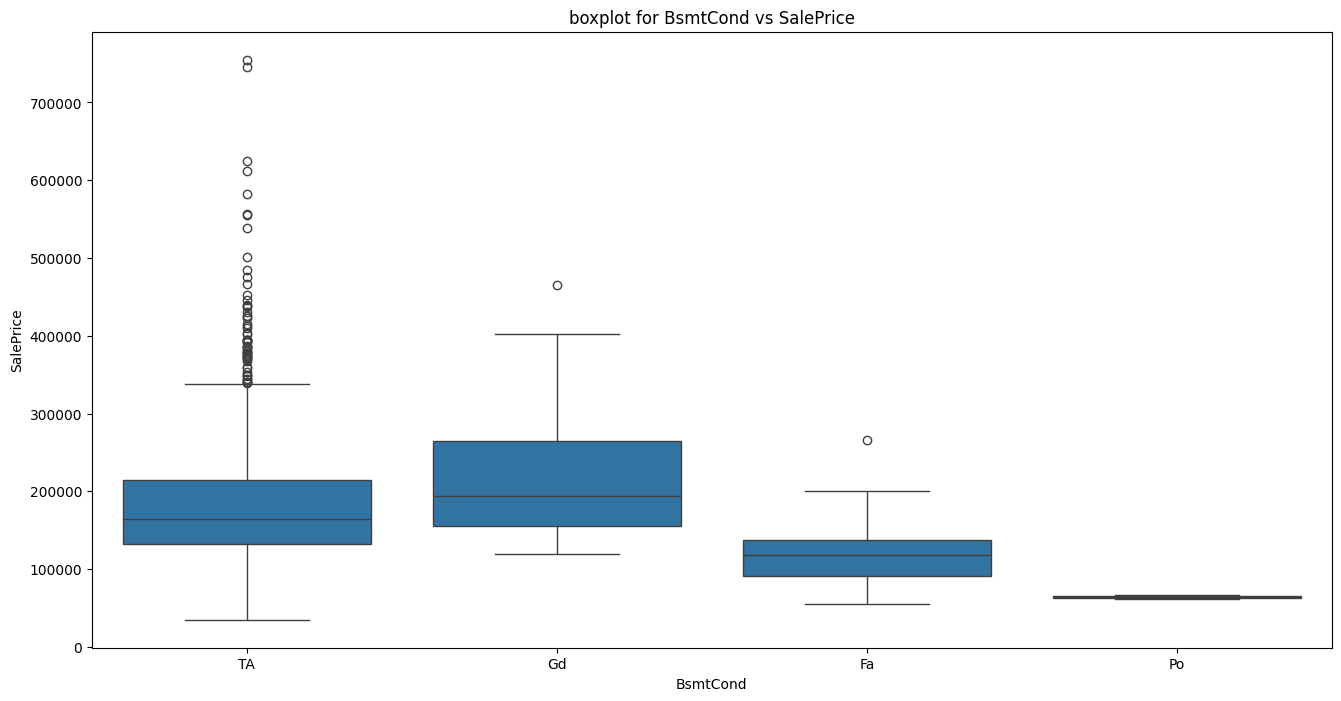

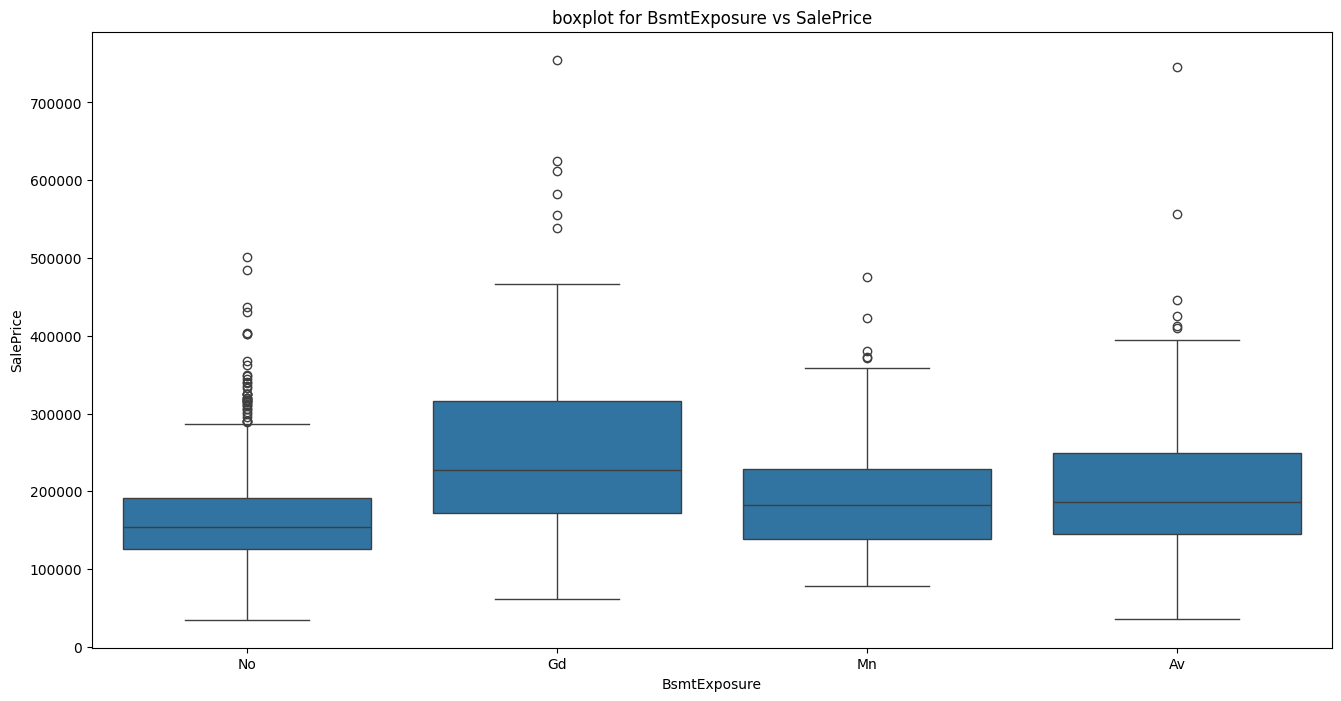

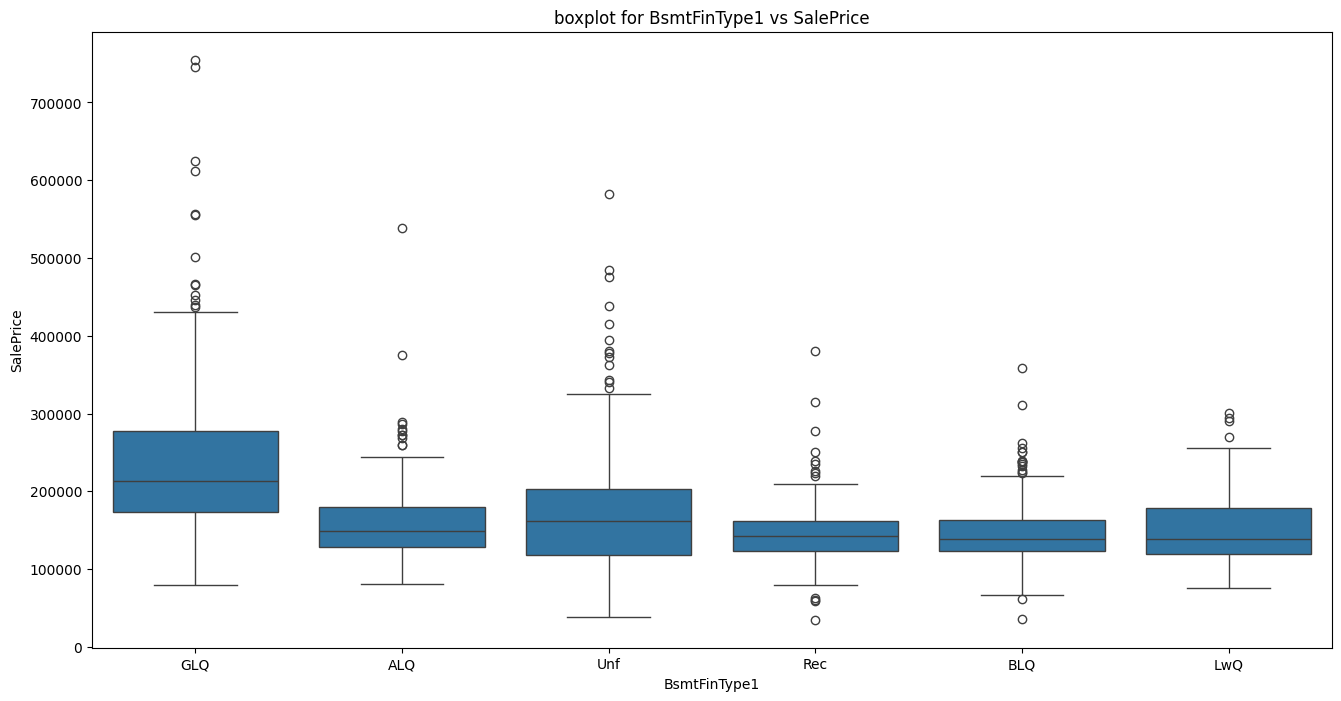

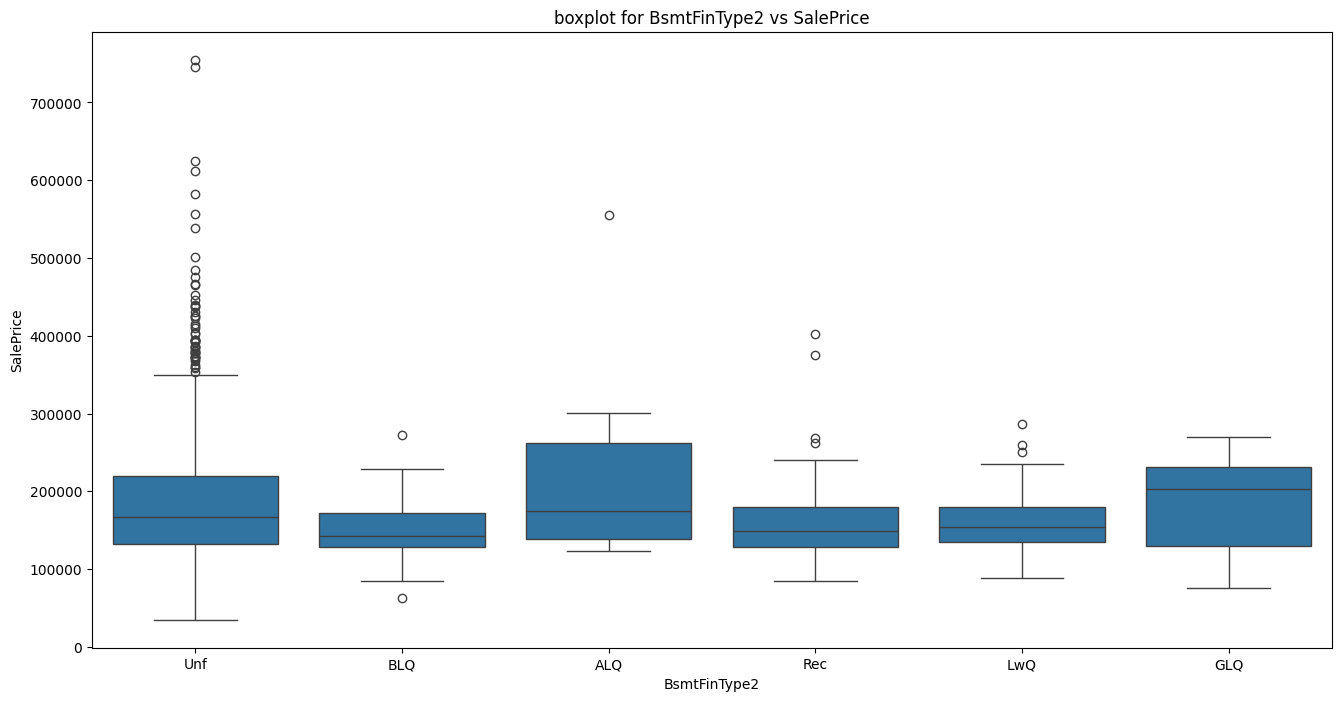

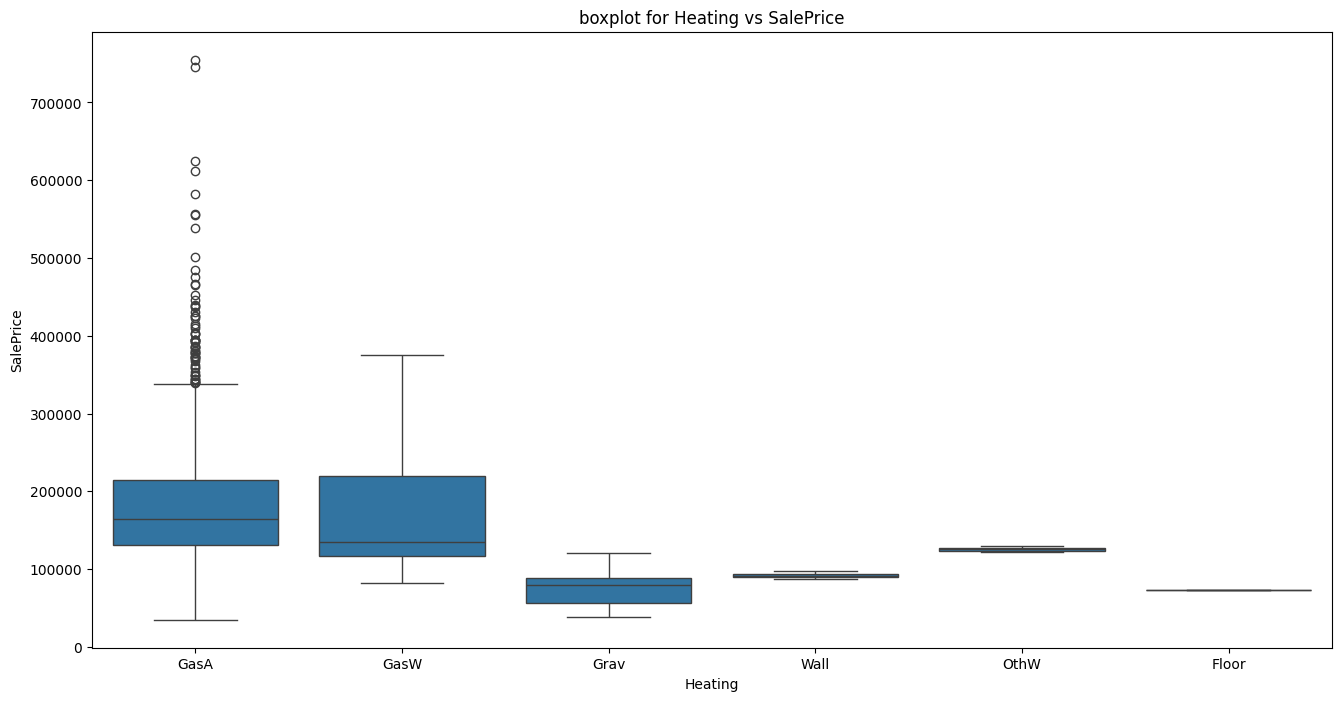

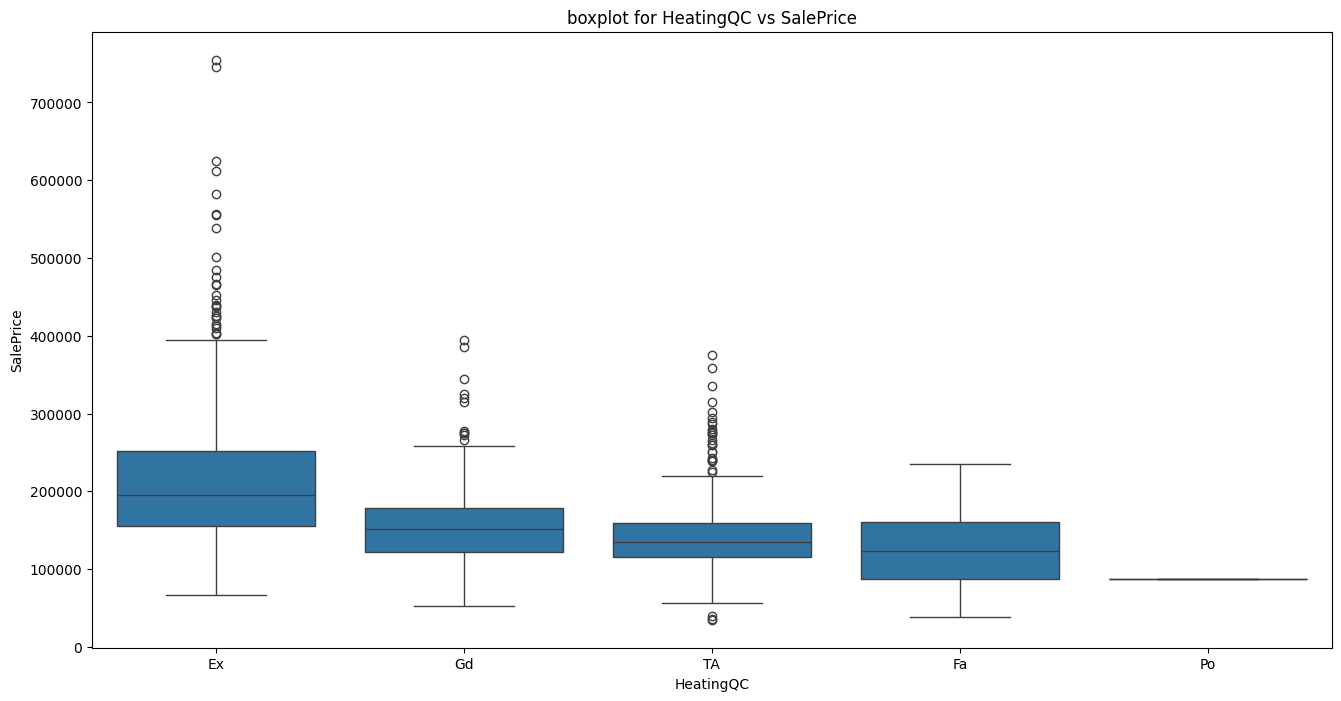

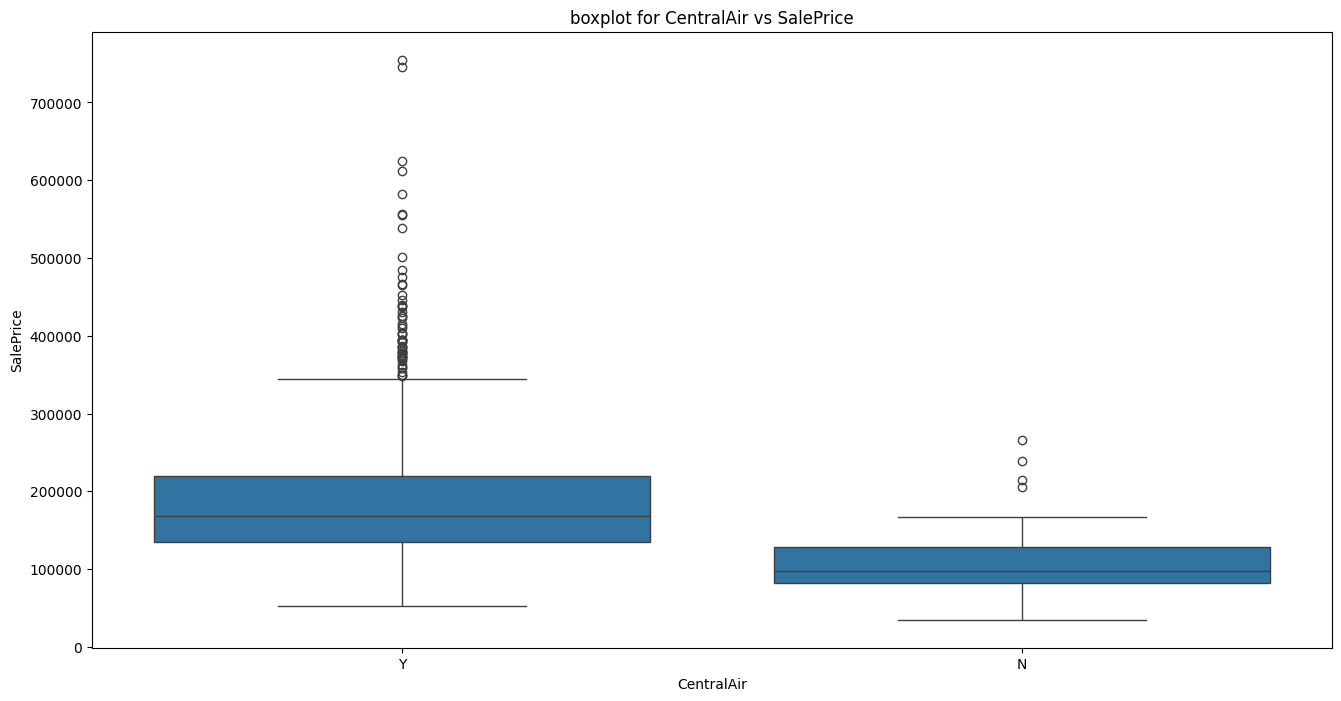

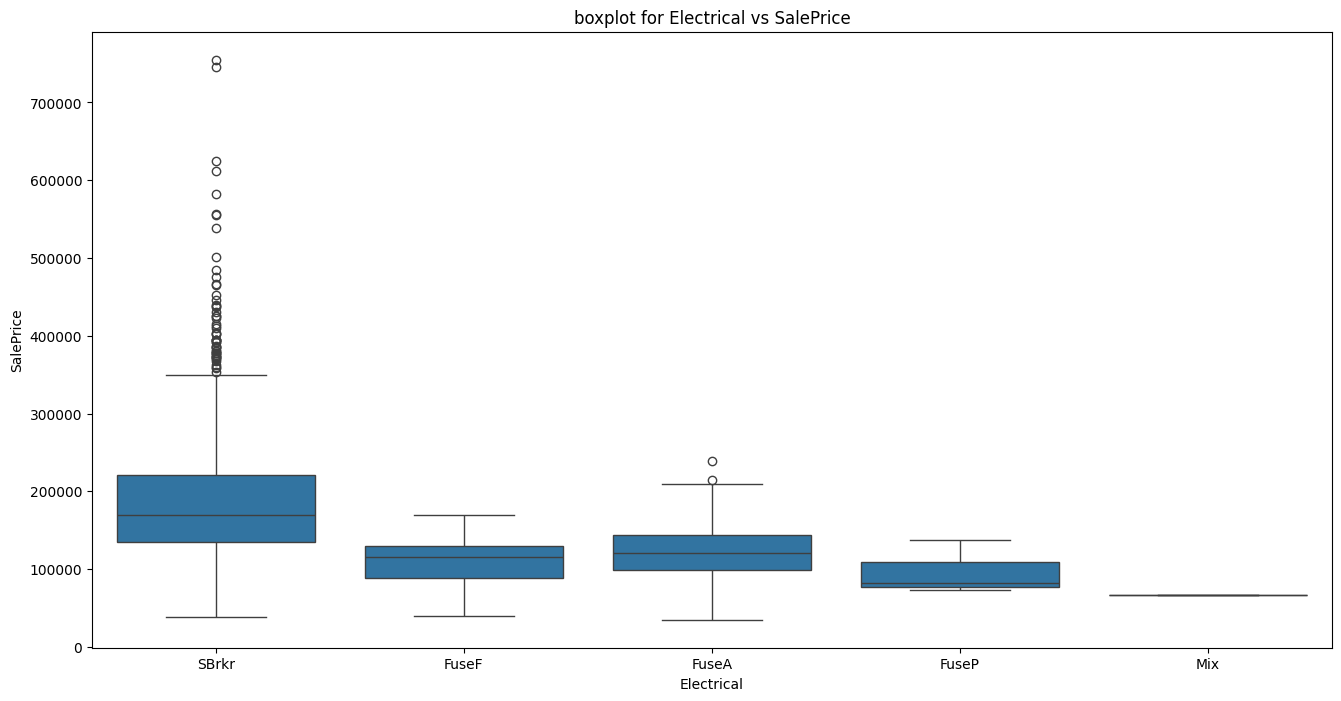

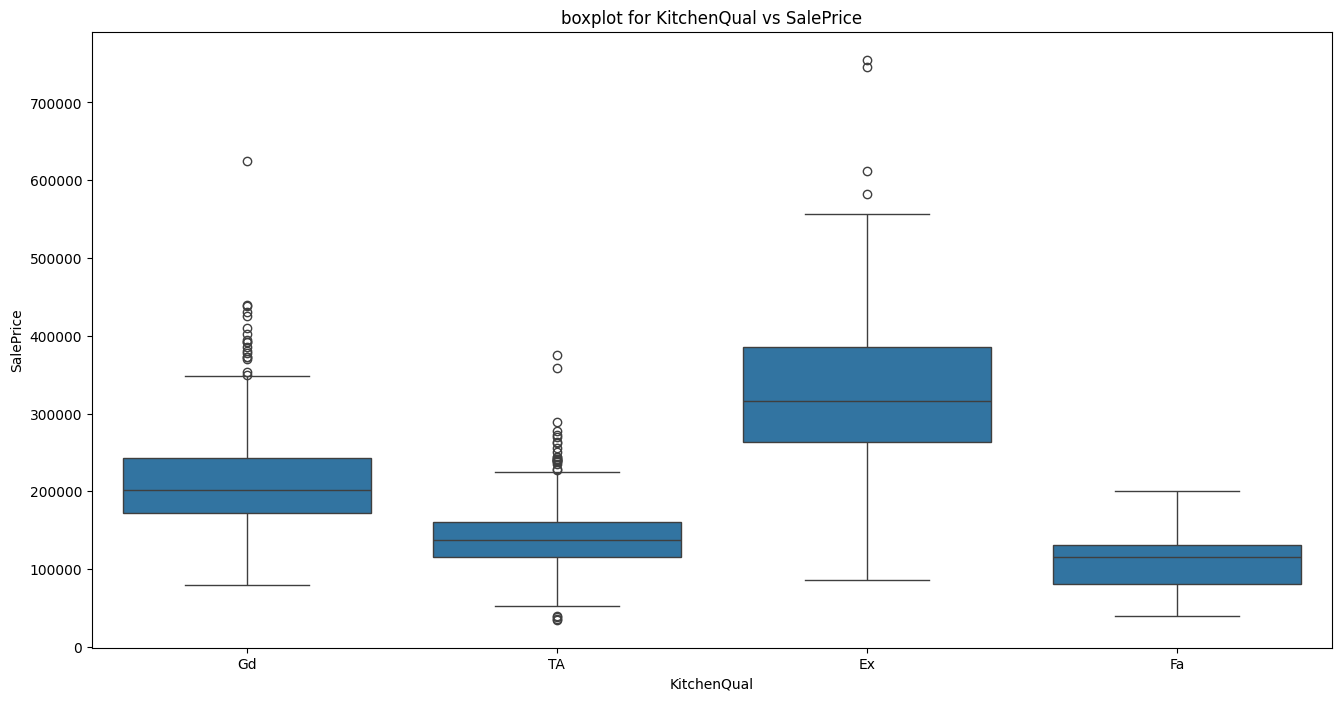

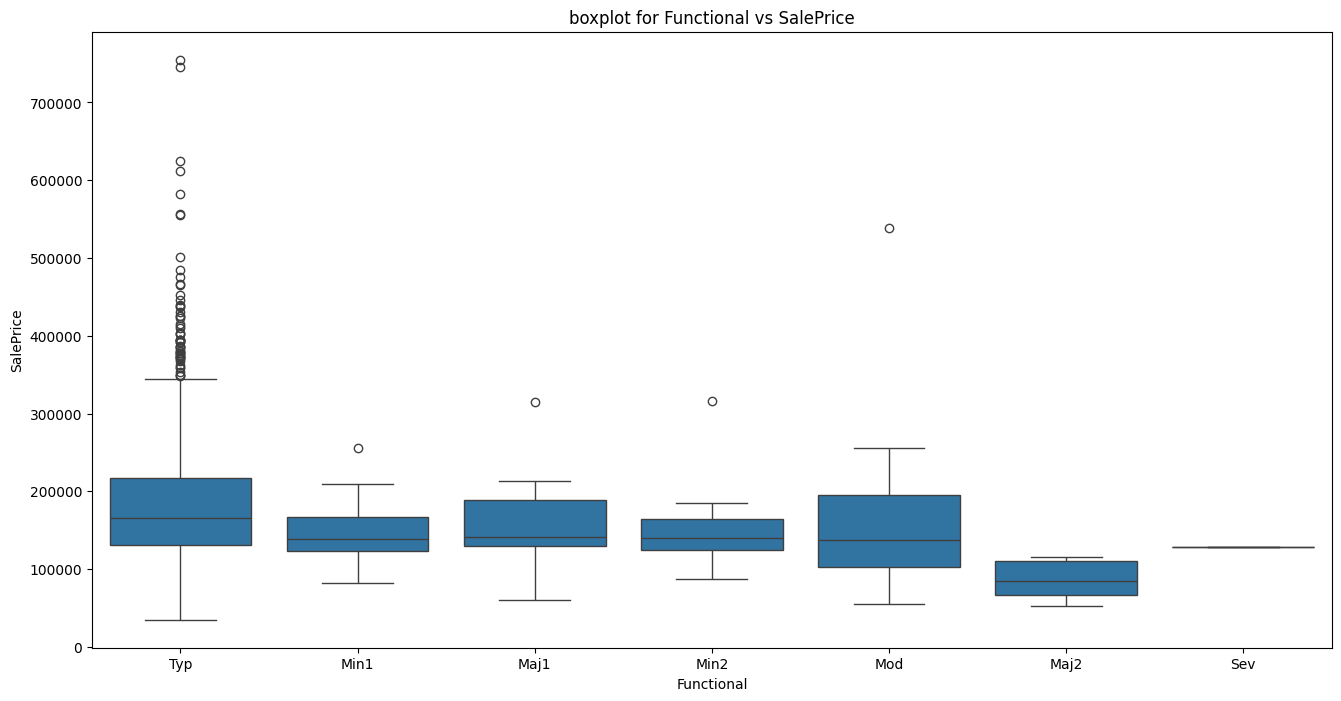

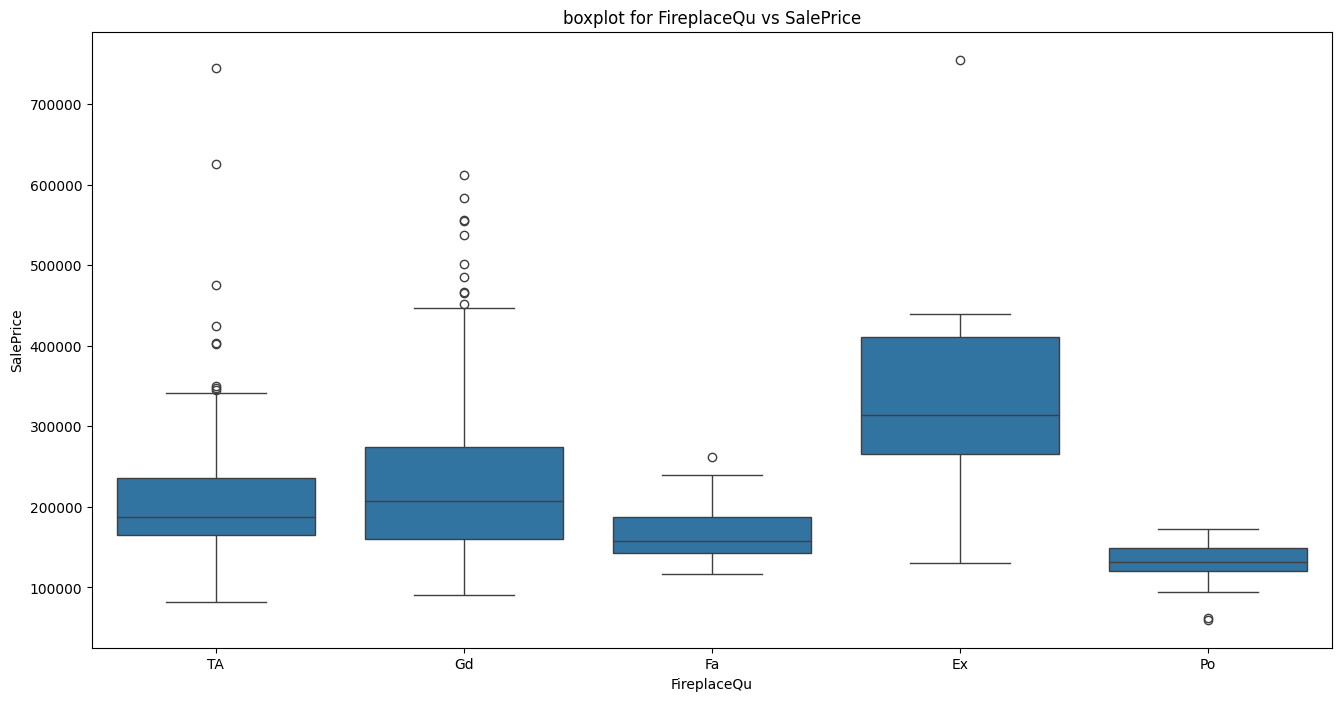

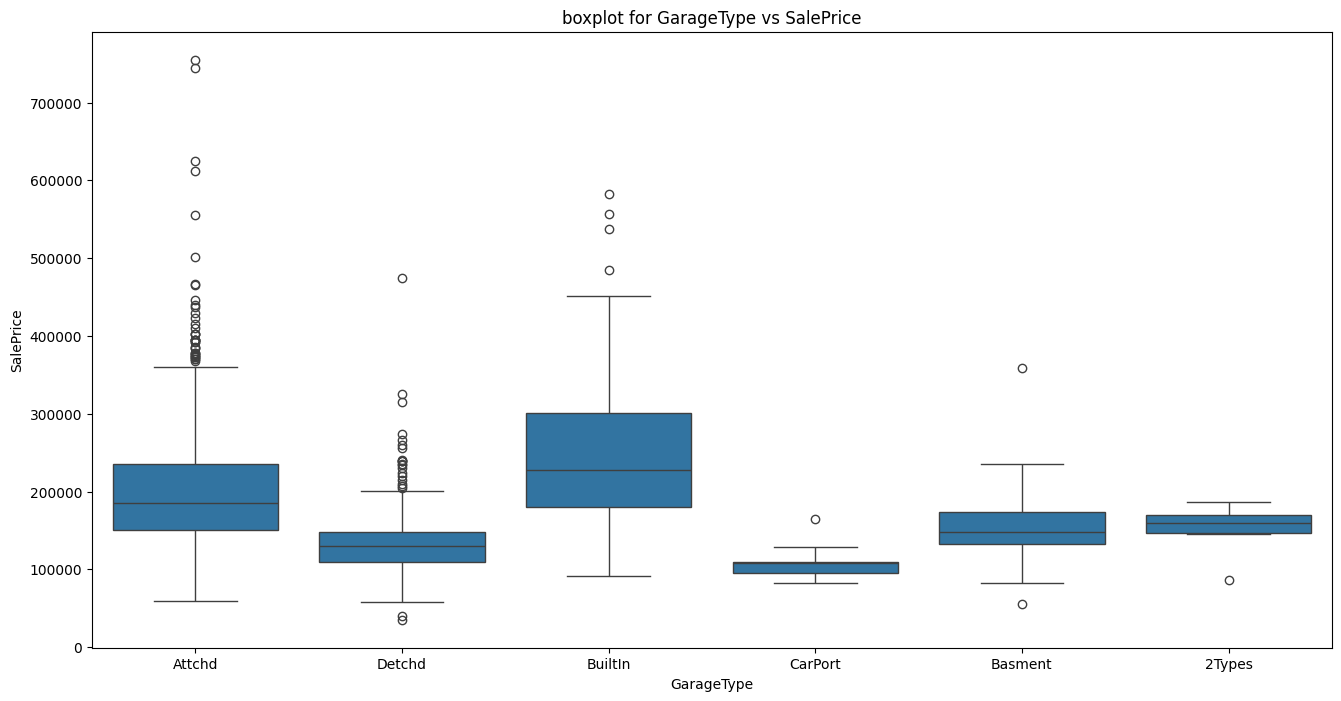

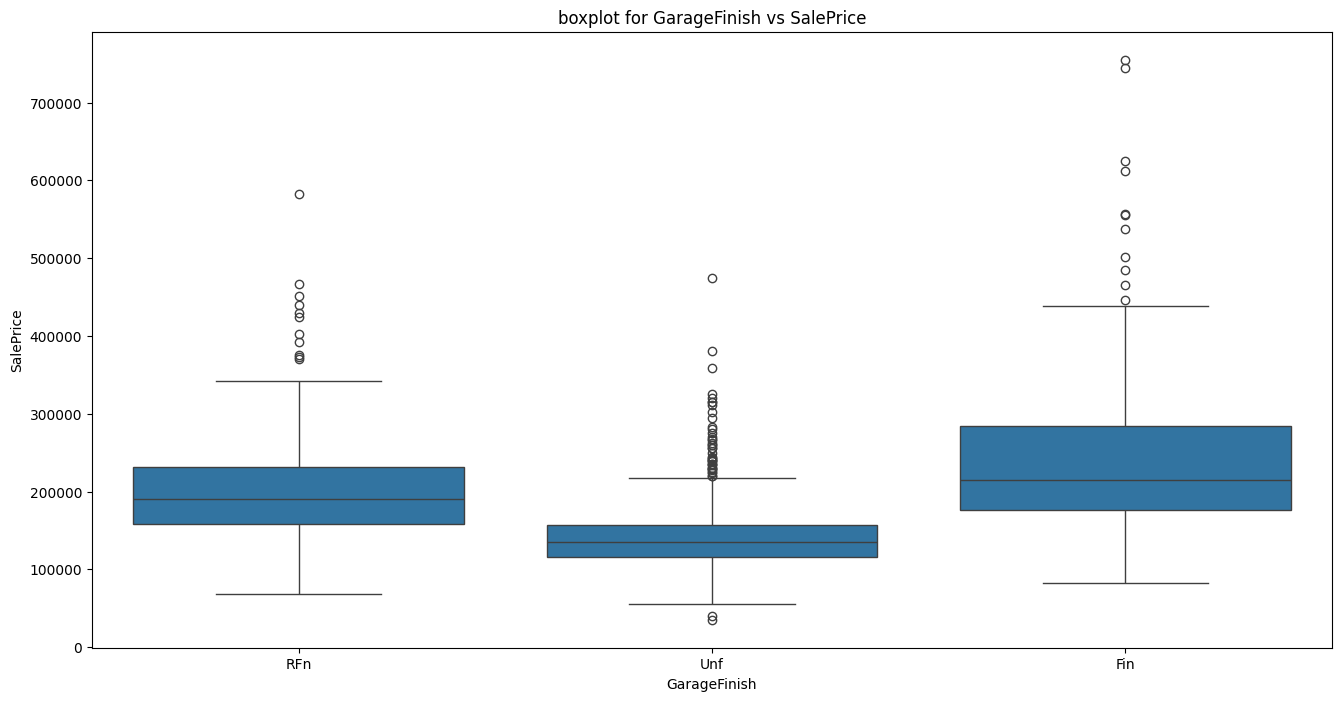

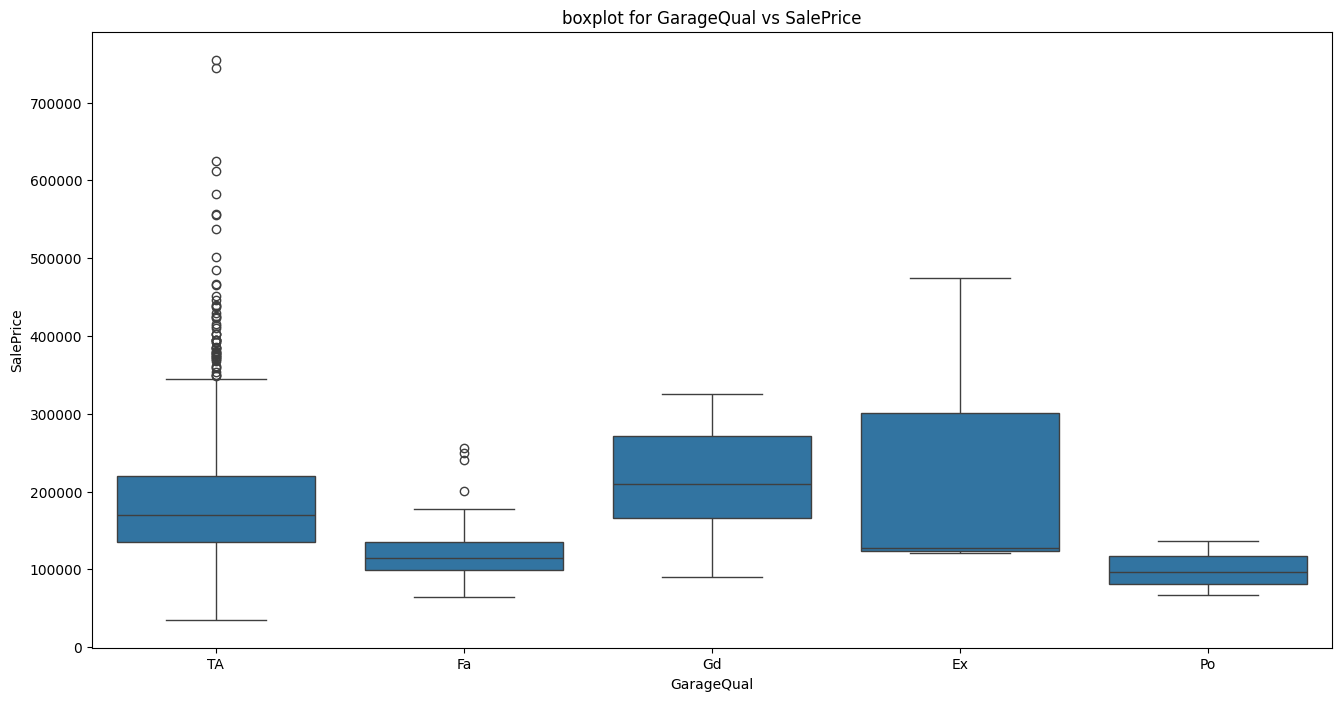

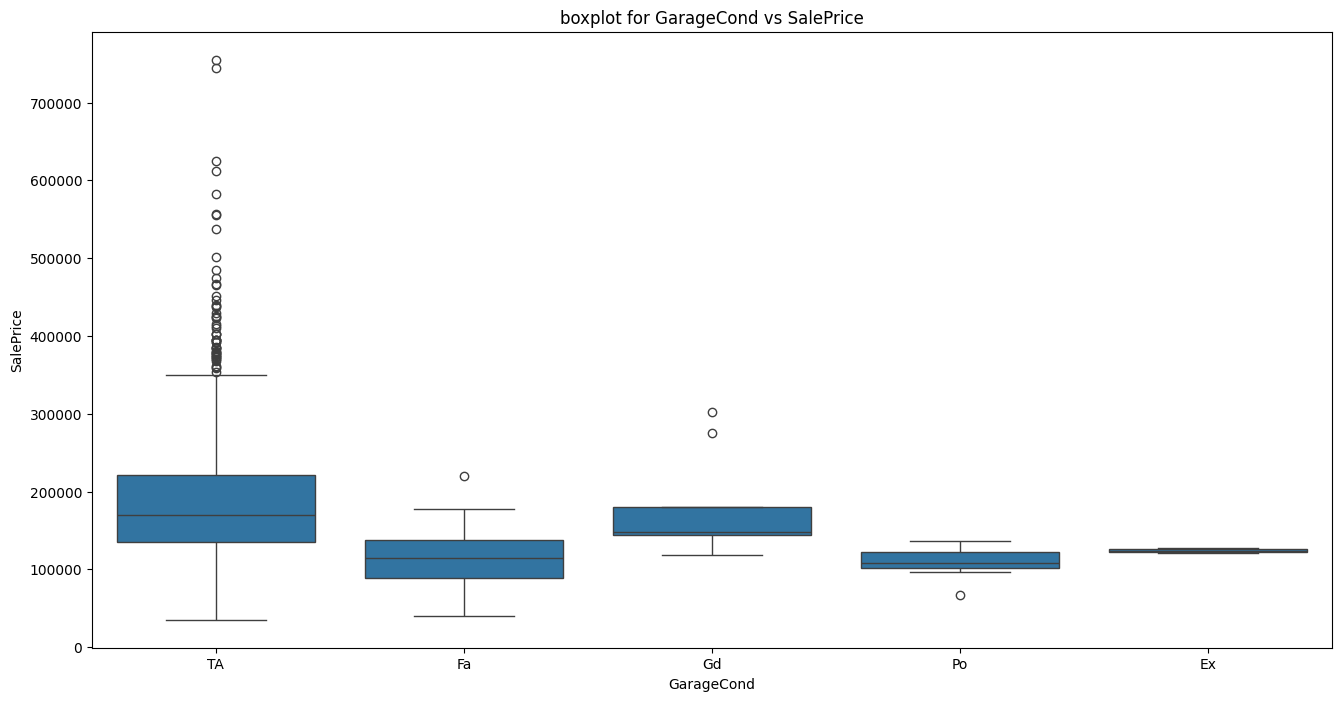

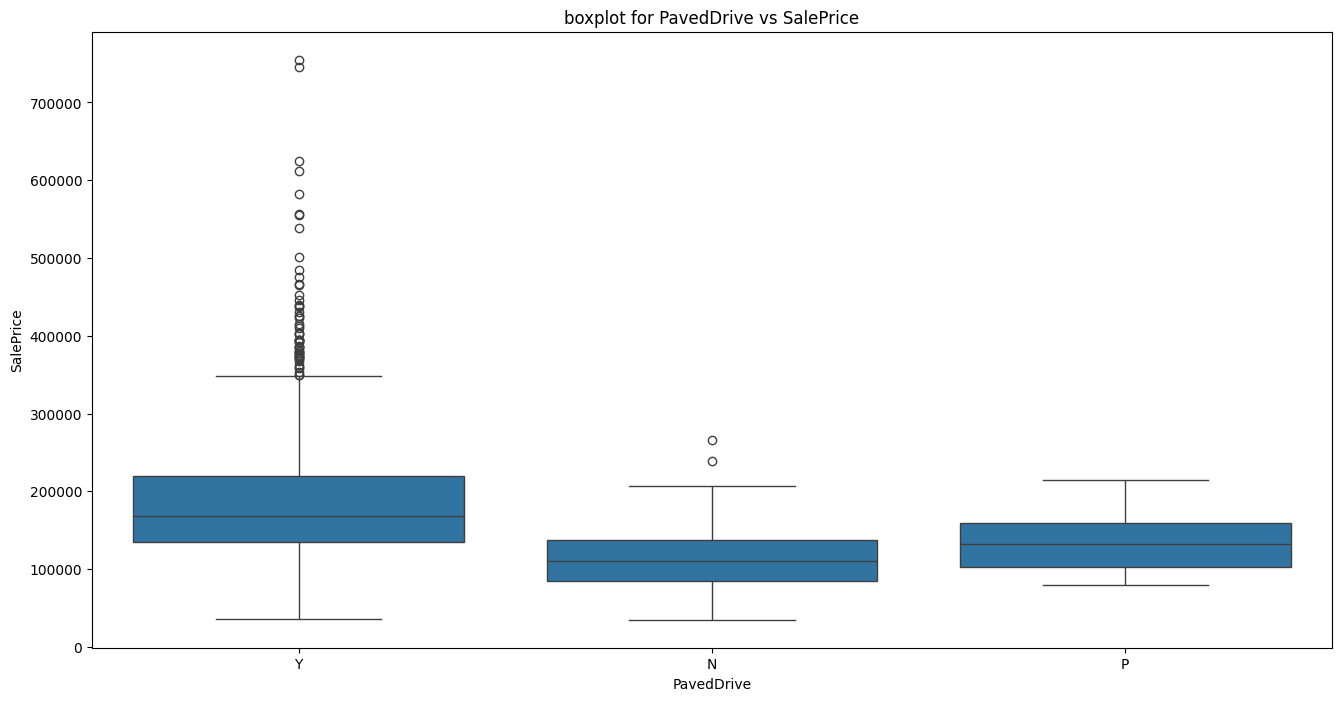

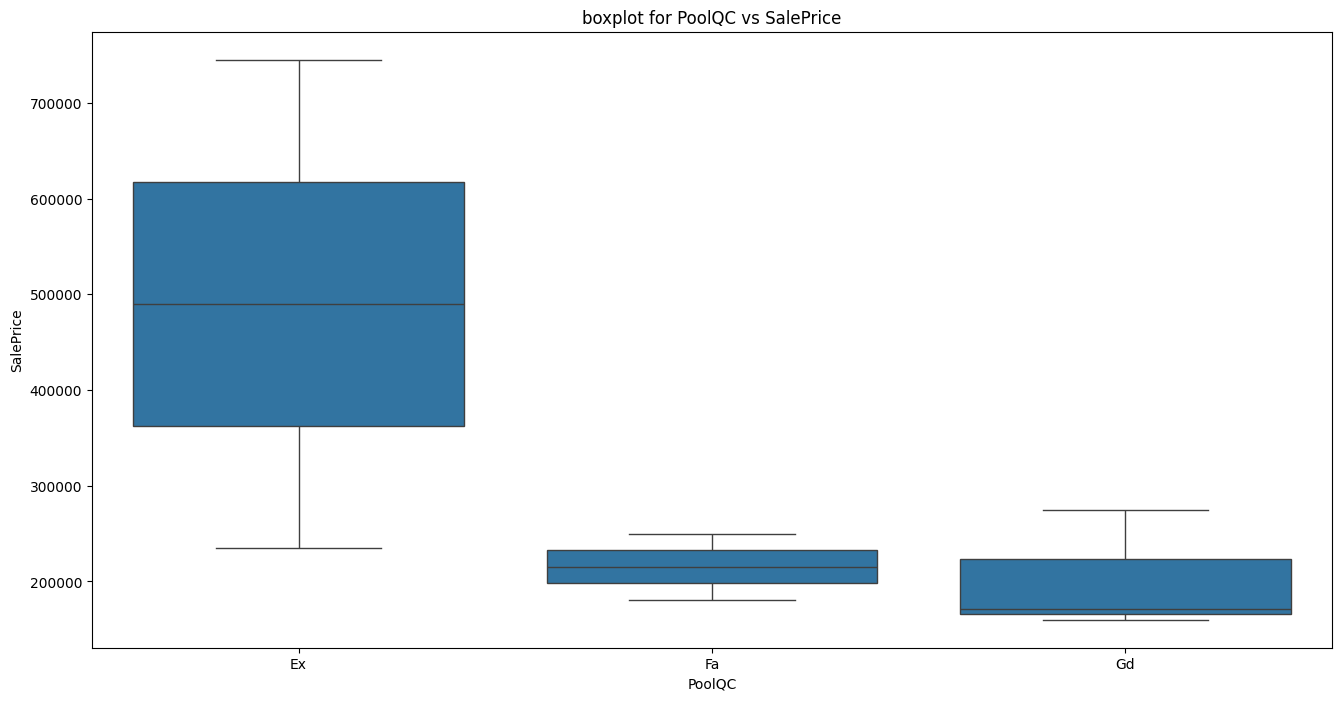

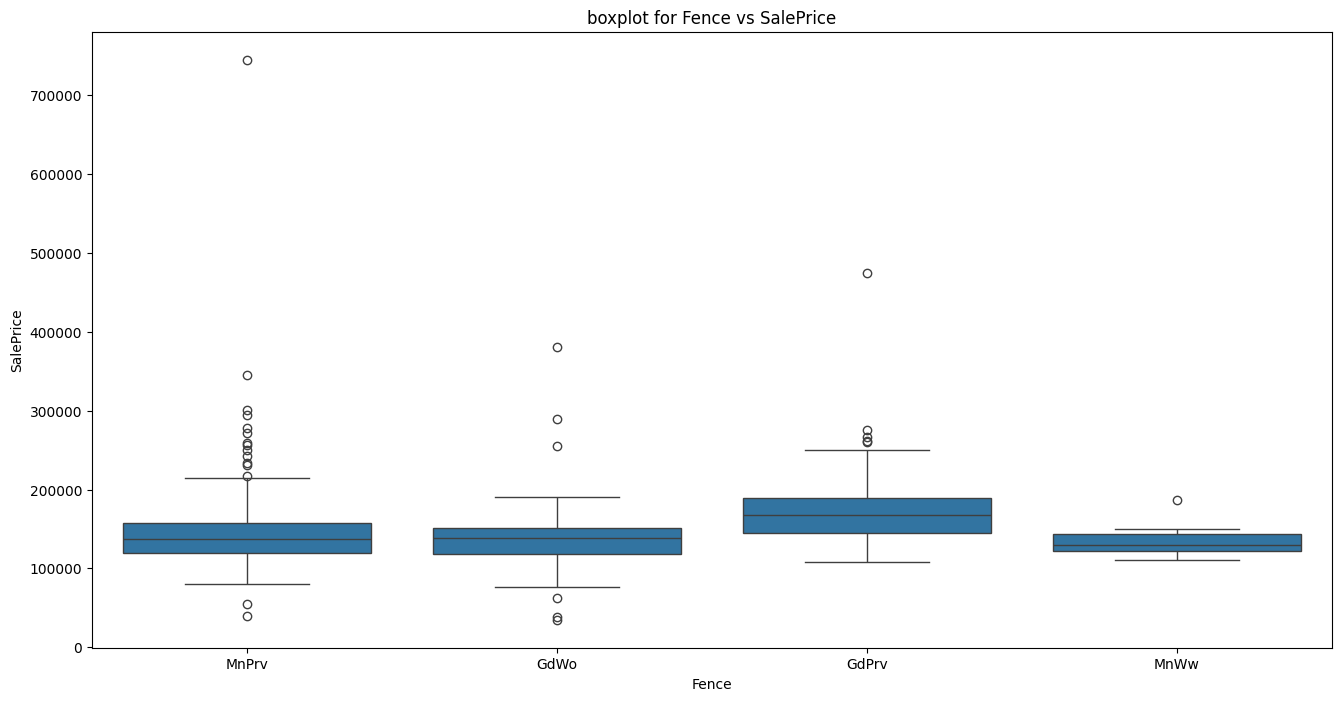

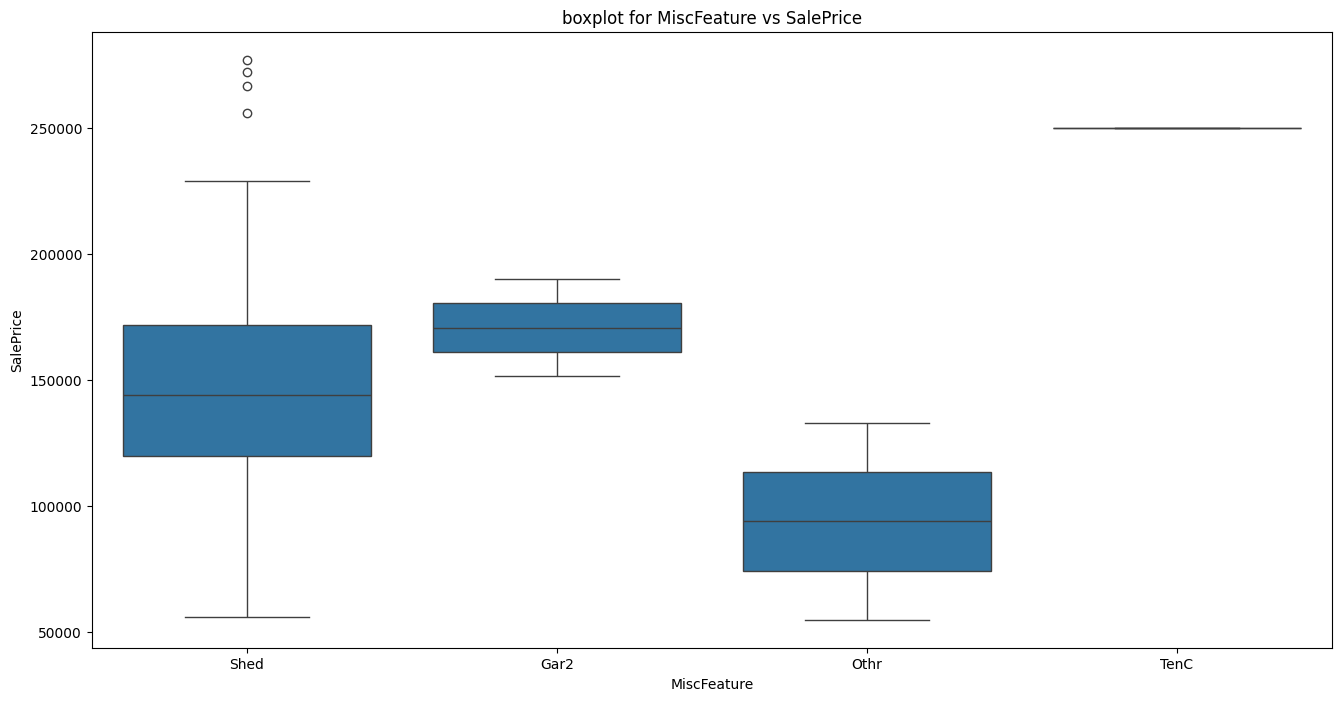

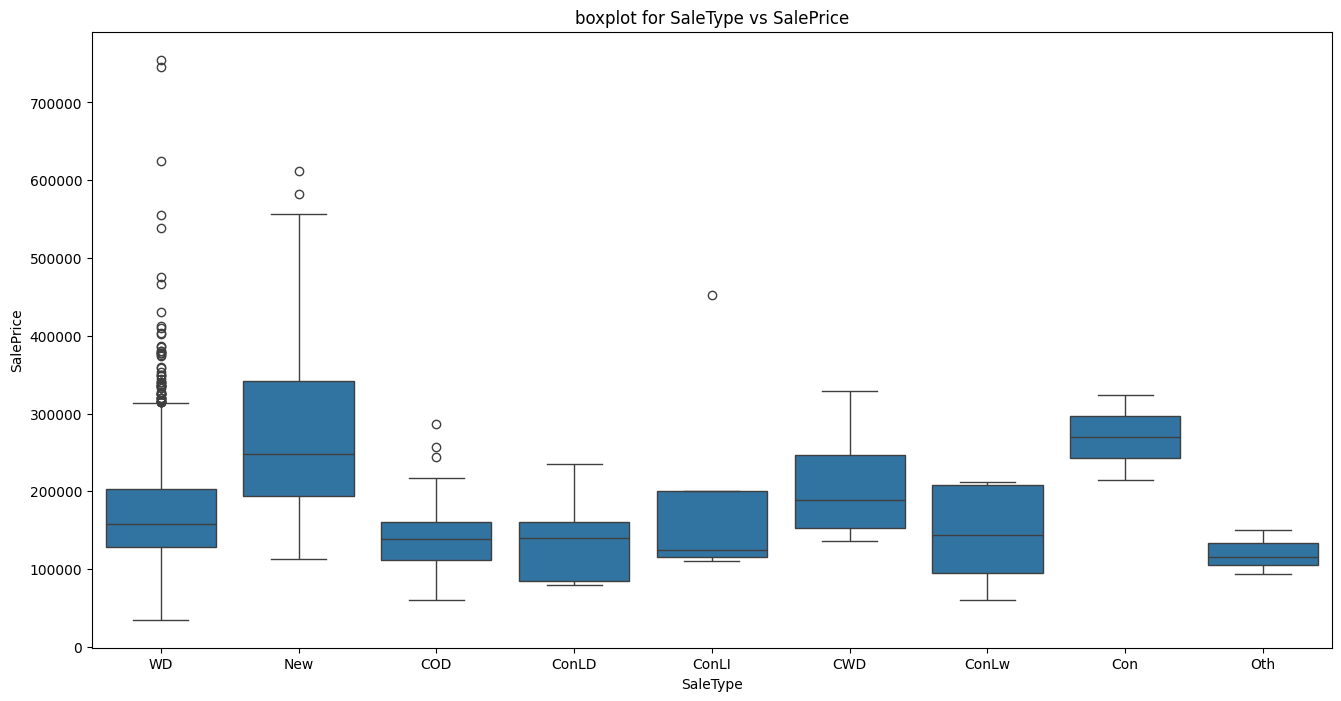

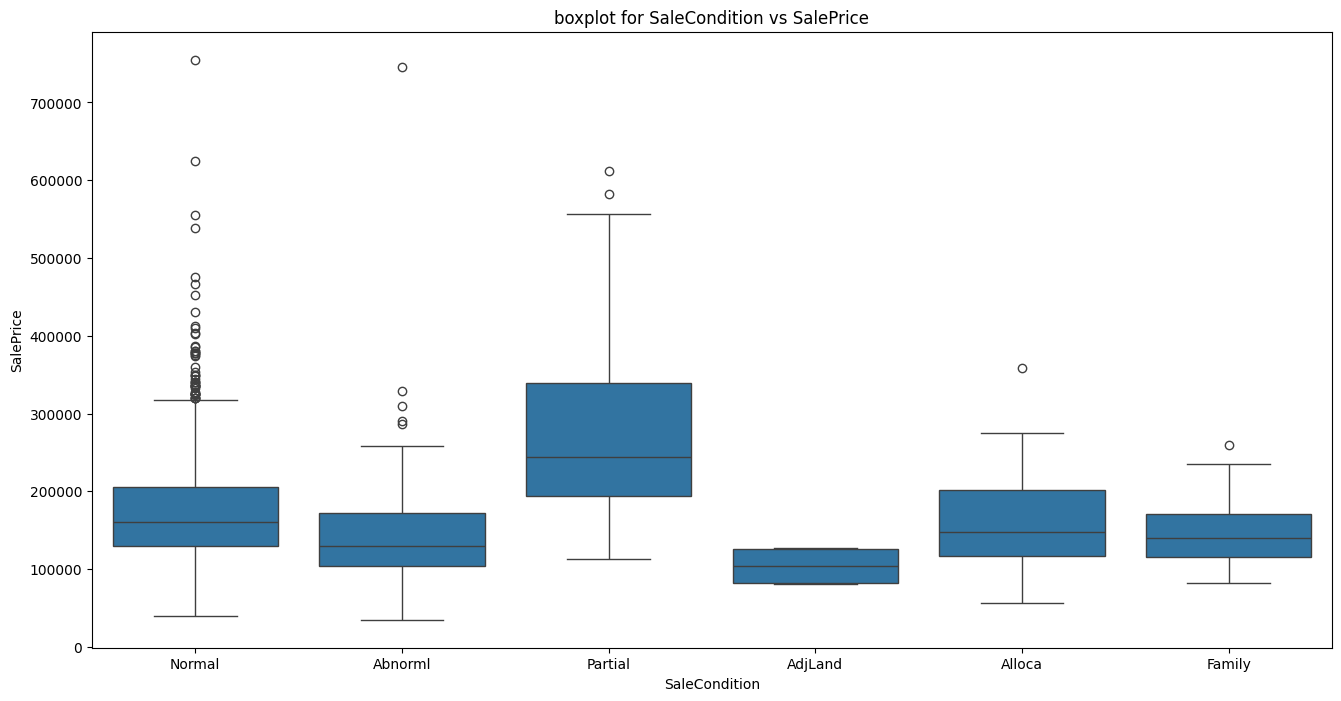

In [16]:
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x=i , y ='SalePrice')
    plt.title(f'boxplot for {i} vs SalePrice')
    plt.show()

##### CROSSTAB HEATMAP FOR CATEGORICAL VS CATEGORICAL FEATURES

In [17]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
ctab1 = pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab1

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

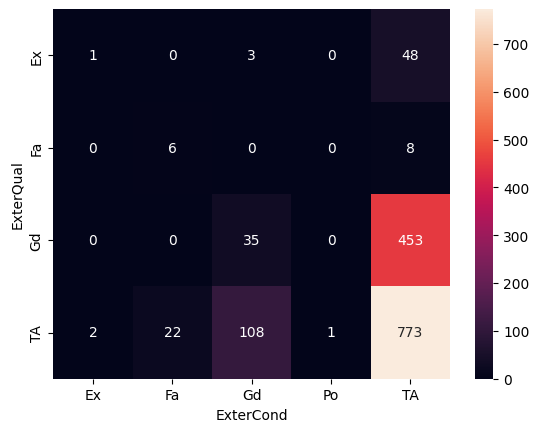

In [19]:
sns.heatmap(ctab1, fmt='d', annot=True)

In [20]:
ctab2 = pd.crosstab(df['RoofMatl'], df['RoofStyle'])
ctab2

RoofStyle  Flat  Gable  Gambrel  Hip  Mansard  Shed
RoofMatl                                           
ClyTile       0      0        0    1        0     0
CompShg       1   1134       11  282        5     1
Membran       1      0        0    0        0     0
Metal         1      0        0    0        0     0
Roll          0      1        0    0        0     0
Tar&Grv      10      1        0    0        0     0
WdShake       0      0        0    2        2     1
WdShngl       0      5        0    1        0     0

<Axes: xlabel='RoofStyle', ylabel='RoofMatl'>

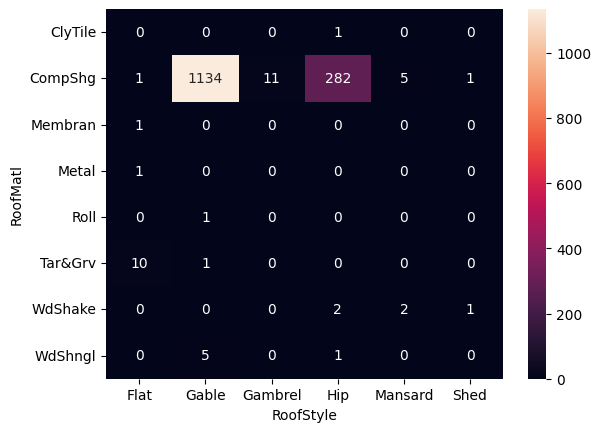

In [21]:
sns.heatmap(ctab2, fmt='d', annot=True)

### PERFORMING MACHINE LEARNING ALGORITHMS 

In [22]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### SEPERATING X and Y 

In [23]:
x = df.drop(columns=['SalePrice'])
y = df[['SalePrice']]

In [24]:
x.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [25]:
y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

### SEPERATING CAT AND CON FEATURES FOR X

In [26]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

### CREATING FEATURE SELECTION PIPELINE

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [28]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])


cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailabe')),
('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
('cat', cat_pipe1, cat)])

In [29]:
x_pre = pre1.fit_transform(x)
x_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  1.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  1.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  3.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  1.        ,
         8.        ,  4.        ]])

In [30]:
columns = pre1.get_feature_names_out()
columns

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning',
       'cat__Street', 'cat__Alley', 'cat__LotShape', 'cat__LandContour',
       'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope',
       'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2',
       'cat__BldgTy

In [31]:
x_pre = pd.DataFrame(x_pre, columns=columns)
x_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.220875     -0.207142          0.651479   
1        -0.872563          0.460320     -0.091886         -0.071836   
2         0.073375         -0.084636      0.073480          0.651479   
3         0.309859         -0.447940     -0.096897          0.651479   
4         0.073375          0.641972      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.514104   
1          2.179628        0.156734          -0.429577        -0.570750   
2         -0.517200        0.984752           0.830215         0.325915   
3         -0.517200       -1.863632          -0.720298        -0.570750   
4         -0.517200        0.951632           0.733308         1.366489   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  cat__GarageFinish  \
0         0.575425        -0.288653  ...              1.0                2.0   
1         1.171992        -0.288653  ...              1.0                2.0   
2         0.092907        -0.288653  ...              1.0                2.0   
3        -0.499274        -0.288653  ...              5.0                3.0   
4         0.463568        -0.288653  ...              1.0                2.0   

   cat__GarageQual  cat__GarageCond  cat__PavedDrive  cat__PoolQC  cat__Fence  \
0              5.0              5.0              2.0          3.0         4.0   
1              5.0              5.0              2.0          3.0         4.0   
2              5.0              5.0              2.0          3.0         4.0   
3              5.0              5.0              2.0          3.0         4.0   
4              5.0              5.0              2.0          3.0         4.0   

   cat__MiscFeature  cat__SaleType  cat__SaleCondition  
0               1.0            8.0                 4.0  
1               1.0            8.0                 4.0  
2               1.0            8.0                 4.0  
3               1.0            8.0                 0.0  
4               1.0            8.0                 4.0  

[5 rows x 79 columns]

### PERFORMING FEATURE SELECTION WITH LINER REGRESSION

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [33]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='backward')
sel_features = sel.fit_transform(x_pre, y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__EnclosedPorch', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__MSZoning',
       'cat__LandContour', 'cat__BldgType', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__Foundation', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__BsmtFinType1',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__GarageFinish', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [34]:
len(sel_cols)

40

In [35]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [36]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [37]:
imp_cols = []
for i in sel_cols:
    col = i.split('__')[1]
    imp_cols.append(col)

In [38]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning',
 'LandContour',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [39]:
x_sel = x[imp_cols]
x_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0             60     8450            7            5       2003       196.0   
1             20     9600            6            8       1976         0.0   
2             60    11250            7            5       2001       162.0   
3             70     9550            7            5       1915         0.0   
4             60    14260            8            5       2000       350.0   
...          ...      ...          ...          ...        ...         ...   
1455          60     7917            6            5       1999         0.0   
1456          20    13175            6            6       1978       119.0   
1457          70     9042            7            9       1941         0.0   
1458          20     9717            5            6       1950         0.0   
1459          20     9937            5            6       1965         0.0   

      BsmtFinSF2  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  BsmtCond  \
0              0       856       854             0  ...        TA   
1              0      1262         0             0  ...        TA   
2              0       920       866             0  ...        TA   
3              0       961       756             0  ...        Gd   
4              0      1145      1053             0  ...        TA   
...          ...       ...       ...           ...  ...       ...   
1455           0       953       694             0  ...        TA   
1456         163      2073         0             0  ...        TA   
1457           0      1188      1152             0  ...        Gd   
1458        1029      1078         0             0  ...        TA   
1459         290      1256         0             0  ...        TA   

      BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  Functional  \
0               No           GLQ         Ex           Gd         Typ   
1               Gd           ALQ         Ex           TA         Typ   
2               Mn           GLQ         Ex           Gd         Typ   
3               No           ALQ         Gd           Gd         Typ   
4               Av           GLQ         Ex           Gd         Typ   
...            ...           ...        ...          ...         ...   
1455            No           Unf         Ex           TA         Typ   
1456            No           ALQ         TA           TA        Min1   
1457            No           GLQ         Ex           Gd         Typ   
1458            Mn           GLQ         Gd           Gd         Typ   
1459            No           BLQ         Gd           TA         Typ   

      GarageFinish  PavedDrive  MiscFeature  SaleCondition  
0              RFn           Y          NaN         Normal  
1              RFn           Y          NaN         Normal  
2              RFn           Y          NaN         Normal  
3              Unf           Y          NaN        Abnorml  
4              RFn           Y          NaN         Normal  
...            ...         ...          ...            ...  
1455           RFn           Y          NaN         Normal  
1456           Unf           Y          NaN         Normal  
1457           RFn           Y         Shed         Normal  
1458           Unf           Y          NaN         Normal  
1459           Fin           Y          NaN         Normal  

[1460 rows x 40 columns]

### CREATING A FINAL PIPELINE

In [40]:
cat_sel = list(x_sel.columns[x_sel.dtypes=='object'])
con_sel = list(x_sel.columns[x_sel.dtypes!='object'])

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailabe')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [43]:
x_sel_pre = pre2.fit_transform(x_sel).toarray()
x_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__EnclosedPorch', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__MSZoning_C (all)',
       'cat__MSZoning_FV', 'cat__MSZoning_RH', 'cat__MSZoning_RL',
       'cat__MSZoning_RM', 'cat__LandContour_Bnk', 'cat__LandContour_HLS',
       'cat__LandContour_Low', 'cat__LandContour_Lvl',
       'cat__BldgType_1Fam', 'cat__BldgType_2fmCon',
       'cat__BldgType_Duplex', 'cat__BldgType_Twnhs',
       'cat__BldgType_TwnhsE', 'cat__HouseStyle_1.5Fin',
       'cat__HouseStyle_1.5Unf', 'cat__HouseStyle_1Story',
       'cat__HouseStyle_2.5Fin', 'cat__HouseStyle_2.5Unf',
       'cat__HouseStyle_2Story', 'cat__HouseStyle_SFoyer',
       'cat

In [45]:
x_sel_pre = pd.DataFrame(x_sel_pre, columns=final_cols)
x_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
0        1.050994         0.514104        -0.288653      -0.793434   
1        0.156734        -0.570750        -0.288653       0.257140   
2        0.984752         0.325915        -0.288653      -0.627826   
3       -1.863632        -0.570750        -0.288653      -0.521734   
4        0.951632         1.366489        -0.288653      -0.045611   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvailabe  \
0       1.161852          -0.120242  ...                           1.0   
1      -0.795163          -0.120242  ...                           1.0   
2       1.189351          -0.120242  ...                           1.0   
3       0.937276          -0.120242  ...                           1.0   
4       1.617877          -0.120242  ...                           1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        0.0                         0.0  
4                        1.0                         0.0  

[5 rows x 135 columns]

### APPLYING TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sel_pre, y, test_size = 0.2, random_state=42)

In [47]:
xtrain.shape

(1168, 135)

In [48]:
xtest.shape

(292, 135)

### CHECKING PERFORMANCE OF LINEAR REGRESSION

In [49]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [50]:
model.score(xtrain, ytrain)

0.8898671273301801

In [51]:
model.score(xtest, ytest)

-8599298298461072.0

In [52]:
from PERSONAL_FUNCTIONS import evaluate_model
evaluate_model(xtrain, ytrain, xtest, ytest, model)

Training Results : 
MSE : 656893067.51
RMSE: 25629.93
MAE : 15925.62
R2  : 0.8899


Testing Results : 
MSE : 65959423102105621438136320.00
RMSE: 8121540685245.97
MAE : 515166002392.69
R2  : -8599298298461072.0000


### APPLYING RIDGE WITH CROSS VALIDATION

In [53]:
import numpy as np
params = {'alpha': np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [55]:
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [56]:
gscv1.best_params_

{'alpha': 26.800000000000004}

In [57]:
gscv1.best_score_

-1137707206.9178119

In [58]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=26.800000000000004)

In [59]:
best_ridge.score(xtrain, ytrain)

0.8572510095612547

In [60]:
best_ridge.score(xtest, ytest)

0.8629227809645952

In [61]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_ridge)

Training Results : 
MSE : 851433545.13
RMSE: 29179.33
MAE : 17151.25
R2  : 0.8573


Testing Results : 
MSE : 1051426985.58
RMSE: 32425.71
MAE : 19884.70
R2  : 0.8629


### APPLYING ON LASSO MODEL

In [62]:
from sklearn.linear_model import Lasso

In [63]:
params2 = {'alpha' : np.arange(180, 200, 0.1)}

In [64]:
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid = params2, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([180. , 180.1, 180.2, 180.3, 180.4, 180.5, 180.6, 180.7, 180.8,
       180.9, 181. , 181.1, 181.2, 181.3, 181.4, 181.5, 181.6, 181.7,
       181.8, 181.9, 182. , 182.1, 182.2, 182.3, 182.4, 182.5, 182.6,
       182.7, 182.8, 182.9, 183. , 183.1, 183.2, 183.3, 183.4, 183.5,
       183.6, 183.7, 183.8, 183.9, 184. , 184.1, 184.2, 184.3, 184.4,
       184.5, 184.6, 184.7, 184....
       194.4, 194.5, 194.6, 194.7, 194.8, 194.9, 195. , 195.1, 195.2,
       195.3, 195.4, 195.5, 195.6, 195.7, 195.8, 195.9, 196. , 196.1,
       196.2, 196.3, 196.4, 196.5, 196.6, 196.7, 196.8, 196.9, 197. ,
       197.1, 197.2, 197.3, 197.4, 197.5, 197.6, 197.7, 197.8, 197.9,
       198. , 198.1, 198.2, 198.3, 198.4, 198.5, 198.6, 198.7, 198.8,
       198.9, 199. , 199.1, 199.2, 199.3, 199.4, 199.5, 199.6, 199.7,
       199.8, 199.9])},
             scoring='neg_mean_squared_error')

In [65]:
gscv2.best_params_

{'alpha': 180.0}

In [66]:
gscv2.best_score_

-1115252519.7347589

In [67]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=180.0)

In [68]:
best_lasso.score(xtrain, ytrain)

0.8748813210449989

In [69]:
best_lasso.score(xtest,ytest)

0.8688098225408898

In [70]:
evaluate_model(xtrain,ytrain, xtest, ytest, best_ridge)

Training Results : 
MSE : 851433545.13
RMSE: 29179.33
MAE : 17151.25
R2  : 0.8573


Testing Results : 
MSE : 1051426985.58
RMSE: 32425.71
MAE : 19884.70
R2  : 0.8629


#### SELECTING BEST LASSO MODEL FOR FINAL PREDICTIONS

In [71]:
xnew = pd.read_csv ('sample_set.csv')
xnew.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [72]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [73]:
s = xnew.isna().sum()
s[s>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

### PREPROCESSING THE NEW DATA BY USING .TRANSFORM

In [74]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         1.        ,  0.        ]])

In [75]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
0       -0.340077        -0.570750         0.604293      -0.689929   
1       -0.439440         0.027027        -0.288653       0.430511   
2        0.852269        -0.570750        -0.288653      -0.607125   
3        0.885390        -0.460051        -0.288653      -0.612300   
4        0.686666        -0.570750        -0.288653       0.303718   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvailabe  \
0      -0.795163          -0.120242  ...                           1.0   
1      -0.795163          -0.120242  ...                           0.0   
2       0.811239          -0.120242  ...                           1.0   
3       0.758532          -0.120242  ...                           1.0   
4      -0.795163          -0.120242  ...                           1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        1.0                         0.0  
4                        1.0                         0.0  

[5 rows x 135 columns]

### PREDICTING SALEPRICE WITH BEST LASSO MODEL

In [76]:
preds = best_lasso.predict(xnew_pre)
preds

array([116614.03679505, 151468.95408473, 173063.53970725, ...,
       170675.85820741, 113622.84548463, 221869.21674986])

### SAVING RESULTS IN DATAFRAME

In [77]:
df_final = xnew[['Id']]
df_final

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [85]:
df_final['SalePrice'] = preds
df_final

Id      SalePrice
0     1461  116614.036795
1     1462  151468.954085
2     1463  173063.539707
3     1464  190214.458364
4     1465  195038.012059
...    ...            ...
1454  2915   74421.126106
1455  2916   69570.414360
1456  2917  170675.858207
1457  2918  113622.845485
1458  2919  221869.216750

[1459 rows x 2 columns]

In [80]:
df_final['SalePrice'] = df_final['SalePrice'].apply(round, args=(2,))

In [81]:
df_final

Id  SalePrice
0     1461  116614.04
1     1462  151468.95
2     1463  173063.54
3     1464  190214.46
4     1465  195038.01
...    ...        ...
1454  2915   74421.13
1455  2916   69570.41
1456  2917  170675.86
1457  2918  113622.85
1458  2919  221869.22

[1459 rows x 2 columns]

### SAVING ABOVE DATAFRAME TO HOUSE_PRICE_PREDS.CSV

In [82]:
df_final.to_csv('HOUSE_PRICE_PREDS.CSV', index=False)

### PLOTTING HISTOGRAM FOR PREDICTED VALUES

<Axes: xlabel='SalePrice', ylabel='Count'>

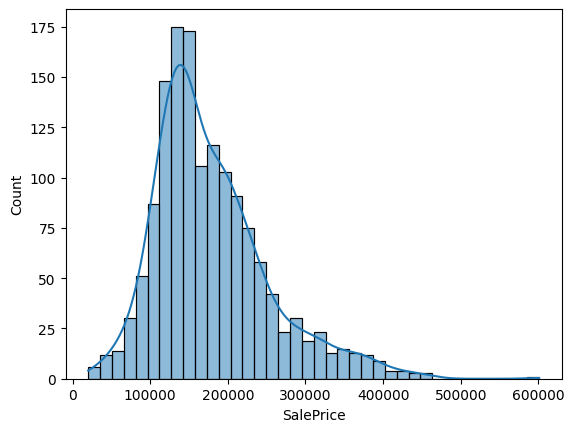

In [84]:
sns.histplot(data=df_final, x='SalePrice', kde=True)